In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the data 
rose = pd.read_csv('Rose.csv')

In [3]:
rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [4]:
rose.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [5]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [6]:
#Check data types
rose.dtypes

YearMonth     object
Rose         float64
dtype: object

### Pandas is reading YearMonth as an object and not a date time index

### We will provide inputs to tell pandas that we are trying to work with time series.

In [7]:

rose = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [8]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [9]:
#Check data types again
rose.dtypes

Rose    float64
dtype: object

In [10]:
rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [11]:
rose.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

### We can conveniently do slicing i.e. obtain data for a specific time period.

In [12]:

rose['1990-03-01':'1995-03-01']

Rose
YearMonth       
1990-03-01  73.0
1990-04-01  77.0
1990-05-01  69.0
1990-06-01  76.0
1990-07-01  78.0
...          ...
1994-11-01  63.0
1994-12-01  84.0
1995-01-01  30.0
1995-02-01  39.0
1995-03-01  45.0

[61 rows x 1 columns]

In [13]:
#We can check values corresponding to a specific time point
rose.loc['1980-05-01']

Rose    116.0
Name: 1980-05-01 00:00:00, dtype: float64

## Plot the Time Series to understand the behaviour of the data.

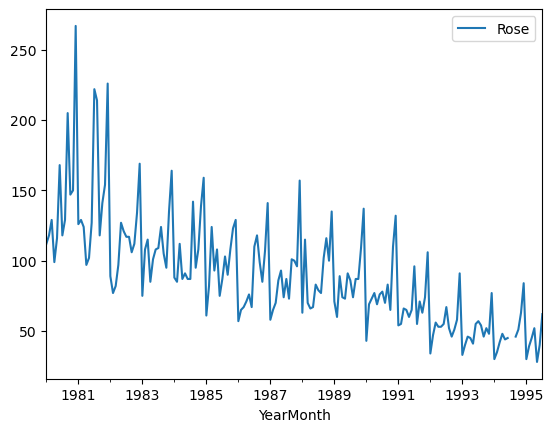

In [14]:
#Plot the time series
rose.plot()
plt.show()

### Increase the figure size

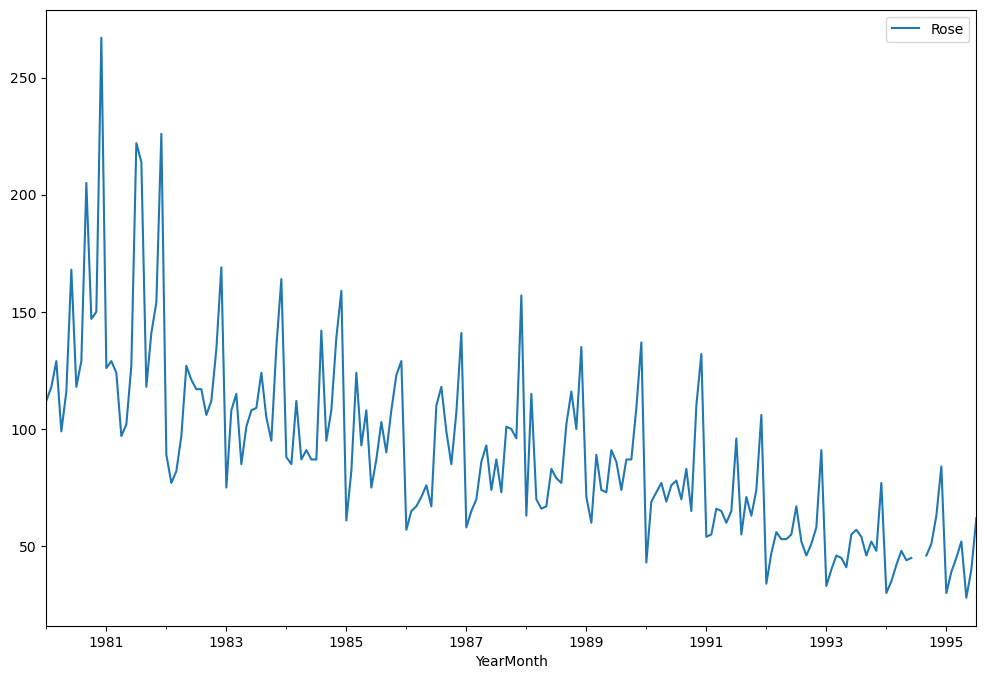

In [15]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rose.plot()
plt.show()

## Missing Value Handling

In [16]:
rose.isna().sum()

Rose    2
dtype: int64

There are 2 missing values in the dataset.

In [17]:
rose = rose.interpolate(method='linear')

In [18]:
# Check the interpolated values for the dates in question
print(rose.loc[['1994-07-01', '1994-08-01']])

                 Rose
YearMonth            
1994-07-01  45.333333
1994-08-01  45.666667


## Explore Log Transformation

In [19]:

rose_log = rose.copy()

In [20]:
rose_log['Rose'] = np.log(rose)

In [21]:
rose_log.Rose

YearMonth
1980-01-01    4.718499
1980-02-01    4.770685
1980-03-01    4.859812
1980-04-01    4.595120
1980-05-01    4.753590
                ...   
1995-03-01    3.806662
1995-04-01    3.951244
1995-05-01    3.332205
1995-06-01    3.688879
1995-07-01    4.127134
Name: Rose, Length: 187, dtype: float64

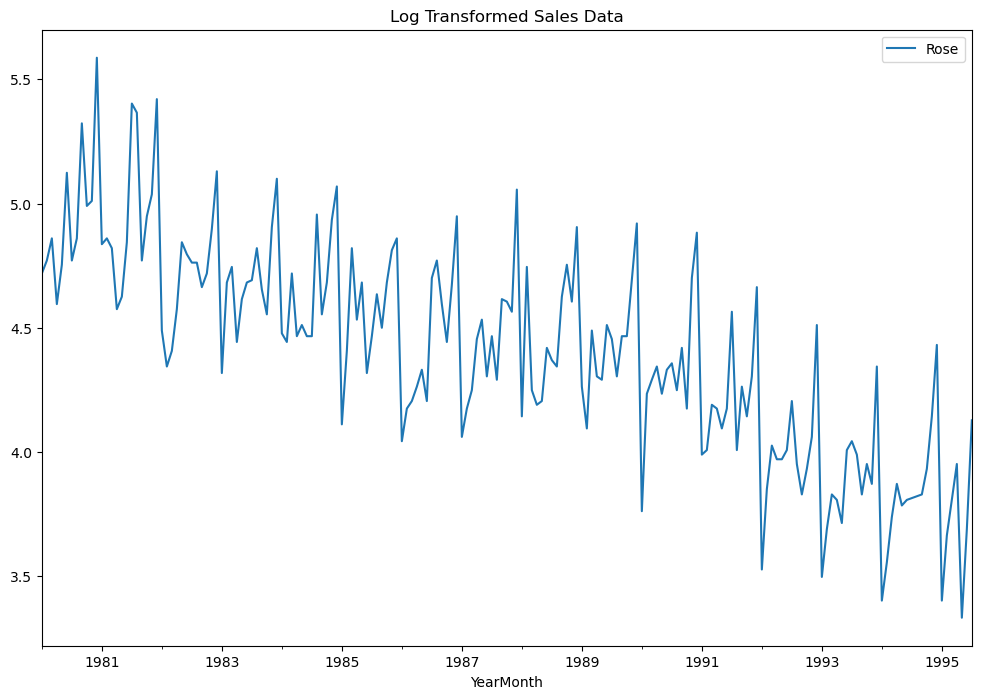

In [22]:
#Visualize the log transformed series
rose_log.plot()
plt.title('Log Transformed Sales Data')
plt.show()

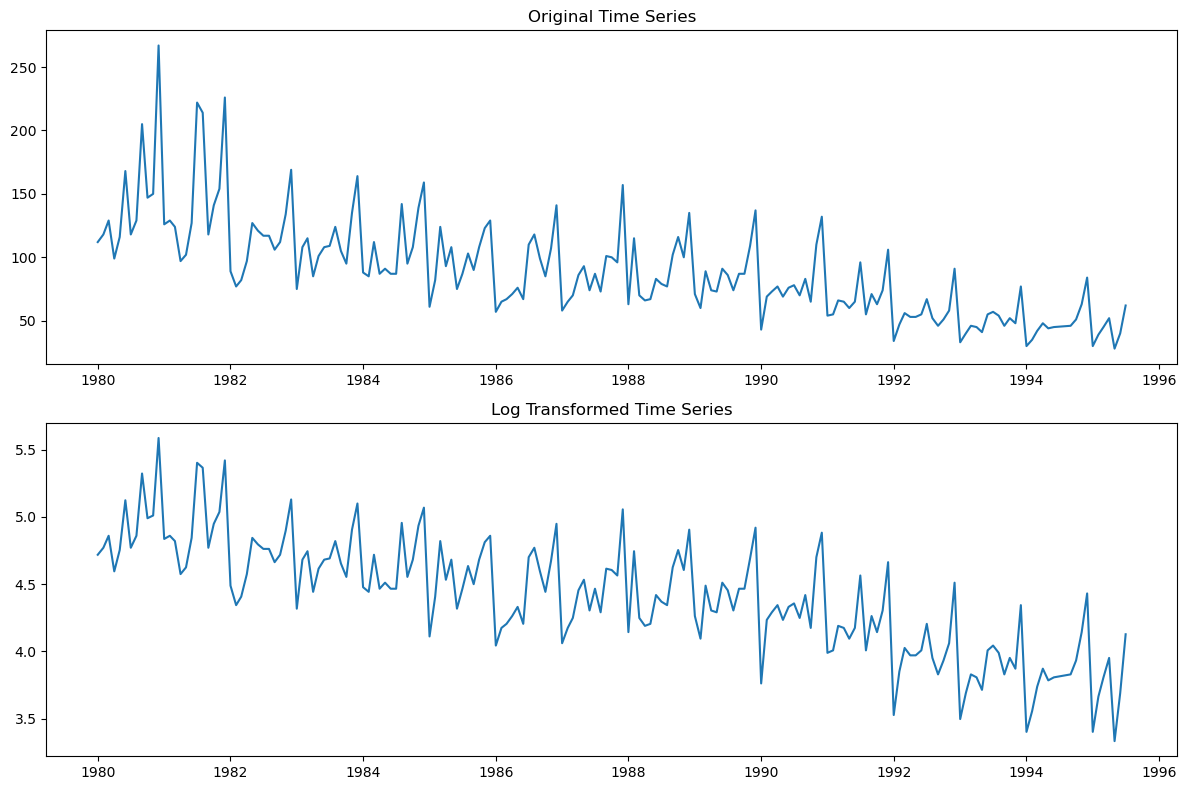

In [23]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(rose)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(rose_log)
plt.tight_layout()

## Downsampling

In [24]:
#Let's change the monthly series to quarterly. This would require aggregation.
rose_q = rose.resample('Q').mean()

<Axes: xlabel='YearMonth'>

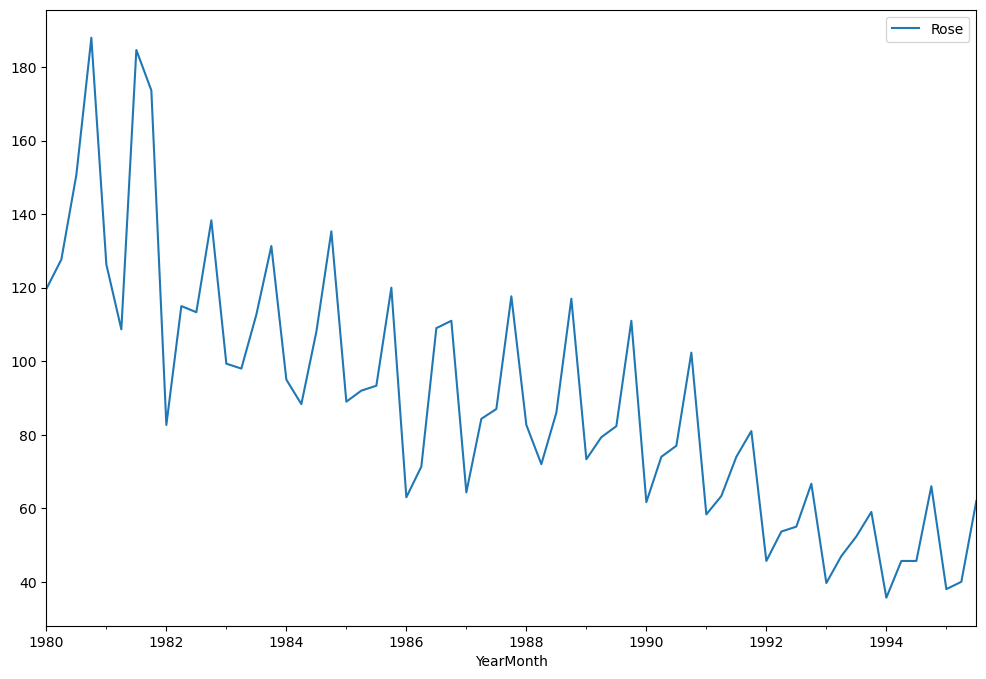

In [25]:
rose_q.plot()

<Axes: xlabel='YearMonth'>

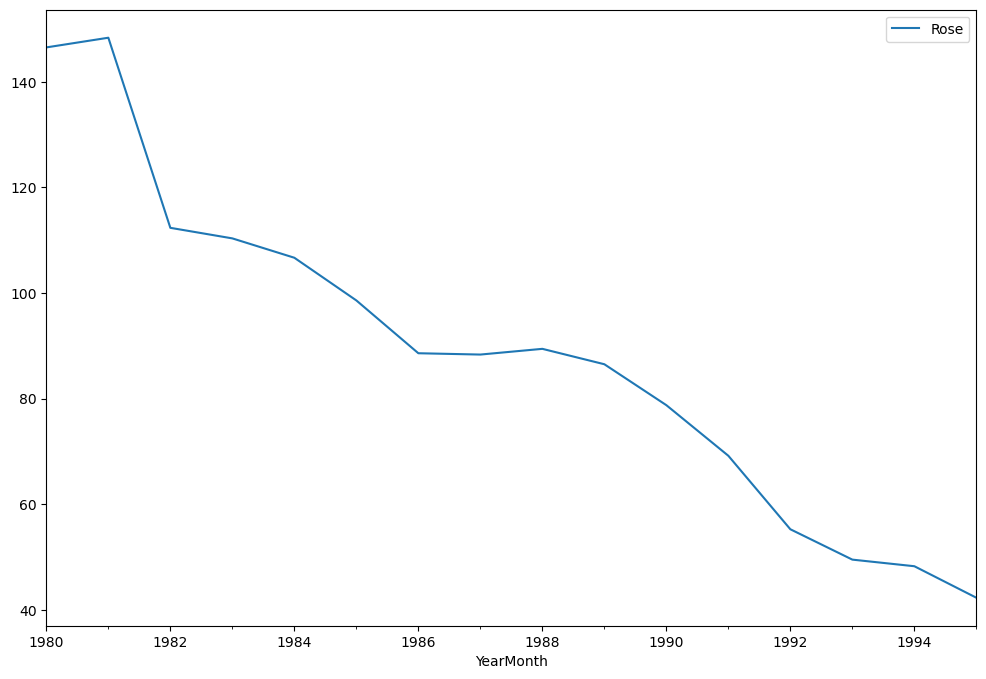

In [26]:
#Let's change the monthly series to yearly. This would require aggregation.
rose_y = rose.resample('Y').mean()
rose_y.plot()

## Upsampling

In [27]:
#Let's change the monthly series to daily. 
rose_d = rose.resample('D').ffill()
rose_d['1980-02']

Rose
YearMonth        
1980-02-01  118.0
1980-02-02  118.0
1980-02-03  118.0
1980-02-04  118.0
1980-02-05  118.0
1980-02-06  118.0
1980-02-07  118.0
1980-02-08  118.0
1980-02-09  118.0
1980-02-10  118.0
1980-02-11  118.0
1980-02-12  118.0
1980-02-13  118.0
1980-02-14  118.0
1980-02-15  118.0
1980-02-16  118.0
1980-02-17  118.0
1980-02-18  118.0
1980-02-19  118.0
1980-02-20  118.0
1980-02-21  118.0
1980-02-22  118.0
1980-02-23  118.0
1980-02-24  118.0
1980-02-25  118.0
1980-02-26  118.0
1980-02-27  118.0
1980-02-28  118.0
1980-02-29  118.0

<Axes: xlabel='YearMonth'>

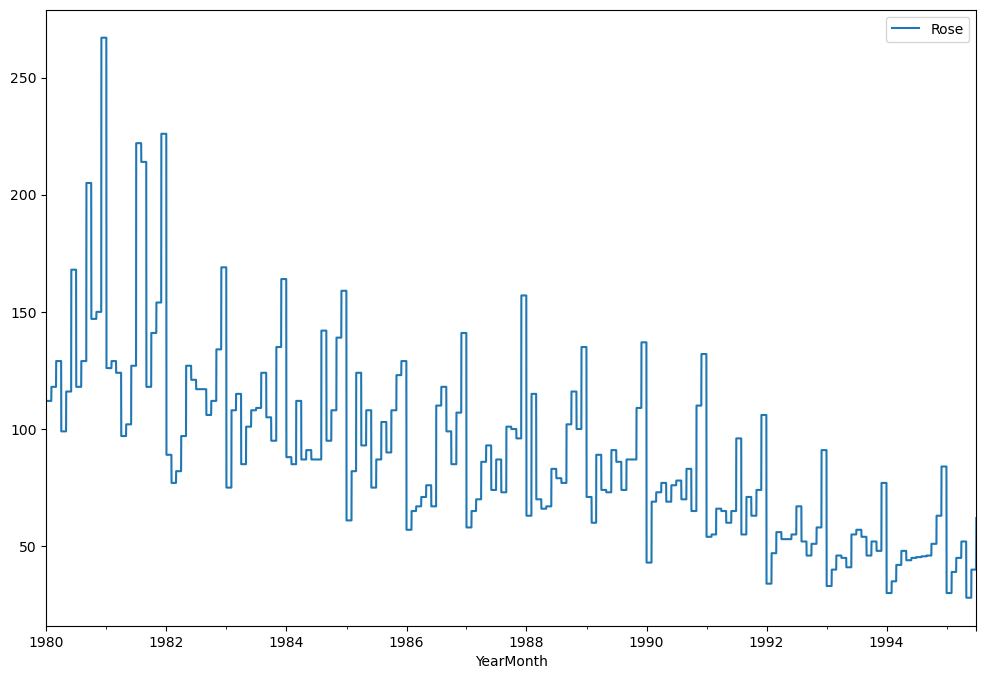

In [28]:
rose_d.plot()

# Find the mean and median of the monthly sparkling wine production.

In [29]:
rose.describe().round(2)

Rose
count  187.00
mean    89.91
std     39.24
min     28.00
25%     62.50
50%     85.00
75%    111.00
max    267.00

In [30]:
rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

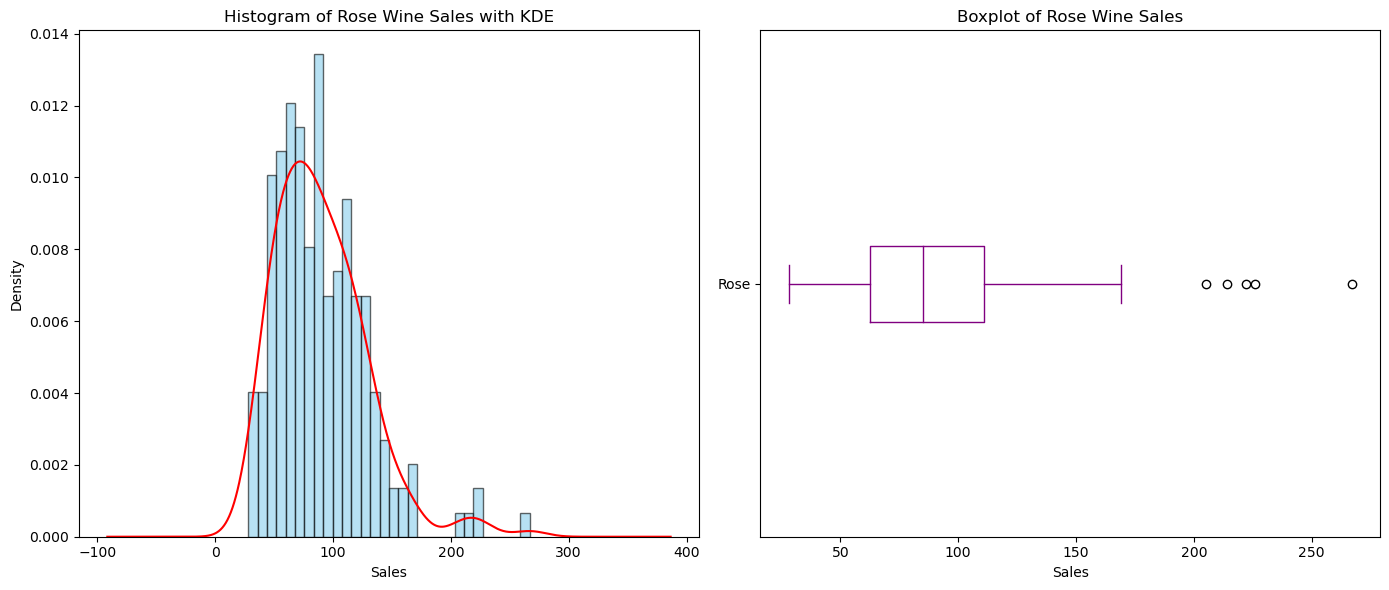

In [31]:
# Plotting histogram and boxplot for rose wine sales data with KDE curve on the histogram

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram with KDE
rose['Rose'].plot(kind='hist', ax=ax[0], bins=30, color='skyblue', edgecolor='black', density=True, alpha=0.6)
rose['Rose'].plot(kind='kde', ax=ax[0], color='red')
ax[0].set_title('Histogram of Rose Wine Sales with KDE')
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('Density')

# Boxplot
rose['Rose'].plot(kind='box', ax=ax[1], vert=False, color='purple')
ax[1].set_title('Boxplot of Rose Wine Sales')
ax[1].set_xlabel('Sales')

plt.tight_layout()
plt.show()



In [32]:
rose_skew = rose['Rose'].skew()
print(rose_skew)


1.2675104805389663



A skewness value of 1.26 indicates a right-skewed (or positively skewed) distribution. This means that the tail on the right side of the distribution is longer or fatter than the left side, indicating that the majority of the data points are concentrated on the left of the distribution, with fewer large values stretching out to the right.

This relationship suggests that in the context of the sparkling wine sales data, there are relatively few months with exceptionally high sales that are pulling the average (mean) sales value higher than the median. This indicates that while most of the sales figures are concentrated on the lower end, there are outliers or periods of unusually high sales that affect the distribution's shape.

### Plot of Empirical Cumulative Distribution

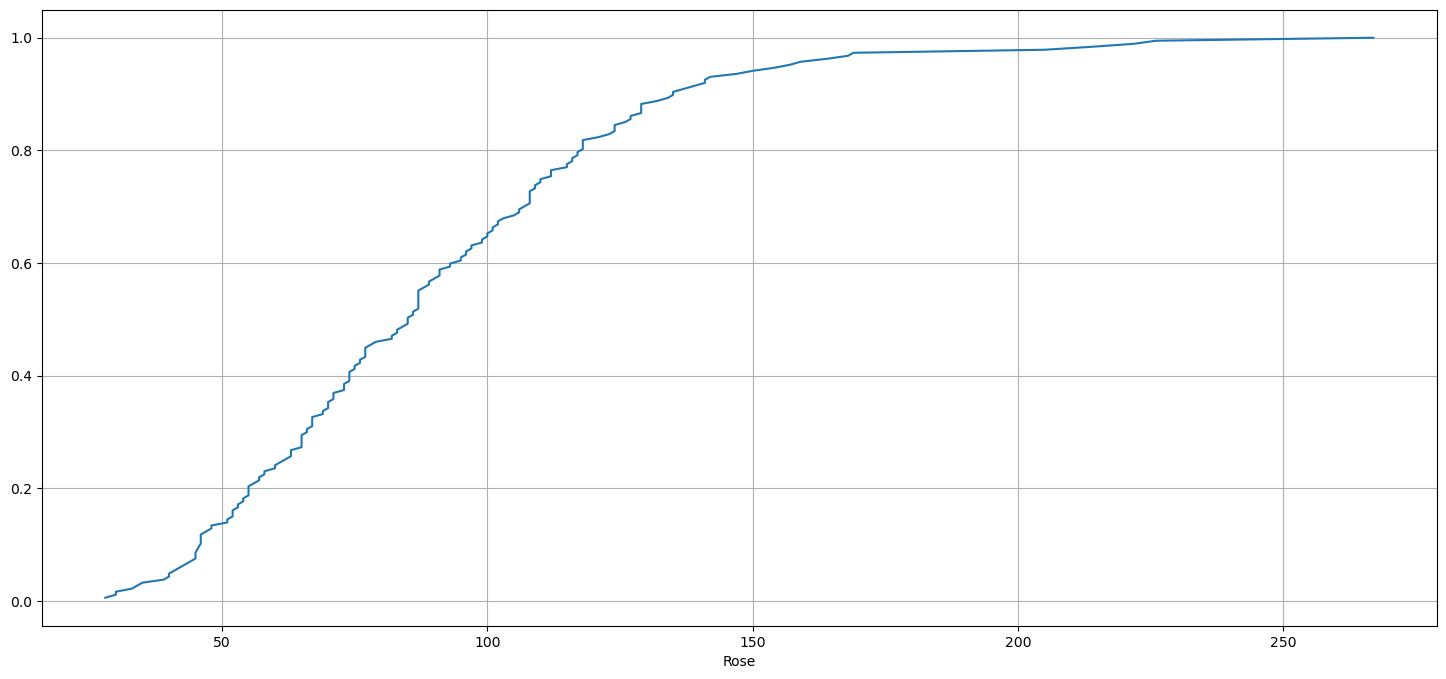

In [33]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

This particular graph tells us what percentage of data points refer to what number of Sales.

## <u>Code to convert/split the data as per frequency.</u>

In [34]:
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(rose))

In [35]:
import calendar
rose['Month'] = dates.month
rose['Month'] = rose['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
rose['Year'] = dates.year

In [36]:
rose.rename(columns={'Rose':'Rose-Wine-Sales'}, inplace=True)
rose = rose[['Month', 'Year', 'Rose-Wine-Sales']]

In [37]:
rose.set_index(dates, inplace=True)

In [38]:
rose.head()

Month  Year  Rose-Wine-Sales
1980-01-01   Jan  1980            112.0
1980-02-01   Feb  1980            118.0
1980-03-01   Mar  1980            129.0
1980-04-01   Apr  1980             99.0
1980-05-01   May  1980            116.0

## <u>Basic Bivariate Analysis</u>

### Analyse monthly Sparkling Wine Sales across years.

Observe how number of units sold vary on a month on month basis. A stacked plot for every year will give us a clear pattern of any seasonality over the many years and those changes will be clearly reflected in the plots. 

In [39]:
rose_monthly_sales_data = pd.pivot_table(rose, values = 'Rose-Wine-Sales', columns = "Year", index = "Month")
rose_monthly_sales_data

Year    1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
Month                                                                         
Apr     99.0   97.0   97.0   85.0   87.0   93.0   71.0   86.0   66.0   74.0   
Aug    129.0  214.0  117.0  124.0  142.0  103.0  118.0   73.0   77.0   74.0   
Dec    267.0  226.0  169.0  164.0  159.0  129.0  141.0  157.0  135.0  137.0   
Feb    118.0  129.0   77.0  108.0   85.0   82.0   65.0   65.0  115.0   60.0   
Jan    112.0  126.0   89.0   75.0   88.0   61.0   57.0   58.0   63.0   71.0   
Jul    118.0  222.0  117.0  109.0   87.0   87.0  110.0   87.0   79.0   86.0   
Jun    168.0  127.0  121.0  108.0   87.0   75.0   67.0   74.0   83.0   91.0   
Mar    129.0  124.0   82.0  115.0  112.0  124.0   67.0   70.0   70.0   89.0   
May    116.0  102.0  127.0  101.0   91.0  108.0   76.0   93.0   67.0   73.0   
Nov    150.0  154.0  134.0  135.0  139.0  123.0  107.0   96.0  100.0  109.0   
Oct    147.0  141.0  112.0   95.0  108.0  108.0   85.0  100.0  116.0   87.0   
Sep    205.0  118.0  106.0  105.0   95.0   90.0   99.0  101.0  102.0   87.0   

Year    1990   1991  1992  1993       1994  1995  
Month                                             
Apr     77.0   65.0  53.0  45.0  48.000000  52.0  
Aug     70.0   55.0  52.0  54.0  45.666667   NaN  
Dec    132.0  106.0  91.0  77.0  84.000000   NaN  
Feb     69.0   55.0  47.0  40.0  35.000000  39.0  
Jan     43.0   54.0  34.0  33.0  30.000000  30.0  
Jul     78.0   96.0  67.0  57.0  45.333333  62.0  
Jun     76.0   65.0  55.0  55.0  45.000000  40.0  
Mar     73.0   66.0  56.0  46.0  42.000000  45.0  
May     69.0   60.0  53.0  41.0  44.000000  28.0  
Nov    110.0   74.0  58.0  48.0  63.000000   NaN  
Oct     65.0   63.0  51.0  52.0  51.000000   NaN  
Sep     83.0   71.0  46.0  46.0  46.000000   NaN

In [40]:
# Define the correct order for the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' index to a Categorical type with the defined order
rose_monthly_sales_data.index = pd.CategoricalIndex(rose_monthly_sales_data.index, categories=month_order, ordered=True)

# Sort the pivot table by the month index
rose_monthly_sales_data.sort_index(inplace=True)

rose_monthly_sales_data


Year    1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
Month                                                                         
Jan    112.0  126.0   89.0   75.0   88.0   61.0   57.0   58.0   63.0   71.0   
Feb    118.0  129.0   77.0  108.0   85.0   82.0   65.0   65.0  115.0   60.0   
Mar    129.0  124.0   82.0  115.0  112.0  124.0   67.0   70.0   70.0   89.0   
Apr     99.0   97.0   97.0   85.0   87.0   93.0   71.0   86.0   66.0   74.0   
May    116.0  102.0  127.0  101.0   91.0  108.0   76.0   93.0   67.0   73.0   
Jun    168.0  127.0  121.0  108.0   87.0   75.0   67.0   74.0   83.0   91.0   
Jul    118.0  222.0  117.0  109.0   87.0   87.0  110.0   87.0   79.0   86.0   
Aug    129.0  214.0  117.0  124.0  142.0  103.0  118.0   73.0   77.0   74.0   
Sep    205.0  118.0  106.0  105.0   95.0   90.0   99.0  101.0  102.0   87.0   
Oct    147.0  141.0  112.0   95.0  108.0  108.0   85.0  100.0  116.0   87.0   
Nov    150.0  154.0  134.0  135.0  139.0  123.0  107.0   96.0  100.0  109.0   
Dec    267.0  226.0  169.0  164.0  159.0  129.0  141.0  157.0  135.0  137.0   

Year    1990   1991  1992  1993       1994  1995  
Month                                             
Jan     43.0   54.0  34.0  33.0  30.000000  30.0  
Feb     69.0   55.0  47.0  40.0  35.000000  39.0  
Mar     73.0   66.0  56.0  46.0  42.000000  45.0  
Apr     77.0   65.0  53.0  45.0  48.000000  52.0  
May     69.0   60.0  53.0  41.0  44.000000  28.0  
Jun     76.0   65.0  55.0  55.0  45.000000  40.0  
Jul     78.0   96.0  67.0  57.0  45.333333  62.0  
Aug     70.0   55.0  52.0  54.0  45.666667   NaN  
Sep     83.0   71.0  46.0  46.0  46.000000   NaN  
Oct     65.0   63.0  51.0  52.0  51.000000   NaN  
Nov    110.0   74.0  58.0  48.0  63.000000   NaN  
Dec    132.0  106.0  91.0  77.0  84.000000   NaN

### Monthly Plot to understand the spread of sales within different months across years

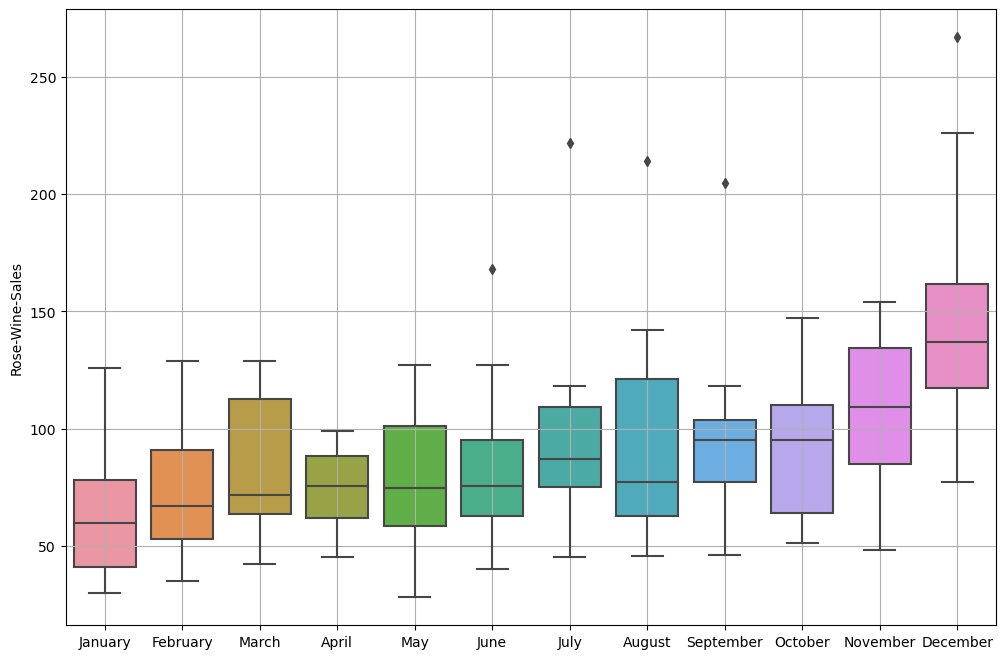

In [41]:
sns.boxplot(x = rose.index.month_name(),y = rose['Rose-Wine-Sales'])
plt.grid();

There is a clear distinction of 'Rose Wine Sales' within different months spread across various years. The highest such numbers are being recorded in the month of November-December across various years.

### Time series monthplot to understand the spread of sales within different months across years

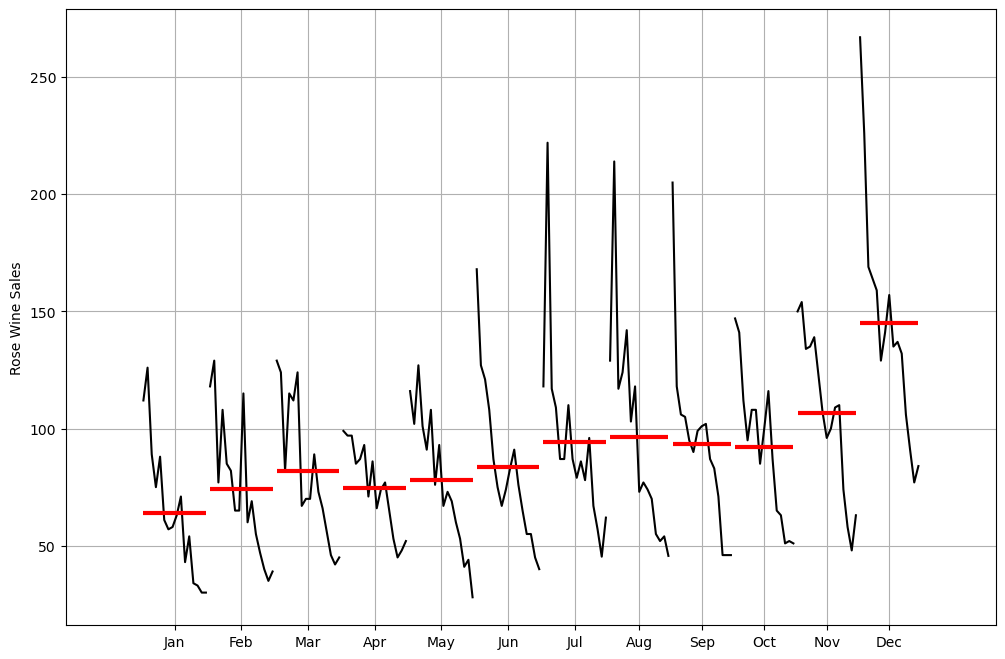

In [42]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(rose['Rose-Wine-Sales'],ylabel='Rose Wine Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Rose Wine Sales' in this case) across various months. The red line is the median value.

### Plot of Average Sparkling Wine Sales per month and the month on month percentage change of Sparkling Wine Sales

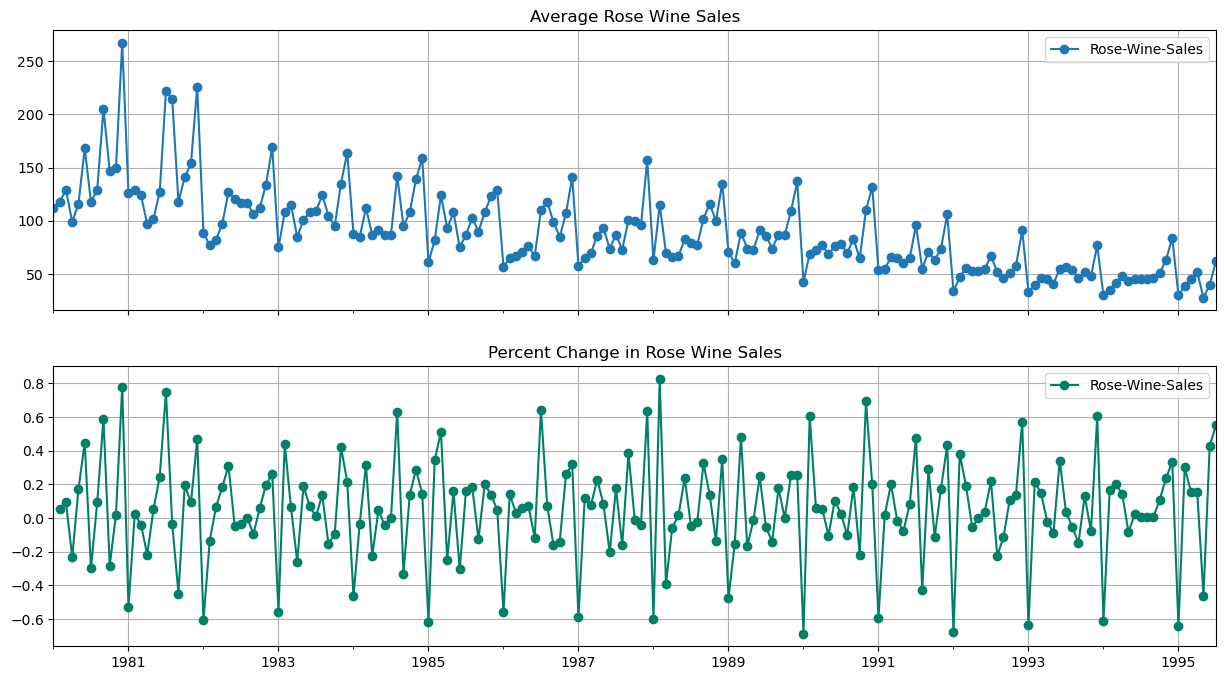

In [43]:
# group by date and get average RetailSales, and precent change
average    = rose.groupby(rose.index)["Rose-Wine-Sales"].mean()
pct_change = rose.groupby(rose.index)["Rose-Wine-Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling Wine Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Percent Change in Rose Wine Sales",grid=True)


The above two graphs tells us the Average 'Rose Wine Sales' and the Percentage change of 'Rose Wine Sales' with respect to the time.

In [44]:
# Calculating month-over-month percentage change in average sales
monthly_pct_change = rose['Rose-Wine-Sales'].pct_change()

# Extracting month and year from the index to group by month across all years
monthly_pct_change_df = monthly_pct_change.to_frame().assign(Month=lambda x: x.index.month)

# Calculating the average percentage change by month
average_monthly_pct_change = monthly_pct_change_df.groupby('Month')['Rose-Wine-Sales'].mean() * 100  # Convert to percentage

# Finding the months with the lowest and highest average percentage change
lowest_change_month = average_monthly_pct_change.idxmin()
highest_change_month = average_monthly_pct_change.idxmax()

lowest_change_value = average_monthly_pct_change.min()
highest_change_value = average_monthly_pct_change.max()

(lowest_change_month, lowest_change_value), (highest_change_month, highest_change_value), average_monthly_pct_change


((1, -58.91167858891507),
 (12, 37.43439367813643),
 Month
 1    -58.911679
 2     20.678370
 3     13.544253
 4     -4.225758
 5      1.668254
 6      9.649156
 7     16.350840
 8     -0.273062
 9      2.529282
 10     1.429457
 11    17.682112
 12    37.434394
 Name: Rose-Wine-Sales, dtype: float64)

### Analyse yearly Sparkling Wine Sales across months.

In [45]:
yearly_sales_data = pd.pivot_table(rose, values = 'Rose-Wine-Sales', columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month    Jan    Feb    Mar   Apr    May    Jun         Jul         Aug    Sep  \
Year                                                                            
1980   112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000  205.0   
1981   126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000  118.0   
1982    89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000  106.0   
1983    75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000  105.0   
1984    88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   95.0   
1985    61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   90.0   
1986    57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   99.0   
1987    58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000  101.0   
1988    63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000  102.0   
1989    71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   87.0   
1990    43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   83.0   
1991    54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   71.0   
1992    34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   46.0   
1993    33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   46.0   
1994    30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   46.0   
1995    30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN    NaN   

Month    Oct    Nov    Dec  
Year                        
1980   147.0  150.0  267.0  
1981   141.0  154.0  226.0  
1982   112.0  134.0  169.0  
1983    95.0  135.0  164.0  
1984   108.0  139.0  159.0  
1985   108.0  123.0  129.0  
1986    85.0  107.0  141.0  
1987   100.0   96.0  157.0  
1988   116.0  100.0  135.0  
1989    87.0  109.0  137.0  
1990    65.0  110.0  132.0  
1991    63.0   74.0  106.0  
1992    51.0   58.0   91.0  
1993    52.0   48.0   77.0  
1994    51.0   63.0   84.0  
1995     NaN    NaN    NaN

<Axes: xlabel='Year'>

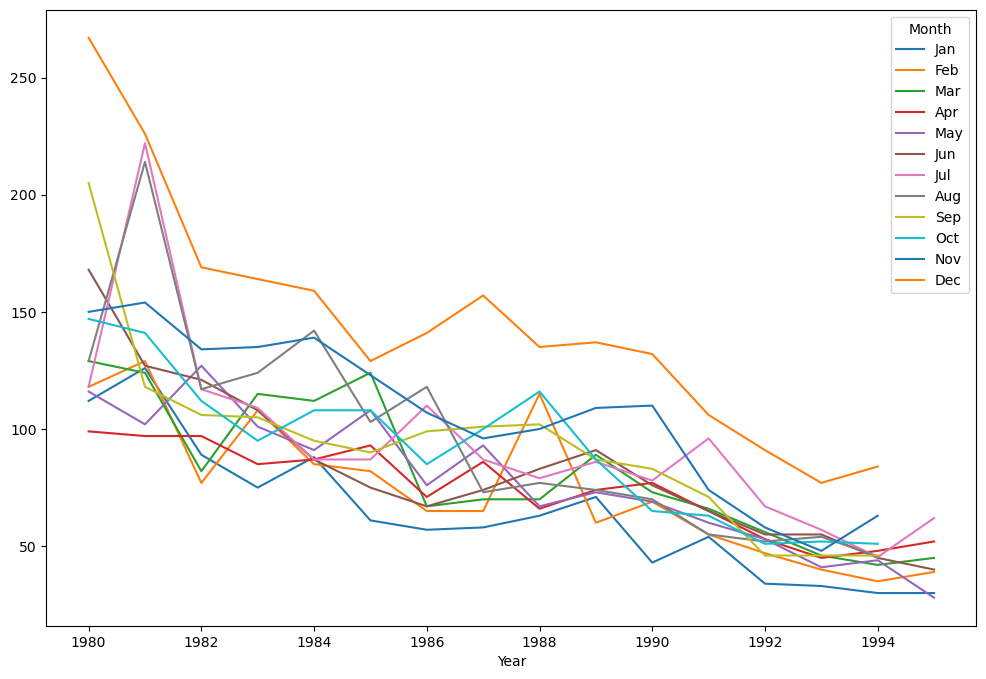

In [46]:
yearly_sales_data.plot()

### Yearly Boxplot to understand the spread of Sparkling Wine Sales across different years

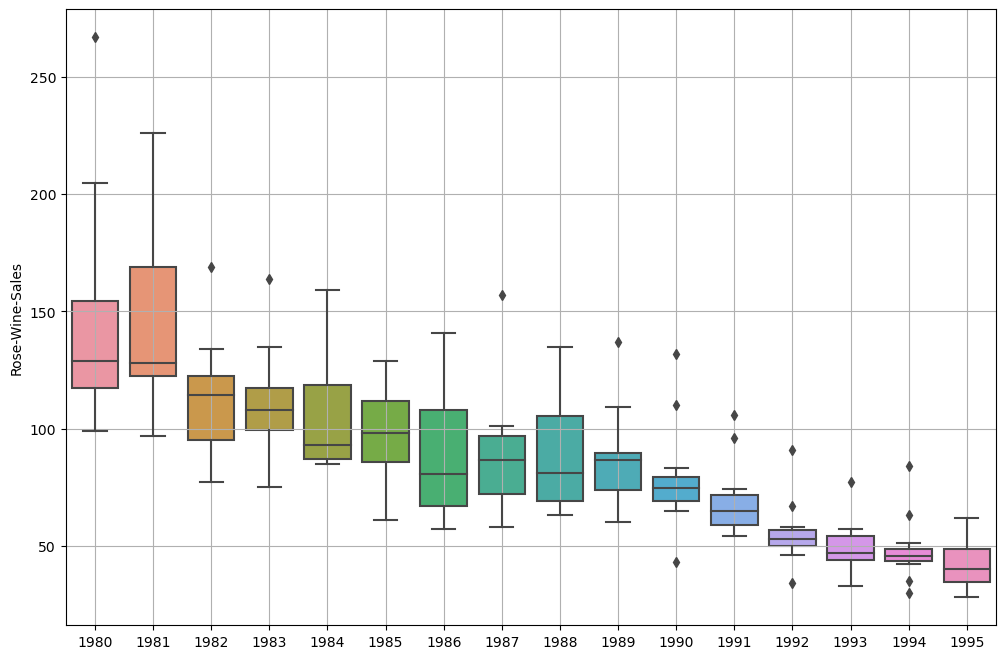

In [47]:
sns.boxplot(x = rose.index.year,y = rose['Rose-Wine-Sales'])
plt.grid();

The yearly boxplots also shows that the Sales have been relatively almost constant across the years.

## Decompose the Time Series and plot the different components.

*Performing the decomposition of data if there is an existence of seasonality and split the data accordingly.*

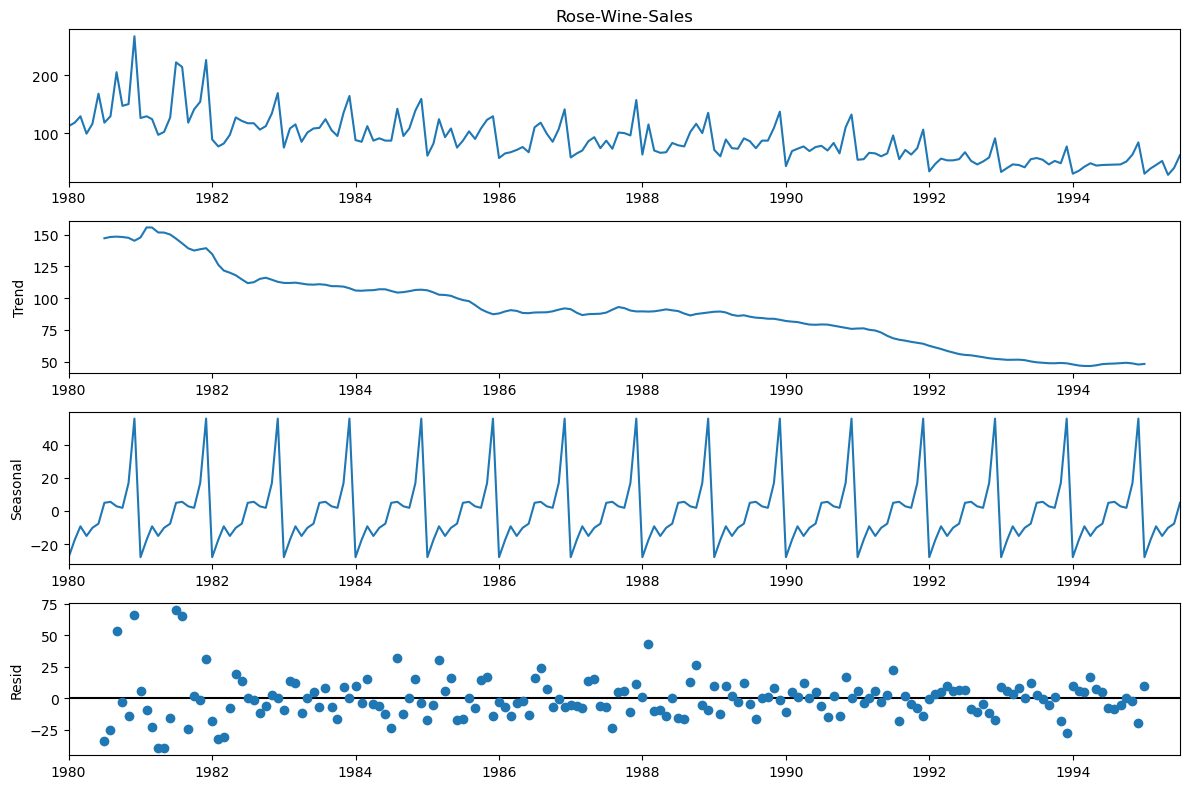

In [48]:
#Decompose the time series additively
rose_add_decompose = seasonal_decompose(rose['Rose-Wine-Sales'], model = 'additive', period = 12)
rose_add_decompose.plot()
plt.show()

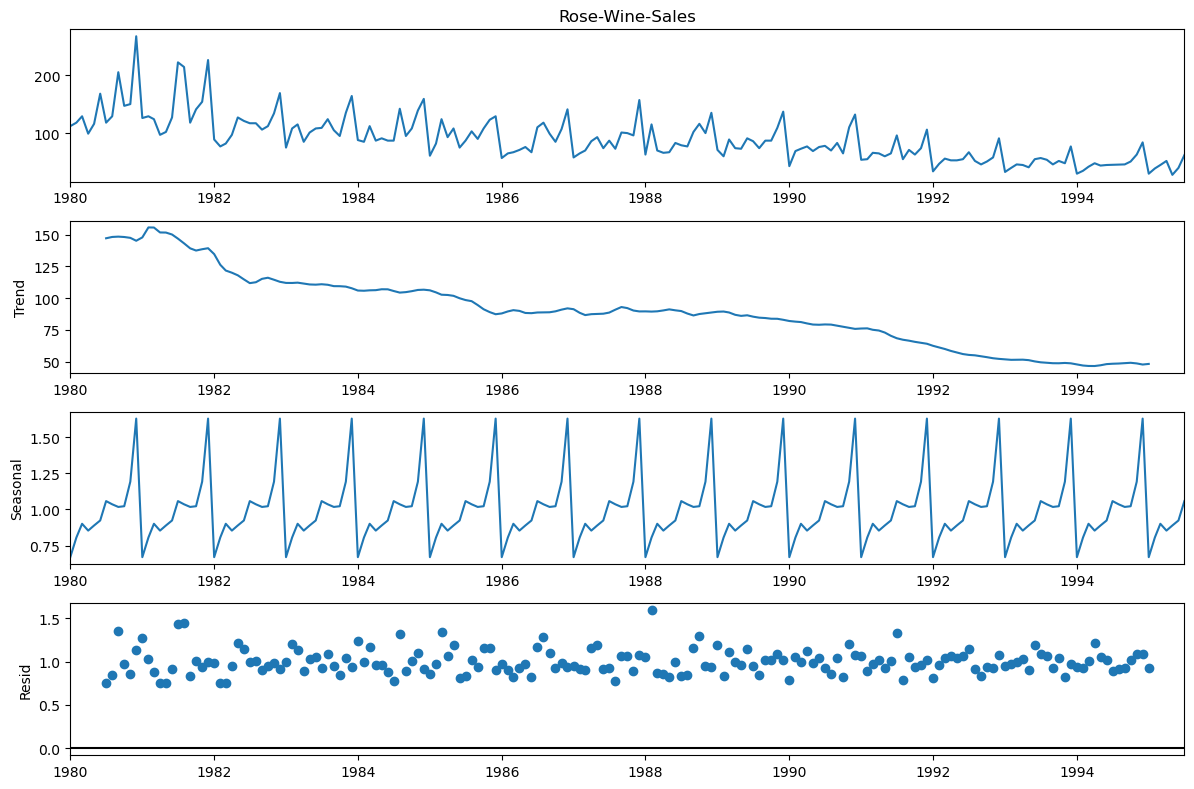

In [49]:
##Decompose the time series multiplicatively
rose_mul_decompose = seasonal_decompose(rose['Rose-Wine-Sales'], model = "multiplicative")
rose_mul_decompose.plot()
plt.show()

In [50]:
trend = rose_mul_decompose.trend
seasonality = rose_mul_decompose.seasonal
residual = rose_mul_decompose.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    147.08
1980-08-01    148.12
1980-09-01    148.37
1980-10-01    148.08
1980-11-01    147.42
1980-12-01    145.12
Freq: MS, Name: trend, dtype: float64 

Seasonality 
 1980-01-01    0.67
1980-02-01    0.81
1980-03-01    0.90
1980-04-01    0.85
1980-05-01    0.89
1980-06-01    0.92
1980-07-01    1.06
1980-08-01    1.04
1980-09-01    1.02
1980-10-01    1.02
1980-11-01    1.19
1980-12-01    1.63
Freq: MS, Name: seasonal, dtype: float64 

Residual 
 1980-01-01     NaN
1980-02-01     NaN
1980-03-01     NaN
1980-04-01     NaN
1980-05-01     NaN
1980-06-01     NaN
1980-07-01    0.76
1980-08-01    0.84
1980-09-01    1.36
1980-10-01    0.97
1980-11-01    0.85
1980-12-01    1.13
Freq: MS, Name: resid, dtype: float64 



## Building Prediction and Forecast Models

### Split into Train and Test Data

In [51]:
train    =   rose[0:int(len(rose)*0.8)] 
test     =   rose[int(len(rose)*0.8):]

In [52]:
# Printing the Sparkling Wine Data
print('Training Data')
display(train.head())
print('Test Data')
display(test.head())

Training Data


Month  Year  Rose-Wine-Sales
1980-01-01   Jan  1980            112.0
1980-02-01   Feb  1980            118.0
1980-03-01   Mar  1980            129.0
1980-04-01   Apr  1980             99.0
1980-05-01   May  1980            116.0

Test Data


Month  Year  Rose-Wine-Sales
1992-06-01   Jun  1992             55.0
1992-07-01   Jul  1992             67.0
1992-08-01   Aug  1992             52.0
1992-09-01   Sep  1992             46.0
1992-10-01   Oct  1992             51.0

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sparkling Wine Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [225]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [226]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [55]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
            Month  Year  Rose-Wine-Sales  time
1980-01-01   Jan  1980            112.0     1
1980-02-01   Feb  1980            118.0     2
1980-03-01   Mar  1980            129.0     3
1980-04-01   Apr  1980             99.0     4
1980-05-01   May  1980            116.0     5 

Last few rows of Training Data 
            Month  Year  Rose-Wine-Sales  time
1992-01-01   Jan  1992             34.0   145
1992-02-01   Feb  1992             47.0   146
1992-03-01   Mar  1992             56.0   147
1992-04-01   Apr  1992             53.0   148
1992-05-01   May  1992             53.0   149 

First few rows of Test Data 
            Month  Year  Rose-Wine-Sales  time
1992-06-01   Jun  1992             55.0    43
1992-07-01   Jul  1992             67.0    44
1992-08-01   Aug  1992             52.0    45
1992-09-01   Sep  1992             46.0    46
1992-10-01   Oct  1992             51.0    47 

Last few rows of Test Data 
            Month  Year  Rose-Wine-Sales 

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose-Wine-Sales'].values)

LinearRegression()

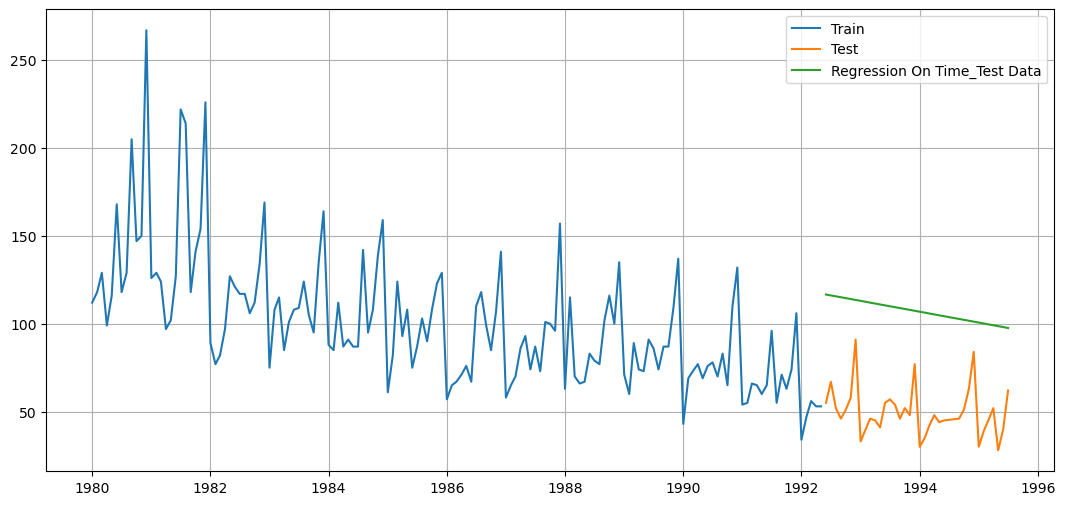

In [59]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose-Wine-Sales'], label='Train')
plt.plot(test['Rose-Wine-Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [60]:
LinearRegression_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 1980-01-01 to 1992-05-01
Freq: MS
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            149 non-null    object 
 1   Year             149 non-null    int64  
 2   Rose-Wine-Sales  149 non-null    float64
 3   time             149 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.8+ KB


In [61]:
import statsmodels.api as sm

# Assuming you have a DataFrame 'df' with a column 'time' for the independent variable
# and 'Sparkling-Wine-Sales' for the dependent variable

# Add a constant to the independent variable data for the intercept
X = sm.add_constant(LinearRegression_train['time'])  

# Fit the OLS model
model = sm.OLS(LinearRegression_train['Rose-Wine-Sales'], X).fit()

# Print out the summary
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:        Rose-Wine-Sales   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     82.92
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           5.71e-16
Time:                        23:58:28   Log-Likelihood:                -715.56
No. Observations:                 149   AIC:                             1435.
Df Residuals:                     147   BIC:                             1441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.7662      4.886     28.398      0.0

### Interpretation of R-squared

* The R-squared value tells us that our model can explain 36.1% of the variance in the training set.

#### Defining the accuracy metrics.

In [62]:
from sklearn import metrics

### Model Evaluation: Linear Regression

In [63]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose-Wine-Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 58.98


In [64]:
resultsDf_LR = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])

resultsDf = pd.concat([resultsDf_LR])
resultsDf

Test RMSE
RegressionOnTime  58.977941

## Model 2: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [65]:
MovingAverage = rose.copy()
MovingAverage.head()

Month  Year  Rose-Wine-Sales
1980-01-01   Jan  1980            112.0
1980-02-01   Feb  1980            118.0
1980-03-01   Mar  1980            129.0
1980-04-01   Apr  1980             99.0
1980-05-01   May  1980            116.0

#### Trailing moving averages

In [66]:

MovingAverage['Trailing_2'] = MovingAverage['Rose-Wine-Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose-Wine-Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose-Wine-Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose-Wine-Sales'].rolling(9).mean()

MovingAverage.head()

Month  Year  Rose-Wine-Sales  Trailing_2  Trailing_4  Trailing_6  \
1980-01-01   Jan  1980            112.0         NaN         NaN         NaN   
1980-02-01   Feb  1980            118.0       115.0         NaN         NaN   
1980-03-01   Mar  1980            129.0       123.5         NaN         NaN   
1980-04-01   Apr  1980             99.0       114.0       114.5         NaN   
1980-05-01   May  1980            116.0       107.5       115.5         NaN   

            Trailing_9  
1980-01-01         NaN  
1980-02-01         NaN  
1980-03-01         NaN  
1980-04-01         NaN  
1980-05-01         NaN

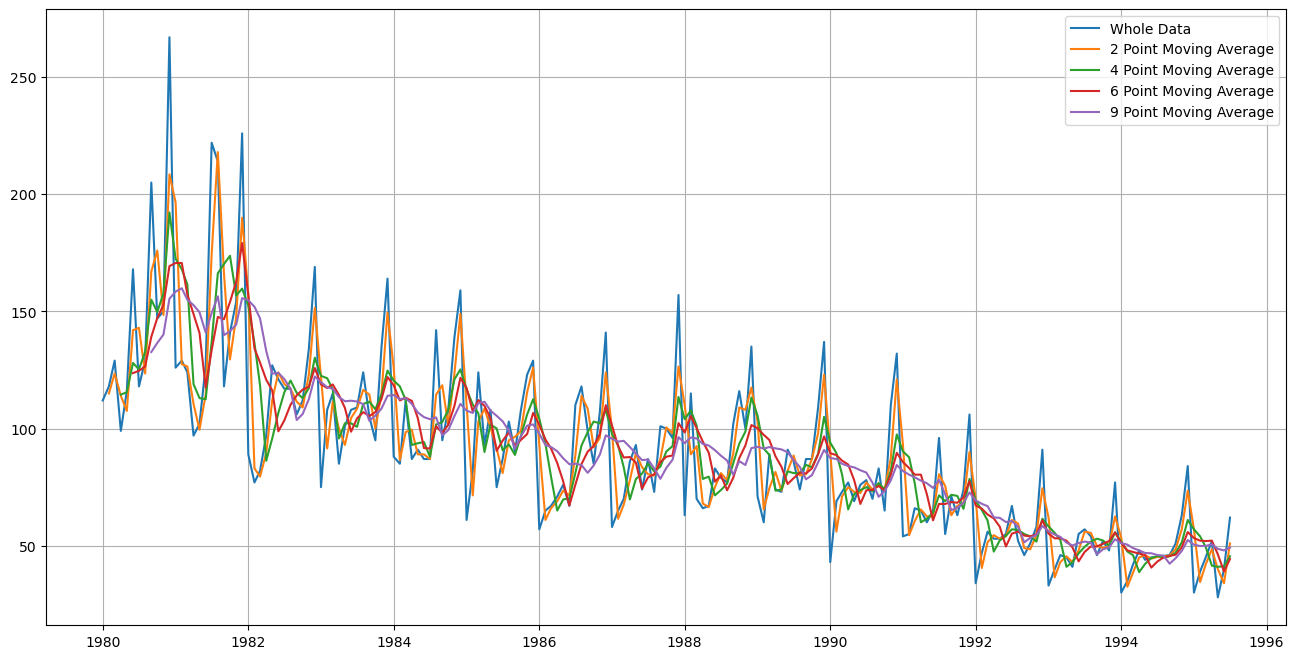

In [67]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose-Wine-Sales'], label='Whole Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [68]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.8)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.8):]

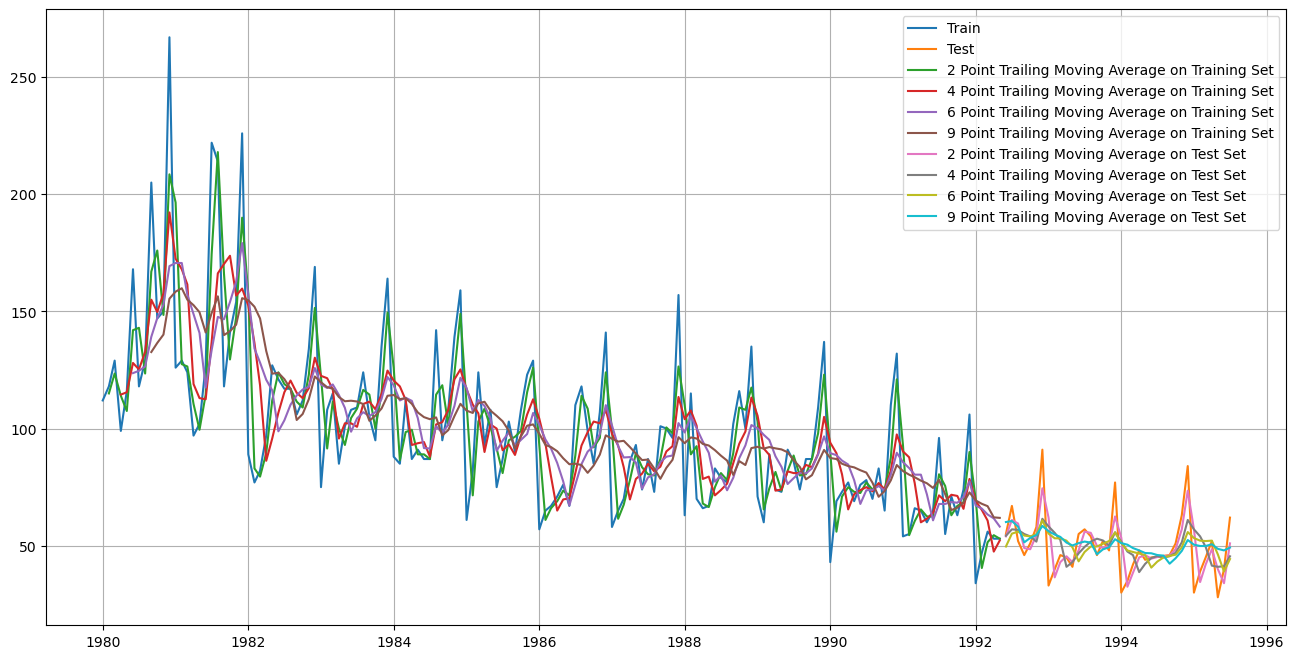

In [69]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose-Wine-Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose-Wine-Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation: Moving Average Model

##### Done only on the test data.

##### MAPE can be calculated as below 

In [70]:
# Test Data - MAPE --> 2 point Trailing MA
mape_model1_test = np.mean(np.abs((test['Rose-Wine-Sales'] - test_predictions_model1)/test['Rose-Wine-Sales']))*100
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.2f" %(mape_model1_test))

For RegressionOnTime forecast on the Test Data,  MAPE is 129.40


#### RMSE Calculation as below 

In [71]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose-Wine-Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose-Wine-Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose-Wine-Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose-Wine-Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 9.402
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 12.180
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 12.403
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 12.615 


In [72]:
resultsDf_MA = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA])
resultsDf

Test RMSE
RegressionOnTime             58.977941
2pointTrailingMovingAverage   9.401964
4pointTrailingMovingAverage  12.180380
6pointTrailingMovingAverage  12.403435
9pointTrailingMovingAverage  12.614521

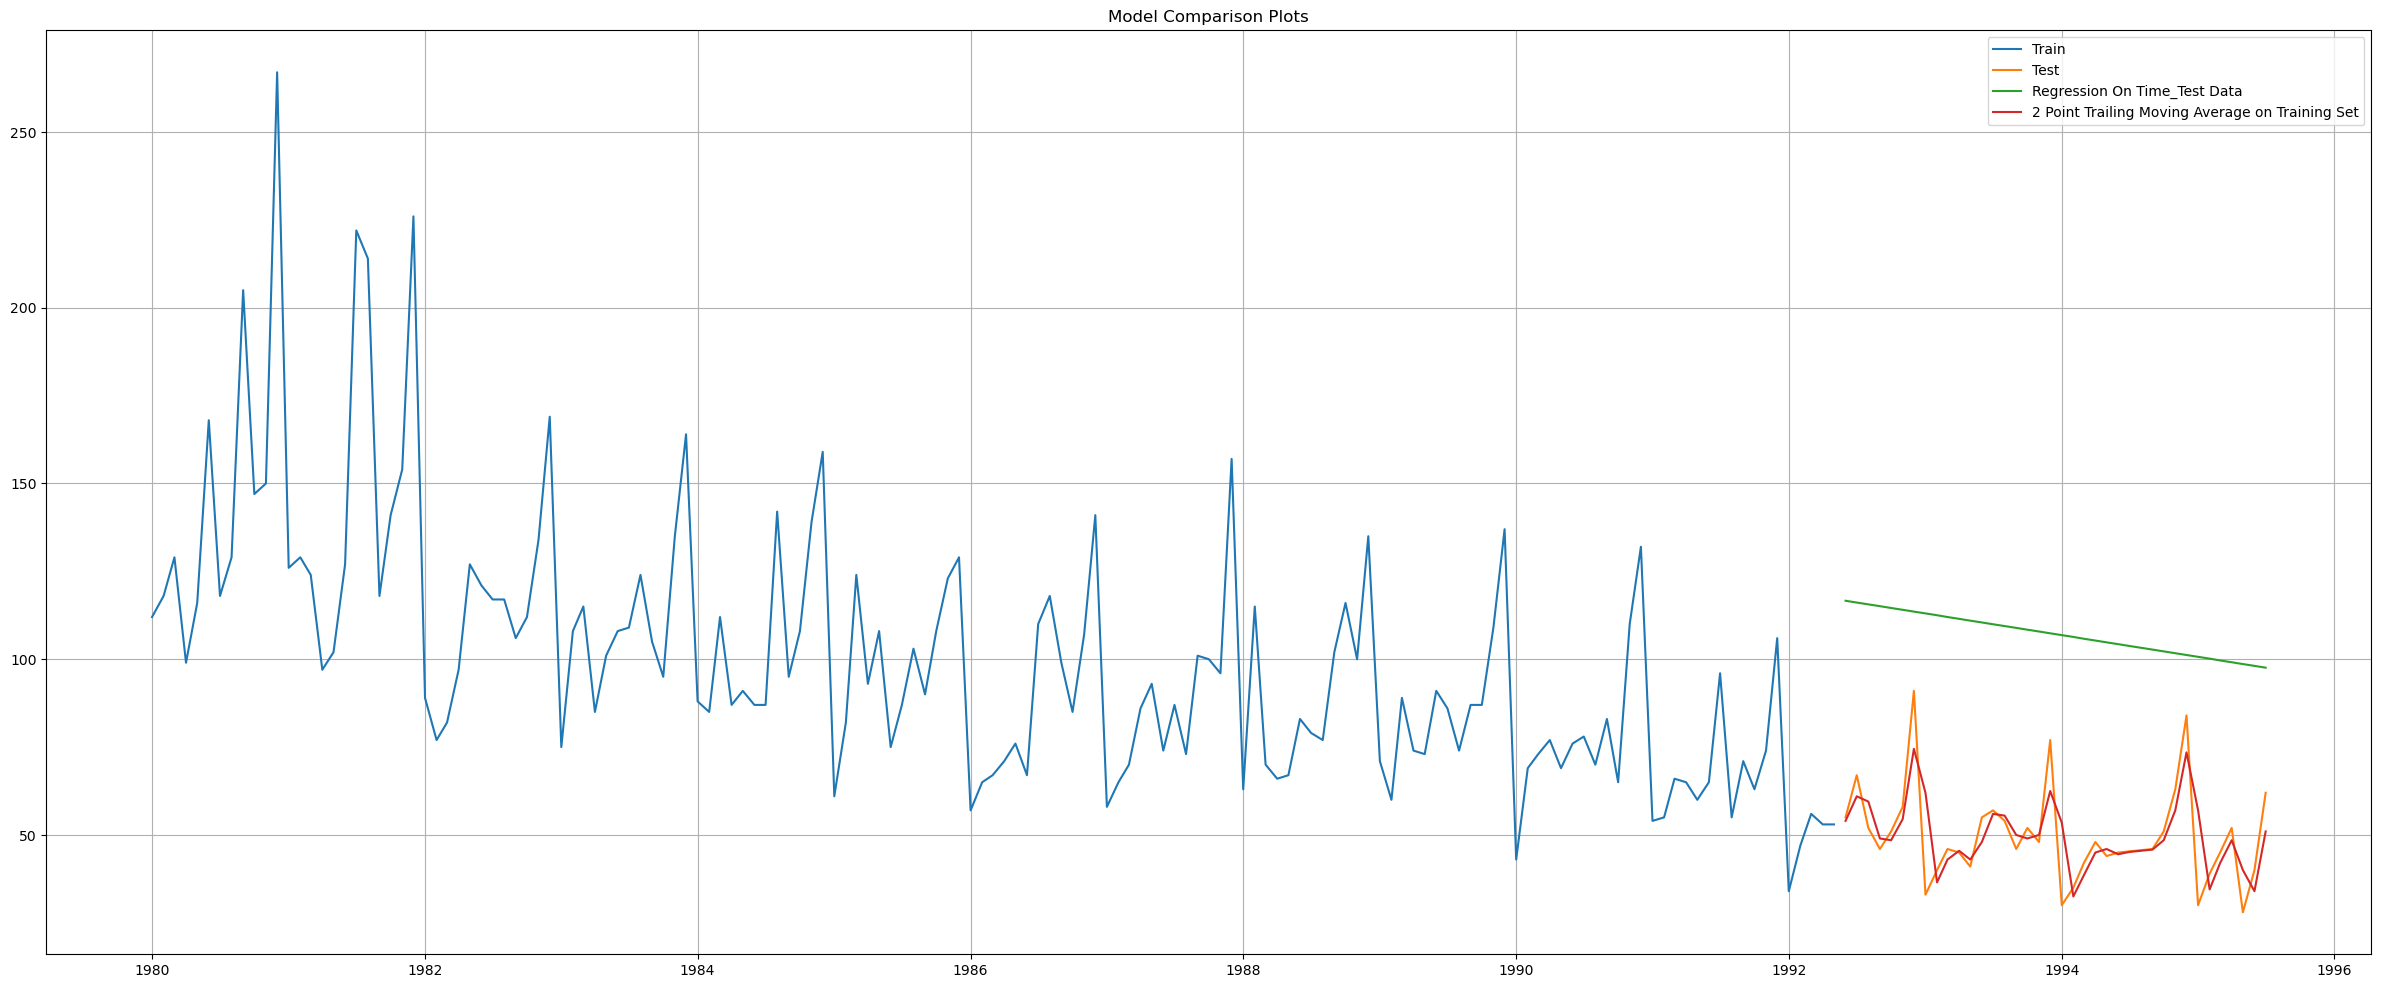

In [73]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose-Wine-Sales'], label='Train')
plt.plot(test['Rose-Wine-Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Model 3: Simple Exponential Smoothing Method

### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [74]:
from sklearn import metrics

In [75]:
SES_train = train.copy()
SES_test = test.copy()

In [76]:
# create class
model_SES = SimpleExpSmoothing(SES_train['Rose-Wine-Sales'],initialization_method='estimated')

In [77]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [78]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.10680699513236583,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.10586306159436,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [79]:
# Using the fitted model on the training set to forecast on the test set
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test['predict']

1992-06-01    64.92455
1992-07-01    64.92455
1992-08-01    64.92455
1992-09-01    64.92455
1992-10-01    64.92455
1992-11-01    64.92455
1992-12-01    64.92455
1993-01-01    64.92455
1993-02-01    64.92455
1993-03-01    64.92455
1993-04-01    64.92455
1993-05-01    64.92455
1993-06-01    64.92455
1993-07-01    64.92455
1993-08-01    64.92455
1993-09-01    64.92455
1993-10-01    64.92455
1993-11-01    64.92455
1993-12-01    64.92455
1994-01-01    64.92455
1994-02-01    64.92455
1994-03-01    64.92455
1994-04-01    64.92455
1994-05-01    64.92455
1994-06-01    64.92455
1994-07-01    64.92455
1994-08-01    64.92455
1994-09-01    64.92455
1994-10-01    64.92455
1994-11-01    64.92455
1994-12-01    64.92455
1995-01-01    64.92455
1995-02-01    64.92455
1995-03-01    64.92455
1995-04-01    64.92455
1995-05-01    64.92455
1995-06-01    64.92455
1995-07-01    64.92455
Freq: MS, Name: predict, dtype: float64

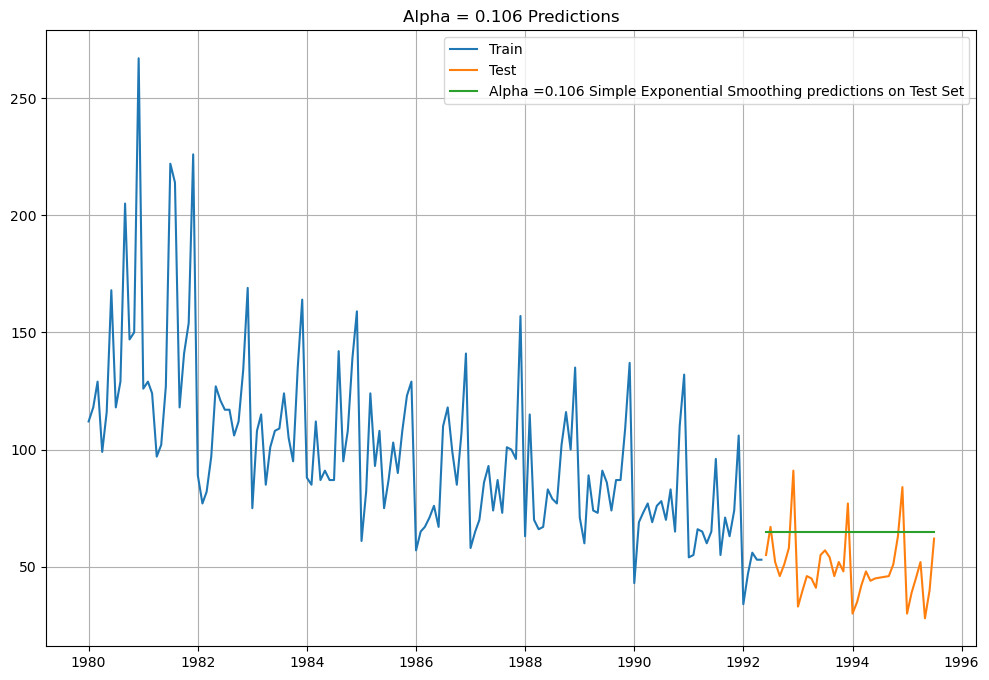

In [80]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(SES_train['Rose-Wine-Sales'], label='Train')
plt.plot(SES_test['Rose-Wine-Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.106 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.106 Predictions');

## SES Model Evaluation

### Model Evaluation for $\alpha$ = 0.106 : Simple Exponential Smoothing

In [81]:
print('SES RMSE:',mean_squared_error(SES_test['Rose-Wine-Sales'].values,SES_test['predict'].values,squared=False))

SES RMSE: 20.288121040544432


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [82]:
## First we will define an empty dataframe to store our values from the loop

SES_resultsDf = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
SES_resultsDf

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [83]:
# Preparing to update the SES_train and SES_test DataFrames to include predictions for each alpha value
# It appears there's a slight misunderstanding in how predictions are stored; let's correct that approach.
for i in np.arange(0, 1, 0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i, optimized=False, use_brute=True)
    # Generating predictions for the training set
    SES_train['predict_{}'.format(i)] = model_SES_alpha_i.fittedvalues
    # Generating forecasts for the test set
    SES_test['predict_{}'.format(i)] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    # Calculating RMSE for both train and test sets
    rmse_SES_model_train_i = mean_squared_error(SES_train['Rose-Wine-Sales'], SES_train['predict_{}'.format(i)], squared=False)
    rmse_SES_model_test_i = mean_squared_error(SES_test['Rose-Wine-Sales'], SES_test['predict_{}'.format(i)], squared=False)
    
    # Appending the results to the DataFrame
    SES_resultsDf = SES_resultsDf.append({'Alpha Values': i, 'Train RMSE': rmse_SES_model_train_i, 'Test RMSE': rmse_SES_model_test_i}, ignore_index=True)




In [84]:
SES_test.head()

Month  Year  Rose-Wine-Sales   predict  predict_0.0  predict_0.05  \
1992-06-01   Jun  1992             55.0  64.92455    99.666667     72.800631   
1992-07-01   Jul  1992             67.0  64.92455    99.666667     72.800631   
1992-08-01   Aug  1992             52.0  64.92455    99.666667     72.800631   
1992-09-01   Sep  1992             46.0  64.92455    99.666667     72.800631   
1992-10-01   Oct  1992             51.0  64.92455    99.666667     72.800631   

            predict_0.1  predict_0.15000000000000002  predict_0.2  \
1992-06-01    65.564594                    61.748285    59.236779   
1992-07-01    65.564594                    61.748285    59.236779   
1992-08-01    65.564594                    61.748285    59.236779   
1992-09-01    65.564594                    61.748285    59.236779   
1992-10-01    65.564594                    61.748285    59.236779   

            predict_0.25  ...  predict_0.5  predict_0.55  \
1992-06-01     57.430573  ...    53.501002     53.286457   
1992-07-01     57.430573  ...    53.501002     53.286457   
1992-08-01     57.430573  ...    53.501002     53.286457   
1992-09-01     57.430573  ...    53.501002     53.286457   
1992-10-01     57.430573  ...    53.501002     53.286457   

            predict_0.6000000000000001  predict_0.65  \
1992-06-01                   53.163384     53.100161   
1992-07-01                   53.163384     53.100161   
1992-08-01                   53.163384     53.100161   
1992-09-01                   53.163384     53.100161   
1992-10-01                   53.163384     53.100161   

            predict_0.7000000000000001  predict_0.75  predict_0.8  \
1992-06-01                   53.071322     53.058015    53.048067   
1992-07-01                   53.071322     53.058015    53.048067   
1992-08-01                   53.071322     53.058015    53.048067   
1992-09-01                   53.071322     53.058015    53.048067   
1992-10-01                   53.071322     53.058015    53.048067   

            predict_0.8500000000000001  predict_0.9  \
1992-06-01                    53.03563    53.020387   
1992-07-01                    53.03563    53.020387   
1992-08-01                    53.03563    53.020387   
1992-09-01                    53.03563    53.020387   
1992-10-01                    53.03563    53.020387   

            predict_0.9500000000000001  
1992-06-01                   53.006316  
1992-07-01                   53.006316  
1992-08-01                   53.006316  
1992-09-01                   53.006316  
1992-10-01                   53.006316  

[5 rows x 24 columns]

### Model Evaluation for  $\alpha$ with lowest RMSE : Simple Exponential Smoothing

In [85]:
# Display the results
print(SES_resultsDf.sort_values(by='Test RMSE').head())  # Display top 5 combinations with lowest Test RMSE

    Alpha Values  Train RMSE  Test RMSE
19          0.95   37.278458  13.820404
18          0.90   36.652617  13.823767
17          0.85   36.062489  13.827424
16          0.80   35.505840  13.830420
15          0.75   34.981087  13.832824


In [86]:
SES_test.head()

Month  Year  Rose-Wine-Sales   predict  predict_0.0  predict_0.05  \
1992-06-01   Jun  1992             55.0  64.92455    99.666667     72.800631   
1992-07-01   Jul  1992             67.0  64.92455    99.666667     72.800631   
1992-08-01   Aug  1992             52.0  64.92455    99.666667     72.800631   
1992-09-01   Sep  1992             46.0  64.92455    99.666667     72.800631   
1992-10-01   Oct  1992             51.0  64.92455    99.666667     72.800631   

            predict_0.1  predict_0.15000000000000002  predict_0.2  \
1992-06-01    65.564594                    61.748285    59.236779   
1992-07-01    65.564594                    61.748285    59.236779   
1992-08-01    65.564594                    61.748285    59.236779   
1992-09-01    65.564594                    61.748285    59.236779   
1992-10-01    65.564594                    61.748285    59.236779   

            predict_0.25  ...  predict_0.5  predict_0.55  \
1992-06-01     57.430573  ...    53.501002     53.286457   
1992-07-01     57.430573  ...    53.501002     53.286457   
1992-08-01     57.430573  ...    53.501002     53.286457   
1992-09-01     57.430573  ...    53.501002     53.286457   
1992-10-01     57.430573  ...    53.501002     53.286457   

            predict_0.6000000000000001  predict_0.65  \
1992-06-01                   53.163384     53.100161   
1992-07-01                   53.163384     53.100161   
1992-08-01                   53.163384     53.100161   
1992-09-01                   53.163384     53.100161   
1992-10-01                   53.163384     53.100161   

            predict_0.7000000000000001  predict_0.75  predict_0.8  \
1992-06-01                   53.071322     53.058015    53.048067   
1992-07-01                   53.071322     53.058015    53.048067   
1992-08-01                   53.071322     53.058015    53.048067   
1992-09-01                   53.071322     53.058015    53.048067   
1992-10-01                   53.071322     53.058015    53.048067   

            predict_0.8500000000000001  predict_0.9  \
1992-06-01                    53.03563    53.020387   
1992-07-01                    53.03563    53.020387   
1992-08-01                    53.03563    53.020387   
1992-09-01                    53.03563    53.020387   
1992-10-01                    53.03563    53.020387   

            predict_0.9500000000000001  
1992-06-01                   53.006316  
1992-07-01                   53.006316  
1992-08-01                   53.006316  
1992-09-01                   53.006316  
1992-10-01                   53.006316  

[5 rows x 24 columns]

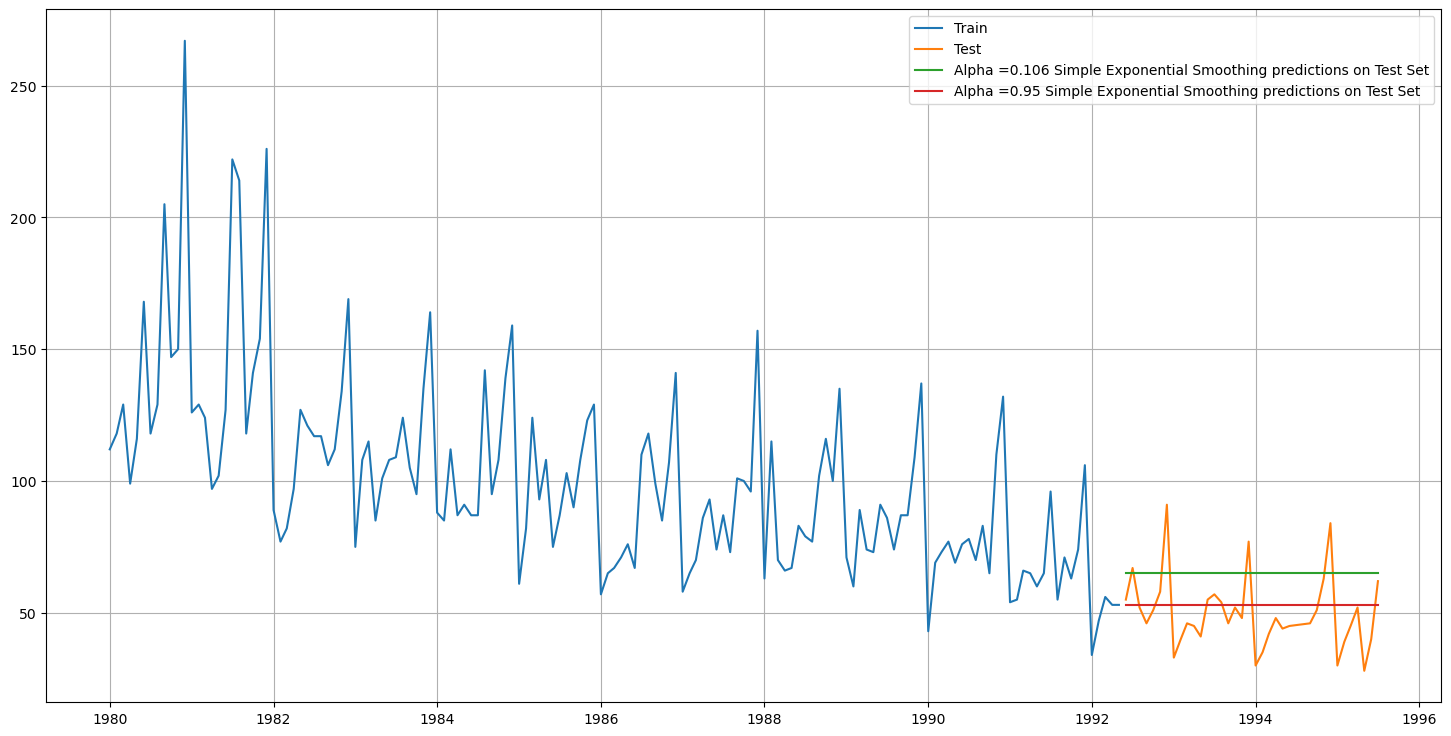

In [87]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose-Wine-Sales'], label='Train')
plt.plot(SES_test['Rose-Wine-Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.106 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict_0.9500000000000001'], label='Alpha =0.95 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [88]:
resultsDf_SES = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Rose-Wine-Sales'].values,SES_test['predict_0.9500000000000001'].values,squared=False)]}
                           ,index=['Alpha=0.95:SES'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES])
resultsDf

Test RMSE
RegressionOnTime             58.977941
2pointTrailingMovingAverage   9.401964
4pointTrailingMovingAverage  12.180380
6pointTrailingMovingAverage  12.403435
9pointTrailingMovingAverage  12.614521
Alpha=0.95:SES               13.820404

## Model 4: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [89]:
DES_train = train.copy()
DES_test = test.copy()

In [90]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train['Rose-Wine-Sales'],initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 9.163398055668188e-12, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 138.76617316247794, 'initial_trend': -0.5146452393529718, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [91]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(DES_test))
DES_predict

1992-06-01    61.569387
1992-07-01    61.054742
1992-08-01    60.540097
1992-09-01    60.025452
1992-10-01    59.510806
1992-11-01    58.996161
1992-12-01    58.481516
1993-01-01    57.966871
1993-02-01    57.452225
1993-03-01    56.937580
1993-04-01    56.422935
1993-05-01    55.908290
1993-06-01    55.393644
1993-07-01    54.878999
1993-08-01    54.364354
1993-09-01    53.849709
1993-10-01    53.335063
1993-11-01    52.820418
1993-12-01    52.305773
1994-01-01    51.791128
1994-02-01    51.276482
1994-03-01    50.761837
1994-04-01    50.247192
1994-05-01    49.732547
1994-06-01    49.217902
1994-07-01    48.703256
1994-08-01    48.188611
1994-09-01    47.673966
1994-10-01    47.159321
1994-11-01    46.644675
1994-12-01    46.130030
1995-01-01    45.615385
1995-02-01    45.100740
1995-03-01    44.586094
1995-04-01    44.071449
1995-05-01    43.556804
1995-06-01    43.042159
1995-07-01    42.527513
Freq: MS, dtype: float64

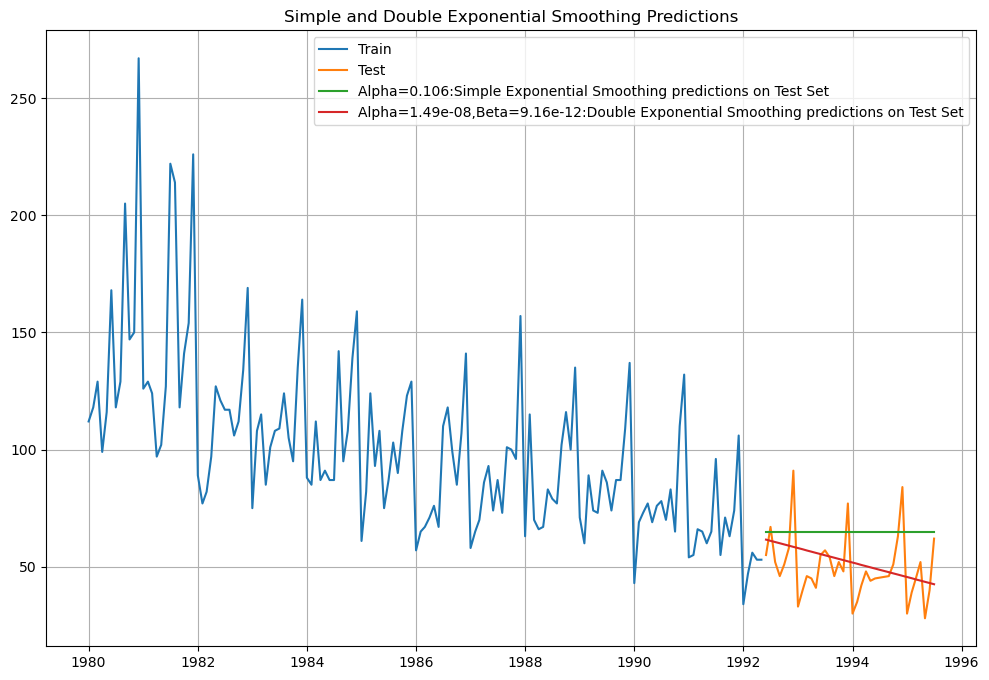

In [92]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train['Rose-Wine-Sales'], label='Train')
plt.plot(DES_test['Rose-Wine-Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.106:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49e-08,Beta=9.16e-12:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

## DES Model Evaluation

### Model Evaluation for $\alpha$ = 1.49e-08 and $\beta$ = 9.16e-12 : Double Exponential Smoothing

In [93]:
print('DES RMSE:',mean_squared_error(DES_test['Rose-Wine-Sales'].values,DES_predict.values,squared=False))

DES RMSE: 13.730719433718463


#### Setting different alpha and beta values.

###### Remember, the higher the beta value more weightage is given to the trend. It determines how quickly the model's estimate of the trend responds to changes in the underlying trend of the data series.


#### We will run a loop with different alpha and beta values to understand which particular value works best for alpha and beta on the test set.

In [94]:
## First we will define an empty dataframe to store our values from the loop

DES_resultsDf = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
DES_resultsDf

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [95]:
# Loop over combinations of alpha and beta
for i in np.arange(0.01, 0.99, 0.1):
    for j in np.arange(0.01, 0.99, 0.1):
        # Fit the DES model with current alpha and beta
        model_DES_alpha_i_j = ExponentialSmoothing(DES_train['Rose-Wine-Sales'], 
                                                   trend="add", 
                                                   initialization_method='estimated').fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
        # Generate fitted values for training set
        DES_train_fitted = model_DES_alpha_i_j.fittedvalues
        # Forecast for the test set
        DES_test_forecast = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        # Calculate RMSE for training and test sets
        rmse_DES_train = mean_squared_error(DES_train['Rose-Wine-Sales'], DES_train_fitted, squared=False)
        rmse_DES_test = mean_squared_error(DES_test['Rose-Wine-Sales'], DES_test_forecast, squared=False)
        
        # Append results to DataFrame
        DES_resultsDf = DES_resultsDf.append({'Alpha': i, 'Beta': j, 'Train RMSE': rmse_DES_train, 'Test RMSE': rmse_DES_test}, ignore_index=True)

# Display the results
print(DES_resultsDf.sort_values(by='Test RMSE').head())  # Display top 5 combinations with lowest Test RMSE

    Alpha Values  Beta Values  Train RMSE  Test RMSE  Alpha  Beta
98           NaN          NaN   52.763891  13.245510   0.91  0.81
95           NaN          NaN   46.159298  13.435578   0.91  0.51
75           NaN          NaN   41.816766  13.552520   0.71  0.51
85           NaN          NaN   43.824455  13.612867   0.81  0.51
48           NaN          NaN   40.438083  13.904032   0.41  0.81


### Model Evaluation for  $\alpha$ and $\beta$ with lowest RMSE : Double Exponential Smoothing

In [96]:
DES_alpha_value = 0.91  # Example specific alpha value
DES_beta_value = 0.81  # Example specific beta value

# 1. Fit the DES model with specific alpha and beta values
model_DES_best = ExponentialSmoothing(DES_train['Rose-Wine-Sales'], trend="add", initialization_method='estimated').fit(smoothing_level=DES_alpha_value, smoothing_slope=DES_beta_value, optimized=False)

# 2. Generate forecasts for the test set duration
DES_predict_best = model_DES_best.forecast(len(DES_test))

# 3. Calculate RMSE using these specific forecasts
DES_RMSE_best = mean_squared_error(DES_test['Rose-Wine-Sales'].values, DES_predict_best.values, squared=False)
print('DES RMSE with best alpha and beta:', DES_RMSE_best.round(2))


DES RMSE with best alpha and beta: 13.25


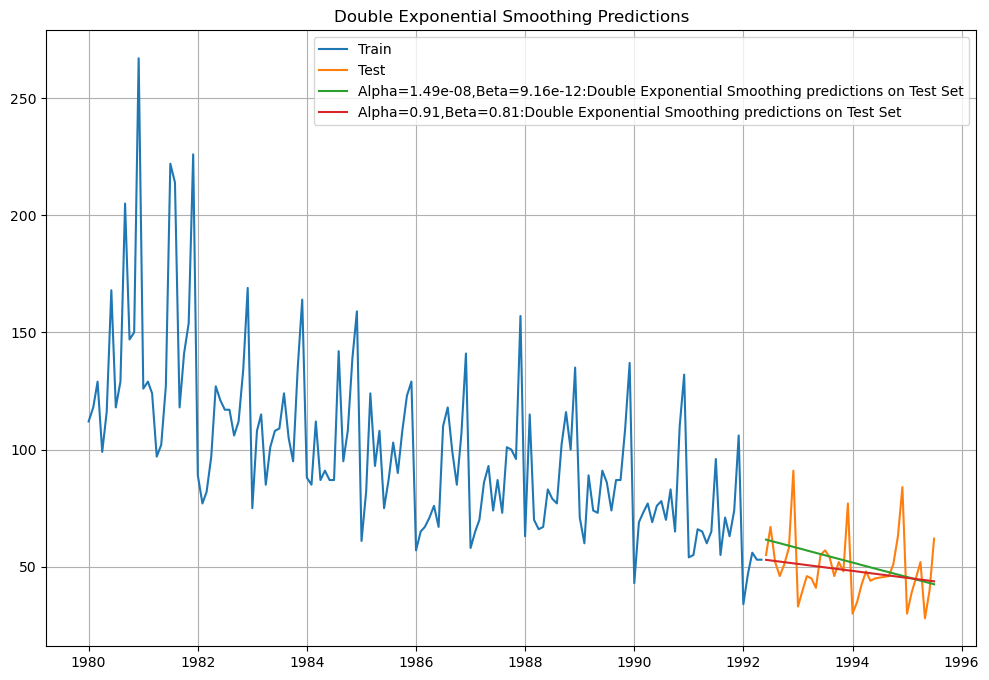

In [97]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train['Rose-Wine-Sales'], label='Train')
plt.plot(DES_test['Rose-Wine-Sales'], label='Test')

plt.plot(DES_predict, label='Alpha=1.49e-08,Beta=9.16e-12:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_best, label='Alpha=0.91,Beta=0.81:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions');

In [98]:
resultsDf_DES = pd.DataFrame({'Test RMSE': [mean_squared_error(DES_test['Rose-Wine-Sales'].values, DES_predict_best.values, squared=False)]}
                           ,index=['Alpha=0.91,Beta=0.81:DES'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES])
resultsDf

Test RMSE
RegressionOnTime             58.977941
2pointTrailingMovingAverage   9.401964
4pointTrailingMovingAverage  12.180380
6pointTrailingMovingAverage  12.403435
9pointTrailingMovingAverage  12.614521
Alpha=0.95:SES               13.820404
Alpha=0.91,Beta=0.81:DES     13.245510

### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

## Model 5: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

Triple Exponential Smoothing, also known as Holt-Winters Exponential Smoothing, extends Double Exponential Smoothing to include a seasonal component. It's applicable when the data exhibits trend and seasonality.

Here's an overview of the model:

### Triple Exponential Smoothing Components:

1. **Level (ℓ)**: This represents the estimated average value of the series at time t. Similar to Double Exponential Smoothing, it is updated at each time step by considering the observed value and the previous estimate.

2. **Trend (b)**: This represents the estimated trend in the series at time t. It is updated by looking at the change in the level component compared to the previous time step.

3. **Seasonality (s)**: This is the new component introduced in Triple Exponential Smoothing. It captures the seasonal variations in the series. Seasonality can be additive or multiplicative, depending on whether the seasonal effect is roughly constant or changes proportionally with the level of the series.

### Triple Exponential Smoothing Equations:

1. **Level Equation**:
   \[ ℓ_t = α(y_t - s_{t-L}) + (1 - α)(ℓ_{t-1} + b_{t-1}) \]
   Where \( y_t \) is the actual value at time t, \( s_{t-L} \) is the seasonal component at time t for L periods ago (seasonal length), and α is the smoothing constant for the level.

2. **Trend Equation**:
   \[ b_t = β(ℓ_t - ℓ_{t-1}) + (1 - β)b_{t-1} \]
   Where β is the smoothing constant for the trend.

3. **Seasonality Equation** (Additive):
   \[ s_t = γ(y_t - ℓ_{t-1} - b_{t-1}) + (1 - γ)s_{t-L} \]
   Or (Multiplicative):
   \[ s_t = γ(\frac{y_t}{ℓ_{t-1} + b_{t-1}}) + (1 - γ)s_{t-L} \]
   Where γ is the smoothing constant for the seasonality and L is the length of the seasonal cycle.

### Forecasting with Triple Exponential Smoothing:

The forecast \( F \) for m periods ahead is given by:

- **Additive Seasonality**:
  \[ F_{t+m} = ℓ_t + mb_t + s_{t-L+1+(m-1)modL} \]

- **Multiplicative Seasonality**:
  \[ F_{t+m} = (ℓ_t + mb_t) \times s_{t-L+1+(m-1)modL} \]

### Smoothing Constants:

- **α (Level Smoothing)**: Controls the rate at which the influence of the observations at prior time steps decays exponentially.
- **β (Trend Smoothing)**: Controls the rate at which the information in the trend component decays exponentially.
- **γ (Seasonal Smoothing)**: Controls the rate at which the influence of the seasonal component decays.

Like with double exponential smoothing, 0 < α < 1, 0 < β < 1, and 0 < γ < 1. These parameters can either be set using domain knowledge or optimized using historical data to minimize a loss function, often the Mean Squared Error (MSE).

The Triple Exponential Smoothing model adapts to level, trend, and seasonality in the data, making it well-suited for time series forecasting where these components are present.

In [99]:
TES_train = train.copy()
TES_test = test.copy()

In [100]:
model_TES = ExponentialSmoothing(TES_train['Rose-Wine-Sales'],trend='additive',seasonal='multiplicative',initialization_method='estimated')

In [101]:
model_TES_autofit = model_TES.fit()

In [102]:
model_TES_autofit.params

{'smoothing_level': 0.09921441907764324,
 'smoothing_trend': 4.0523978457415796e-05,
 'smoothing_seasonal': 0.0009369348737068217,
 'damping_trend': nan,
 'initial_level': 181.91352018800035,
 'initial_trend': -0.7348121265479566,
 'initial_seasons': array([0.59800853, 0.67644056, 0.74440216, 0.65748305, 0.73043527,
        0.78771156, 0.87933347, 0.91854291, 0.86902415, 0.85213877,
        0.99205609, 1.36172813]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [103]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Month  Year  Rose-Wine-Sales  auto_predict
1992-06-01   Jun  1992             55.0     57.271133
1992-07-01   Jul  1992             67.0     63.300554
1992-08-01   Aug  1992             52.0     65.415270
1992-09-01   Sep  1992             46.0     61.295888
1992-10-01   Oct  1992             51.0     59.475668

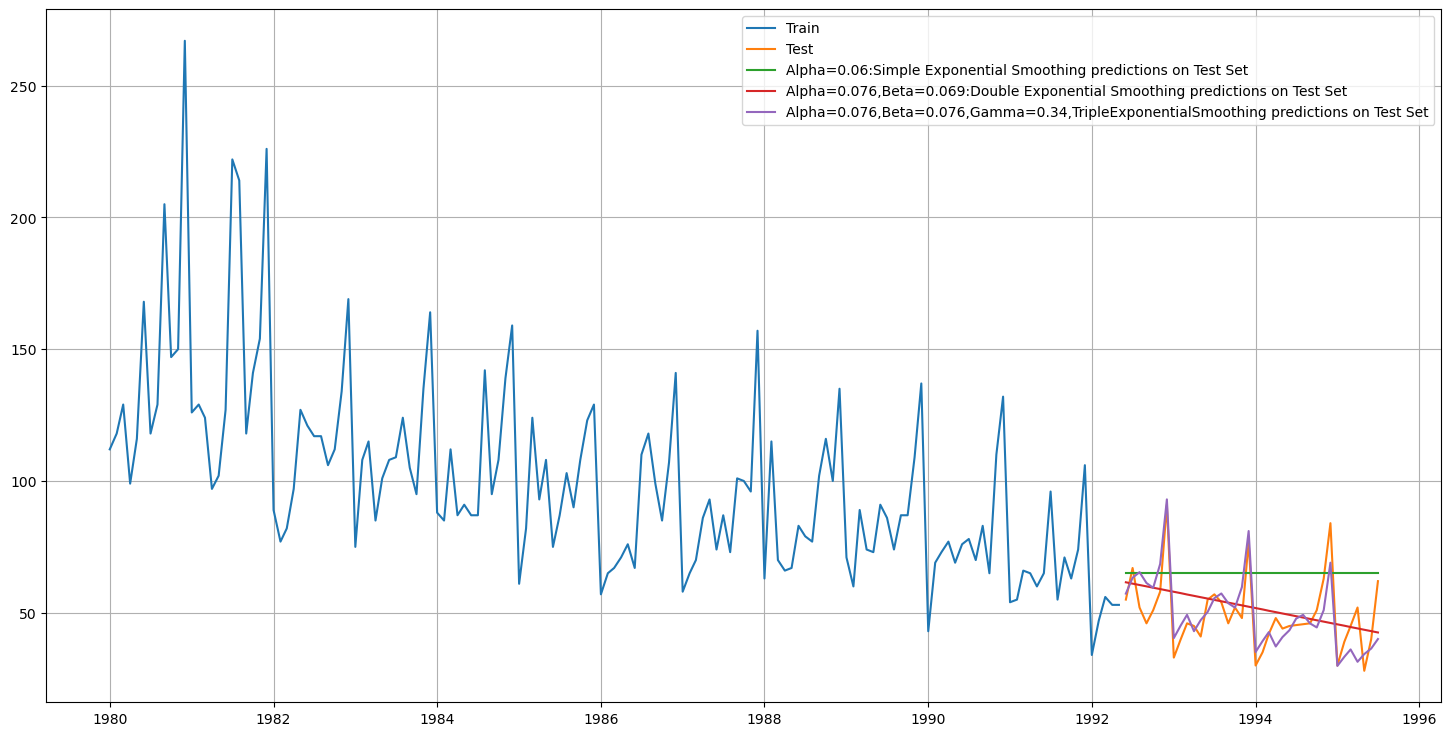

In [104]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose-Wine-Sales'], label='Train')
plt.plot(TES_test['Rose-Wine-Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.06:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.076,Beta=0.069:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.076,Beta=0.076,Gamma=0.34,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

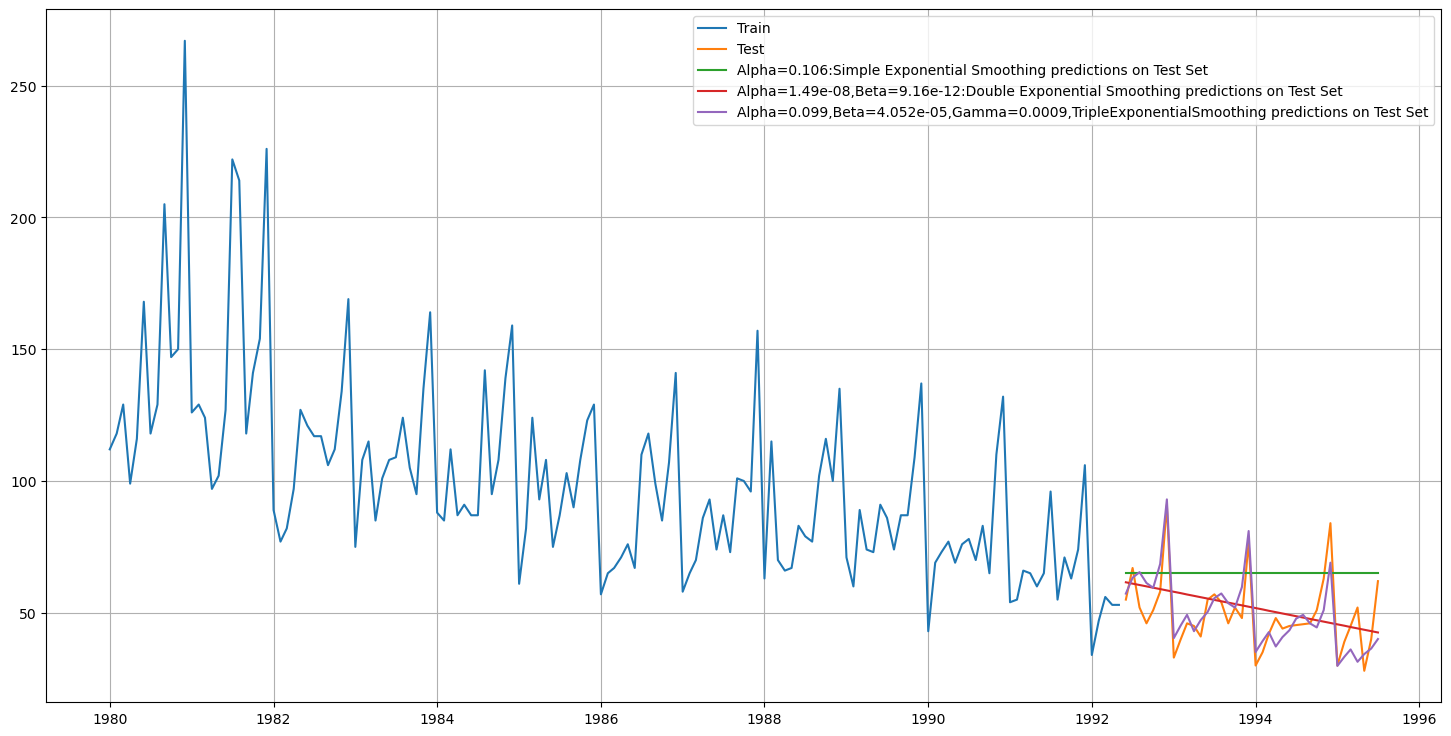

In [105]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose-Wine-Sales'], label='Train')
plt.plot(TES_test['Rose-Wine-Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.106:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49e-08,Beta=9.16e-12:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.099,Beta=4.052e-05,Gamma=0.0009,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

## TES Model Evaluation

### Model Evaluation for $\alpha$ = 0.099, $\beta$ = 4.052e-05 and $\gamma$ = 0.0009: Triple Exponential Smoothing

In [106]:
print('TES RMSE:',mean_squared_error(TES_test['Rose-Wine-Sales'].values,TES_test['auto_predict'].values,squared=False))

TES RMSE: 8.393999782960273


#### Setting different alpha, beta and gamma values.

###### Remember, the higher the gamma value more weightage is given to the seasonality. The role of gamma ( is particularly important in forecasting contexts where the seasonal patterns may evolve. 

###### The appropriate setting of gamma (along with alpha for the level and beta (for the trend) can significantly impact the model's performance, balancing the need to capture genuine seasonal changes while avoiding overreacting to random fluctuations or noise in the data.


#### We will run a loop with different alpha, beta and gamma values to understand which particular value works best for alpha, beta and gamma on the test set.

In [107]:
## First we will define an empty dataframe to store our values from the loop

TES_resultsDf = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
TES_resultsDf

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [108]:
for i in np.arange(0, 1, 0.05):  
    for j in np.arange(0, 1, 0.05):
        for k in np.arange(0, 1, 0.05):
            model = ExponentialSmoothing(TES_train['Rose-Wine-Sales'], trend="add", seasonal='mul', seasonal_periods=12, initialization_method='estimated').fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, optimized=False)
            TES_train_fitted = model.fittedvalues
            TES_test_forecast = model.forecast(len(TES_test))
                
            rmse_train = mean_squared_error(TES_train['Rose-Wine-Sales'], TES_train_fitted, squared=False)
            rmse_test = mean_squared_error(TES_test['Rose-Wine-Sales'], TES_test_forecast, squared=False)
                
            TES_resultsDf = TES_resultsDf.append({'Alpha Values': i, 'Beta Values': j, 'Gamma Values': k, 'Train RMSE': rmse_train, 'Test RMSE': rmse_test}, ignore_index=True)
            

In [109]:
print(TES_resultsDf.sort_values(by='Test RMSE').head())

      Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
1483          0.15         0.70          0.15   21.220365   6.084552
1129          0.10         0.80          0.45   24.286625   6.164578
1462          0.15         0.65          0.10   20.582891   6.191302
1803          0.20         0.50          0.15   20.976762   6.240517
2166          0.25         0.40          0.30   22.467093   6.364741


### Model Evaluation for  $\alpha$, $\beta$ and $\gamma$ with lowest RMSE : Triple Exponential Smoothing

In [110]:
TES_alpha_value = 0.15  # Example specific alpha value
TES_beta_value = 0.70  # Example specific beta value
TES_gamma_value = 0.15  # Example specific beta value

# 1. Fit the DES model with specific alpha and beta values
model_TES_best = ExponentialSmoothing(TES_train['Rose-Wine-Sales'], trend="add", seasonal='mul', seasonal_periods=12, initialization_method='estimated').fit(smoothing_level=TES_alpha_value, smoothing_slope=TES_beta_value, smoothing_seasonal=TES_gamma_value, optimized=False)

# 2. Generate forecasts for the test set duration
TES_predict_best = model_TES_best.forecast(len(TES_test))

# 3. Calculate RMSE using these specific forecasts
TES_RMSE_best = mean_squared_error(TES_test['Rose-Wine-Sales'].values, TES_predict_best.values, squared=False)
print('TES RMSE with best alpha, beta and gamma:', TES_RMSE_best.round(2))


TES RMSE with best alpha, beta and gamma: 6.08


### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.15, $\beta$ = 0.70 and $\gamma$ = 0.15.

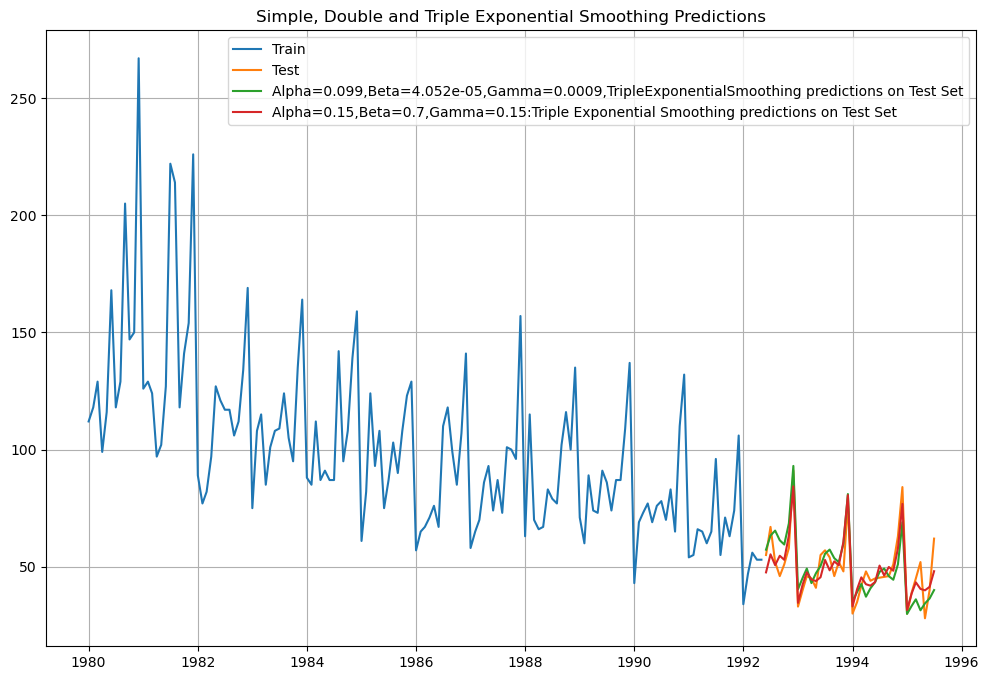

In [111]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(TES_train['Rose-Wine-Sales'], label='Train')
plt.plot(TES_test['Rose-Wine-Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.099,Beta=4.052e-05,Gamma=0.0009,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_predict_best, label='Alpha=0.15,Beta=0.7,Gamma=0.15:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Triple Exponential Smoothing Predictions');

In [112]:
resultsDf_TES = pd.DataFrame({'Test RMSE': [mean_squared_error(TES_test['Rose-Wine-Sales'].values, TES_predict_best.values, squared=False)]}
                           ,index=['Alpha=0.15,Beta=0.7, Gamma=0.15:TES'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES, resultsDf_TES ])
resultsDf

Test RMSE
RegressionOnTime                     58.977941
2pointTrailingMovingAverage           9.401964
4pointTrailingMovingAverage          12.180380
6pointTrailingMovingAverage          12.403435
9pointTrailingMovingAverage          12.614521
Alpha=0.95:SES                       13.820404
Alpha=0.91,Beta=0.81:DES             13.245510
Alpha=0.15,Beta=0.7, Gamma=0.15:TES   6.084552

## Building a Forecast Model using Holt Winters' Method (Triple Exponential Smoothing) 

So far we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 2 models which gave us the best accuracy (least RMSE).

The two models to be built on the whole data are the following:

* Alpha=0.099,Beta=4.052e-05,Gamma=0.0009,TripleExponentialSmoothing
* Alpha=0.15,Beta=0.7,Gamma=0.15,TripleExponentialSmoothing	

In [113]:
rose.head()

Month  Year  Rose-Wine-Sales
1980-01-01   Jan  1980            112.0
1980-02-01   Feb  1980            118.0
1980-03-01   Mar  1980            129.0
1980-04-01   Apr  1980             99.0
1980-05-01   May  1980            116.0

In [114]:
rose_sales_df = rose.copy()

In [115]:
rose_sales_df.drop(columns=['Month', 'Year'], inplace=True)
rose_sales_df.head()

Rose-Wine-Sales
1980-01-01            112.0
1980-02-01            118.0
1980-03-01            129.0
1980-04-01             99.0
1980-05-01            116.0

In [116]:
rose_sales_df.tail()

Rose-Wine-Sales
1995-03-01             45.0
1995-04-01             52.0
1995-05-01             28.0
1995-06-01             40.0
1995-07-01             62.0

### Building TES Forecast Model for Model 1

In [117]:
full_TES_model_1 = ExponentialSmoothing(rose_sales_df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.09921441907764324,
                                                                 smoothing_trend=4.0523978457415796e-05,
                                                                 smoothing_seasonal=0.0009369348737068217)

In [118]:
RMSE_full_TES_model_1 = metrics.mean_squared_error(rose_sales_df['Rose-Wine-Sales'],full_TES_model_1.fittedvalues,squared=False)

print('RMSE:',RMSE_full_TES_model_1)

RMSE: 16.10254580976673


In [119]:
rose_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Freq: MS
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rose-Wine-Sales  187 non-null    float64
dtypes: float64(1)
memory usage: 7.0 KB


In [120]:
# Getting the predictions for the same number of times stamps that are present in the test data
full_TES_model_1_prediction = full_TES_model_1.forecast(steps=len(test))

In [121]:
full_TES_model_1_prediction.head(24).round()

1995-08-01    47.0
1995-09-01    44.0
1995-10-01    43.0
1995-11-01    49.0
1995-12-01    67.0
1996-01-01    29.0
1996-02-01    32.0
1996-03-01    35.0
1996-04-01    31.0
1996-05-01    33.0
1996-06-01    35.0
1996-07-01    39.0
1996-08-01    40.0
1996-09-01    37.0
1996-10-01    36.0
1996-11-01    41.0
1996-12-01    55.0
1997-01-01    24.0
1997-02-01    27.0
1997-03-01    29.0
1997-04-01    25.0
1997-05-01    27.0
1997-06-01    29.0
1997-07-01    32.0
Freq: MS, dtype: float64

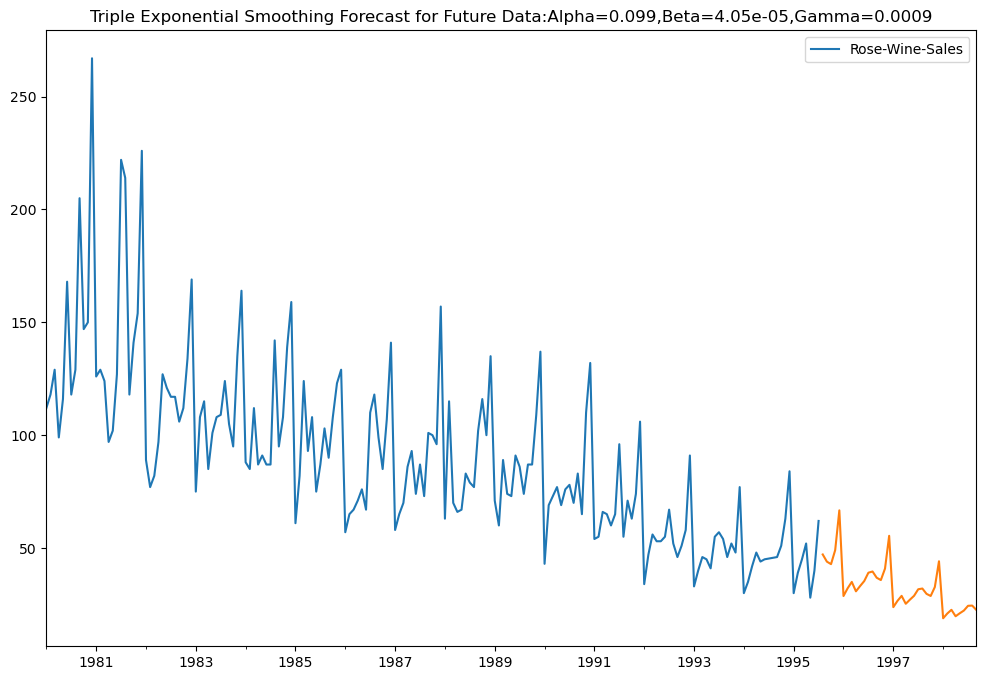

In [122]:
rose_sales_df.plot()
full_TES_model_1_prediction.plot();
plt.title('Triple Exponential Smoothing Forecast for Future Data:Alpha=0.099,Beta=4.05e-05,Gamma=0.0009');

### Calculating upper and lower confidence bands at 95% confidence level

In [123]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
full_TES_model_1_prediction_df = pd.DataFrame({'lower_CI':full_TES_model_1_prediction - 1.96*np.std(full_TES_model_1.resid,ddof=1),
                          'prediction':full_TES_model_1_prediction,
                          'upper_ci': full_TES_model_1_prediction + 1.96*np.std(full_TES_model_1.resid,ddof=1)})
full_TES_model_1_prediction_df.head(24).round()

lower_CI  prediction  upper_ci
1995-08-01      15.0        47.0      79.0
1995-09-01      12.0        44.0      76.0
1995-10-01      11.0        43.0      75.0
1995-11-01      17.0        49.0      81.0
1995-12-01      35.0        67.0      98.0
1996-01-01      -3.0        29.0      60.0
1996-02-01       1.0        32.0      64.0
1996-03-01       3.0        35.0      67.0
1996-04-01      -1.0        31.0      62.0
1996-05-01       2.0        33.0      65.0
1996-06-01       4.0        35.0      67.0
1996-07-01       7.0        39.0      71.0
1996-08-01       8.0        40.0      71.0
1996-09-01       5.0        37.0      68.0
1996-10-01       4.0        36.0      67.0
1996-11-01       9.0        41.0      73.0
1996-12-01      24.0        55.0      87.0
1997-01-01      -8.0        24.0      55.0
1997-02-01      -5.0        27.0      58.0
1997-03-01      -3.0        29.0      60.0
1997-04-01      -6.0        25.0      57.0
1997-05-01      -5.0        27.0      59.0
1997-06-01      -3.0        29.0      60.0
1997-07-01       0.0        32.0      63.0

In [124]:
full_TES_model_1_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 1995-08-01 to 1998-09-01
Freq: MS
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lower_CI    38 non-null     float64
 1   prediction  38 non-null     float64
 2   upper_ci    38 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


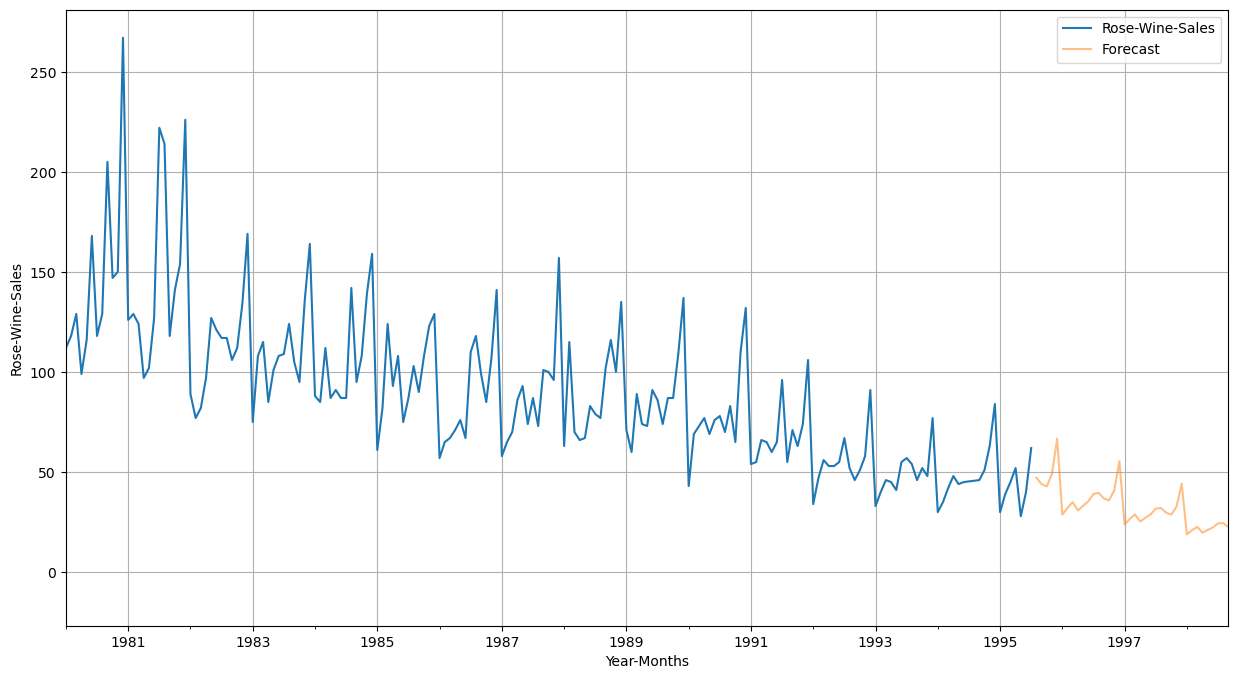

In [125]:
# plot the forecast along with the confidence band

axis = rose_sales_df.plot(label='Actual', figsize=(15,8))
full_TES_model_1_prediction_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(full_TES_model_1_prediction_df.index, full_TES_model_1_prediction_df['lower_CI'], full_TES_model_1_prediction_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose-Wine-Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

### Analysing the Residual Diagnostics

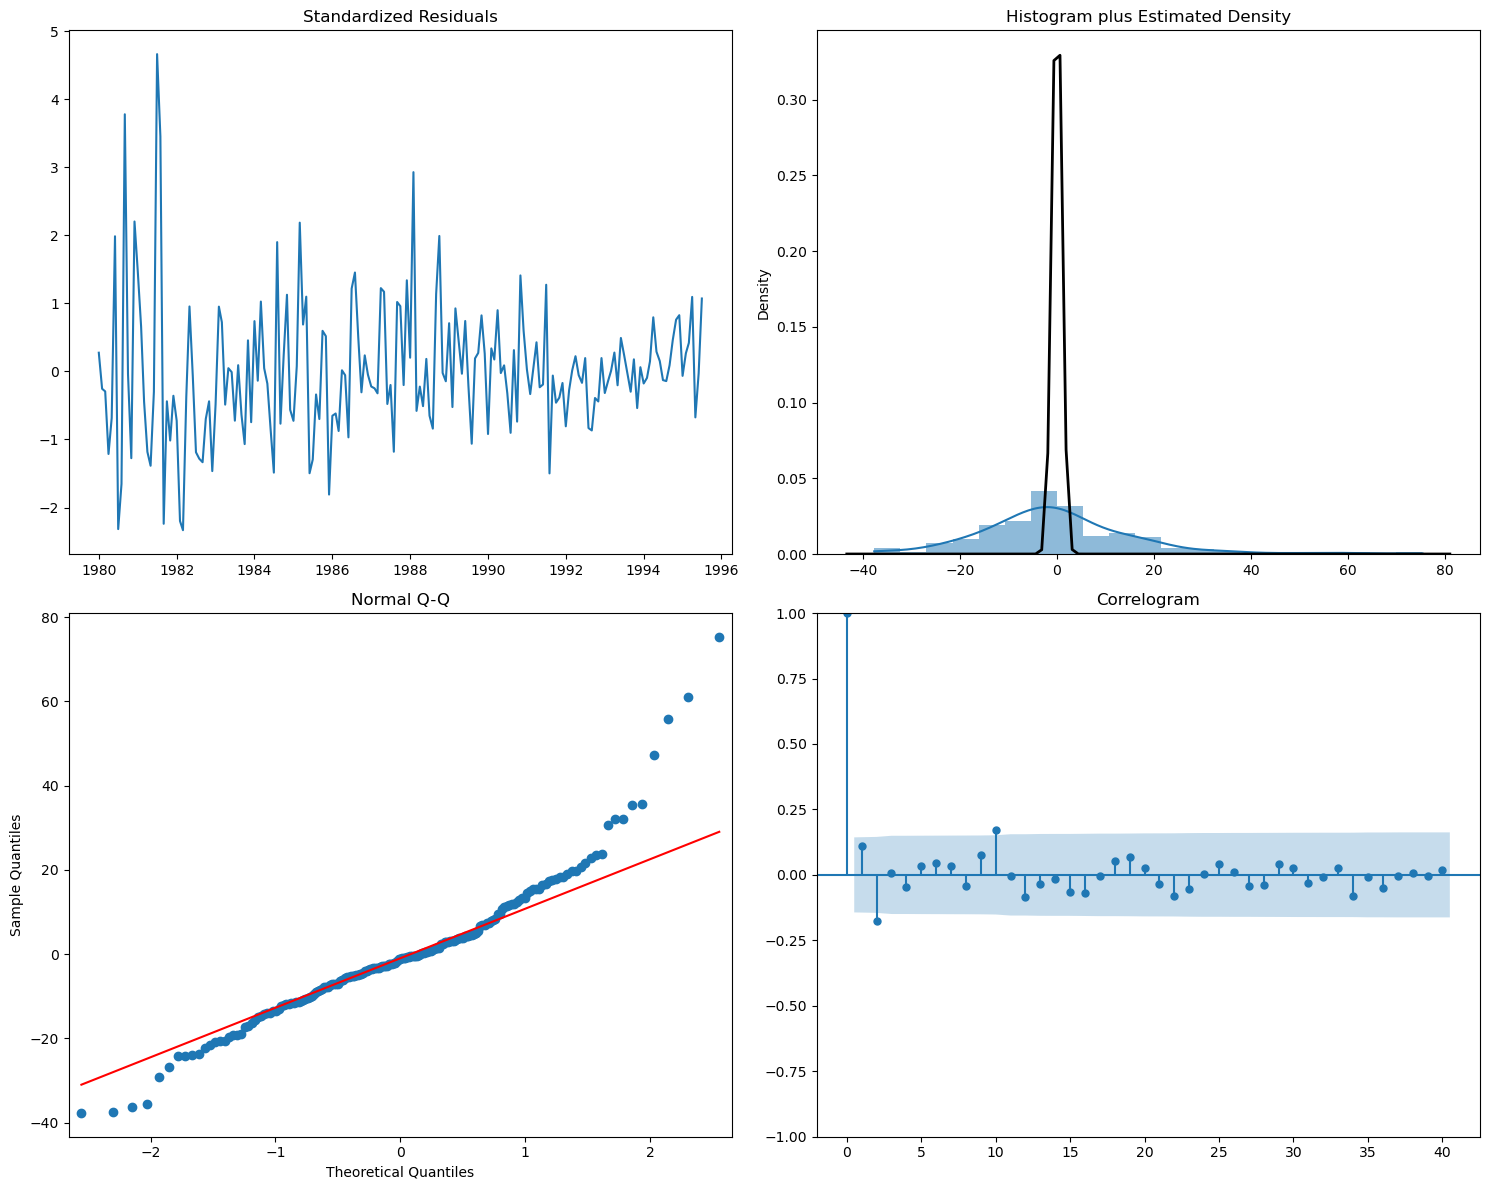

In [126]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

residuals = full_TES_model_1.resid

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Standardized residuals
axes[0, 0].plot(residuals / residuals.std())
axes[0, 0].set_title('Standardized Residuals')

# Histogram plus estimated density
sns.histplot(residuals, kde=True, stat="density", linewidth=0, ax=axes[0, 1])
xmin, xmax = axes[0, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
axes[0, 1].plot(x, p, 'k', linewidth=2)
axes[0, 1].set_title('Histogram plus Estimated Density')

# Normal Q-Q plot
sm.qqplot(residuals, line='q', ax=axes[1, 0])
axes[1, 0].set_title('Normal Q-Q')

# Correlogram
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=axes[1, 1])
axes[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()



### Building TES Forecast Model for Model 2

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.


In [127]:
full_TES_model_2 = ExponentialSmoothing(rose_sales_df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.15,
                                                                 smoothing_trend=0.70,
                                                                 smoothing_seasonal=0.15)

In [128]:
RMSE_full_TES_model_2 = metrics.mean_squared_error(rose_sales_df['Rose-Wine-Sales'],full_TES_model_2.fittedvalues,squared=False)

print('RMSE:',RMSE_full_TES_model_2)

RMSE: 19.009148528479752


In [129]:
# Getting the predictions for the same number of times stamps that are present in the test data
full_TES_model_2_prediction = full_TES_model_2.forecast(steps=len(test))

In [130]:
full_TES_model_2_prediction.head(24).round()

1995-08-01    45.0
1995-09-01    44.0
1995-10-01    45.0
1995-11-01    50.0
1995-12-01    68.0
1996-01-01    26.0
1996-02-01    32.0
1996-03-01    36.0
1996-04-01    35.0
1996-05-01    31.0
1996-06-01    34.0
1996-07-01    37.0
1996-08-01    33.0
1996-09-01    32.0
1996-10-01    32.0
1996-11-01    36.0
1996-12-01    48.0
1997-01-01    18.0
1997-02-01    22.0
1997-03-01    24.0
1997-04-01    23.0
1997-05-01    20.0
1997-06-01    22.0
1997-07-01    24.0
Freq: MS, dtype: float64

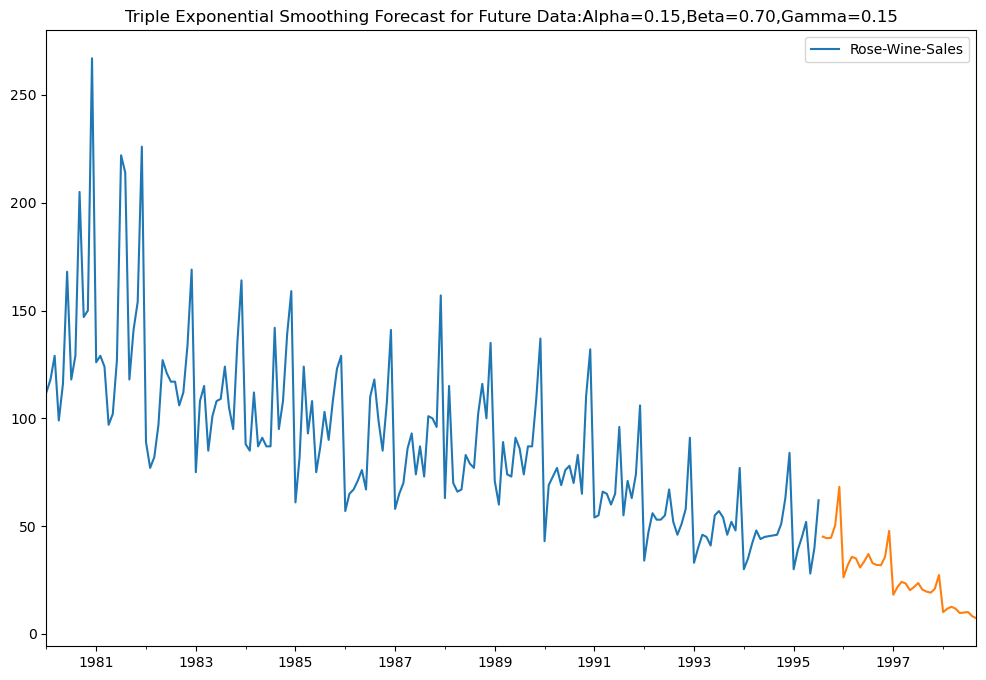

In [131]:
rose_sales_df.plot()
full_TES_model_2_prediction.plot();
plt.title('Triple Exponential Smoothing Forecast for Future Data:Alpha=0.15,Beta=0.70,Gamma=0.15');

In [132]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
full_TES_model_2_prediction_df = pd.DataFrame({'lower_CI':full_TES_model_2_prediction - 1.96*np.std(full_TES_model_2.resid,ddof=1),
                          'prediction':full_TES_model_2_prediction,
                          'upper_ci': full_TES_model_2_prediction + 1.96*np.std(full_TES_model_2.resid,ddof=1)})
full_TES_model_2_prediction_df.head(24).round()

lower_CI  prediction  upper_ci
1995-08-01       8.0        45.0      82.0
1995-09-01       7.0        44.0      82.0
1995-10-01       7.0        45.0      82.0
1995-11-01      13.0        50.0      88.0
1995-12-01      31.0        68.0     106.0
1996-01-01     -11.0        26.0      64.0
1996-02-01      -6.0        32.0      69.0
1996-03-01      -2.0        36.0      73.0
1996-04-01      -2.0        35.0      72.0
1996-05-01      -7.0        31.0      68.0
1996-06-01      -4.0        34.0      71.0
1996-07-01      -0.0        37.0      74.0
1996-08-01      -5.0        33.0      70.0
1996-09-01      -5.0        32.0      69.0
1996-10-01      -5.0        32.0      69.0
1996-11-01      -2.0        36.0      73.0
1996-12-01      10.0        48.0      85.0
1997-01-01     -19.0        18.0      56.0
1997-02-01     -16.0        22.0      59.0
1997-03-01     -13.0        24.0      62.0
1997-04-01     -14.0        23.0      61.0
1997-05-01     -17.0        20.0      58.0
1997-06-01     -16.0        22.0      59.0
1997-07-01     -14.0        24.0      61.0

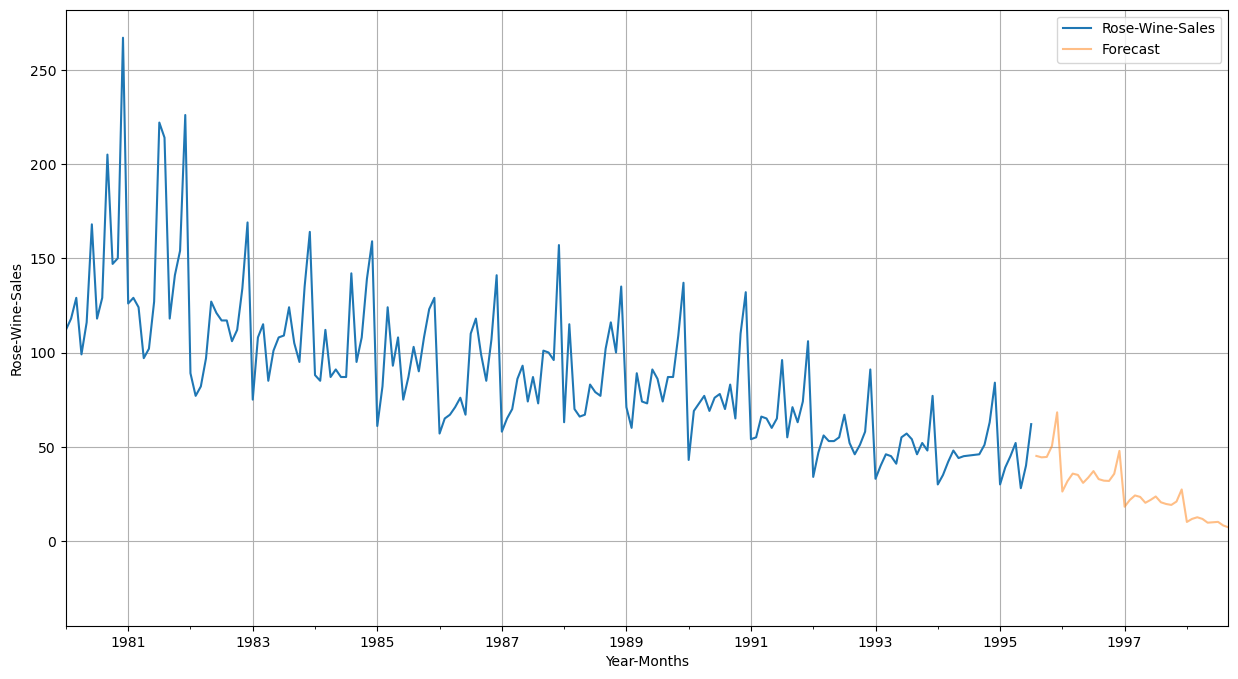

In [133]:
# plot the forecast along with the confidence band

axis = rose_sales_df.plot(label='Actual', figsize=(15,8))
full_TES_model_2_prediction_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(full_TES_model_2_prediction_df.index, full_TES_model_2_prediction_df['lower_CI'], full_TES_model_2_prediction_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose-Wine-Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

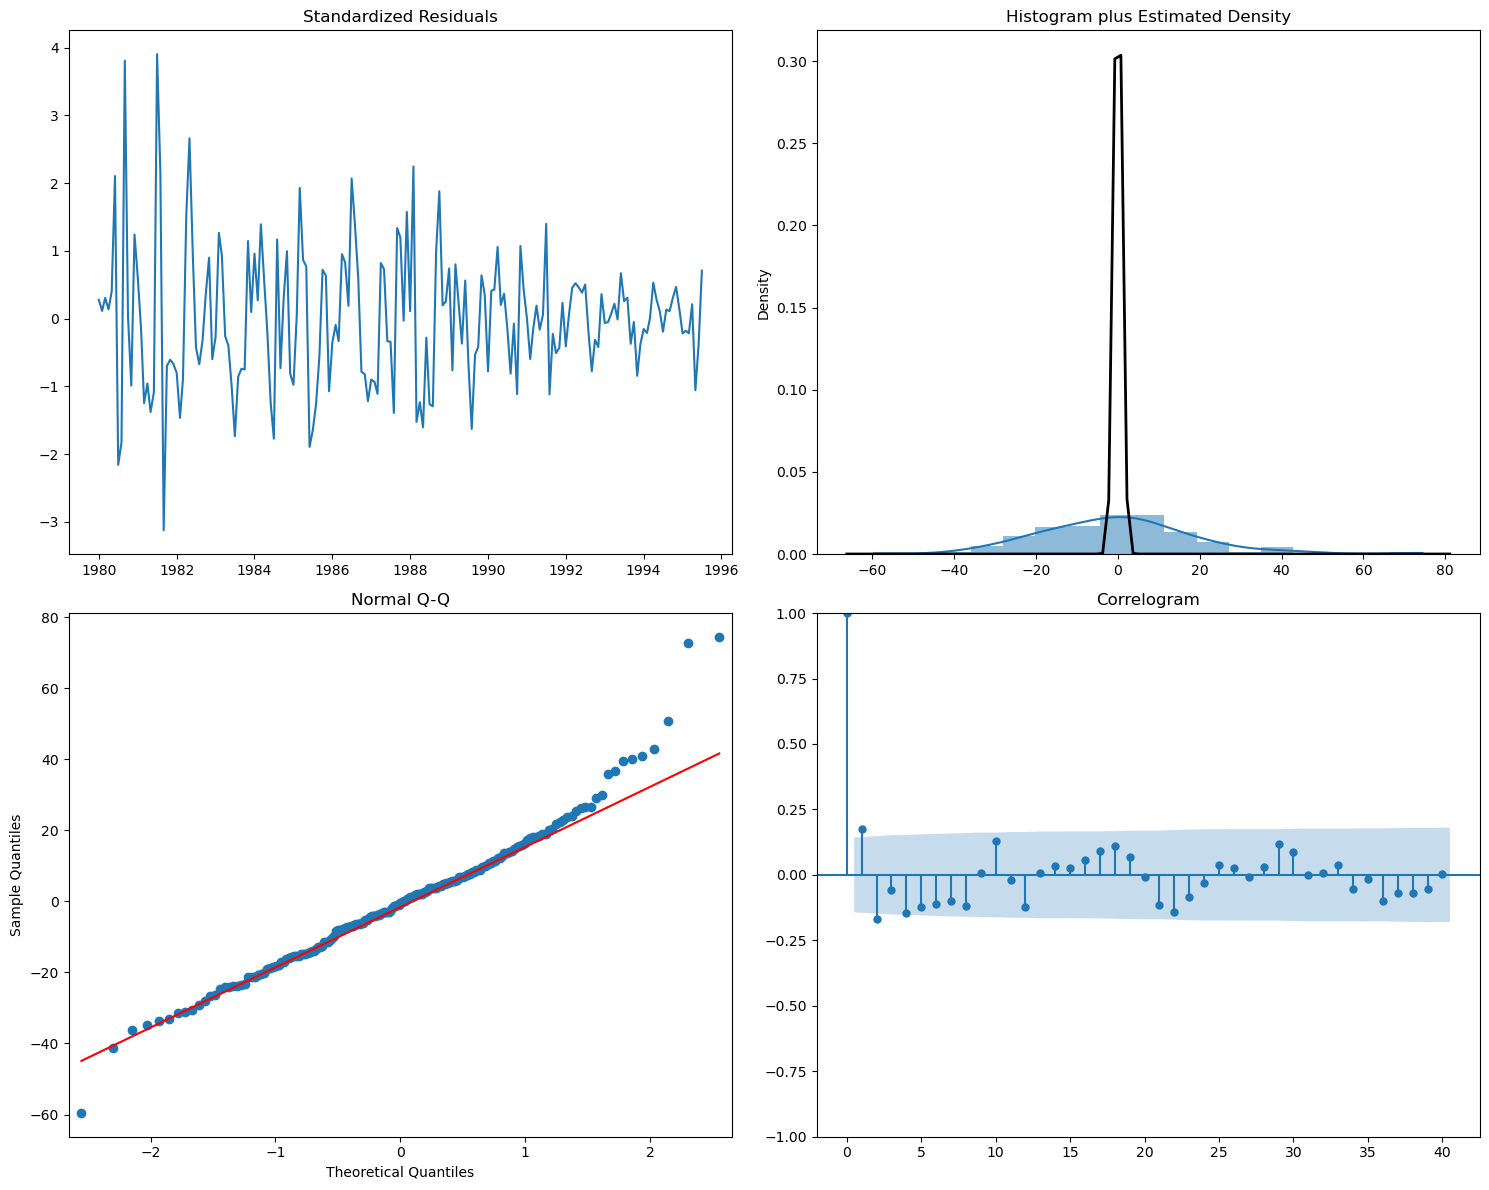

In [134]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

residuals = full_TES_model_2.resid

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Standardized residuals
axes[0, 0].plot(residuals / residuals.std())
axes[0, 0].set_title('Standardized Residuals')

# Histogram plus estimated density
sns.histplot(residuals, kde=True, stat="density", linewidth=0, ax=axes[0, 1])
xmin, xmax = axes[0, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
axes[0, 1].plot(x, p, 'k', linewidth=2)
axes[0, 1].set_title('Histogram plus Estimated Density')

# Normal Q-Q plot
sm.qqplot(residuals, line='q', ax=axes[1, 0])
axes[1, 0].set_title('Normal Q-Q')

# Correlogram
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=axes[1, 1])
axes[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

## <font color='blue'>AR / ARMA / ARIMA / SARIMA Models: </font>

## Auto Regressive(AR) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Autoregression means **regression of a variable on itself** which means **Autoregressive models use previous time period values to predict the current time period values.**


- One of the fundamental assumptions of an AR model is that the **time series is assumed to be a stationary process.**


- An AR(p) model (Auto-Regressive model of order p) can be written as: 

## <font color='blue'> $y_{t}$ =   $φ_{1} y_{t-1} + φ_{2}y_{t-2} + ……+ φ_{p} y_{t-p} + ε_{t}$</font>

- <font color='blue'>$ε_{t}$ </font>**is an error term which is an independent and identically distributed random variable (or in other words, a white noise) with the parameters mean = 0 and standard deviation = σ**
- The <font color='blue'>φ </font>**are regression coefficients multiplied by lagged time series variable, which captures the effect of the input variable on the output, provided intermediate values do not change.**


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## How to check for Stationarity?


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*

####  Non differenced full data Time series

Text(0, 0.5, 'Rose Wine Sales')

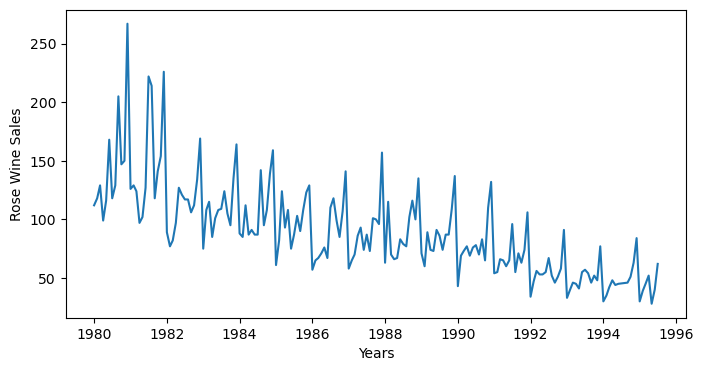

In [135]:
plt.figure(figsize=(8, 4))
plt.plot(rose_sales_df)
plt.xlabel('Years')
plt.ylabel('Rose Wine Sales')

In [136]:
from statsmodels.tsa.stattools import adfuller

In [137]:
dftest_non_differenced = adfuller(rose_sales_df)#python implementation of dicky fuller test 
dftest_non_differenced
print('DF test statistic is %3.3f' %dftest_non_differenced[0])
print('DF test p-value is %1.4f' %dftest_non_differenced[1])

DF test statistic is -1.877
DF test p-value is 0.3431


***the p-value 0.34 is very large, and not smaller than 0.05 and thus is not a stationary series.***

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## How to Make a Time Series Stationary ? - Differencing 'd'

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Differencing **'d'** is done on a non-stationary time series data one or more times to convert it into stationary. 



- **(d=1) 1st order differencing is done where the difference between the current and previous (1 lag before) series is taken and then checked for stationarity using the ADF(Augmented Dicky Fueller) test. If differenced time series is stationary, we proceed with AR modeling. Else we do (d=2) 2nd order differencing, and this process repeats till we get a stationary time series** 

    - <font color='blue'> 1st  order differencing equation is : $𝒚_{𝒕} = 𝒚_{𝒕} − 𝒚_{𝒕-1}$
	- 2nd order differencing equation is : $𝒚_{𝒕} = (𝒚_{𝒕} − 𝒚_{𝒕-1}) − (𝒚_{𝒕-1} -y_{t-2})$		and so on…</font>


- The variance of a time series may also not be the same over time.   To remove this kind of non-stationarity, we can transform     the data. **If the variance is increasing over time, then a log transformation can stabilize the variance.** 


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


#### Performing differencing ( d=1 ) as the data is non-stationary

Text(0, 0.5, 'Rose Wine Sales')

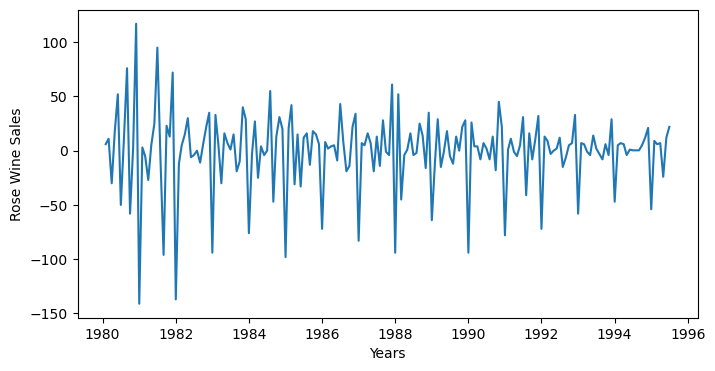

In [138]:
plt.figure(figsize=(8, 4))
plt.plot(rose_sales_df.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Rose Wine Sales')

In [139]:
# First-order differencing on the data
rose_sales_df['Differenced'] = rose_sales_df['Rose-Wine-Sales'].diff(periods=1)

# Drop the NaN values that result from differencing
rose_sales_df_diff = rose_sales_df.dropna(subset=['Differenced'])

# Perform the Augmented Dickey-Fuller test on the differenced data
adf_test_result_diff = adfuller(rose_sales_df_diff['Differenced'])

# Extract the test statistic and p-value for the differenced data
adf_statistic_diff, p_value_diff = adf_test_result_diff[0], adf_test_result_diff[1]

print('DF test statistic is %3.3f' %adf_statistic_diff)
print('DF test p-value is %1.4f' %p_value_diff)

DF test statistic is -8.044
DF test p-value is 0.0000


***the p-value 0.00 is smaller than 0.05 and thus this has become a stationary series.***

Let's check the DF again to see Original Sales values and Differenced Sales Values

In [140]:
rose_sales_df.head()

Rose-Wine-Sales  Differenced
1980-01-01            112.0          NaN
1980-02-01            118.0          6.0
1980-03-01            129.0         11.0
1980-04-01             99.0        -30.0
1980-05-01            116.0         17.0

## Alternative way to Check for Stationarity

In [141]:
## Test for stationarity of the series - Dicky Fuller test

def test_stationarity(timeseries):
    
    # Drop NaN values to avoid errors in rolling statistics and Dickey-Fuller test
    timeseries.dropna(inplace=True)
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.figure(figsize=(12, 6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput, '\n')


#### Checking output of our test stationarity function on original time series

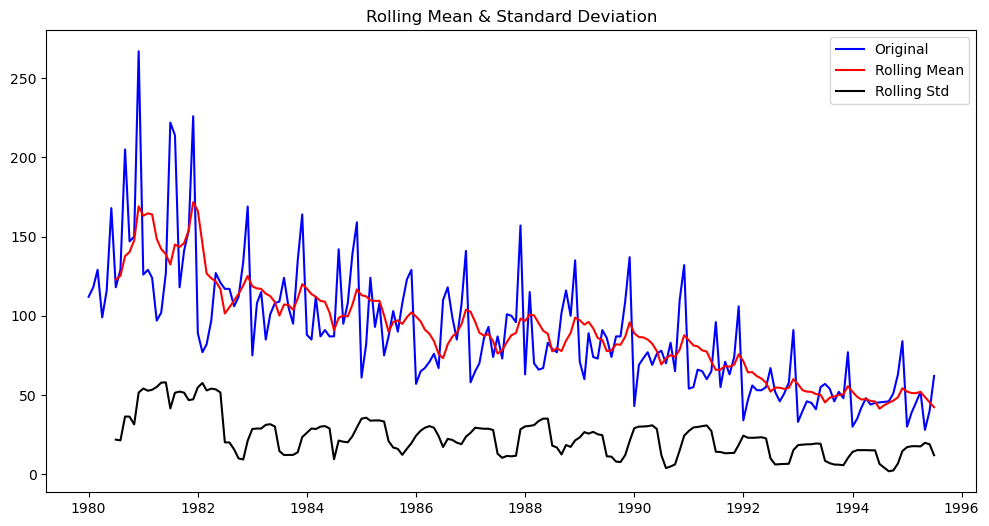

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [142]:
test_stationarity(rose_sales_df['Rose-Wine-Sales'])

#### Checking output of our test stationarity function on differenced time series

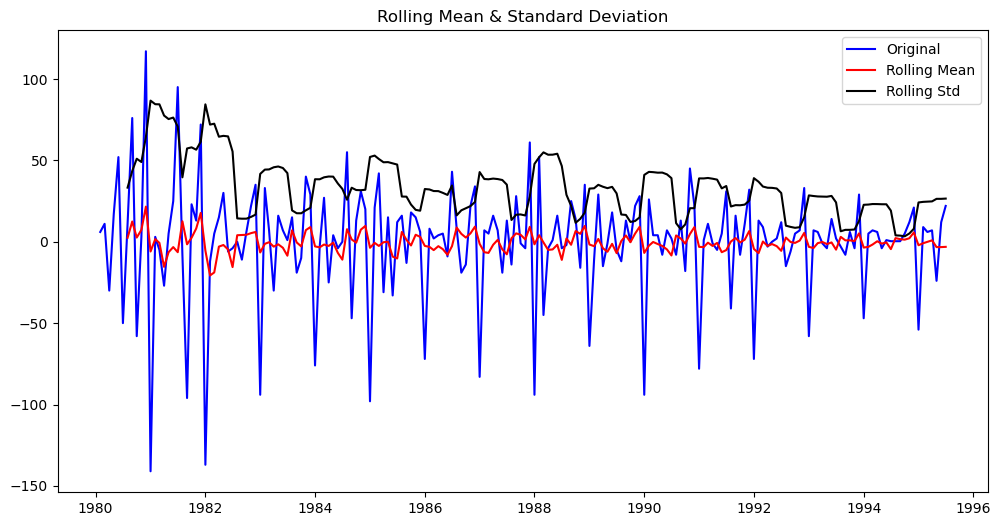

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [143]:
test_stationarity(rose_sales_df['Differenced'])

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'p' of AR model

- We look at the Partial Autocorrelations of a stationary Time Series to understand the order of Auto-Regressive models.


- For an AR model, 2 ways to identify order of 'p':


<i>1) **PACF Approach** :  the PACF method where the  (Partial Auto Correlation Function) values cut off and become zero after a certain lag.               PACF vanishes if there is no regression coefficient that far back. The cut-off value where this happens can be taken             as the order of AR as ‘p’. This can be seen from a PACF plot.</i>

- <i>If the 2nd PACF vanishes (cut off in PACF) then the 2nd coefficient is not considered and thus ‘p’ is 1.</i>
- <i>If the 3rd PACF vanishes (cuts off in PACF) then the 3rd coefficient is not considered and thus ‘p’ is 2 and so on…</i>



 - **Partial Autocorrelation of order 2 = Partial autocorrelation of lag 2 = Correlation between $𝑋_{𝑡}$ and $𝑋_{𝑡−2}$ holding $𝑋_{𝑡−1}$ fixed.**


<font color='blue'><i>2) **Lowest AIC Approach** : **the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘p’ is considered.** </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Plot of Partial-autocorrelation function plots on the original data and differenced data

In [144]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

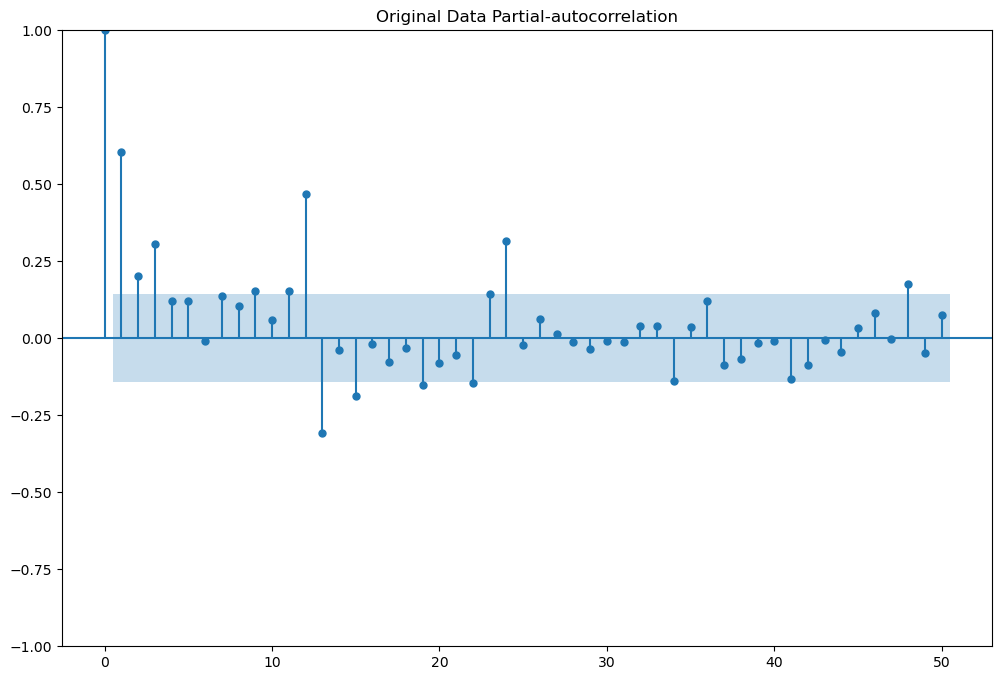

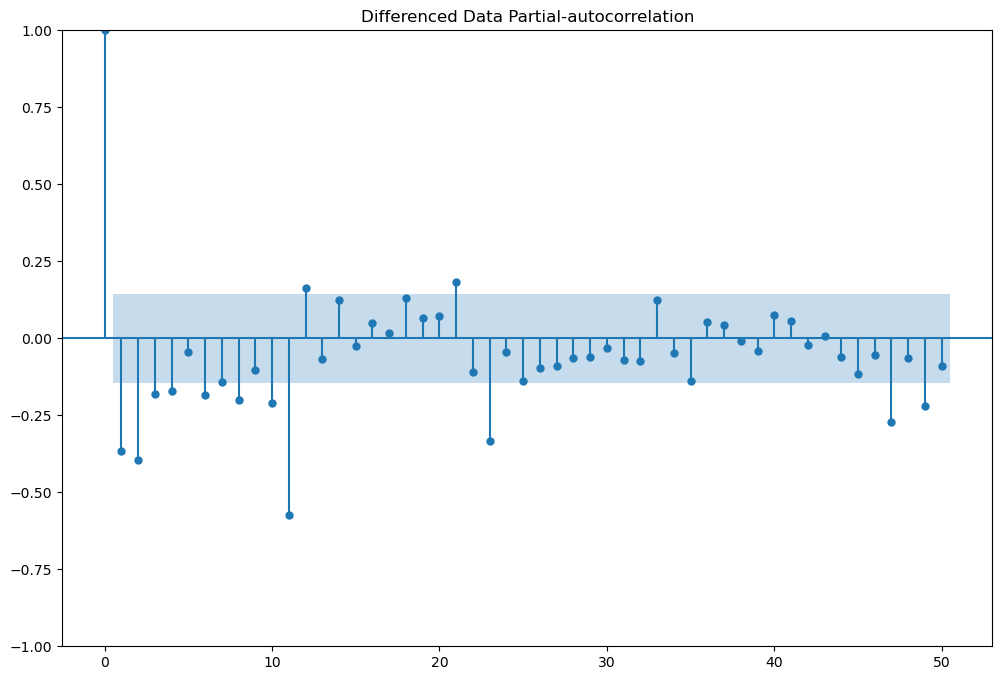

In [145]:
plot_pacf(rose_sales_df['Rose-Wine-Sales'],lags=50, title='Original Data Partial-autocorrelation')
plot_pacf(rose_sales_df['Rose-Wine-Sales'].diff().dropna(),lags=50,title='Differenced Data Partial-autocorrelation')
plt.show()

### From the above plots, we can say that there seems to be a seasonality in the data and differencing has significantly decreased autocorrelation, peaking at p = 3 after which it comes down.

## Using the 2nd method(Lowest AIC) to compare different orders of 'p'

In [146]:

# Define the p parameter to take any value between 0 and 2
p= range(1,4)


## Moving Average(MA) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Moving average model **considers past residual values to predict the current time period values.** 
  These past residuals are past prediction errors.
    

- For a MA model, **the residual or error component is modeled.**


- The moving average model MA(q) of  order q can be represented as:


## <font color='blue'>$y_{t} =  ε_{t} + θ_{1}ε_{t-1} +……+ θ_{q}ε_{t-q}$</font>

- **Where $y_{t}$  time series variable, θ are numeric coefficients multiplied to lagged residuals and ε is the residual term considered as a purely random process with mean 0, variance $σ^{2}$ and  $Cov(ε_{t-1},ε_{t-q})$ = 0.**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'q' of MA model

- We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models.


- For a MA model,  

<i>1) **ACF Approach** : ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.</i>



<i>2) <font color='blue'>**Lowest AIC Approach** : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered. </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Plot of Autocorrelation function plots on the original data and differenced data

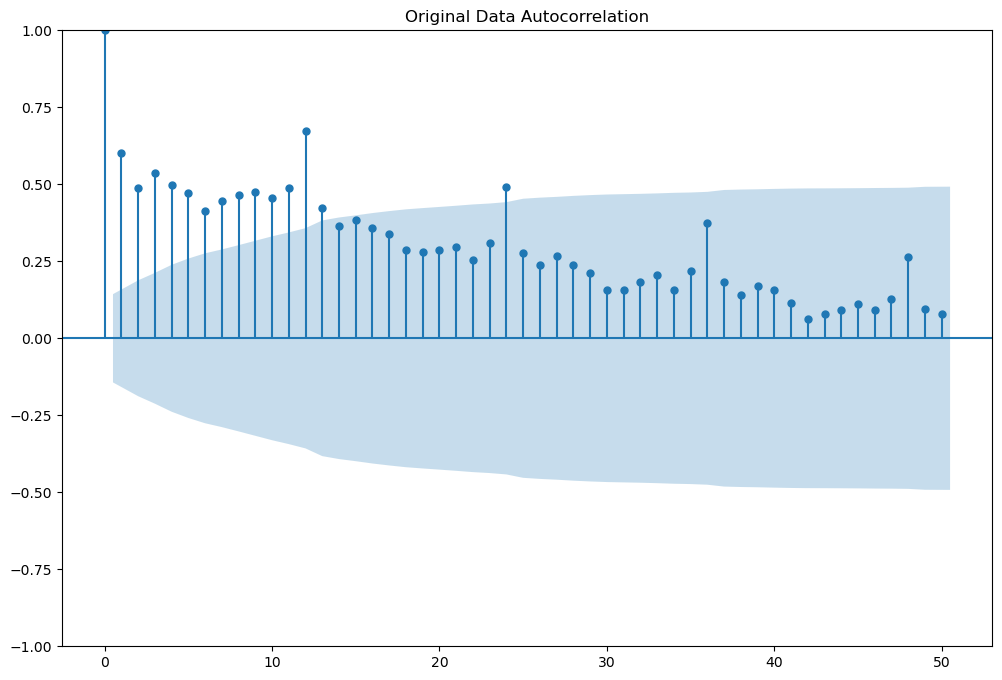

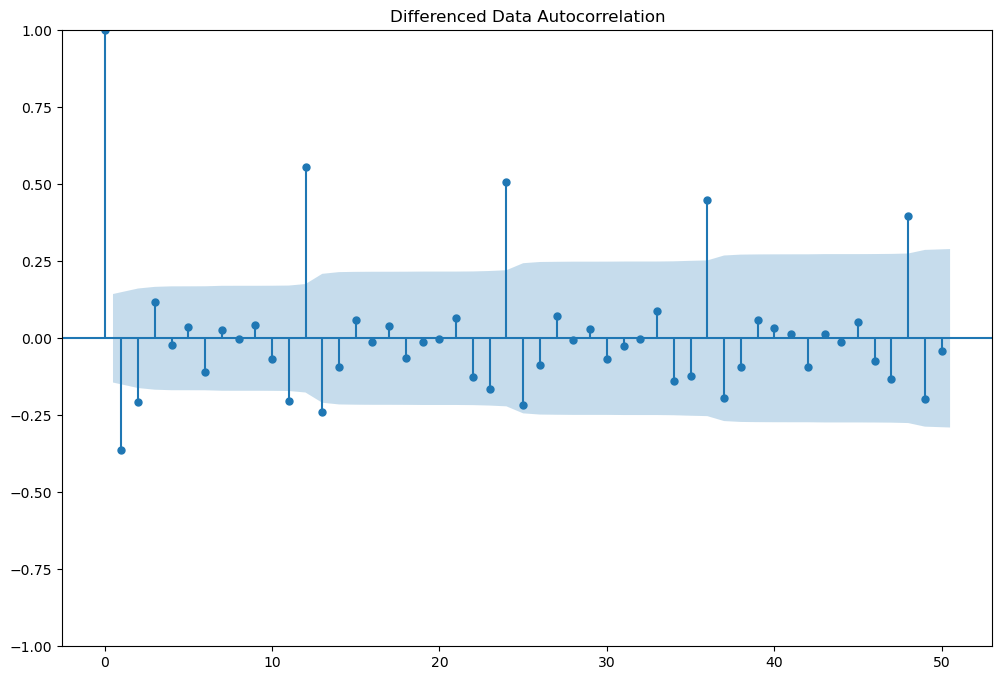

In [147]:
plot_acf(rose_sales_df['Rose-Wine-Sales'],lags=50, title='Original Data Autocorrelation')
plot_acf(rose_sales_df['Rose-Wine-Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

## Using the 2nd method(Lowest AIC) to compare different orders of 'q'

In [148]:

# Define the q parameter to take any value between 0 and 2
q = range(1, 4)

### WHY?

- <font color='blue'>**ACF(0)=1**</font>


- <font color='blue'>**ACF(1)=PACF(1)**</font>

#### <u> Parameter </u>   (p, d, q)   <u>estimation matrix for estimating parameters towards building AR / ARMA / ARIMA / SARIMA models </u>

In [149]:
import itertools

d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [150]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [151]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [152]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [153]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above 

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

## <u> AR/MA/ARMA/ARIMA/SARIMA Train - Test Split</u>

In [154]:
train_2    =   rose_sales_df[0:int(len(rose_sales_df)*0.8)] 
test_2     =   rose_sales_df[int(len(rose)*0.8):]

#### Using the differenced series as there is variance in the data 

In [155]:
train_sales_ts = train_2['Differenced']

In [156]:
train_sales_ts.head()

1980-01-01     NaN
1980-02-01     6.0
1980-03-01    11.0
1980-04-01   -30.0
1980-05-01    17.0
Freq: MS, Name: Differenced, dtype: float64

## Check for stationarity of the Training Data Time Series.

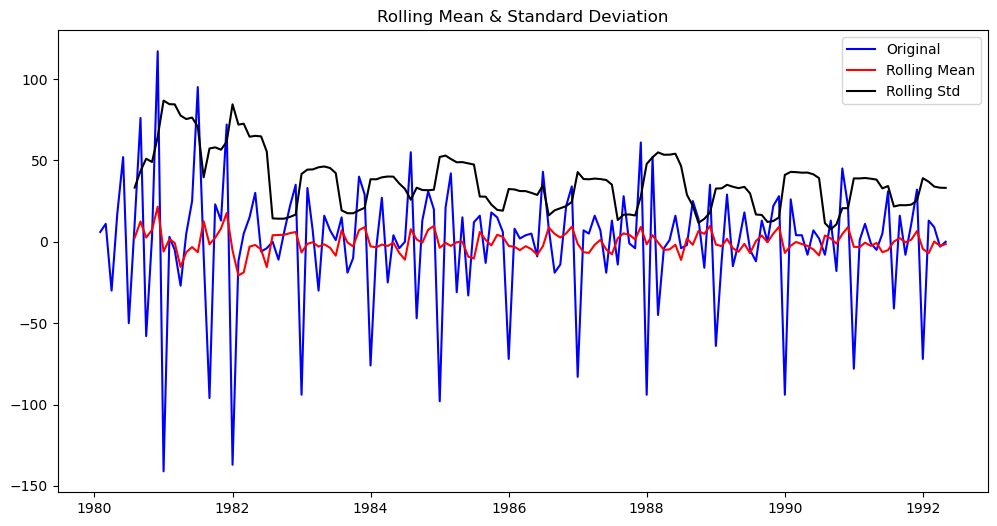

Results of Dickey-Fuller Test:
Test Statistic                -7.132106e+00
p-value                        3.496102e-10
#Lags Used                     1.200000e+01
Number of Observations Used    1.350000e+02
Critical Value (1%)           -3.479743e+00
Critical Value (5%)           -2.883198e+00
Critical Value (10%)          -2.578320e+00
dtype: float64 



In [157]:
test_stationarity(train_2['Differenced'])

In [158]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Model 6: AR Model 


- **Autoregressive models use <font color='blue'>previous time period values to predict the current time period values.**</font>

### Manual AR Model (PACF approach)

                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  148
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -723.949
Date:                Tue, 19 Mar 2024   AIC                           1457.898
Time:                        08:00:49   BIC                           1472.884
Sample:                    02-01-1980   HQIC                          1463.987
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4312      1.372     -0.314      0.753      -3.120       2.257
ar.L1         -0.5653      0.068     -8.289      0.000      -0.699      -0.432
ar.L2         -0.4707      0.079     -5.977      0.0

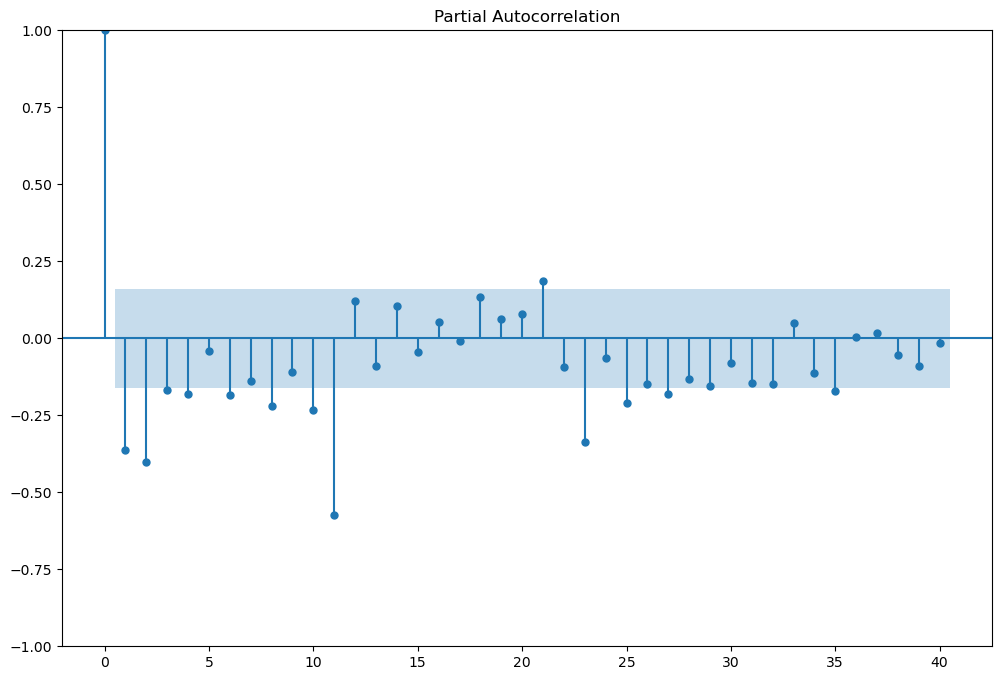

In [233]:
# Assuming you have differenced your data if needed and stored in train_sales_ts
# Now, you'll analyze the PACF plot to determine 'p'

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming train_sales_ts is a pandas Series of the training data
# Generate PACF plot
sm.graphics.tsa.plot_pacf(train_sales_ts, lags=40)

# Based on the PACF plot, choose a value for p (say p = 3)

# Fit AR model with chosen p
manual_ar_model = ARIMA(train_sales_ts, order=(3, 0, 0)).fit()

# Look at the AIC and other statistics
print(manual_ar_model.summary())




In [234]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming best_results_AR is the trained model on the training dataset
# And that test_2 is the test dataset with the actual 'Differenced' values
# Also, it's assumed that 'Differenced' column contains the actual test values after differencing

# Generate predictions for the test set
predictions_AR = manual_ar_model.get_forecast(steps=len(test_2))
predicted_mean_AR = predictions_AR.predicted_mean

# RMSE calculation
rmse_AR = sqrt(mean_squared_error(test_2['Differenced'], predicted_mean_AR))
rmse_AR

18.803838589861602

### <u>Auto AR Model building to estimate best 'p' ( Lowest AIC Approach )</u>

In [161]:

# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [162]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(train_sales_ts,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC:1482.5225143615626
ARIMA(2, 0, 0) - AIC:1459.7774054082952
ARIMA(3, 0, 0) - AIC:1457.8977794489688


In [163]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

AR_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
2  (3, 0, 0)  1457.897779
1  (2, 0, 0)  1459.777405
0  (1, 0, 0)  1482.522514

#### <u>Building AR model with best <font color='blue'>'p'</font> parameter </u>

In [164]:
best_model_AR = ARIMA(train_sales_ts,order = (3,0,0))#p=3 with lowest AIC 
best_results_AR = best_model_AR.fit()

In [165]:
print(best_results_AR.summary().tables[0])
print(best_results_AR.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  148
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -723.949
Date:                Sun, 17 Mar 2024   AIC                           1457.898
Time:                        23:59:15   BIC                           1472.884
Sample:                    02-01-1980   HQIC                          1463.987
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4312      1.372     -0.314      0.753      -3.120       2.257
ar.L1         -0.5653      0.068     -8.289      0.000      -0.699      -0.432
ar.L2         -0.4707      0.079     -5.977      0.0

#### <u>Calculating RMSE for best AR model</u>

In [166]:
test_2.head()

Rose-Wine-Sales  Differenced
1992-06-01             55.0          2.0
1992-07-01             67.0         12.0
1992-08-01             52.0        -15.0
1992-09-01             46.0         -6.0
1992-10-01             51.0          5.0

In [167]:
pred_dynamic_AR = best_results_AR.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [168]:
pred99_AR = best_results_AR.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [169]:
# Extract the predicted and true values of our time series
sales_forecasted_diff_AR = pred_dynamic_AR.predicted_mean
testCopy1 = test_2.copy()
testCopy1['sales_forecasted_diff_AR'] = pred99_AR.predicted_mean

In [170]:
# Compute the root mean square error
ar_mse = ((testCopy1['Differenced'] - testCopy1['sales_forecasted_diff_AR']) ** 2).mean()
ar_rmse = np.sqrt(ar_mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(ar_rmse, 3)))

The Root Mean Squared Error of our forecasts is 18.804


In [171]:
testCopy1.head()

Rose-Wine-Sales  Differenced  sales_forecasted_diff_AR
1992-06-01             55.0          2.0                 -0.970861
1992-07-01             67.0         12.0                  0.080950
1992-08-01             52.0        -15.0                 -0.535435
1992-09-01             46.0         -6.0                 -0.527122
1992-10-01             51.0          5.0                 -0.409553

In [172]:
# To "integrate" the forecasts made on differenced data back to the original scale, 
# we need to perform a cumulative sum of the forecasted differences, 
# starting from the last actual value of the non-differenced series.

# Step 1: Retrieve the last actual value of the original series
last_actual_value = rose_sales_df['Rose-Wine-Sales'].iloc[-len(test_2)-1]

# Step 2: Cumulatively sum the forecasted differences and add to the last actual value
# Reverse the differencing
integrated_forecast_ar = last_actual_value + testCopy1['sales_forecasted_diff_AR'].cumsum()

# Add the integrated forecast to your test DataFrame for comparison
testCopy1['Integrated_Forecast_AR'] = integrated_forecast_ar

print(testCopy1[['Rose-Wine-Sales', 'Integrated_Forecast_AR']])


            Rose-Wine-Sales  Integrated_Forecast_AR
1992-06-01        55.000000               52.029139
1992-07-01        67.000000               52.110089
1992-08-01        52.000000               51.574654
1992-09-01        46.000000               51.047532
1992-10-01        51.000000               50.637978
1992-11-01        58.000000               50.256416
1992-12-01        91.000000               49.802365
1993-01-01        33.000000               49.357356
1993-02-01        40.000000               48.936887
1993-03-01        46.000000               48.509858
1993-04-01        45.000000               48.073544
1993-05-01        41.000000               47.641650
1993-06-01        55.000000               47.212675
1993-07-01        57.000000               46.781451
1993-08-01        54.000000               46.349419
1993-09-01        46.000000               45.918437
1993-10-01        52.000000               45.487600
1993-11-01        48.000000               45.056316
1993-12-01  

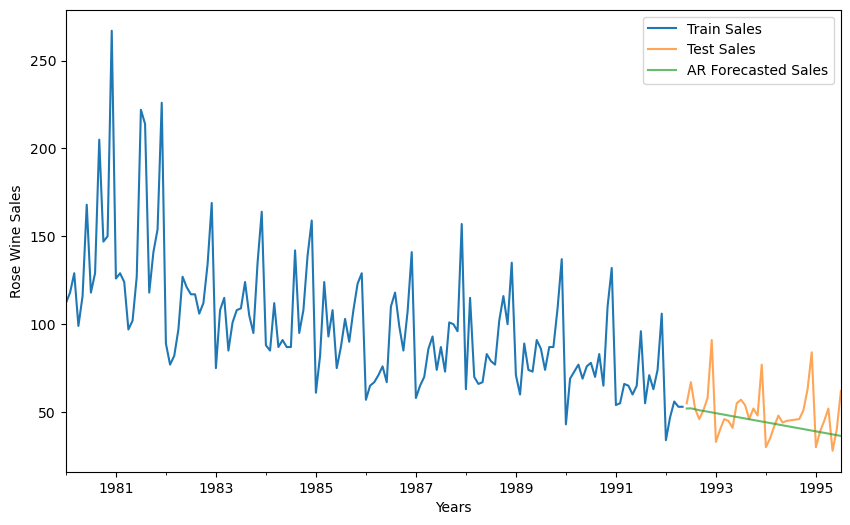

In [173]:
axis = train_2['Rose-Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose-Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['Integrated_Forecast_AR'].plot(ax=axis, label='AR Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [174]:
resultsDf_AR = pd.DataFrame({'Test RMSE': [ar_rmse]}
                           ,index=['ARIMA(3,0,0)'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES, resultsDf_TES, resultsDf_AR])
resultsDf

Test RMSE
RegressionOnTime                     58.977941
2pointTrailingMovingAverage           9.401964
4pointTrailingMovingAverage          12.180380
6pointTrailingMovingAverage          12.403435
9pointTrailingMovingAverage          12.614521
Alpha=0.95:SES                       13.820404
Alpha=0.91,Beta=0.81:DES             13.245510
Alpha=0.15,Beta=0.7, Gamma=0.15:TES   6.084552
ARIMA(3,0,0)                         18.803839

**Note: the best model for an AR MODEL is the one as AR(3)**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Model 7: Improving AutoRegressive Models through Moving Average Forecasts

- **Improving AutoRegressive Models through Moving Average Forecasts.**
- ARMA models consist of 2 components:-
	- **AR model: <font color='blue'>The data is modeled based on past observations.</font>**
	- **MA model: <font color='blue'>Previous forecast errors are incorporated into the model.</font>**

#### Manual ARMA Model based on PACF and ACF Plot

                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  148
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -709.661
Date:                Sun, 17 Mar 2024   AIC                           1433.322
Time:                        23:59:16   BIC                           1454.302
Sample:                    02-01-1980   HQIC                          1441.846
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5142      0.095     -5.429      0.000      -0.700      -0.329
ar.L1         -0.4157      0.420     -0.990      0.322      -1.238       0.407
ar.L2          0.0144      0.147      0.098      0.9

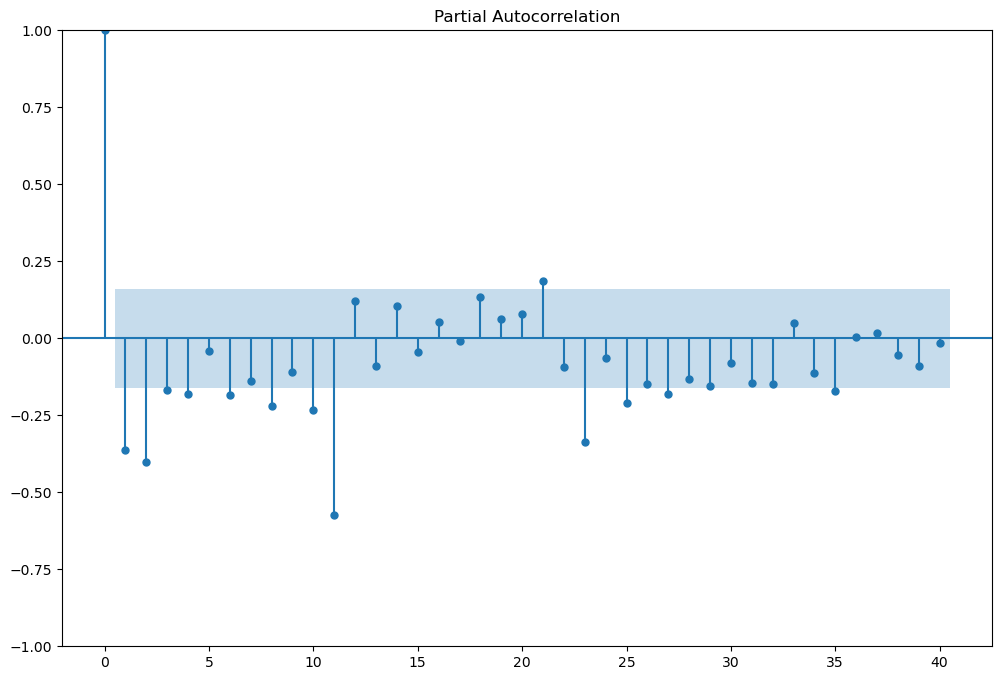

In [175]:
# Assuming you have differenced your data if needed and stored in train_sales_ts
# Now, you'll analyze the PACF plot to determine 'p'

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming train_sales_ts is a pandas Series of the training data
# Generate PACF plot
sm.graphics.tsa.plot_pacf(train_sales_ts, lags=40)

# Based on the PACF plot, choose a value for p (say p = 3)

# Fit AR model with chosen p
manual_arma_model = ARIMA(train_sales_ts, order=(3, 0, 2)).fit()

# Look at the AIC and other statistics
print(manual_arma_model.summary())

In [176]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming best_results_AR is the trained model on the training dataset
# And that test_2 is the test dataset with the actual 'Differenced' values
# Also, it's assumed that 'Differenced' column contains the actual test values after differencing

# Generate predictions for the test set
predictions_ARMA = manual_arma_model.get_forecast(steps=len(test_2))
predicted_mean_ARMA = predictions_ARMA.predicted_mean

# RMSE calculation
rmse_ARMA = sqrt(mean_squared_error(test_2['Differenced'], predicted_mean_ARMA))
rmse_ARMA

18.75686924747269

#### <u>ARMA Model building to estimate best <font color='blue'>'p' , 'q' </font> ( Lowest AIC Approach )</u>

In [177]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [178]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(train_sales_ts,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:1430.8547973334962
ARIMA(1, 0, 2) - AIC:1429.586206119532
ARIMA(1, 0, 3) - AIC:1431.5803332234036
ARIMA(2, 0, 1) - AIC:1431.7831886168801
ARIMA(2, 0, 2) - AIC:1431.5825444179134
ARIMA(2, 0, 3) - AIC:1424.0709958825569
ARIMA(3, 0, 1) - AIC:1432.3465124174454
ARIMA(3, 0, 2) - AIC:1433.3219661034605
ARIMA(3, 0, 3) - AIC:1425.9587543032576


In [179]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
5  (2, 0, 3)  1424.070996
8  (3, 0, 3)  1425.958754
1  (1, 0, 2)  1429.586206
0  (1, 0, 1)  1430.854797
2  (1, 0, 3)  1431.580333

#### <u>Building ARMA model with best p,q parameter </u>

In [180]:
ARMA_best_model = ARIMA(train_sales_ts,order = (2,0,3))
ARMA_best_results = ARMA_best_model.fit()

In [181]:
print(ARMA_best_results.summary().tables[0])
print(ARMA_best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  148
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -705.035
Date:                Sun, 17 Mar 2024   AIC                           1424.071
Time:                        23:59:17   BIC                           1445.051
Sample:                    02-01-1980   HQIC                          1432.595
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5176      0.085     -6.102      0.000      -0.684      -0.351
ar.L1         -1.6224      0.103    -15.748      0.000      -1.824      -1.420
ar.L2         -0.6325      0.103     -6.145      0.0

#### <u>Calculating RMSE for best MA model </u>

In [182]:
pred_dynamic_ARMA = ARMA_best_results.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [183]:
pred99_ARMA = ARMA_best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [184]:
# Extract the predicted and true values of our time series
sales_ts_forecasted_diff_ARMA = pred_dynamic_ARMA.predicted_mean
testCopy1['sales_forecasted_diff_ARMA'] = pred99_ARMA.predicted_mean

In [185]:
# Compute the root mean square error
arma_mse = ((testCopy1['Differenced'] - testCopy1['sales_forecasted_diff_ARMA']) ** 2).mean()
arma_rmse = np.sqrt(arma_mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(arma_rmse, 3)))

The Root Mean Squared Error of our forecasts is 18.757


In [186]:
# To "integrate" the forecasts made on differenced data back to the original scale, 
# we need to perform a cumulative sum of the forecasted differences, 
# starting from the last actual value of the non-differenced series.

# Step 1: Retrieve the last actual value of the original series
last_actual_value = rose_sales_df['Rose-Wine-Sales'].iloc[-len(test_2)-1]

# Step 2: Cumulatively sum the forecasted differences and add to the last actual value
# Reverse the differencing
integrated_forecast_arma = last_actual_value + testCopy1['sales_forecasted_diff_ARMA'].cumsum()

# Add the integrated forecast to your test DataFrame for comparison
testCopy1['Integrated_Forecast_arma'] = integrated_forecast_arma

print(testCopy1[['Rose-Wine-Sales', 'Integrated_Forecast_arma']])

            Rose-Wine-Sales  Integrated_Forecast_arma
1992-06-01        55.000000                 54.776047
1992-07-01        67.000000                 65.119786
1992-08-01        52.000000                 57.571666
1992-09-01        46.000000                 61.590139
1992-10-01        51.000000                 58.160111
1992-11-01        58.000000                 59.498314
1992-12-01        91.000000                 57.811938
1993-01-01        33.000000                 58.016592
1993-02-01        40.000000                 57.066374
1993-03-01        46.000000                 56.793690
1993-04-01        45.000000                 56.152262
1993-05-01        41.000000                 55.680527
1993-06-01        55.000000                 55.166721
1993-07-01        57.000000                 54.613838
1993-08-01        54.000000                 54.150961
1993-09-01        46.000000                 53.566779
1993-10-01        52.000000                 53.122468
1993-11-01        48.000000 

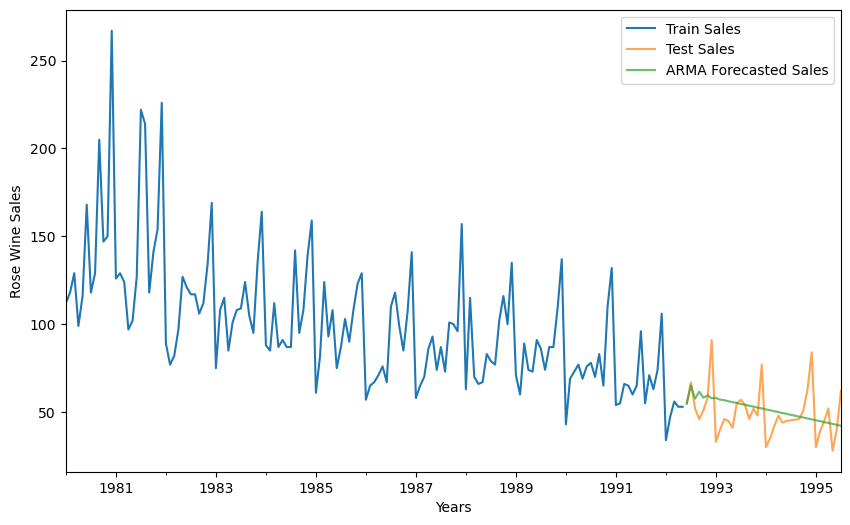

In [187]:
axis = train_2['Rose-Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose-Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['Integrated_Forecast_arma'].plot(ax=axis, label='ARMA Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [188]:
resultsDf_ARMA = pd.DataFrame({'Test RMSE': [arma_rmse]}
                           ,index=['ARIMA(2,0,3)'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES, resultsDf_TES, resultsDf_AR, resultsDf_ARMA ])
resultsDf

Test RMSE
RegressionOnTime                     58.977941
2pointTrailingMovingAverage           9.401964
4pointTrailingMovingAverage          12.180380
6pointTrailingMovingAverage          12.403435
9pointTrailingMovingAverage          12.614521
Alpha=0.95:SES                       13.820404
Alpha=0.91,Beta=0.81:DES             13.245510
Alpha=0.15,Beta=0.7, Gamma=0.15:TES   6.084552
ARIMA(3,0,0)                         18.803839
ARIMA(2,0,3)                         18.756749

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Model 8: ARIMA Model

![ARIMA.JPG](attachment:ARIMA.JPG)

- ARIMA:- **Auto Regressive Integrated Moving Average** is a way of modeling time series data **for forecasting or predicting future data points**. 
- **Improving AR Models by making Time Series stationary through Moving AVerage Forecasts** 


- ARIMA models consist of 3 components:-
	- **AR model: <font color='blue'>The data is modeled based on past observations.</font>**
	- **Integrated component: <font color='blue'>Whether the data needs to be differenced/transformed.</font>**
	- **MA model: <font color='blue'>Previous forecast errors are incorporated into the model.</font>**

#### <u>ARIMA Model building to estimate best <font color='blue'>'p' , 'd' , 'q' </font> paramters ( Lowest AIC Approach )</u>

In [189]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [190]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sales_ts,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:1430.8547973334962
ARIMA(1, 0, 2) - AIC:1429.586206119532
ARIMA(1, 0, 3) - AIC:1431.5803332234036
ARIMA(1, 1, 1) - AIC:1479.1457970546294
ARIMA(1, 1, 2) - AIC:1434.2803877801239
ARIMA(1, 1, 3) - AIC:1439.6807636818962
ARIMA(2, 0, 1) - AIC:1431.7831886168801
ARIMA(2, 0, 2) - AIC:1431.5825444179134
ARIMA(2, 0, 3) - AIC:1424.0709958825569
ARIMA(2, 1, 1) - AIC:1457.2234995837966
ARIMA(2, 1, 2) - AIC:1435.7461954751798
ARIMA(2, 1, 3) - AIC:1442.4825225897034
ARIMA(3, 0, 1) - AIC:1432.3465124174454
ARIMA(3, 0, 2) - AIC:1433.3219661034605
ARIMA(3, 0, 3) - AIC:1425.9587543032576
ARIMA(3, 1, 1) - AIC:1455.6632369240897
ARIMA(3, 1, 2) - AIC:1456.819214586424
ARIMA(3, 1, 3) - AIC:1439.4900595688214


In [191]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
8   (2, 0, 3)  1424.070996
14  (3, 0, 3)  1425.958754
1   (1, 0, 2)  1429.586206
0   (1, 0, 1)  1430.854797
2   (1, 0, 3)  1431.580333

#### <u>Building ARIMA model with best parameters p,d,q</u>

In [192]:
best_model_ARIMA = ARIMA(train_sales_ts,order = (2,0,2))
best_results_ARIMA = best_model_ARIMA.fit()

In [193]:
print(best_results_ARIMA.summary().tables[0])
print(best_results_ARIMA.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  148
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -709.791
Date:                Sun, 17 Mar 2024   AIC                           1431.583
Time:                        23:59:18   BIC                           1449.566
Sample:                    02-01-1980   HQIC                          1438.889
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5145      0.091     -5.651      0.000      -0.693      -0.336
ar.L1         -0.4705      0.400     -1.177      0.239      -1.254       0.313
ar.L2          0.0083      0.154      0.054      0.9

In [194]:
pred_dynamic_ARIMA = best_results_ARIMA.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [195]:
pred99_ARIMA = best_results_ARIMA.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [196]:
# Extract the predicted and true values of our time series
sales_ts_forecasted_diff_ARIMA = pred_dynamic_ARIMA.predicted_mean
testCopy1['sales_forecasted_diff_ARIMA'] = pred99_ARIMA.predicted_mean

In [197]:
# Compute the root mean square error
arima_mse = ((testCopy1['Differenced'] - testCopy1['sales_forecasted_diff_ARIMA']) ** 2).mean()
arima_rmse = np.sqrt(arma_mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(arima_rmse, 3)))

The Root Mean Squared Error of our forecasts is 18.757


In [198]:
# To "integrate" the forecasts made on differenced data back to the original scale, 
# we need to perform a cumulative sum of the forecasted differences, 
# starting from the last actual value of the non-differenced series.

# Step 1: Retrieve the last actual value of the original series
last_actual_value = rose_sales_df['Rose-Wine-Sales'].iloc[-len(test_2)-1]

# Step 2: Cumulatively sum the forecasted differences and add to the last actual value
# Reverse the differencing
integrated_forecast_arima = last_actual_value + testCopy1['sales_forecasted_diff_ARIMA'].cumsum()

# Add the integrated forecast to your test DataFrame for comparison
testCopy1['Integrated_Forecast_arima'] = integrated_forecast_arima

print(testCopy1[['Rose-Wine-Sales', 'Integrated_Forecast_arima']])

            Rose-Wine-Sales  Integrated_Forecast_arima
1992-06-01        55.000000                  59.295209
1992-07-01        67.000000                  62.036119
1992-08-01        52.000000                  60.046501
1992-09-01        46.000000                  60.253181
1992-10-01        51.000000                  59.387054
1992-11-01        58.000000                  59.044000
1992-12-01        91.000000                  58.445893
1993-01-01        33.000000                  57.972150
1993-02-01        40.000000                  57.437767
1993-03-01        46.000000                  56.932953
1993-04-01        45.000000                  56.413721
1993-05-01        41.000000                  55.901519
1993-06-01        55.000000                  55.385889
1993-07-01        57.000000                  54.871930
1993-08-01        54.000000                  54.357157
1993-09-01        46.000000                  53.842781
1993-10-01        52.000000                  53.328211
1993-11-01

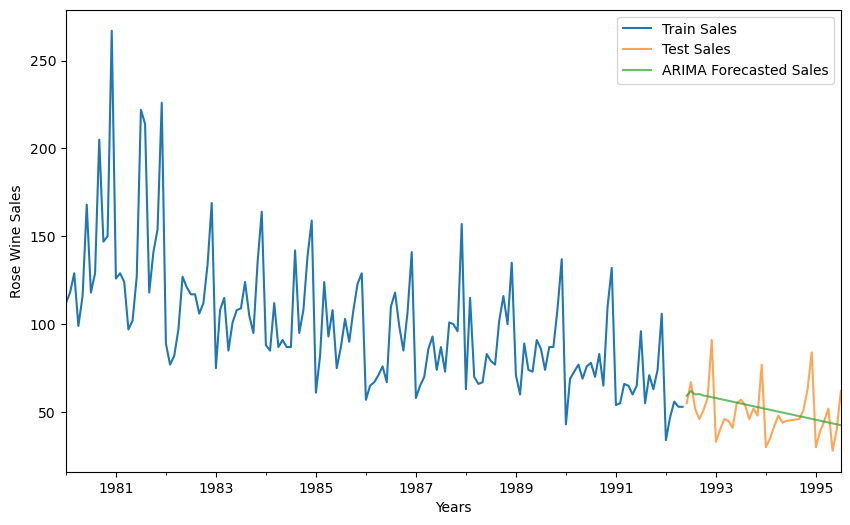

In [199]:
axis = train_2['Rose-Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose-Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['Integrated_Forecast_arima'].plot(ax=axis, label='ARIMA Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [200]:
resultsDf_ARIMA = pd.DataFrame({'Test RMSE': [arima_rmse]}
                           ,index=['ARIMA(2,0,2)'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES, resultsDf_TES, resultsDf_AR, resultsDf_ARMA, resultsDf_ARIMA ])
resultsDf

Test RMSE
RegressionOnTime                     58.977941
2pointTrailingMovingAverage           9.401964
4pointTrailingMovingAverage          12.180380
6pointTrailingMovingAverage          12.403435
9pointTrailingMovingAverage          12.614521
Alpha=0.95:SES                       13.820404
Alpha=0.91,Beta=0.81:DES             13.245510
Alpha=0.15,Beta=0.7, Gamma=0.15:TES   6.084552
ARIMA(3,0,0)                         18.803839
ARIMA(2,0,3)                         18.756749
ARIMA(2,0,2)                         18.756749

 **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Model 9: SARIMA Model 

- **The ARIMA models can be extended/improved to handle seasonal components of a data series.**



- The seasonal autoregressive moving average model is given by
    -                   <b>SARIMA (p, d, q)(P, D, Q)F </b>
    
    

- The above model consists of:
	- <font color='blue'>Autoregressive and moving average components (p, q)</font>
	- <font color='blue'>Seasonal autoregressive and moving average components (P, Q) </font>
	- <font color='blue'>The ordinary and seasonal difference components of order ‘d’ and ‘D’ </font>
	- <font color='blue'>Seasonal frequency ‘F’</font>
    

- The value for the parameters (p,d,q) and (P, D, Q) can be decided by comparing different values for each and taking **the lowest   AIC value** for the model build.


- **The value for F can be consolidated by ACF plot**








#### <u>Finding Seasonality = 12 from ACF/PACF plots </u> 

In [201]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

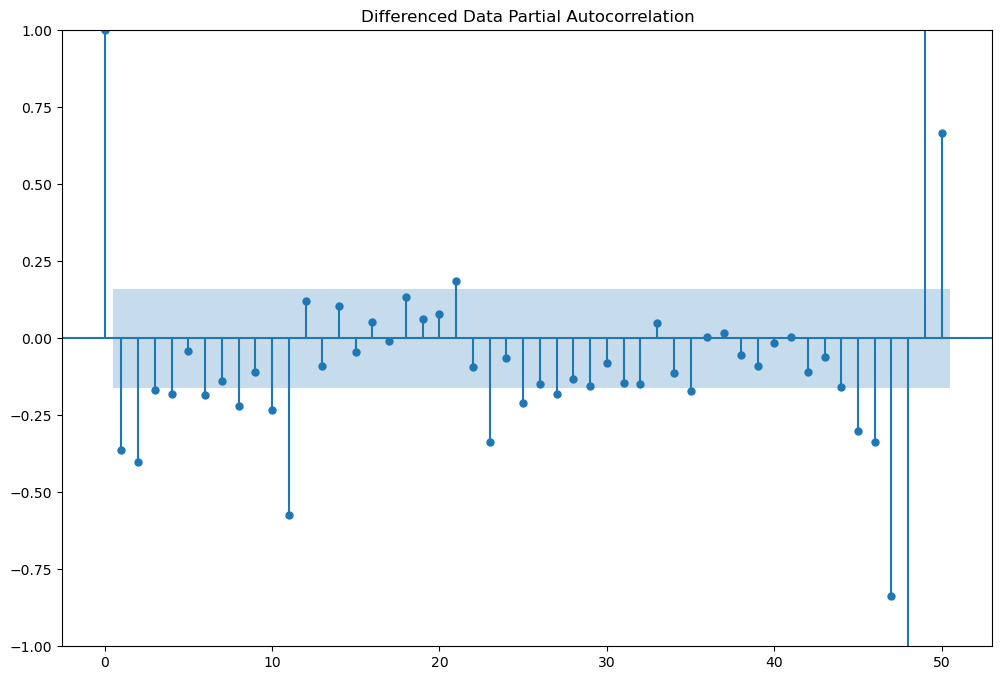

In [202]:
plot_pacf(train['Rose-Wine-Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

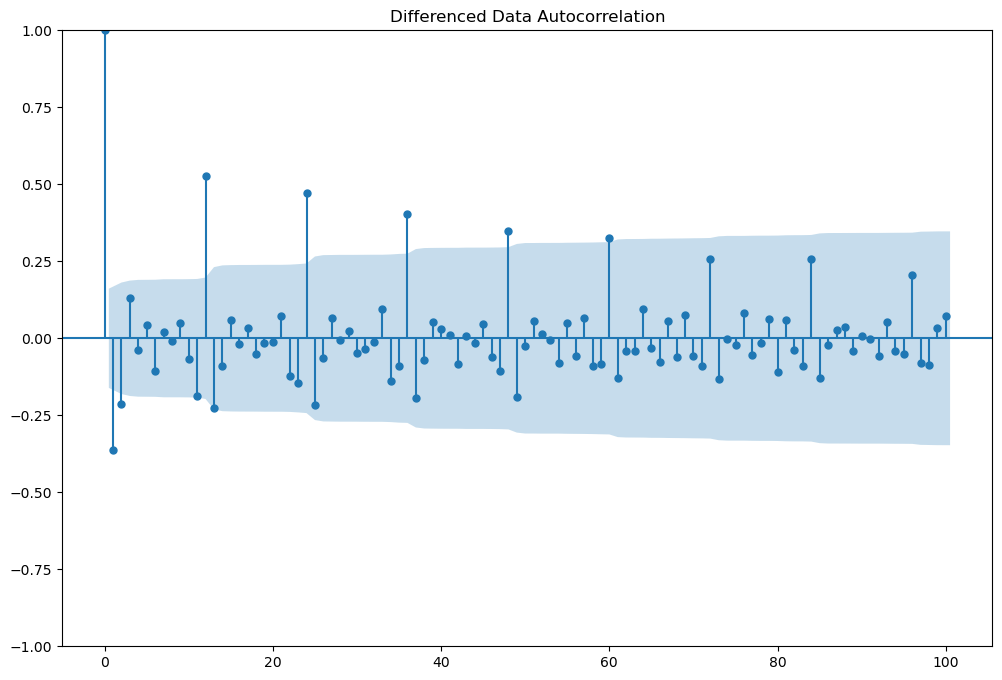

In [203]:
plot_acf(train['Rose-Wine-Sales'].diff().dropna(),lags=100,title='Differenced Data Autocorrelation')
plt.show()

#### <u>SARIMA Model building to estimate best parameters </u>

In [204]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [205]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [206]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_sales_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20881D+00    |proj g|=  1.09515D-01

At iterate    5    f=  4.19138D+00    |proj g|=  2.50349D-02

At iterate   10    f=  4.11310D+00    |proj g|=  7.49200D-01

At iterate   15    f=  4.00413D+00    |proj g|=  2.48422D-02

At iterate   20    f=  4.00376D+00    |proj g|=  5.20388D-02

At iterate   25    f=  4.00362D+00    |proj g|=  6.22414D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     30      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.67556D+00    |proj g|=  1.85807D-01

At iterate   15    f=  3.51607D+00    |proj g|=  3.50472D-02

At iterate   20    f=  3.51590D+00    |proj g|=  2.07149D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     25      1     0     0   2.071D-05   3.516D+00
  F =   3.5159005893621358     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:1052.7065744511922
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.37396D+00    |proj g|=  1.78041D-02

At iterate   10    f=  3.25591D+00    |proj g|=  2.91651D-01

At iterate   15    f=  3.10717D+00    |proj g|=  1.40114D-01

At iterate   20    f=  3.04831D+00    |proj g|=  2.88114D-02

At iterate   25    f=  3.04765D+00    |proj g|=  3.94280D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     31      1     0     0   2.889D-05   3.048D+00
  F =   3.0476295365415682     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 3, 12) - AIC:916.0983428163042
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.69030D+00    |proj g|=  1.72425D-02

At iterate   10    f=  3.57330D+00    |proj g|=  3.93390D-02

At iterate   15    f=  3.55929D+00    |proj g|=  1.99994D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   6.699D-06   3.559D+00
  F =   3.5592872122636794     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:1063.5490148300491
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.28554D+00    |proj g|=  1.83368D-02

At iterate   10    f=  3.21437D+00    |proj g|=  1.05065D-01

At iterate   15    f=  3.08960D+00    |proj g|=  2.77790D-02

At iterate   20    f=  3.08946D+00    |proj g|=  1.72867D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     26      1     0     0   1.281D-05   3.089D+00
  F =   3.0894644901379862     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:926.481489080844
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0  

 This problem is unconstrained.


  ys=-3.045E-12  -gs= 1.559E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.090E+04  -gs= 4.556E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=          NaN    |proj g|=          NaN



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     99      4     2     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:nan
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79105D+00    |proj g|=  6.70706D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  3.77340D+00    |proj g|=  2.15204D-02

At iterate   10    f=  3.60993D+00    |proj g|=  2.64863D-01

At iterate   15    f=  3.48616D+00    |proj g|=  3.84520D-02

At iterate   20    f=  3.48498D+00    |proj g|=  5.20867D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     30      1     0     0   1.413D-06   3.485D+00
  F =   3.4849767631870359     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:1043.5531219033626
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate   15    f=  3.44941D+00    |proj g|=  2.95286D-02

At iterate   20    f=  3.44902D+00    |proj g|=  2.08608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     30      1     0     0   4.139D-05   3.449D+00
  F =   3.4490181144294825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:1034.9093618711267
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.40832D+00    |proj g|=  1.15652D-01


 This problem is unconstrained.



At iterate    5    f=  3.36645D+00    |proj g|=  2.84117D-02

At iterate   10    f=  3.30650D+00    |proj g|=  8.51100D-02

At iterate   15    f=  3.07059D+00    |proj g|=  7.28206D-02

At iterate   20    f=  3.03554D+00    |proj g|=  5.22606D-02

At iterate   25    f=  3.03345D+00    |proj g|=  2.76384D-03

At iterate   30    f=  3.03343D+00    |proj g|=  2.38560D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     38      1     0     0   1.564D-05   3.033D+00
  F =   3.0334323909097822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:913.89598770929

 This problem is unconstrained.



At iterate   10    f=  3.29745D+00    |proj g|=  4.94072D-02

At iterate   15    f=  3.19662D+00    |proj g|=  2.63702D-01

At iterate   20    f=  3.08548D+00    |proj g|=  1.26463D-01

At iterate   25    f=  3.08267D+00    |proj g|=  1.61714D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     44      1     0     0   1.504D-05   3.083D+00
  F =   3.0826633256650231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:924.4683443968469
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.26576D+00    |proj g|=  3.68829D-02

At iterate   15    f=  3.25334D+00    |proj g|=  1.05451D-01

At iterate   20    f=  3.14249D+00    |proj g|=  3.03815D+00

At iterate   25    f=  3.05204D+00    |proj g|=  1.86792D-01

At iterate   30    f=  3.04954D+00    |proj g|=  1.28444D-02

At iterate   35    f=  3.04946D+00    |proj g|=  8.32822D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     56      1     0     0   2.105D-05   3.049D+00
  F =   3.0494579710688292     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:916.63955943637

 This problem is unconstrained.


  ys=-4.268E+01  -gs= 6.522E-01 BFGS update SKIPPED
  ys=-1.711E+01  -gs= 6.384E-01 BFGS update SKIPPED
  ys=-5.618E+01  -gs= 6.545E-01 BFGS update SKIPPED
  ys=-1.533E+01  -gs= 6.319E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     69      5     4     0   9.313D+04   1.250D+01
  F =   12.498025860424940     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:3715.415654685782
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.40515D+00    |proj g|=  4.05690D-02

At iterate    5    f=  3.39015D+00    |proj g|=  3.08649D-02


 This problem is unconstrained.



At iterate   10    f=  3.14863D+00    |proj g|=  5.39416D-01

At iterate   15    f=  3.08989D+00    |proj g|=  9.04001D-03

At iterate   20    f=  3.08982D+00    |proj g|=  1.97702D-02

At iterate   25    f=  3.08802D+00    |proj g|=  4.57942D-02

At iterate   30    f=  3.08742D+00    |proj g|=  3.82640D-03

At iterate   35    f=  3.08736D+00    |proj g|=  3.73211D-03

At iterate   40    f=  3.08735D+00    |proj g|=  4.72689D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     54      1     0     0   4.727D-05   3.087D+00
  F =   3.0873517284383021     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.39496D+00    |proj g|=  1.80701D-02

At iterate   10    f=  3.29171D+00    |proj g|=  1.28948D-01

At iterate   15    f=  3.13315D+00    |proj g|=  1.57207D-01

At iterate   20    f=  3.10239D+00    |proj g|=  9.46874D-02

At iterate   25    f=  3.07953D+00    |proj g|=  1.24727D-01

At iterate   30    f=  3.07511D+00    |proj g|=  2.49781D-03

At iterate   35    f=  3.07510D+00    |proj g|=  7.94152D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     46      1     0     0   8.900D-05   3.075D+00
  F =   3.0751010490679889     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.36366D+00    |proj g|=  1.81156D-02

At iterate   10    f=  3.24161D+00    |proj g|=  1.47706D-01

At iterate   15    f=  3.06976D+00    |proj g|=  1.85862D-01

At iterate   20    f=  3.02561D+00    |proj g|=  1.73847D-02

At iterate   25    f=  3.02347D+00    |proj g|=  2.69268D-03

At iterate   30    f=  3.02345D+00    |proj g|=  7.20459D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     44      1     0     0   6.218D-05   3.023D+00
  F =   3.0234448073389508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(3, 0, 3, 12) - AIC:912.93966297232

 This problem is unconstrained.



At iterate    5    f=  2.95833D+00    |proj g|=  1.64135D-02

At iterate   10    f=  2.95458D+00    |proj g|=  5.83590D-02

At iterate   15    f=  2.88770D+00    |proj g|=  2.08405D-01

At iterate   20    f=  2.76250D+00    |proj g|=  2.42277D-01

At iterate   25    f=  2.74648D+00    |proj g|=  9.67320D-03

At iterate   30    f=  2.74554D+00    |proj g|=  2.67767D-02

At iterate   35    f=  2.74551D+00    |proj g|=  1.13898D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     44      1     0     0   1.139D-04   2.746D+00
  F =   2.7455057482355238     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.96288D+00    |proj g|=  2.52942D-02

At iterate   10    f=  2.95347D+00    |proj g|=  5.33620D-02

At iterate   15    f=  2.92013D+00    |proj g|=  9.53709D-02

At iterate   20    f=  2.90048D+00    |proj g|=  1.38716D-01

At iterate   25    f=  2.79636D+00    |proj g|=  1.06314D-01

At iterate   30    f=  2.74482D+00    |proj g|=  9.77128D-02

At iterate   35    f=  2.74382D+00    |proj g|=  1.05033D-02

At iterate   40    f=  2.74380D+00    |proj g|=  9.64700D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     57      1     0     0   1.140D-04   2.744D+00
  F =   2.74379844198

 This problem is unconstrained.


  ys=-4.265E+01  -gs= 6.521E-01 BFGS update SKIPPED
  ys=-1.646E+01  -gs= 6.375E-01 BFGS update SKIPPED
  ys=-7.930E+01  -gs= 6.567E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     49      4     3     0   4.982D+03   1.475D+01
  F =   14.750157361385950     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:4384.046578970241
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13382D+00    |proj g|=  7.88625D-02

At iterate    5    f=  4.11539D+00    |proj g|=  1.84006D-02

At iterate   10    f=  4.06543D+00    |proj g|=  1.60473D-01

At iterate   15

 This problem is unconstrained.



At iterate   15    f=  3.55376D+00    |proj g|=  1.10896D-01

At iterate   20    f=  3.53894D+00    |proj g|=  3.88923D-01

At iterate   25    f=  3.51429D+00    |proj g|=  5.88957D-02

At iterate   30    f=  3.49794D+00    |proj g|=  1.31443D-01

At iterate   35    f=  3.48463D+00    |proj g|=  1.25546D-01

At iterate   40    f=  3.47835D+00    |proj g|=  9.63934D-03

At iterate   45    f=  3.47831D+00    |proj g|=  9.12603D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     60      1     0     0   9.126D-06   3.478D+00
  F =   3.4783050738178685     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  3.30470D+00    |proj g|=  1.82407D-02

At iterate   10    f=  3.25546D+00    |proj g|=  8.26546D-02

At iterate   15    f=  3.19785D+00    |proj g|=  2.06369D-01

At iterate   20    f=  3.16673D+00    |proj g|=  3.46258D-01

At iterate   25    f=  3.04166D+00    |proj g|=  1.95213D-01

At iterate   30    f=  3.01183D+00    |proj g|=  1.21606D-01

At iterate   35    f=  3.00757D+00    |proj g|=  1.12086D-02

At iterate   40    f=  3.00703D+00    |proj g|=  5.76191D-03

At iterate   45    f=  3.00698D+00    |proj g|=  8.61371D-04

At iterate   50    f=  3.00698D+00    |proj g|=  2.95136D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  3.51788D+00    |proj g|=  4.74355D-02

At iterate   25    f=  3.51760D+00    |proj g|=  2.32756D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     33      1     0     0   7.577D-06   3.518D+00
  F =   3.5175972829657796     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:1053.2087957578708
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19128D+00    |proj g|=  1.42343D-01


 This problem is unconstrained.



At iterate    5    f=  3.14976D+00    |proj g|=  1.91713D-02

At iterate   10    f=  3.11109D+00    |proj g|=  5.56235D-02

At iterate   15    f=  3.06458D+00    |proj g|=  5.88487D-03

At iterate   20    f=  3.06453D+00    |proj g|=  2.67326D-03

At iterate   25    f=  3.06411D+00    |proj g|=  2.44843D-02

At iterate   30    f=  3.06377D+00    |proj g|=  7.71105D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     36      1     0     0   4.080D-05   3.064D+00
  F =   3.0637670495192384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:920.87504665769

 This problem is unconstrained.


  ys=-4.846E+05  -gs= 1.224E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     29      2     1     0   2.305D+05   2.007D+01
  F =   20.071187059071576     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 2)x(1, 1, 3, 12) - AIC:5957.071369485187
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75220D+00    |proj g|=  8.73497D-02

At iterate    5    f=  3.73351D+00    |proj g|=  1.97246D-02

At iterate   10    f=  3.66461D+00    |proj g|=  2.43174D-01

At iterate   15

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69283D+00    |proj g|=  5.88609D-02

At iterate    5    f=  3.66874D+00    |proj g|=  1.95037D-02

At iterate   10    f=  3.56567D+00    |proj g|=  1.01463D-01

At iterate   15    f=  3.50120D+00    |proj g|=  2.14782D-01

At iterate   20    f=  3.48559D+00    |proj g|=  6.32426D-02

At iterate   25    f=  3.44161D+00    |proj g|=  1.52117D-01

At iterate   30    f=  3.41647D+00    |proj g|=  7.55085D-02

At iterate   35    f=  3.41412D+00    |proj g|=  1.09113D-02

At iterate   40    f=  3.41407D+00    |proj g|=  7.58824D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  3.29843D+00    |proj g|=  2.06686D-02

At iterate   10    f=  3.23891D+00    |proj g|=  1.63520D-01

At iterate   15    f=  3.16999D+00    |proj g|=  2.16491D-01

At iterate   20    f=  3.11229D+00    |proj g|=  5.65113D-01

At iterate   25    f=  3.07032D+00    |proj g|=  1.32413D-01

At iterate   30    f=  3.00742D+00    |proj g|=  5.20257D-02

At iterate   35    f=  2.99589D+00    |proj g|=  5.98556D-03

At iterate   40    f=  2.99573D+00    |proj g|=  2.23631D-03

At iterate   45    f=  2.99573D+00    |proj g|=  2.18966D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     64   

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23335D+00    |proj g|=  1.33979D-01

At iterate    5    f=  3.19644D+00    |proj g|=  9.76809D-02

At iterate   10    f=  3.18527D+00    |proj g|=  4.90092D-02

At iterate   15    f=  3.10151D+00    |proj g|=  1.86526D-01

At iterate   20    f=  3.08226D+00    |proj g|=  1.61507D-03

At iterate   25    f=  3.08226D+00    |proj g|=  4.21168D-03

At iterate   30    f=  3.08223D+00    |proj g|=  1.79922D-03

At iterate   35    f=  3.08222D+00    |proj g|=  3.47160D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf 

 This problem is unconstrained.



At iterate    5    f=  3.14184D+00    |proj g|=  5.33297D-02

At iterate   10    f=  3.13128D+00    |proj g|=  1.91027D-02

At iterate   15    f=  3.11318D+00    |proj g|=  8.77057D-02

At iterate   20    f=  3.02970D+00    |proj g|=  1.34451D-01

At iterate   25    f=  3.01858D+00    |proj g|=  1.15123D-02

At iterate   30    f=  3.01857D+00    |proj g|=  2.15448D-04

At iterate   35    f=  3.01856D+00    |proj g|=  5.20111D-03

At iterate   40    f=  3.01845D+00    |proj g|=  4.14208D-02

At iterate   45    f=  3.01743D+00    |proj g|=  3.49219D-02

At iterate   50    f=  3.01723D+00    |proj g|=  6.79878D-03

At iterate   55    f=  3.01722D+00    |proj g|=  1.80577D-03

At iterate   60    f=  3.01722D+00    |proj g|=  3.31878D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


  ys=-5.191E+01  -gs= 6.474E-01 BFGS update SKIPPED
  ys=-3.878E+01  -gs= 6.447E-01 BFGS update SKIPPED
  ys=-2.109E+01  -gs= 6.362E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     51      4     3     0   4.883D+03   1.479D+01
  F =   14.785468335555363     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 2)x(2, 1, 3, 12) - AIC:4394.498627324388
RUNNING THE L-BFGS-B CODE

           * * *




 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36899D+00    |proj g|=  6.70814D-02

At iterate    5    f=  3.35613D+00    |proj g|=  1.86496D-02

At iterate   10    f=  3.27073D+00    |proj g|=  1.19463D-01

At iterate   15    f=  3.21561D+00    |proj g|=  2.84017D-01

At iterate   20    f=  3.21001D+00    |proj g|=  1.34955D-01

At iterate   25    f=  3.16737D+00    |proj g|=  1.67637D-01

At iterate   30    f=  3.12582D+00    |proj g|=  1.16164D-01

At iterate   35    f=  3.11076D+00    |proj g|=  1.85526D-01

At iterate   40    f=  3.08861D+00    |proj g|=  2.67480D-02

At iterate   45    f=  3.08720D+00    |proj g|=  3.07173D-03

At iterate   50    f=  3.08719D+00    |proj g|=  2.16879D-03

At iterate   55    f=  3.08717D+00    |proj g|=  1.16642D-03

At iterate   60    f=  3.08717D+00    |proj g|=  1.60097D-04

           * * *

Tit   = total number of iterations
Tnf   = total numb

 This problem is unconstrained.



At iterate    5    f=  3.35753D+00    |proj g|=  1.86468D-02

At iterate   10    f=  3.29444D+00    |proj g|=  2.31785D-01

At iterate   15    f=  3.23250D+00    |proj g|=  5.34290D-02

At iterate   20    f=  3.21891D+00    |proj g|=  1.90080D-01

At iterate   25    f=  3.20159D+00    |proj g|=  7.66204D-01

At iterate   30    f=  3.12949D+00    |proj g|=  2.80844D-01

At iterate   35    f=  3.08706D+00    |proj g|=  2.30493D-02

At iterate   40    f=  3.08664D+00    |proj g|=  9.91813D-03

At iterate   45    f=  3.08468D+00    |proj g|=  5.54273D-02

At iterate   50    f=  3.07291D+00    |proj g|=  3.43165D-02

At iterate   55    f=  3.07190D+00    |proj g|=  4.20975D-03

At iterate   60    f=  3.07189D+00    |proj g|=  1.29218D-03

At iterate   65    f=  3.07189D+00    |proj g|=  1.25913D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  3.29604D+00    |proj g|=  1.84564D-02

At iterate   10    f=  3.24050D+00    |proj g|=  1.40917D-01

At iterate   15    f=  3.16048D+00    |proj g|=  1.27147D-01

At iterate   20    f=  3.10448D+00    |proj g|=  2.21644D-01

At iterate   25    f=  3.09250D+00    |proj g|=  1.47076D-01

At iterate   30    f=  3.03669D+00    |proj g|=  1.61844D-01

At iterate   35    f=  3.01841D+00    |proj g|=  5.86490D-02

At iterate   40    f=  3.01131D+00    |proj g|=  3.31626D-02

At iterate   45    f=  2.99176D+00    |proj g|=  7.07234D-02

At iterate   50    f=  2.98985D+00    |proj g|=  9.20098D-03

At iterate   55    f=  2.98945D+00    |proj g|=  3.11524D-03

At iterate   60    f=  2.98937D+00    |proj g|=  2.86341D-03

At iterate   65    f=  2.98935D+00    |proj g|=  5.05395D-04

At iterate   70    f=  2.98934D+00    |proj g|=  1.00152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  2.86020D+00    |proj g|=  2.52212D-02

At iterate   10    f=  2.84226D+00    |proj g|=  6.17393D-02

At iterate   15    f=  2.81391D+00    |proj g|=  7.85123D-02

At iterate   20    f=  2.77291D+00    |proj g|=  4.90639D-01

At iterate   25    f=  2.74685D+00    |proj g|=  2.03499D-02

At iterate   30    f=  2.74637D+00    |proj g|=  4.24783D-02

At iterate   35    f=  2.74627D+00    |proj g|=  6.55060D-03

At iterate   40    f=  2.74598D+00    |proj g|=  6.33705D-02

At iterate   45    f=  2.74544D+00    |proj g|=  2.18413D-02

At iterate   50    f=  2.74539D+00    |proj g|=  4.66246D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  2.86184D+00    |proj g|=  3.45641D-02

At iterate   10    f=  2.83972D+00    |proj g|=  2.44998D-02

At iterate   15    f=  2.82606D+00    |proj g|=  1.65429D-02

At iterate   20    f=  2.80522D+00    |proj g|=  1.00391D-01

At iterate   25    f=  2.75438D+00    |proj g|=  1.36802D-01

At iterate   30    f=  2.74521D+00    |proj g|=  4.89615D-02

At iterate   35    f=  2.74483D+00    |proj g|=  1.21451D-03

At iterate   40    f=  2.74483D+00    |proj g|=  5.35500D-04

At iterate   45    f=  2.74481D+00    |proj g|=  8.29438D-03

At iterate   50    f=  2.74459D+00    |proj g|=  8.36551D-03

At iterate   55    f=  2.74458D+00    |proj g|=  1.91957D-03

At iterate   60    f=  2.74458D+00    |proj g|=  1.16626D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25227D+01    |proj g|=  2.87987D-02
  ys=-5.190E+01  -gs= 6.474E-01 BFGS update SKIPPED
  ys=-3.861E+01  -gs= 6.446E-01 BFGS update SKIPPED
  ys=-2.159E+01  -gs= 6.366E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      4     51      4     3     0   4.971D+03   1.459D+01
  F =   14.594301286308825     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 2)x(3, 1, 3, 12) - AIC:4339.913180747412
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06263D+00    |proj g|=  9.20858D-02

At iterate    5    f=  4.04844D+00    |proj g|=  1.65991D-02

At iterate   10    f=  4.00629D+00    |proj g|=  2.07862D-01

At iterate   15

 This problem is unconstrained.



At iterate   10    f=  3.56083D+00    |proj g|=  1.01482D-01

At iterate   15    f=  3.45863D+00    |proj g|=  4.76923D-02

At iterate   20    f=  3.45277D+00    |proj g|=  9.61303D-03

At iterate   25    f=  3.45271D+00    |proj g|=  8.16074D-03

At iterate   30    f=  3.45073D+00    |proj g|=  4.89004D-02

At iterate   35    f=  3.44775D+00    |proj g|=  4.73345D-03

At iterate   40    f=  3.44774D+00    |proj g|=  3.20698D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     55      1     0     0   5.278D-06   3.448D+00
  F =   3.4477403805140572     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  3.22765D+00    |proj g|=  1.87016D-02

At iterate   10    f=  3.12546D+00    |proj g|=  1.18733D-01

At iterate   15    f=  3.03186D+00    |proj g|=  1.59418D-01

At iterate   20    f=  3.02150D+00    |proj g|=  1.50392D-01

At iterate   25    f=  3.00748D+00    |proj g|=  2.29152D-01

At iterate   30    f=  2.98942D+00    |proj g|=  1.46363D-01

At iterate   35    f=  2.98587D+00    |proj g|=  2.01327D-02

At iterate   40    f=  2.98563D+00    |proj g|=  1.65576D-02

At iterate   45    f=  2.98336D+00    |proj g|=  1.99111D-02

At iterate   50    f=  2.98247D+00    |proj g|=  6.43056D-03

At iterate   55    f=  2.98058D+00    |proj g|=  6.92042D-03

At iterate   60    f=  2.98043D+00    |proj g|=  1.20334D-02

At iterate   65    f=  2.98039D+00    |proj g|=  3.70309D-04

At iterate   70    f=  2.98039D+00    |proj g|=  9.72485D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   10    f=  3.48261D+00    |proj g|=  5.37966D-02

At iterate   15    f=  3.47407D+00    |proj g|=  1.00098D-03

At iterate   20    f=  3.47394D+00    |proj g|=  3.50739D-03

At iterate   25    f=  3.47393D+00    |proj g|=  3.22754D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     27      1     0     0   3.228D-05   3.474D+00
  F =   3.4739337188458830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 3)x(1, 1, 1, 12) - AIC:1042.2843807783813
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  3.09890D+00    |proj g|=  1.94922D-02

At iterate   10    f=  3.08076D+00    |proj g|=  3.27132D-02

At iterate   15    f=  3.03822D+00    |proj g|=  1.48991D-02

At iterate   20    f=  3.03771D+00    |proj g|=  8.71665D-05

At iterate   25    f=  3.03771D+00    |proj g|=  3.59751D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     33      1     0     0   1.288D-05   3.038D+00
  F =   3.0377057076086809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 3)x(1, 1, 2, 12) - AIC:915.1608894521695
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.


  ys=-3.491E+04  -gs= 5.058E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      3     50      2     1     0   5.030D+04   2.127D+01
  F =   21.273701640662360     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 3)x(1, 1, 3, 12) - AIC:6315.015685636058
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70335D+00    |proj g|=  9.40221D-02

At iterate    5    f=  3.68549D+00    |proj g|=  2.00807D-02

At iterate   10    f=  3.59949D+00    |proj g|=  1.31750D-01

At iterate   15

 This problem is unconstrained.



At iterate   20    f=  3.48198D+00    |proj g|=  4.41629D-03

At iterate   25    f=  3.48135D+00    |proj g|=  2.78440D-02

At iterate   30    f=  3.48067D+00    |proj g|=  4.21754D-03

At iterate   35    f=  3.48066D+00    |proj g|=  1.15730D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37     46      1     0     0   1.188D-04   3.481D+00
  F =   3.4806591546516850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 3)x(2, 0, 1, 12) - AIC:1046.2751097768987
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61409D+00    |proj g|=  5.39543D-02

At iterate    5    f=  3.59535D+00    |proj g|=  1.97852D-02

At iterate   10    f=  3.52321D+00    |proj g|=  2.22051D-01

At iterate   15    f=  3.39367D+00    |proj g|=  1.12015D-01

At iterate   20    f=  3.38945D+00    |proj g|=  1.04817D-02

At iterate   25    f=  3.38937D+00    |proj g|=  9.86920D-04

At iterate   30    f=  3.38934D+00    |proj g|=  6.56369D-04

At iterate   35    f=  3.38934D+00    |proj g|=  6.46412D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26889D+00    |proj g|=  1.11065D-01

At iterate    5    f=  3.22423D+00    |proj g|=  3.16308D-02

At iterate   10    f=  3.14985D+00    |proj g|=  1.38024D-01

At iterate   15    f=  3.01089D+00    |proj g|=  2.96925D-01

At iterate   20    f=  2.99635D+00    |proj g|=  3.70855D-02

At iterate   25    f=  2.98714D+00    |proj g|=  4.64699D-02

At iterate   30    f=  2.97907D+00    |proj g|=  1.05080D-01

At iterate   35    f=  2.97587D+00    |proj g|=  2.65240D-02

At iterate   40    f=  2.97581D+00    |proj g|=  3.77721D-03

At iterate   45    f=  2.97579D+00    |proj g|=  4.88804D-03

At iterate   50    f=  2.97560D+00    |proj g|=  3.66305D-02

At iterate   55    f=  2.97483D+00    |proj g|=  2.71253D-02

At iterate   60    f=  2.96998D+00    |proj g|=  4.24529D-02

At iterate   65    f=  2.9

 This problem is unconstrained.



At iterate   10    f=  3.16537D+00    |proj g|=  1.85364D-02

At iterate   15    f=  3.10175D+00    |proj g|=  3.69857D-01

At iterate   20    f=  3.08226D+00    |proj g|=  7.02551D-02

At iterate   25    f=  3.08204D+00    |proj g|=  9.53496D-04

At iterate   30    f=  3.08202D+00    |proj g|=  2.73568D-03

At iterate   35    f=  3.08191D+00    |proj g|=  1.95484D-02

At iterate   40    f=  3.08076D+00    |proj g|=  1.04920D-02

At iterate   45    f=  3.08072D+00    |proj g|=  9.19066D-03

At iterate   50    f=  3.08071D+00    |proj g|=  1.78539D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62   

 This problem is unconstrained.



At iterate    5    f=  3.08702D+00    |proj g|=  4.15622D-02

At iterate   10    f=  3.07761D+00    |proj g|=  2.80193D-02

At iterate   15    f=  3.04969D+00    |proj g|=  2.13227D-01

At iterate   20    f=  2.99582D+00    |proj g|=  8.85318D-02

At iterate   25    f=  2.98602D+00    |proj g|=  2.46562D-03

At iterate   30    f=  2.98600D+00    |proj g|=  2.78526D-04

At iterate   35    f=  2.98600D+00    |proj g|=  3.19357D-03

At iterate   40    f=  2.98599D+00    |proj g|=  6.05868D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     42     51      1     0     0   5.423D-05   2.986D+00
  F =   2.98599191787

 This problem is unconstrained.


  ys=-3.113E+01  -gs= 6.356E-01 BFGS update SKIPPED
  ys=-1.888E+01  -gs= 6.278E-01 BFGS update SKIPPED
  ys=-2.216E+01  -gs= 6.307E-01 BFGS update SKIPPED
  ys=-2.263E+01  -gs= 6.298E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     66      5     4     0   6.276D+04   1.266D+01
  F =   12.655420689423925     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 3)x(2, 1, 3, 12) - AIC:3766.004524069482
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32297D+00    |proj g|=  5.66281D-02

At iterate    5    f=  3.30948D+00    |proj g|=  4.76027D-02


 This problem is unconstrained.



At iterate   10    f=  3.23153D+00    |proj g|=  1.56842D-01

At iterate   15    f=  3.20110D+00    |proj g|=  1.12007D-01

At iterate   20    f=  3.16146D+00    |proj g|=  1.82215D-01

At iterate   25    f=  3.15288D+00    |proj g|=  3.57279D-01

At iterate   30    f=  3.09229D+00    |proj g|=  3.98960D-01

At iterate   35    f=  3.08859D+00    |proj g|=  3.13903D-02

At iterate   40    f=  3.08816D+00    |proj g|=  7.88497D-03

At iterate   45    f=  3.08804D+00    |proj g|=  9.13061D-03

At iterate   50    f=  3.08798D+00    |proj g|=  1.69317D-03

At iterate   55    f=  3.08798D+00    |proj g|=  9.44663D-04

At iterate   60    f=  3.08797D+00    |proj g|=  1.16043D-03

At iterate   65    f=  3.08797D+00    |proj g|=  1.18399D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.31299D+00    |proj g|=  1.91482D-02

At iterate   10    f=  3.24855D+00    |proj g|=  7.82263D-02

At iterate   15    f=  3.21047D+00    |proj g|=  5.11634D-02

At iterate   20    f=  3.18437D+00    |proj g|=  9.79339D-02

At iterate   25    f=  3.15661D+00    |proj g|=  1.02697D-01

At iterate   30    f=  3.11890D+00    |proj g|=  3.60965D-01

At iterate   35    f=  3.08794D+00    |proj g|=  1.14584D-01

At iterate   40    f=  3.08505D+00    |proj g|=  9.43541D-02

At iterate   45    f=  3.08386D+00    |proj g|=  2.98619D-02

At iterate   50    f=  3.08216D+00    |proj g|=  4.02119D-02

At iterate   55    f=  3.08186D+00    |proj g|=  1.24963D-02

At iterate   60    f=  3.08152D+00    |proj g|=  2.17284D-03

At iterate   65    f=  3.08152D+00    |proj g|=  1.11182D-03

At iterate   70    f=  3.08152D+00    |proj g|=  4.27184D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  3.22268D+00    |proj g|=  1.99995D-02

At iterate   10    f=  3.19086D+00    |proj g|=  7.16794D-02

At iterate   15    f=  3.11573D+00    |proj g|=  1.76078D-01

At iterate   20    f=  3.04652D+00    |proj g|=  2.09454D-01

At iterate   25    f=  3.01484D+00    |proj g|=  2.13860D-01

At iterate   30    f=  2.97709D+00    |proj g|=  8.13261D-02

At iterate   35    f=  2.97123D+00    |proj g|=  1.42680D-02

At iterate   40    f=  2.97099D+00    |proj g|=  1.14608D-02

At iterate   45    f=  2.96985D+00    |proj g|=  3.17944D-02

At iterate   50    f=  2.96463D+00    |proj g|=  3.81838D-02

At iterate   55    f=  2.96310D+00    |proj g|=  1.41617D-02

At iterate   60    f=  2.96291D+00    |proj g|=  4.04781D-03

At iterate   65    f=  2.96290D+00    |proj g|=  7.00175D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85923D+00    |proj g|=  1.05648D-01

At iterate    5    f=  2.83967D+00    |proj g|=  1.49369D-02

At iterate   10    f=  2.81532D+00    |proj g|=  6.82440D-02

At iterate   15    f=  2.79649D+00    |proj g|=  2.83310D-02

At iterate   20    f=  2.74739D+00    |proj g|=  1.51247D-01

At iterate   25    f=  2.74542D+00    |proj g|=  3.91955D-03

At iterate   30    f=  2.74529D+00    |proj g|=  1.37587D-03

At iterate   35    f=  2.74527D+00    |proj g|=  9.86342D-04

At iterate   40    f=  2.74526D+00    |proj g|=  9.47568D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89611D+00    |proj g|=  2.67014D-01

At iterate    5    f=  2.84274D+00    |proj g|=  6.13607D-02

At iterate   10    f=  2.83373D+00    |proj g|=  2.91626D-02

At iterate   15    f=  2.81096D+00    |proj g|=  9.32135D-02

At iterate   20    f=  2.80298D+00    |proj g|=  5.34251D-02

At iterate   25    f=  2.75283D+00    |proj g|=  1.51604D-01

At iterate   30    f=  2.74515D+00    |proj g|=  3.32787D-02

At iterate   35    f=  2.74397D+00    |proj g|=  1.79548D-03

At iterate   40    f=  2.74396D+00    |proj g|=  6.48381D-03

At iterate   45    f=  2.74385D+00    |proj g|=  7.79235D-03

At iterate   50    f=  2.74362D+00    |proj g|=  1.06285D-02

At iterate   55    f=  2.74265D+00    |proj g|=  3.44123D-02

At iterate   60    f=  2.74219D+00    |proj g|=  1.12034D-02

At iterate   65    f=  2.7

 This problem is unconstrained.


  ys=-3.113E+01  -gs= 6.357E-01 BFGS update SKIPPED
  ys=-1.888E+01  -gs= 6.278E-01 BFGS update SKIPPED
  ys=-2.216E+01  -gs= 6.307E-01 BFGS update SKIPPED
  ys=-2.203E+01  -gs= 6.294E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     66      5     4     0   6.118D+04   1.250D+01
  F =   12.503872463288504     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 0, 3)x(3, 1, 3, 12) - AIC:3723.1462491333973
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38837D+00    |proj g|=  7.59694D-02

At iterate    5    f=  4.37456D+00    |proj g|=  1.82025D-02

At iterate   10    f=  4.34403D+00    |proj g|=  9.06090D-02

At iterate   15    f=  4.20463D+00    |proj g|=  3.55129D-01

At iterate   20    f=  4.16656D+00    |proj g|=  1.07426D-02

At iterate   25    f=  4.16645D+00    |proj g|=  6.80782D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     P

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.91668D+00    |proj g|=  2.41195D-02

At iterate   15    f=  3.81429D+00    |proj g|=  2.89763D-01

At iterate   20    f=  3.64229D+00    |proj g|=  2.72480D-02

At iterate   25    f=  3.64078D+00    |proj g|=  1.20630D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     33      1     0     0   1.040D-05   3.641D+00
  F =   3.6407825689206823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1089.671640400522
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.52625D+00    |proj g|=  4.32507D-02

At iterate   10    f=  3.51025D+00    |proj g|=  4.43617D-02

At iterate   15    f=  3.46819D+00    |proj g|=  8.67152D-02

At iterate   20    f=  3.34879D+00    |proj g|=  1.29949D-01

At iterate   25    f=  3.17122D+00    |proj g|=  1.41997D-01

At iterate   30    f=  3.14247D+00    |proj g|=  6.97718D-03

At iterate   35    f=  3.14230D+00    |proj g|=  1.46342D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     53      1     0     0   8.321D-05   3.142D+00
  F =   3.1422965941169361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.85603D+00    |proj g|=  2.38874D-02

At iterate   10    f=  3.84436D+00    |proj g|=  1.14501D-01

At iterate   15    f=  3.67130D+00    |proj g|=  2.76541D-01

At iterate   20    f=  3.65527D+00    |proj g|=  8.64072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   1.169D-06   3.655D+00
  F =   3.6552694449535843     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1091.959755706261
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.44268D+00    |proj g|=  9.44375D-02

At iterate   10    f=  3.42971D+00    |proj g|=  3.16864D-02

At iterate   15    f=  3.21960D+00    |proj g|=  2.28454D-01

At iterate   20    f=  3.18289D+00    |proj g|=  7.07418D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     32      1     0     0   6.466D-06   3.183D+00
  F =   3.1828606061446725     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:954.126739418823


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25214D+01    |proj g|=  1.73330D-02
  ys=-1.219E+02  -gs= 6.519E-01 BFGS update SKIPPED
  ys=-7.910E+02  -gs= 6.547E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     77      2     2     0   1.068D+05   1.274D+01
  F =   12.736846485170267     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:3784.106559610399
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95200D+00    |proj g|=  4.90089D-02

At iterate    5    f=  3.94057D+00    |proj g|=  1.54041D-02

At iterate   10    f=  3.92597D+00    |proj g|=  5.61301D-02

At iterate   15

 This problem is unconstrained.



At iterate   15    f=  3.65036D+00    |proj g|=  8.14189D-02

At iterate   20    f=  3.56715D+00    |proj g|=  2.20162D-02

At iterate   25    f=  3.56626D+00    |proj g|=  8.78407D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     37      1     0     0   9.959D-06   3.566D+00
  F =   3.5662567166413242     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1069.6119881258319


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76137D+00    |proj g|=  3.76151D-01

At iterate    5    f=  3.51400D+00    |proj g|=  1.92229D-02

At iterate   10    f=  3.49247D+00    |proj g|=  4.64722D-02

At iterate   15    f=  3.28422D+00    |proj g|=  2.74931D-01

At iterate   20    f=  3.13753D+00    |proj g|=  1.68787D-01

At iterate   25    f=  3.12306D+00    |proj g|=  1.02960D-02

At iterate   30    f=  3.12292D+00    |proj g|=  1.78489D-03

At iterate   35    f=  3.12291D+00    |proj g|=  1.93955D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  3.48074D+00    |proj g|=  1.83724D-02

At iterate   10    f=  3.41986D+00    |proj g|=  1.46680D-01

At iterate   15    f=  3.32913D+00    |proj g|=  1.62605D-01

At iterate   20    f=  3.22882D+00    |proj g|=  7.99141D-02

At iterate   25    f=  3.22623D+00    |proj g|=  1.41586D-02

At iterate   30    f=  3.21788D+00    |proj g|=  6.68915D-02

At iterate   35    f=  3.21736D+00    |proj g|=  3.92709D-03

At iterate   40    f=  3.21736D+00    |proj g|=  8.81875D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     63      1     0     0   8.819D-05   3.217D+00
  F =   3.21736188685

 This problem is unconstrained.



At iterate   10    f=  3.42966D+00    |proj g|=  6.95024D-02

At iterate   15    f=  3.40742D+00    |proj g|=  1.00253D-01

At iterate   20    f=  3.34058D+00    |proj g|=  1.34882D-01

At iterate   25    f=  3.18625D+00    |proj g|=  2.27328D-01

At iterate   30    f=  3.15819D+00    |proj g|=  6.45350D-03

At iterate   35    f=  3.15811D+00    |proj g|=  9.57075D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     49      1     0     0   2.115D-05   3.158D+00
  F =   3.1581104917438956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:948.80070555619

 This problem is unconstrained.


  ys=-2.409E+01  -gs= 6.382E-01 BFGS update SKIPPED
  ys=-5.108E+01  -gs= 6.472E-01 BFGS update SKIPPED
  ys=-1.908E+02  -gs= 6.532E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     47      4     3     0   1.570D+04   1.346D+01
  F =   13.455416017312270     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:3998.803141124432



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55639D+00    |proj g|=  6.04031D-02

At iterate    5    f=  3.54104D+00    |proj g|=  5.99308D-02

At iterate   10    f=  3.44171D+00    |proj g|=  2.47325D-01

At iterate   15    f=  3.27238D+00    |proj g|=  1.91969D-01

At iterate   20    f=  3.18516D+00    |proj g|=  9.52767D-02

At iterate   25    f=  3.18410D+00    |proj g|=  1.28585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     34      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  3.53183D+00    |proj g|=  4.46517D-02

At iterate   15    f=  3.37554D+00    |proj g|=  4.85707D-01

At iterate   20    f=  3.22406D+00    |proj g|=  9.37175D-02

At iterate   25    f=  3.18640D+00    |proj g|=  8.31754D-02

At iterate   30    f=  3.18141D+00    |proj g|=  2.01136D-02

At iterate   35    f=  3.18066D+00    |proj g|=  1.70794D-03

At iterate   40    f=  3.18066D+00    |proj g|=  2.27698D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     49      1     0     0   2.277D-05   3.181D+00
  F =   3.1806625345609523     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.50937D+00    |proj g|=  1.48807D-02

At iterate   10    f=  3.49061D+00    |proj g|=  2.24378D-02

At iterate   15    f=  3.41888D+00    |proj g|=  9.24848D-02

At iterate   20    f=  3.27484D+00    |proj g|=  3.10521D-01

At iterate   25    f=  3.16299D+00    |proj g|=  2.35855D-01

At iterate   30    f=  3.11283D+00    |proj g|=  1.19291D-02

At iterate   35    f=  3.11244D+00    |proj g|=  5.25986D-03

At iterate   40    f=  3.11191D+00    |proj g|=  4.08627D-03

At iterate   45    f=  3.11190D+00    |proj g|=  2.13431D-04

At iterate   50    f=  3.11189D+00    |proj g|=  3.23911D-04

At iterate   55    f=  3.11189D+00    |proj g|=  3.57643D-04

At iterate   60    f=  3.11189D+00    |proj g|=  2.49637D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.09480D+00    |proj g|=  2.00783D-02

At iterate   10    f=  3.09383D+00    |proj g|=  1.33759D-02

At iterate   15    f=  3.09027D+00    |proj g|=  3.01586D-02

At iterate   20    f=  3.06045D+00    |proj g|=  1.62149D-01

At iterate   25    f=  3.01476D+00    |proj g|=  1.01644D-01

At iterate   30    f=  2.86610D+00    |proj g|=  1.36158D-01

At iterate   35    f=  2.86436D+00    |proj g|=  3.00490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     58      1     0     0   1.129D-04   2.864D+00
  F =   2.8643469199706497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.10214D+00    |proj g|=  4.51068D-02

At iterate   10    f=  3.09312D+00    |proj g|=  1.34009D-02

At iterate   15    f=  3.07306D+00    |proj g|=  5.47541D-02

At iterate   20    f=  2.92032D+00    |proj g|=  3.99247D-01

At iterate   25    f=  2.89162D+00    |proj g|=  1.24740D-01

At iterate   30    f=  2.85301D+00    |proj g|=  3.40553D-01

At iterate   35    f=  2.84129D+00    |proj g|=  1.08314D-01

At iterate   40    f=  2.84088D+00    |proj g|=  2.74171D-03

At iterate   45    f=  2.84088D+00    |proj g|=  3.96474D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     67   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22119D+01    |proj g|=  1.75113D-02
  ys=-5.814E-01  -gs= 2.549E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     74      2     1     0   2.122D+06   1.377D+00
  F =   1.3766621954643032     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:425.49200985743374
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42385D+00    |proj g|=  4.42125D-01

At iterate    5    f=  4.31397D+00    |proj g|=  3.00441D-02

At iterate   10    f=  4.30113D+00    |proj g|=  4.84034D-02

At iterate   15    f=  4.26915D+00    |proj g|=  2.27548D-01

At iterate   20    f=  4.24759D+00    |proj g|=  4.85470D-02

At iterate   25    f=  4.23589D+00    |proj g|=  3.14271D-01

At iterate   30    f=  4.11623D+00    |proj g|=  1.51812D-01


 This problem is unconstrained.



At iterate   35    f=  3.98699D+00    |proj g|=  2.69847D-01

At iterate   40    f=  3.98279D+00    |proj g|=  9.95039D-02

At iterate   45    f=  3.98147D+00    |proj g|=  1.08534D-01

At iterate   50    f=  3.98131D+00    |proj g|=  4.56959D-02

At iterate   55    f=  3.98129D+00    |proj g|=  1.20402D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     55     89      1     0     0   1.204D-04   3.981D+00
  F =   3.9812918215395459     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1190.4623791757056
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  3.85909D+00    |proj g|=  5.62474D-02

At iterate   10    f=  3.84941D+00    |proj g|=  6.66540D-02

At iterate   15    f=  3.82269D+00    |proj g|=  4.93844D-02

At iterate   20    f=  3.80447D+00    |proj g|=  1.09049D-01

At iterate   25    f=  3.78891D+00    |proj g|=  2.18993D-01

At iterate   30    f=  3.74281D+00    |proj g|=  1.06531D-01

At iterate   35    f=  3.51960D+00    |proj g|=  3.63889D-01

At iterate   40    f=  3.49754D+00    |proj g|=  9.25169D-01

At iterate   45    f=  3.48706D+00    |proj g|=  5.22589D-01

At iterate   50    f=  3.48289D+00    |proj g|=  2.12780D-01

At iterate   55    f=  3.48121D+00    |proj g|=  4.57612D-01

At iterate   60    f=  3.48113D+00    |proj g|=  1.68239D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.48626D+00    |proj g|=  1.01124D-01

At iterate   10    f=  3.44538D+00    |proj g|=  7.33821D-02

At iterate   15    f=  3.42775D+00    |proj g|=  2.68193D-02

At iterate   20    f=  3.40268D+00    |proj g|=  3.31346D-01

At iterate   25    f=  3.38876D+00    |proj g|=  4.48427D-02

At iterate   30    f=  3.31097D+00    |proj g|=  1.28863D-01

At iterate   35    f=  3.06428D+00    |proj g|=  6.15619D-01

At iterate   40    f=  3.03480D+00    |proj g|=  1.97612D-01

At iterate   45    f=  3.02517D+00    |proj g|=  4.41687D-01

At iterate   50    f=  3.02284D+00    |proj g|=  8.48216D-03

At iterate   55    f=  3.02272D+00    |proj g|=  8.22561D-03

At iterate   60    f=  3.02261D+00    |proj g|=  5.48105D-03

At iterate   65    f=  3.02260D+00    |proj g|=  6.70470D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f=  3.63737D+00    |proj g|=  1.63131D-01
  ys=-2.880E-02  -gs= 2.787E-02 BFGS update SKIPPED

At iterate   15    f=  3.61428D+00    |proj g|=  4.54648D-02

At iterate   20    f=  3.60429D+00    |proj g|=  1.78551D-01

At iterate   25    f=  3.60228D+00    |proj g|=  2.63095D-02

At iterate   30    f=  3.60192D+00    |proj g|=  9.66104D-02

At iterate   35    f=  3.59823D+00    |proj g|=  3.58977D-01

At iterate   40    f=  3.58770D+00    |proj g|=  2.31673D-01

At iterate   45    f=  3.50719D+00    |proj g|=  3.23398D+00

At iterate   50    f=  3.46427D+00    |proj g|=  1.05622D+00

At iterate   55    f=  3.46350D+00    |proj g|=  4.51372D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  3.26328D+00    |proj g|=  5.25604D-02

At iterate   10    f=  3.25214D+00    |proj g|=  6.25961D-02

At iterate   15    f=  3.21394D+00    |proj g|=  2.04006D-01

At iterate   20    f=  3.19592D+00    |proj g|=  4.30032D-01

At iterate   25    f=  3.19288D+00    |proj g|=  6.40876D-02

At iterate   30    f=  3.15489D+00    |proj g|=  4.83309D+00

At iterate   35    f=  3.06741D+00    |proj g|=  7.00716D-01

At iterate   40    f=  3.05417D+00    |proj g|=  1.88919D-01

At iterate   45    f=  3.05407D+00    |proj g|=  4.84967D-02

At iterate   50    f=  3.05407D+00    |proj g|=  1.73310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     55      2     0     0   1.577D+06   6.429D+00
  F =   6.4285717363765880     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:1918.8572339674702
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01651D+00    |proj g|=  4.63975D-01

At iterate    5    f=  3.89967D+00    |proj g|=  4.75342D-02

At iterate   10    f=  3.89360D+00    |proj g|=  2.71282D-02


 This problem is unconstrained.



At iterate   15    f=  3.84661D+00    |proj g|=  1.10942D-01

At iterate   20    f=  3.83612D+00    |proj g|=  4.68056D-02

At iterate   25    f=  3.81391D+00    |proj g|=  2.94521D-01

At iterate   30    f=  3.59953D+00    |proj g|=  1.43267D+00

At iterate   35    f=  3.48887D+00    |proj g|=  6.70379D-01

At iterate   40    f=  3.48555D+00    |proj g|=  9.88789D-02

At iterate   45    f=  3.48551D+00    |proj g|=  1.07053D-02

At iterate   50    f=  3.48550D+00    |proj g|=  4.03158D-03

At iterate   55    f=  3.48550D+00    |proj g|=  1.77576D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     55     78   

 This problem is unconstrained.



At iterate   10    f=  3.83105D+00    |proj g|=  2.32149D-02

At iterate   15    f=  3.80170D+00    |proj g|=  2.53169D-01

At iterate   20    f=  3.76947D+00    |proj g|=  9.64940D-02

At iterate   25    f=  3.73503D+00    |proj g|=  2.25575D-01

At iterate   30    f=  3.60268D+00    |proj g|=  2.31394D+00

At iterate   35    f=  3.47472D+00    |proj g|=  5.57402D-01

At iterate   40    f=  3.42913D+00    |proj g|=  1.82278D-01

At iterate   45    f=  3.42275D+00    |proj g|=  3.05166D-01

At iterate   50    f=  3.42105D+00    |proj g|=  3.29406D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     54     68   

 This problem is unconstrained.



At iterate    5    f=  3.45901D+00    |proj g|=  6.54748D-02

At iterate   10    f=  3.43716D+00    |proj g|=  2.21950D-02

At iterate   15    f=  3.41196D+00    |proj g|=  9.61275D-02

At iterate   20    f=  3.38712D+00    |proj g|=  2.83957D-02

At iterate   25    f=  3.37537D+00    |proj g|=  9.83258D-02

At iterate   30    f=  3.29887D+00    |proj g|=  3.20600D-01

At iterate   35    f=  3.17702D+00    |proj g|=  5.83892D+00

At iterate   40    f=  3.08644D+00    |proj g|=  2.24432D-01

At iterate   45    f=  3.03271D+00    |proj g|=  1.27465D-01

At iterate   50    f=  3.02864D+00    |proj g|=  3.99152D-01

At iterate   55    f=  3.02591D+00    |proj g|=  6.63334D-02

At iterate   60    f=  3.01883D+00    |proj g|=  2.06141D-01

At iterate   65    f=  3.01639D+00    |proj g|=  1.56635D-01

At iterate   70    f=  3.01232D+00    |proj g|=  1.59959D-01

At iterate   75    f=  3.01149D+00    |proj g|=  1.74992D-02

At iterate   80    f=  3.01135D+00    |proj g|=  1.88448D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  3.29635D+00    |proj g|=  1.11902D-01

At iterate   15    f=  3.27399D+00    |proj g|=  7.73203D-02

At iterate   20    f=  3.25480D+00    |proj g|=  2.71297D+00

At iterate   25    f=  3.24384D+00    |proj g|=  5.52030D-01

At iterate   30    f=  3.23801D+00    |proj g|=  4.12805D-01

At iterate   35    f=  3.23152D+00    |proj g|=  3.99718D-02

At iterate   40    f=  3.22800D+00    |proj g|=  5.16396D-01

At iterate   45    f=  3.20349D+00    |proj g|=  2.02208D+00

At iterate   50    f=  3.12232D+00    |proj g|=  5.61487D+00

At iterate   55    f=  3.11960D+00    |proj g|=  4.35715D-01

At iterate   60    f=  3.11617D+00    |proj g|=  5.43638D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   65    f=  3.11599D+00    |proj g|=  6.34028D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     65    108      1     0     0   6.340D-02   3.116D+00
  F =   3.1159909897174258     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:936.333332956358
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47330D+00    |proj g|=  3.35740D-01

At iterate    5    f=  3.26787D+00    |proj g|=  7.91766D-02

At iterate   10 

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1     21      1     0     0   1.463D+06   7.577D+00
  F =   7.5772718415579359     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:2260.872465101149


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61364D+00    |proj g|=  4.21906D-01

At iterate    5    f=  3.50576D+00    |proj g|=  3.80141D-02

At iterate   10    f=  3.49825D+00    |proj g|=  2.17991D-02

At iterate   15    f=  3.47308D+00    |proj g|=  5.89195D-02

At iterate   20    f=  3.45631D+00    |proj g|=  2.99226D-02

At iterate   25    f=  3.41150D+00    |proj g|=  1.45892D-01

At iterate   30    f=  3.31452D+00    |proj g|=  7.00430D-01

At iterate   35    f=  3.28067D+00    |proj g|=  1.22490D-01

At iterate   40    f=  3.14296D+00    |proj g|=  1.99691D-01

At iterate   45    f=  3.08411D+00    |proj g|=  2.73518D-01

At iterate   50    f=  3.08282D+00    |proj g|=  4.07676D-03

At iterate   55    f=  3.08281D+00    |proj g|=  2.01197D-02

At iterate   60    f=  3.08270D+00    |proj g|=  3.56795D-02

At iterate   65    f=  3.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61873D+00    |proj g|=  4.20671D-01

At iterate    5    f=  3.50605D+00    |proj g|=  3.69680D-02

At iterate   10    f=  3.48959D+00    |proj g|=  3.71037D-02

At iterate   15    f=  3.45732D+00    |proj g|=  5.83714D-02

At iterate   20    f=  3.40753D+00    |proj g|=  1.72737D-01

At iterate   25    f=  3.36376D+00    |proj g|=  1.54424D-01

At iterate   30    f=  3.30751D+00    |proj g|=  9.07881D-02

At iterate   35    f=  3.21389D+00    |proj g|=  5.30921D-01

At iterate   40    f=  3.16108D+00    |proj g|=  5.06496D-01

At iterate   45    f=  3.09761D+00    |proj g|=  3.14244D-01

At iterate   50    f=  3.08327D+00    |proj g|=  1.52155D-01

At iterate   55    f=  3.07894D+00    |proj g|=  1.14566D-01

At iterate   60    f=  3.07644D+00    |proj g|=  5.01589D-02

At iterate   65    f=  3.0

 This problem is unconstrained.



At iterate    5    f=  3.44811D+00    |proj g|=  6.07069D-02

At iterate   10    f=  3.43237D+00    |proj g|=  4.85884D-02

At iterate   15    f=  3.40024D+00    |proj g|=  7.34752D-02

At iterate   20    f=  3.38752D+00    |proj g|=  8.84560D-02

At iterate   25    f=  3.37274D+00    |proj g|=  1.54073D-01

At iterate   30    f=  3.36008D+00    |proj g|=  5.15265D-02

At iterate   35    f=  3.26821D+00    |proj g|=  2.47219D+00

At iterate   40    f=  3.02705D+00    |proj g|=  4.04738D-01

At iterate   45    f=  3.00653D+00    |proj g|=  4.37738D-01

At iterate   50    f=  2.99940D+00    |proj g|=  2.01336D-02

At iterate   55    f=  2.99860D+00    |proj g|=  3.42805D-02

At iterate   60    f=  2.99853D+00    |proj g|=  1.49896D-02

At iterate   65    f=  2.99850D+00    |proj g|=  6.55712D-03

At iterate   70    f=  2.99849D+00    |proj g|=  3.23118D-03

At iterate   75    f=  2.99849D+00    |proj g|=  9.44600D-03

At iterate   80    f=  2.99849D+00    |proj g|=  1.15745D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  2.96743D+00    |proj g|=  3.32588D-02

At iterate   10    f=  2.96389D+00    |proj g|=  1.02469D-01

At iterate   15    f=  2.92615D+00    |proj g|=  1.51808D+00

At iterate   20    f=  2.91001D+00    |proj g|=  1.37737D-01

At iterate   25    f=  2.90563D+00    |proj g|=  1.98137D-01

At iterate   30    f=  2.90107D+00    |proj g|=  8.86575D-02

At iterate   35    f=  2.90095D+00    |proj g|=  4.14939D-02

At iterate   40    f=  2.90062D+00    |proj g|=  1.93283D-01

At iterate   45    f=  2.89158D+00    |proj g|=  4.00559D-01

At iterate   50    f=  2.81443D+00    |proj g|=  1.28695D+00

At iterate   55    f=  2.76601D+00    |proj g|=  6.97162D-01

At iterate   60    f=  2.75776D+00    |proj g|=  3.36499D-01

At iterate   65    f=  2.75743D+00    |proj g|=  1.15466D-01

At iterate   70    f=  2.75689D+00    |proj g|=  1.54859D-01

At iterate   75    f=  2.75015D+00    |proj g|=  7.37156D-01

At iterate   80    f=  2.73680D+00    |proj g|=  7.77915D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.16654D+00    |proj g|=  2.59584D-01

At iterate    5    f=  2.97064D+00    |proj g|=  1.87043D-01

At iterate   10    f=  2.96331D+00    |proj g|=  1.29980D-01

At iterate   15    f=  2.94721D+00    |proj g|=  2.92555D-01

At iterate   20    f=  2.92139D+00    |proj g|=  8.24263D-01

At iterate   25    f=  2.90545D+00    |proj g|=  5.23359D-01

At iterate   30    f=  2.90196D+00    |proj g|=  6.05005D-02

At iterate   35    f=  2.90126D+00    |proj g|=  7.02785D-02

At iterate   40    f=  2.90096D+00    |proj g|=  1.71629D-01

At iterate   45    f=  2.89874D+00    |proj g|=  8.08009D-01

At iterate   50    f=  2.89859D+00    |proj g|=  4.81712D-02

At iterate   55    f=  2.89782D+00    |proj g|=  3.25250D-01

At iterate   60    f=  2.89676D+00    |proj g|=  4.56398D-02

At iterate   65    f=  2.8


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    191    254      1     0     0   1.157D-02   2.733D+00
  F =   2.7325630133718439     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:826.8386519580658
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18961D+01    |proj g|=  1.44222D+06


 This problem is unconstrained.


  ys=-2.307E-05  -gs= 1.598E-03 BFGS update SKIPPED
  ys=-1.322E-02  -gs= 4.246E-01 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f=  6.56383D+00    |proj g|=  1.53311D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     63      1     2     0   1.533D+06   6.564D+00
  F =   6.5638263255969722     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:1962.8925923767038
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18186D+00    |proj g|=  1.37296D-01

At iterate    5    f=  4.14283D+00    |proj g|=  1.42747D-01

At iterate   1

 This problem is unconstrained.



At iterate   20    f=  4.07951D+00    |proj g|=  1.67140D+00

At iterate   25    f=  4.07003D+00    |proj g|=  2.23873D+00

At iterate   30    f=  4.06853D+00    |proj g|=  2.41308D-01

At iterate   35    f=  4.06612D+00    |proj g|=  1.03708D+00

At iterate   40    f=  4.06476D+00    |proj g|=  6.18716D-02

At iterate   45    f=  4.06184D+00    |proj g|=  1.74533D-01

At iterate   50    f=  3.97514D+00    |proj g|=  1.45253D+00

At iterate   55    f=  3.94278D+00    |proj g|=  1.29122D+00

At iterate   60    f=  3.93345D+00    |proj g|=  3.50313D-01

At iterate   65    f=  3.93138D+00    |proj g|=  9.11823D-03

At iterate   70    f=  3.93138D+00    |proj g|=  2.42220D-03

At iterate   75    f=  3.93137D+00    |proj g|=  6.03756D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.71099D+00    |proj g|=  4.43510D-02

At iterate   10    f=  3.69789D+00    |proj g|=  6.09217D-02

At iterate   15    f=  3.67933D+00    |proj g|=  6.87026D-02

At iterate   20    f=  3.51491D+00    |proj g|=  1.83320D+00

At iterate   25    f=  3.48649D+00    |proj g|=  9.31301D-01

At iterate   30    f=  3.47768D+00    |proj g|=  3.11115D-01

At iterate   35    f=  3.47619D+00    |proj g|=  7.20322D-01

At iterate   40    f=  3.47012D+00    |proj g|=  2.01644D+00

At iterate   45    f=  3.46927D+00    |proj g|=  8.59839D-01

At iterate   50    f=  3.46782D+00    |proj g|=  7.06232D-01

At iterate   55    f=  3.46728D+00    |proj g|=  7.09739D-02

At iterate   60    f=  3.46727D+00    |proj g|=  8.29261D-02

At iterate   65    f=  3.46725D+00    |proj g|=  1.31483D-01

At iterate   70    f=  3.46716D+00    |proj g|=  1.23730D-01

At iterate   75    f=  3.46609D+00    |proj g|=  1.51114D+00

At iterate   80    f=  3.46537D+00    |proj g|=  3.18968D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  3.34144D+00    |proj g|=  5.27848D-02

At iterate   10    f=  3.31544D+00    |proj g|=  7.72464D-02

At iterate   15    f=  3.30545D+00    |proj g|=  5.62922D-02

At iterate   20    f=  3.26208D+00    |proj g|=  6.57432D-02

At iterate   25    f=  3.17265D+00    |proj g|=  1.49730D-01

At iterate   30    f=  3.13411D+00    |proj g|=  4.13674D-01

At iterate   35    f=  3.12501D+00    |proj g|=  2.49828D-01

At iterate   40    f=  3.11743D+00    |proj g|=  1.47996D-01

At iterate   45    f=  3.11667D+00    |proj g|=  1.14691D-01

At iterate   50    f=  3.10808D+00    |proj g|=  3.46685D+00

At iterate   55    f=  3.10024D+00    |proj g|=  2.27733D-01

At iterate   60    f=  3.10015D+00    |proj g|=  6.09870D-02

At iterate   65    f=  3.09862D+00    |proj g|=  1.15677D+00

At iterate   70    f=  3.08843D+00    |proj g|=  9.09185D-01

At iterate   75    f=  3.06785D+00    |proj g|=  9.68101D-01

At iterate   80    f=  2.99814D+00    |proj g|=  1.38218D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  3.58941D+00    |proj g|=  8.99271D-02

At iterate   15    f=  3.58079D+00    |proj g|=  4.39815D-02

At iterate   20    f=  3.58028D+00    |proj g|=  2.70292D-02

At iterate   25    f=  3.56116D+00    |proj g|=  4.40580D-01

At iterate   30    f=  3.55138D+00    |proj g|=  1.08384D-01

At iterate   35    f=  3.47777D+00    |proj g|=  4.21856D-01

At iterate   40    f=  3.46806D+00    |proj g|=  8.98618D-02

At iterate   45    f=  3.46799D+00    |proj g|=  1.99229D-02

At iterate   50    f=  3.46799D+00    |proj g|=  8.04989D-03

At iterate   55    f=  3.46799D+00    |proj g|=  5.26928D-02

At iterate   60    f=  3.46795D+00    |proj g|=  6.39354D-02

At iterate   65    f=  3.46788D+00    |proj g|=  1.41831D-01

At iterate   70    f=  3.46772D+00    |proj g|=  1.15907D-01

At iterate   75    f=  3.46702D+00    |proj g|=  1.29519D-02

At iterate   80    f=  3.46698D+00    |proj g|=  7.00110D-02

At iterate   85    f=  3.46676D+00    |proj g|=  9.71049D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.19885D+00    |proj g|=  8.89347D-02

At iterate   10    f=  3.17887D+00    |proj g|=  6.69834D-02

At iterate   15    f=  3.17751D+00    |proj g|=  1.03404D-01

At iterate   20    f=  3.13957D+00    |proj g|=  1.47723D-01

At iterate   25    f=  3.12233D+00    |proj g|=  5.60616D-01

At iterate   30    f=  3.06923D+00    |proj g|=  1.47869D-01

At iterate   35    f=  3.03191D+00    |proj g|=  2.34728D-01

At iterate   40    f=  3.02982D+00    |proj g|=  4.84662D-03

At iterate   45    f=  3.02982D+00    |proj g|=  1.74358D-03

At iterate   50    f=  3.02982D+00    |proj g|=  1.11796D-02

At iterate   55    f=  3.02981D+00    |proj g|=  1.33034D-02

At iterate   60    f=  3.02980D+00    |proj g|=  6.05934D-03

At iterate   65    f=  3.02972D+00    |proj g|=  1.58955D-01

At iterate   70    f=  3.02886D+00    |proj g|=  1.23531D-01

At iterate   75    f=  3.02846D+00    |proj g|=  2.95986D-02

At iterate   80    f=  3.02844D+00    |proj g|=  1.05363D-02

At iter

 This problem is unconstrained.


  ys=-1.608E+01  -gs= 6.181E-01 BFGS update SKIPPED
  ys=-2.139E+01  -gs= 6.237E-01 BFGS update SKIPPED

At iterate    5    f=  9.57805D+00    |proj g|=  2.74794D+05
  ys=-5.253E-01  -gs= 2.868E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     94      4     3     0   2.748D+05   9.578D+00
  F =   9.5780511666758024     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:2853.1031453360374



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.80887D+00    |proj g|=  8.51597D-02

At iterate    5    f=  3.79055D+00    |proj g|=  4.28950D-02

At iterate   10    f=  3.78165D+00    |proj g|=  2.28484D-02

At iterate   15    f=  3.71975D+00    |proj g|=  2.88873D-01

At iterate   20    f=  3.56734D+00    |proj g|=  5.56458D-01

At iterate   25    f=  3.54370D+00    |proj g|=  8.01272D-01

At iterate   30    f=  3.54060D+00    |proj g|=  1.82569D-01

At iterate   35    f=  3.52451D+00    |proj g|=  2.85000D+00

At iterate   40    f=  3.51417D+00    |proj g|=  5.76569D-01

At iterate   45    f=  3.51043D+00    |proj g|=  4.14629D-01

At iterate   50    f=  3.50599D+00    |proj g|=  1.51102D+00

At iterate   55    f=  3.50398D+00    |proj g|=  9.11076D-02

At iterate   60    f=  3.50354D+00    |proj g|=  5.02963D-01

At iterate   65    f=  3.5

 This problem is unconstrained.



At iterate    5    f=  3.69113D+00    |proj g|=  5.97382D-02

At iterate   10    f=  3.68463D+00    |proj g|=  8.48836D-02

At iterate   15    f=  3.67757D+00    |proj g|=  6.13761D-02

At iterate   20    f=  3.66174D+00    |proj g|=  1.18689D-01

At iterate   25    f=  3.49163D+00    |proj g|=  2.21171D+00

At iterate   30    f=  3.42465D+00    |proj g|=  1.08283D+00

At iterate   35    f=  3.41491D+00    |proj g|=  2.27789D-01

At iterate   40    f=  3.41320D+00    |proj g|=  3.87828D-01

At iterate   45    f=  3.40253D+00    |proj g|=  5.02832D-01

At iterate   50    f=  3.40220D+00    |proj g|=  5.62547D-02

At iterate   55    f=  3.40214D+00    |proj g|=  1.93341D-01

At iterate   60    f=  3.40210D+00    |proj g|=  8.37988D-02

At iterate   65    f=  3.40205D+00    |proj g|=  2.38559D-01

At iterate   70    f=  3.40187D+00    |proj g|=  1.87373D-01

At iterate   75    f=  3.40115D+00    |proj g|=  3.03423D-01

At iterate   80    f=  3.39954D+00    |proj g|=  6.38385D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.34868D+00    |proj g|=  1.06372D-01

At iterate   10    f=  3.30757D+00    |proj g|=  1.89377D-02

At iterate   15    f=  3.30013D+00    |proj g|=  1.16978D-01

At iterate   20    f=  3.26048D+00    |proj g|=  1.01689D-01

At iterate   25    f=  3.22773D+00    |proj g|=  1.90848D-01

At iterate   30    f=  3.13851D+00    |proj g|=  2.70274D-01

At iterate   35    f=  3.09143D+00    |proj g|=  5.99565D-01

At iterate   40    f=  3.07778D+00    |proj g|=  3.21905D-01

At iterate   45    f=  3.07177D+00    |proj g|=  1.68750D-01

At iterate   50    f=  3.05575D+00    |proj g|=  3.46888D+00

At iterate   55    f=  3.05501D+00    |proj g|=  1.89648D-01

At iterate   60    f=  3.05496D+00    |proj g|=  8.21800D-02

At iterate   65    f=  3.05333D+00    |proj g|=  3.44464D+00

At iterate   70    f=  3.04716D+00    |proj g|=  1.09607D+00

At iterate   75    f=  3.04439D+00    |proj g|=  9.69231D-02

At iterate   80    f=  3.04343D+00    |proj g|=  8.78622D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  3.29025D+00    |proj g|=  4.97036D-02

At iterate   10    f=  3.28184D+00    |proj g|=  2.64574D-02

At iterate   15    f=  3.26526D+00    |proj g|=  1.65487D-01

At iterate   20    f=  3.25833D+00    |proj g|=  2.68671D-02

At iterate   25    f=  3.24524D+00    |proj g|=  1.46133D-01

At iterate   30    f=  3.15089D+00    |proj g|=  1.37930D-01

At iterate   35    f=  3.11039D+00    |proj g|=  1.67717D-01

At iterate   40    f=  3.10941D+00    |proj g|=  4.64939D-02

At iterate   45    f=  3.10932D+00    |proj g|=  6.55393D-03

At iterate   50    f=  3.10931D+00    |proj g|=  2.91064D-03

At iterate   55    f=  3.10899D+00    |proj g|=  3.80376D-02

At iterate   60    f=  3.10686D+00    |proj g|=  8.19808D-02

At iterate   65    f=  3.10626D+00    |proj g|=  9.78168D-03

At iterate   70    f=  3.10620D+00    |proj g|=  4.79383D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  3.20204D+00    |proj g|=  4.14386D-02

At iterate   10    f=  3.18465D+00    |proj g|=  4.24232D-02

At iterate   15    f=  3.17919D+00    |proj g|=  1.03964D-01

At iterate   20    f=  3.17100D+00    |proj g|=  2.46725D-02

At iterate   25    f=  3.16355D+00    |proj g|=  3.19296D-02

At iterate   30    f=  3.15632D+00    |proj g|=  7.34884D-02

At iterate   35    f=  3.06846D+00    |proj g|=  8.73409D-01

At iterate   40    f=  2.98945D+00    |proj g|=  1.17901D-01

At iterate   45    f=  2.98758D+00    |proj g|=  9.76970D-03

At iterate   50    f=  2.98758D+00    |proj g|=  2.34210D-03

At iterate   55    f=  2.98758D+00    |proj g|=  2.42918D-03

At iterate   60    f=  2.98758D+00    |proj g|=  5.41255D-03

At iterate   65    f=  2.98757D+00    |proj g|=  3.67979D-03

At iterate   70    f=  2.98755D+00    |proj g|=  5.14989D-03

At iterate   75    f=  2.98712D+00    |proj g|=  6.89519D-02

At iterate   80    f=  2.98633D+00    |proj g|=  3.09897D-02

At iter

 This problem is unconstrained.


  ys=-1.608E+01  -gs= 6.184E-01 BFGS update SKIPPED
  ys=-2.053E+01  -gs= 6.230E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     79      4     2     0   1.364D+05   1.090D+01
  F =   10.902938283588055     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:3247.2697319420645
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42272D+00    |proj g|=  7.18897D-02

At iterate    5    f=  3.40823D+00    |proj g|=  3.00779D-02


 This problem is unconstrained.



At iterate   10    f=  3.39699D+00    |proj g|=  3.17704D-02

At iterate   15    f=  3.29272D+00    |proj g|=  1.56271D+00

At iterate   20    f=  3.24592D+00    |proj g|=  5.66315D-01

At iterate   25    f=  3.23181D+00    |proj g|=  2.44360D-01

At iterate   30    f=  3.17974D+00    |proj g|=  7.11401D-01

At iterate   35    f=  3.15734D+00    |proj g|=  1.12252D+00

At iterate   40    f=  3.14257D+00    |proj g|=  9.29191D-02

At iterate   45    f=  3.13256D+00    |proj g|=  1.03019D-01

At iterate   50    f=  3.13108D+00    |proj g|=  1.49606D-01

At iterate   55    f=  3.13085D+00    |proj g|=  2.99558D-01

At iterate   60    f=  3.13032D+00    |proj g|=  2.35394D+00

At iterate   65    f=  3.11847D+00    |proj g|=  4.77609D-01

At iterate   70    f=  3.10852D+00    |proj g|=  2.88541D-01

At iterate   75    f=  3.10523D+00    |proj g|=  1.47421D-01

At iterate   80    f=  3.10422D+00    |proj g|=  1.28585D-02

At iterate   85    f=  3.10418D+00    |proj g|=  1.71099D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  280    f=  3.08272D+00    |proj g|=  2.30679D-03

At iterate  285    f=  3.08272D+00    |proj g|=  1.75414D-03

At iterate  290    f=  3.08272D+00    |proj g|=  1.83984D-03

At iterate  295    f=  3.08272D+00    |proj g|=  1.66462D-03

At iterate  300    f=  3.08272D+00    |proj g|=  1.07538D-03

At iterate  305    f=  3.08272D+00    |proj g|=  1.61457D-03

At iterate  310    f=  3.08272D+00    |proj g|=  1.75584D-03

At iterate  315    f=  3.08272D+00    |proj g|=  4.39682D-03

At iterate  320    f=  3.08270D+00    |proj g|=  2.82102D-03

At iterate  325    f=  3.08268D+00    |proj g|=  1.11584D-03

At iterate  330    f=  3.08268D+00    |proj g|=  3.93907D-04

At iterate  335    f=  3.08268D+00    |proj g|=  6.17482D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.41105D+00    |proj g|=  3.35090D-02

At iterate   10    f=  3.39935D+00    |proj g|=  1.06774D-01

At iterate   15    f=  3.37572D+00    |proj g|=  8.21178D-02

At iterate   20    f=  3.22730D+00    |proj g|=  3.58973D-01

At iterate   25    f=  3.13549D+00    |proj g|=  1.11804D+00

At iterate   30    f=  3.11408D+00    |proj g|=  2.17004D-01

At iterate   35    f=  3.11295D+00    |proj g|=  5.13724D-01

At iterate   40    f=  3.10522D+00    |proj g|=  4.29503D-01

At iterate   45    f=  3.10368D+00    |proj g|=  4.12701D-01

At iterate   50    f=  3.10317D+00    |proj g|=  1.15640D-01

At iterate   55    f=  3.10275D+00    |proj g|=  6.39447D-01

At iterate   60    f=  3.10237D+00    |proj g|=  8.53585D-02

At iterate   65    f=  3.10153D+00    |proj g|=  6.98473D-02

At iterate   70    f=  3.10124D+00    |proj g|=  8.32951D-02

At iterate   75    f=  3.09999D+00    |proj g|=  1.39231D-01

At iterate   80    f=  3.09957D+00    |proj g|=  2.52565D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.32173D+00    |proj g|=  2.56119D-02

At iterate   10    f=  3.30603D+00    |proj g|=  2.40918D-02

At iterate   15    f=  3.29344D+00    |proj g|=  3.67643D-02

At iterate   20    f=  3.25089D+00    |proj g|=  4.58177D-01

At iterate   25    f=  3.15199D+00    |proj g|=  8.30560D-01

At iterate   30    f=  3.05172D+00    |proj g|=  3.30404D-01

At iterate   35    f=  3.02702D+00    |proj g|=  9.32391D-02

At iterate   40    f=  2.99526D+00    |proj g|=  2.16849D-01

At iterate   45    f=  2.98929D+00    |proj g|=  1.48732D-01

At iterate   50    f=  2.98257D+00    |proj g|=  5.55454D-01

At iterate   55    f=  2.98025D+00    |proj g|=  1.58691D-01

At iterate   60    f=  2.97907D+00    |proj g|=  2.47981D-02

At iterate   65    f=  2.97837D+00    |proj g|=  6.36701D-02

At iterate   70    f=  2.97808D+00    |proj g|=  1.30455D-01

At iterate   75    f=  2.97700D+00    |proj g|=  6.57906D-02

At iterate   80    f=  2.97581D+00    |proj g|=  5.08075D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  2.92487D+00    |proj g|=  1.13935D-01

At iterate   10    f=  2.91671D+00    |proj g|=  8.57660D-01

At iterate   15    f=  2.90736D+00    |proj g|=  7.59588D-02

At iterate   20    f=  2.90714D+00    |proj g|=  8.00843D-02

At iterate   25    f=  2.90645D+00    |proj g|=  9.42127D-02

At iterate   30    f=  2.90609D+00    |proj g|=  2.89817D-02

At iterate   35    f=  2.90462D+00    |proj g|=  1.26673D+00

At iterate   40    f=  2.90245D+00    |proj g|=  8.45549D-02

At iterate   45    f=  2.89926D+00    |proj g|=  5.51669D-01

At iterate   50    f=  2.85773D+00    |proj g|=  3.43741D-01

At iterate   55    f=  2.80679D+00    |proj g|=  1.77426D+00

At iterate   60    f=  2.75025D+00    |proj g|=  3.07771D+00

At iterate   65    f=  2.74591D+00    |proj g|=  5.71598D-02

At iterate   70    f=  2.74552D+00    |proj g|=  5.49633D-01

At iterate   75    f=  2.74302D+00    |proj g|=  1.95501D+00

At iterate   80    f=  2.73823D+00    |proj g|=  7.38963D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    172    235      1     0     0   2.228D-02   2.735D+00
  F =   2.7354991642912645     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:827.7077526302143


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03882D+00    |proj g|=  3.52774D-01

At iterate    5    f=  2.94372D+00    |proj g|=  6.45133D-01

At iterate   10    f=  2.92854D+00    |proj g|=  5.17051D-01

At iterate   15    f=  2.91119D+00    |proj g|=  1.91124D-01

At iterate   20    f=  2.90652D+00    |proj g|=  2.17411D-02

At iterate   25    f=  2.90400D+00    |proj g|=  7.69208D-01

At iterate   30    f=  2.90046D+00    |proj g|=  4.71051D-02

At iterate   35    f=  2.89934D+00    |proj g|=  3.73953D-02

At iterate   40    f=  2.89721D+00    |proj g|=  1.21680D-01

At iterate   45    f=  2.89520D+00    |proj g|=  3.48824D-01

At iterate   50    f=  2.89123D+00    |proj g|=  5.76710D-01

At iterate   55    f=  2.88764D+00    |proj g|=  2.16409D-01

At iterate   60    f=  2.87825D+00    |proj g|=  3.42936D-01

At iterate   65    f=  2.8


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    217    278      1     0     0   4.957D-04   2.734D+00
  F =   2.7340543669197297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:829.28009260824


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15403D+01    |proj g|=  2.31837D-02
  ys=-1.617E+01  -gs= 6.065E-01 BFGS update SKIPPED
  ys=-8.453E+01  -gs= 6.373E-01 BFGS update SKIPPED
  ys=-2.809E+01  -gs= 6.279E-01 BFGS update SKIPPED
  ys=-1.113E+01  -gs= 6.054E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     70      5     4     0   7.601D+04   1.150D+01
  F =   11.503816121925396     

ABNORMAL_TERMINATION_IN_LNSRCH                 


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:3427.1295720899175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19547D+00    |proj g|=  8.13959D-02

At iterate    5    f=  4.16943D+00    |proj g|=  4.43030D-02

At iterate   10    f=  4.14943D+00    |proj g|=  2.38922D-01

At iterate   15    f=  4.02280D+00    |proj g|=  7.14651D-02

At iterate   20    f=  3.98572D+00    |proj g|=  3.12104D-02

At iterate   25    f=  3.98561D+00    |proj g|=  2.11424D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     P

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.75257D+00    |proj g|=  3.38449D-02

At iterate   10    f=  3.73246D+00    |proj g|=  2.44176D-02

At iterate   15    f=  3.52774D+00    |proj g|=  1.49819D-01

At iterate   20    f=  3.51221D+00    |proj g|=  1.87575D-02

At iterate   25    f=  3.51152D+00    |proj g|=  7.14272D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     39      1     0     0   1.030D-05   3.512D+00
  F =   3.5115179385268207     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:1053.4093098039389
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  3.36580D+00    |proj g|=  1.74270D-02

At iterate   10    f=  3.34213D+00    |proj g|=  3.67322D-02

At iterate   15    f=  3.19082D+00    |proj g|=  1.87729D-01

At iterate   20    f=  3.14319D+00    |proj g|=  4.20030D-02

At iterate   25    f=  3.05553D+00    |proj g|=  9.48941D-02

At iterate   30    f=  3.04687D+00    |proj g|=  1.56970D-03

At iterate   35    f=  3.04687D+00    |proj g|=  5.97888D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     45      1     0     0   5.979D-05   3.047D+00
  F =   3.0468676465442002     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  3.55732D+00    |proj g|=  2.45309D-02

At iterate   20    f=  3.55617D+00    |proj g|=  6.63669D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     30      1     0     0   1.896D-05   3.556D+00
  F =   3.5561691211549165     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:1064.6260598618553
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31104D+00    |proj g|=  9.25884D-02


 This problem is unconstrained.



At iterate    5    f=  3.26412D+00    |proj g|=  2.78838D-02

At iterate   10    f=  3.22730D+00    |proj g|=  5.42575D-02

At iterate   15    f=  3.10724D+00    |proj g|=  1.31177D-01

At iterate   20    f=  3.08915D+00    |proj g|=  2.67762D-03

At iterate   25    f=  3.08914D+00    |proj g|=  1.05718D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     29      1     0     0   1.057D-05   3.089D+00
  F =   3.0891417001361283     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:928.385943240294
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     31      2     0     0   2.213D+06  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 1, 3, 12) - AIC:16.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75401D+00    |proj g|=  8.77714D-02


 This problem is unconstrained.



At iterate    5    f=  3.72575D+00    |proj g|=  5.20080D-02

At iterate   10    f=  3.65782D+00    |proj g|=  9.21217D-02

At iterate   15    f=  3.49144D+00    |proj g|=  1.79203D-01

At iterate   20    f=  3.44768D+00    |proj g|=  1.64039D-02

At iterate   25    f=  3.44729D+00    |proj g|=  2.04142D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     39      1     0     0   1.819D-06   3.447D+00
  F =   3.4472932149476732     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:1034.3987916245112
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  3.71197D+00    |proj g|=  3.17182D-02

At iterate   15    f=  3.58690D+00    |proj g|=  1.18285D-01

At iterate   20    f=  3.47795D+00    |proj g|=  9.83401D-02

At iterate   25    f=  3.44779D+00    |proj g|=  8.65544D-02

At iterate   30    f=  3.44663D+00    |proj g|=  2.39252D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     32     41      1     0     0   8.992D-06   3.447D+00
  F =   3.4466323638673328     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:1036.2031797047305
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  3.35723D+00    |proj g|=  4.13759D-02

At iterate   10    f=  3.33358D+00    |proj g|=  3.72755D-02

At iterate   15    f=  3.22924D+00    |proj g|=  2.78093D-01

At iterate   20    f=  3.04929D+00    |proj g|=  2.40548D-01

At iterate   25    f=  3.03368D+00    |proj g|=  8.92680D-03

At iterate   30    f=  3.03336D+00    |proj g|=  7.93255D-04

At iterate   35    f=  3.03336D+00    |proj g|=  6.41910D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     35     47      1     0     0   6.419D-05   3.033D+00
  F =   3.0333608204320357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  3.23722D+00    |proj g|=  1.30491D-01

At iterate   15    f=  3.19223D+00    |proj g|=  1.80521D-01

At iterate   20    f=  3.05658D+00    |proj g|=  7.90387D-02

At iterate   25    f=  3.05040D+00    |proj g|=  3.15888D-03

At iterate   30    f=  3.05040D+00    |proj g|=  1.23102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     45      1     0     0   2.664D-05   3.050D+00
  F =   3.0504034297580942     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:916.9194152083959
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.26221D+00    |proj g|=  1.87853D-02

At iterate   10    f=  3.24292D+00    |proj g|=  1.26523D-01

At iterate   15    f=  3.22283D+00    |proj g|=  1.29546D-01

At iterate   20    f=  3.10728D+00    |proj g|=  6.94297D-01

At iterate   25    f=  3.04975D+00    |proj g|=  3.80204D-02

At iterate   30    f=  3.04936D+00    |proj g|=  8.75837D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     46      1     0     0   1.860D-05   3.049D+00
  F =   3.0493575632932148     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(2, 1, 2, 12) - AIC:918.60983873479

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30661D+01    |proj g|=  2.38996D-02
  ys=-2.113E+01  -gs= 6.426E-01 BFGS update SKIPPED
  ys=-6.638E+01  -gs= 6.557E-01 BFGS update SKIPPED
  ys=-2.182E+01  -gs= 6.432E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     49      4     3     0   2.892D+03   1.530D+01
  F =   15.301962137079395     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 0, 1)x(2, 1, 3, 12) - AIC:4547.380792575501
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36500D+00    |proj g|=  3.10813D-02

At iterate    5    f=  3.34846D+00    |proj g|=  3.38766D-02

At iterate   10    f=  3.29929D+00    |proj g|=  1.16927D-01

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  3.35457D+00    |proj g|=  1.88599D-02

At iterate   10    f=  3.33332D+00    |proj g|=  3.32570D-02

At iterate   15    f=  3.24873D+00    |proj g|=  1.66071D-01

At iterate   20    f=  3.06150D+00    |proj g|=  3.67146D-02

At iterate   25    f=  3.05417D+00    |proj g|=  1.45002D-01

At iterate   30    f=  3.04392D+00    |proj g|=  6.70049D-02

At iterate   35    f=  3.04183D+00    |proj g|=  1.01233D-03

At iterate   40    f=  3.04183D+00    |proj g|=  1.22555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     42     58      1     0     0   1.406D-04   3.042D+00
  F =   3.04183195616

 This problem is unconstrained.



At iterate    5    f=  3.35707D+00    |proj g|=  1.76546D-02

At iterate   10    f=  3.33941D+00    |proj g|=  3.72691D-02

At iterate   15    f=  3.21981D+00    |proj g|=  1.66624D-01

At iterate   20    f=  3.06330D+00    |proj g|=  1.65474D-01

At iterate   25    f=  3.03476D+00    |proj g|=  6.72170D-02

At iterate   30    f=  3.02403D+00    |proj g|=  2.51657D-02

At iterate   35    f=  3.02364D+00    |proj g|=  2.00846D-02

At iterate   40    f=  3.02343D+00    |proj g|=  1.66199D-03

At iterate   45    f=  3.02342D+00    |proj g|=  5.41062D-04

At iterate   50    f=  3.02342D+00    |proj g|=  1.32056D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.93452D+00    |proj g|=  7.17635D-02

At iterate    5    f=  2.91099D+00    |proj g|=  3.75020D-02

At iterate   10    f=  2.90541D+00    |proj g|=  4.53494D-02

At iterate   15    f=  2.81854D+00    |proj g|=  7.40408D-02

At iterate   20    f=  2.72991D+00    |proj g|=  1.67943D-01

At iterate   25    f=  2.71871D+00    |proj g|=  1.09075D-01

At iterate   30    f=  2.71827D+00    |proj g|=  6.51390D-03

At iterate   35    f=  2.71823D+00    |proj g|=  1.42365D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96006D+00    |proj g|=  1.54081D-01

At iterate    5    f=  2.91113D+00    |proj g|=  2.67980D-02

At iterate   10    f=  2.90002D+00    |proj g|=  2.50315D-02

At iterate   15    f=  2.84489D+00    |proj g|=  1.05724D-01

At iterate   20    f=  2.81785D+00    |proj g|=  4.60966D-02

At iterate   25    f=  2.74863D+00    |proj g|=  2.65343D-01

At iterate   30    f=  2.72486D+00    |proj g|=  5.44020D-01

At iterate   35    f=  2.71569D+00    |proj g|=  3.65863D-02

At iterate   40    f=  2.71559D+00    |proj g|=  7.01054D-03

At iterate   45    f=  2.71503D+00    |proj g|=  1.70486D-02

At iterate   50    f=  2.71442D+00    |proj g|=  1.56707D-03

At iterate   55    f=  2.71442D+00    |proj g|=  2.73651D-03

At iterate   60    f=  2.71442D+00    |proj g|=  5.24200D-05

           * * *

Tit   = total number of iterations
Tnf   = total numb

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28851D+01    |proj g|=  2.38986D-02
  ys=-2.113E+01  -gs= 6.426E-01 BFGS update SKIPPED
  ys=-6.761E+01  -gs= 6.558E-01 BFGS update SKIPPED
  ys=-2.049E+01  -gs= 6.420E-01 BFGS update SKIPPED
  ys=-2.339E+00  -gs= 6.609E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     68      5     4     0   1.259D+04   1.254D+01
  F =   12.537299390404087     

ABNORMAL_TERMINATION_IN_LNSRCH                 


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  4.11492D+00    |proj g|=  1.75129D-02

At iterate   10    f=  4.04973D+00    |proj g|=  5.57036D-02

At iterate   15    f=  4.03692D+00    |proj g|=  2.80678D-01

At iterate   20    f=  4.03215D+00    |proj g|=  8.01783D-01

At iterate   25    f=  4.02521D+00    |proj g|=  1.24628D-01

At iterate   30    f=  3.99153D+00    |proj g|=  3.00374D-01

At iterate   35    f=  3.97312D+00    |proj g|=  8.83616D-02

At iterate   40    f=  3.97040D+00    |proj g|=  2.06013D-02

At iterate   45    f=  3.96715D+00    |proj g|=  5.65240D-02

At iterate   50    f=  3.96509D+00    |proj g|=  9.41366D-03

At iterate   55    f=  3.96392D+00    |proj g|=  3.69570D-02

At iterate   60    f=  3.96306D+00    |proj g|=  5.43565D-02

At iterate   65    f=  3.96245D+00    |proj g|=  8.81403D-03

At iterate   70    f=  3.96224D+00    |proj g|=  4.84238D-03

At iterate   75    f=  3.96198D+00    |proj g|=  4.99402D-02

At iterate   80    f=  3.96151D+00    |proj g|=  1.46524D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.68889D+00    |proj g|=  2.43181D-02

At iterate   10    f=  3.65572D+00    |proj g|=  6.91469D-02

At iterate   15    f=  3.52851D+00    |proj g|=  2.49556D-01

At iterate   20    f=  3.51249D+00    |proj g|=  1.23102D-01

At iterate   25    f=  3.50432D+00    |proj g|=  8.56979D-02

At iterate   30    f=  3.49651D+00    |proj g|=  1.09286D-01

At iterate   35    f=  3.48471D+00    |proj g|=  9.07901D-02

At iterate   40    f=  3.47592D+00    |proj g|=  2.63982D-02

At iterate   45    f=  3.47525D+00    |proj g|=  3.23397D-03

At iterate   50    f=  3.47524D+00    |proj g|=  3.76670D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.30463D+00    |proj g|=  1.82366D-02

At iterate   10    f=  3.24770D+00    |proj g|=  1.39257D-01

At iterate   15    f=  3.19555D+00    |proj g|=  2.29924D-01

At iterate   20    f=  3.15109D+00    |proj g|=  9.53346D-02

At iterate   25    f=  3.11445D+00    |proj g|=  1.15256D-01

At iterate   30    f=  3.04397D+00    |proj g|=  2.35936D-01

At iterate   35    f=  3.01723D+00    |proj g|=  1.87935D-02

At iterate   40    f=  3.01200D+00    |proj g|=  8.15936D-02

At iterate   45    f=  3.00973D+00    |proj g|=  8.76344D-03

At iterate   50    f=  3.00850D+00    |proj g|=  2.40597D-02

At iterate   55    f=  3.00701D+00    |proj g|=  1.07024D-02

At iterate   60    f=  3.00658D+00    |proj g|=  1.22690D-03

At iterate   65    f=  3.00658D+00    |proj g|=  4.37541D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   25    f=  3.50557D+00    |proj g|=  1.26870D-01

At iterate   30    f=  3.50305D+00    |proj g|=  1.13769D-02

At iterate   35    f=  3.50299D+00    |proj g|=  1.45297D-03

At iterate   40    f=  3.50298D+00    |proj g|=  4.35636D-03

At iterate   45    f=  3.50298D+00    |proj g|=  9.03675D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     63      1     0     0   4.215D-05   3.503D+00
  F =   3.5029797180027535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(1, 1, 1, 12) - AIC:1050.881996528815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.14711D+00    |proj g|=  1.72659D-02

At iterate   10    f=  3.11580D+00    |proj g|=  4.26445D-02

At iterate   15    f=  3.06328D+00    |proj g|=  1.64864D-02

At iterate   20    f=  3.06311D+00    |proj g|=  2.45156D-04

At iterate   25    f=  3.06310D+00    |proj g|=  1.00425D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     36      1     0     0   2.752D-05   3.063D+00
  F =   3.0631015420157626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(1, 1, 2, 12) - AIC:922.6780564366657
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      3     16      1     0     0   3.971D-02   2.232D+01
  F =   22.317544913660985     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(1, 1, 3, 12) - AIC:6623.993294443651
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72290D+00    |proj g|=  8.97934D-02

At iterate    5    f=  3.70139D+00    |proj g|=  1.95278D-02

At iterate   10    f=  3.58084D+00    |proj g|=  2.19763D-01

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  3.66992D+00    |proj g|=  1.95341D-02

At iterate   10    f=  3.55585D+00    |proj g|=  3.81428D-01

At iterate   15    f=  3.45720D+00    |proj g|=  1.89961D-01

At iterate   20    f=  3.44552D+00    |proj g|=  8.62167D-02

At iterate   25    f=  3.42297D+00    |proj g|=  1.25716D-01

At iterate   30    f=  3.42065D+00    |proj g|=  2.69967D-02

At iterate   35    f=  3.41434D+00    |proj g|=  2.80336D-02

At iterate   40    f=  3.41348D+00    |proj g|=  8.64030D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     44     62      1     0     0   3.648D-05   3.413D+00
  F =   3.41348290856

 This problem is unconstrained.



At iterate    5    f=  3.29751D+00    |proj g|=  2.14417D-02

At iterate   10    f=  3.23120D+00    |proj g|=  8.66459D-02

At iterate   15    f=  3.11653D+00    |proj g|=  1.59299D-01

At iterate   20    f=  3.08224D+00    |proj g|=  1.25944D-01

At iterate   25    f=  3.05228D+00    |proj g|=  1.66978D-01

At iterate   30    f=  3.01540D+00    |proj g|=  2.59587D-02

At iterate   35    f=  2.99950D+00    |proj g|=  5.47066D-02

At iterate   40    f=  2.99592D+00    |proj g|=  7.45381D-03

At iterate   45    f=  2.99575D+00    |proj g|=  7.84572D-03

At iterate   50    f=  2.99573D+00    |proj g|=  9.26667D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.17010D+00    |proj g|=  2.73839D-02

At iterate   10    f=  3.15456D+00    |proj g|=  3.26701D-02

At iterate   15    f=  3.12525D+00    |proj g|=  3.57914D-01

At iterate   20    f=  3.05593D+00    |proj g|=  9.73594D-02

At iterate   25    f=  3.04931D+00    |proj g|=  9.16226D-03

At iterate   30    f=  3.04931D+00    |proj g|=  6.78106D-03

At iterate   35    f=  3.04780D+00    |proj g|=  4.57682D-02

At iterate   40    f=  3.04704D+00    |proj g|=  6.67802D-03

At iterate   45    f=  3.04695D+00    |proj g|=  4.53848D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     68   

 This problem is unconstrained.



At iterate    5    f=  3.14255D+00    |proj g|=  3.12663D-02

At iterate   10    f=  3.12647D+00    |proj g|=  6.69283D-02

At iterate   15    f=  3.11818D+00    |proj g|=  6.84650D-02

At iterate   20    f=  3.04012D+00    |proj g|=  1.25130D-01

At iterate   25    f=  3.01819D+00    |proj g|=  1.21732D-02

At iterate   30    f=  3.01798D+00    |proj g|=  1.98382D-02

At iterate   35    f=  3.01788D+00    |proj g|=  6.67509D-04

At iterate   40    f=  3.01788D+00    |proj g|=  1.64069D-04

At iterate   45    f=  3.01788D+00    |proj g|=  1.79391D-03

At iterate   50    f=  3.01749D+00    |proj g|=  3.70639D-02

At iterate   55    f=  3.01705D+00    |proj g|=  9.37207D-03

At iterate   60    f=  3.01702D+00    |proj g|=  8.56519D-04

At iterate   65    f=  3.01702D+00    |proj g|=  1.72377D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27007D+01    |proj g|=  2.88484D-02
  ys=-5.074E+01  -gs= 6.471E-01 BFGS update SKIPPED
  ys=-1.209E+02  -gs= 6.519E-01 BFGS update SKIPPED
  ys=-2.035E+01  -gs= 6.355E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     92      5     3     0   2.661D+03   1.264D+01
  F =   12.640339265687935     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 0, 2)x(2, 1, 3, 12) - AIC:3761.5404226436285



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33844D+00    |proj g|=  6.26990D-02

At iterate    5    f=  3.32698D+00    |proj g|=  2.53356D-02


 This problem is unconstrained.



At iterate   10    f=  3.24303D+00    |proj g|=  2.36179D-01

At iterate   15    f=  3.10357D+00    |proj g|=  7.03489D-02

At iterate   20    f=  3.07541D+00    |proj g|=  1.66163D-01

At iterate   25    f=  3.05010D+00    |proj g|=  4.61072D-02

At iterate   30    f=  3.04326D+00    |proj g|=  2.19583D-02

At iterate   35    f=  3.04254D+00    |proj g|=  3.04701D-03

At iterate   40    f=  3.04253D+00    |proj g|=  1.77035D-04

At iterate   45    f=  3.04253D+00    |proj g|=  1.04646D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     63      1     0     0   7.417D-05   3.043D+00
  F =   3.04253398465

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34781D+00    |proj g|=  6.94895D-02

At iterate    5    f=  3.32703D+00    |proj g|=  1.84498D-02

At iterate   10    f=  3.23856D+00    |proj g|=  1.02642D-01

At iterate   15    f=  3.17404D+00    |proj g|=  9.19726D-02

At iterate   20    f=  3.13045D+00    |proj g|=  8.80930D-02

At iterate   25    f=  3.06817D+00    |proj g|=  1.74524D-01

At iterate   30    f=  3.04620D+00    |proj g|=  2.81783D-01

At iterate   35    f=  3.03614D+00    |proj g|=  2.29454D-02

At iterate   40    f=  3.03314D+00    |proj g|=  1.99760D-02

At iterate   45    f=  3.03259D+00    |proj g|=  1.92984D-02

At iterate   50    f=  3.03247D+00    |proj g|=  1.03527D-03

At iterate   55    f=  3.03246D+00    |proj g|=  1.88470D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.



At iterate    5    f=  3.29597D+00    |proj g|=  1.84424D-02

At iterate   10    f=  3.24891D+00    |proj g|=  1.13214D-01

At iterate   15    f=  3.14479D+00    |proj g|=  1.89933D-01

At iterate   20    f=  3.07502D+00    |proj g|=  1.10244D-01

At iterate   25    f=  3.03643D+00    |proj g|=  7.15141D-02

At iterate   30    f=  3.00653D+00    |proj g|=  1.39189D-01

At iterate   35    f=  3.00348D+00    |proj g|=  4.76370D-02

At iterate   40    f=  2.99795D+00    |proj g|=  7.14087D-02

At iterate   45    f=  2.99038D+00    |proj g|=  3.66017D-02

At iterate   50    f=  2.98942D+00    |proj g|=  9.41385D-03

At iterate   55    f=  2.98935D+00    |proj g|=  1.37494D-03

At iterate   60    f=  2.98935D+00    |proj g|=  1.00957D-03

At iterate   65    f=  2.98934D+00    |proj g|=  1.75256D-03

At iterate   70    f=  2.98934D+00    |proj g|=  9.10997D-04

At iterate   75    f=  2.98933D+00    |proj g|=  1.02686D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  2.82901D+00    |proj g|=  1.55864D-02

At iterate   10    f=  2.81842D+00    |proj g|=  4.87283D-02

At iterate   15    f=  2.76487D+00    |proj g|=  1.40461D-01

At iterate   20    f=  2.73159D+00    |proj g|=  2.69885D-01

At iterate   25    f=  2.72048D+00    |proj g|=  1.40273D-02

At iterate   30    f=  2.71996D+00    |proj g|=  1.88233D-02

At iterate   35    f=  2.71989D+00    |proj g|=  1.67069D-03

At iterate   40    f=  2.71982D+00    |proj g|=  1.01577D-02

At iterate   45    f=  2.71813D+00    |proj g|=  5.68321D-02

At iterate   50    f=  2.71553D+00    |proj g|=  1.66127D-01

At iterate   55    f=  2.71438D+00    |proj g|=  2.16071D-02

At iterate   60    f=  2.71434D+00    |proj g|=  2.75631D-03

At iterate   65    f=  2.71434D+00    |proj g|=  5.39141D-04

At iterate   70    f=  2.71434D+00    |proj g|=  1.57863D-04

At iterate   75    f=  2.71434D+00    |proj g|=  1.65113D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88571D+00    |proj g|=  2.14047D-01

At iterate    5    f=  2.82784D+00    |proj g|=  1.76329D-02

At iterate   10    f=  2.81991D+00    |proj g|=  2.32099D-02

At iterate   15    f=  2.79964D+00    |proj g|=  6.18862D-02

At iterate   20    f=  2.76417D+00    |proj g|=  2.89302D-02

At iterate   25    f=  2.71521D+00    |proj g|=  1.63106D-02

At iterate   30    f=  2.71499D+00    |proj g|=  1.70644D-03

At iterate   35    f=  2.71487D+00    |proj g|=  7.34813D-03

At iterate   40    f=  2.71464D+00    |proj g|=  7.06248D-03

At iterate   45    f=  2.71408D+00    |proj g|=  1.09414D-01

At iterate   50    f=  2.71190D+00    |proj g|=  1.89149D-02

At iterate   55    f=  2.71158D+00    |proj g|=  2.39405D-02

At iterate   60    f=  2.71150D+00    |proj g|=  3.01880D-03

At iterate   65    f=  2.7

 This problem is unconstrained.


  ys=-5.074E+01  -gs= 6.471E-01 BFGS update SKIPPED
  ys=-1.197E+02  -gs= 6.519E-01 BFGS update SKIPPED
  ys=-2.141E+01  -gs= 6.364E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      4     54      4     3     0   1.465D+04   1.384D+01
  F =   13.836193622188203     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 0, 2)x(3, 1, 3, 12) - AIC:4117.513312167708
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06229D+00    |proj g


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  4.04517D+00    |proj g|=  1.67231D-02

At iterate   10    f=  3.99623D+00    |proj g|=  1.99317D-01

At iterate   15    f=  3.94218D+00    |proj g|=  7.76526D-02

At iterate   20    f=  3.91483D+00    |proj g|=  3.36251D-01

At iterate   25    f=  3.86494D+00    |proj g|=  7.59680D-02

At iterate   30    f=  3.86431D+00    |proj g|=  4.23122D-03

At iterate   35    f=  3.86430D+00    |proj g|=  1.86103D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     46      1     0     0   1.067D-04   3.864D+00
  F =   3.8643014003707989     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64132D+00    |proj g|=  7.28667D-02

At iterate    5    f=  3.61745D+00    |proj g|=  1.93608D-02

At iterate   10    f=  3.59403D+00    |proj g|=  1.79153D-01

At iterate   15    f=  3.45630D+00    |proj g|=  5.68763D-02

At iterate   20    f=  3.45176D+00    |proj g|=  1.99307D-02

At iterate   25    f=  3.43668D+00    |proj g|=  8.07410D-02

At iterate   30    f=  3.42941D+00    |proj g|=  1.32747D-02

At iterate   35    f=  3.42374D+00    |proj g|=  5.42379D-02

At iterate   40    f=  3.41723D+00    |proj g|=  1.54107D-02

At iterate   45    f=  3.41621D+00    |proj g|=  2.29894D-02

At iterate   50    f=  3.41314D+00    |proj g|=  7.56033D-02

At iterate   55    f=  3.40882D+00    |proj g|=  3.73437D-02

At iterate   60    f=  3.40825D+00    |proj g|=  1.01309D-02

At iterate   65    f=  3.4

 This problem is unconstrained.



At iterate    5    f=  3.22607D+00    |proj g|=  1.86973D-02

At iterate   10    f=  3.14029D+00    |proj g|=  2.27602D-01

At iterate   15    f=  3.09000D+00    |proj g|=  1.46312D-01

At iterate   20    f=  3.02057D+00    |proj g|=  1.71026D-01

At iterate   25    f=  2.98336D+00    |proj g|=  5.02011D-02

At iterate   30    f=  2.97486D+00    |proj g|=  2.86040D-02

At iterate   35    f=  2.97336D+00    |proj g|=  1.02587D-02

At iterate   40    f=  2.97314D+00    |proj g|=  6.71679D-03

At iterate   45    f=  2.97304D+00    |proj g|=  4.19290D-03

At iterate   50    f=  2.97303D+00    |proj g|=  3.08437D-04

At iterate   55    f=  2.97303D+00    |proj g|=  2.42953D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  3.50180D+00    |proj g|=  1.88501D-02

At iterate   10    f=  3.47641D+00    |proj g|=  5.25319D-02

At iterate   15    f=  3.46625D+00    |proj g|=  1.15593D-02

At iterate   20    f=  3.46185D+00    |proj g|=  1.58033D-01

At iterate   25    f=  3.45099D+00    |proj g|=  4.19094D-02

At iterate   30    f=  3.44960D+00    |proj g|=  2.68315D-02

At iterate   35    f=  3.44708D+00    |proj g|=  3.08384D-03

At iterate   40    f=  3.44707D+00    |proj g|=  1.93397D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     54      1     0     0   6.755D-05   3.447D+00
  F =   3.44706977327

 This problem is unconstrained.



At iterate    5    f=  3.09923D+00    |proj g|=  4.12912D-02

At iterate   10    f=  3.08391D+00    |proj g|=  3.26555D-02

At iterate   15    f=  3.02922D+00    |proj g|=  4.47293D-02

At iterate   20    f=  3.02173D+00    |proj g|=  3.48000D-02

At iterate   25    f=  3.02107D+00    |proj g|=  1.99938D-03

At iterate   30    f=  3.02106D+00    |proj g|=  3.85916D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     33     41      1     0     0   1.587D-05   3.021D+00
  F =   3.0210600618088090     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 3)x(1, 1, 2, 12) - AIC:912.23377829540

 This problem is unconstrained.


  ys=-1.525E+07  -gs= 2.342E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     27      2     1     0   2.200D+06   4.915D-01
  F =  0.49145227354678067     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(2, 0, 3)x(1, 1, 3, 12) - AIC:165.46987296984707
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67437D+00    |proj g|=  9.55342D-02

At iterate    5    f=  3.65732D+00    |proj g|=  1.97858D-02

At iterate   10    f=  3.54052D+00    |proj g|=  2.18366D-01


 This problem is unconstrained.



At iterate   15    f=  3.44170D+00    |proj g|=  2.53365D-02

At iterate   20    f=  3.43644D+00    |proj g|=  4.63758D-02

At iterate   25    f=  3.42986D+00    |proj g|=  8.23604D-02

At iterate   30    f=  3.41904D+00    |proj g|=  1.05039D-01

At iterate   35    f=  3.41652D+00    |proj g|=  2.28925D-02

At iterate   40    f=  3.41628D+00    |proj g|=  3.48117D-03

At iterate   45    f=  3.41627D+00    |proj g|=  2.97246D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     58      1     0     0   1.776D-05   3.416D+00
  F =   3.4162664386260304     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  3.41323D+00    |proj g|=  2.32484D-01

At iterate   20    f=  3.39474D+00    |proj g|=  4.61634D-02

At iterate   25    f=  3.37277D+00    |proj g|=  3.65977D-02

At iterate   30    f=  3.36916D+00    |proj g|=  3.11680D-02

At iterate   35    f=  3.36384D+00    |proj g|=  3.18276D-02

At iterate   40    f=  3.35245D+00    |proj g|=  4.71222D-02

At iterate   45    f=  3.35170D+00    |proj g|=  1.50372D-02

At iterate   50    f=  3.35134D+00    |proj g|=  5.03994D-03

At iterate   55    f=  3.35132D+00    |proj g|=  4.25147D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     59     72   

 This problem is unconstrained.



At iterate    5    f=  3.22076D+00    |proj g|=  3.27748D-02

At iterate   10    f=  3.17284D+00    |proj g|=  8.00169D-02

At iterate   15    f=  3.08586D+00    |proj g|=  1.29425D-01

At iterate   20    f=  3.01171D+00    |proj g|=  8.51733D-02

At iterate   25    f=  2.99148D+00    |proj g|=  2.62349D-01

At iterate   30    f=  2.98302D+00    |proj g|=  3.63863D-02

At iterate   35    f=  2.97894D+00    |proj g|=  9.31239D-03

At iterate   40    f=  2.97886D+00    |proj g|=  2.39015D-03

At iterate   45    f=  2.97886D+00    |proj g|=  4.23779D-04

At iterate   50    f=  2.97886D+00    |proj g|=  3.81318D-04

At iterate   55    f=  2.97886D+00    |proj g|=  7.35281D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  3.14640D+00    |proj g|=  4.56861D-02

At iterate   10    f=  3.13422D+00    |proj g|=  8.14286D-02

At iterate   15    f=  3.13010D+00    |proj g|=  4.24458D-02

At iterate   20    f=  3.08196D+00    |proj g|=  1.97372D-01

At iterate   25    f=  3.04478D+00    |proj g|=  3.13498D-02

At iterate   30    f=  3.04319D+00    |proj g|=  2.52613D-02

At iterate   35    f=  3.04076D+00    |proj g|=  1.13270D-01

At iterate   40    f=  3.03769D+00    |proj g|=  3.18853D-02

At iterate   45    f=  3.03702D+00    |proj g|=  1.96250D-02

At iterate   50    f=  3.03690D+00    |proj g|=  3.51343D-03

At iterate   55    f=  3.03688D+00    |proj g|=  4.36820D-03

At iterate   60    f=  3.03688D+00    |proj g|=  2.05760D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.08919D+00    |proj g|=  5.55516D-02

At iterate   10    f=  3.07623D+00    |proj g|=  1.05379D-01

At iterate   15    f=  3.06027D+00    |proj g|=  9.31455D-02

At iterate   20    f=  2.99484D+00    |proj g|=  4.91312D-02

At iterate   25    f=  2.98640D+00    |proj g|=  4.01338D-03

At iterate   30    f=  2.98633D+00    |proj g|=  7.85298D-03

At iterate   35    f=  2.98582D+00    |proj g|=  1.06029D-02

At iterate   40    f=  2.98560D+00    |proj g|=  4.41237D-03

At iterate   45    f=  2.98475D+00    |proj g|=  2.31430D-02

At iterate   50    f=  2.98356D+00    |proj g|=  3.45967D-02

At iterate   55    f=  2.98300D+00    |proj g|=  2.42573D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


  ys=-3.471E+01  -gs= 6.370E-01 BFGS update SKIPPED
  ys=-4.444E+01  -gs= 6.394E-01 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f=  1.19708D+01    |proj g|=  8.46566D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     57      3     2     0   8.466D+04   1.197D+01
  F =   11.970754772460028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 3)x(2, 1, 3, 12) - AIC:3565.3434126481684
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29240D+00    |proj g|=  6.06687D-02


 This problem is unconstrained.



At iterate    5    f=  3.28194D+00    |proj g|=  1.93063D-02

At iterate   10    f=  3.19498D+00    |proj g|=  1.49582D-01

At iterate   15    f=  3.12978D+00    |proj g|=  2.91756D-01

At iterate   20    f=  3.07297D+00    |proj g|=  2.23981D-01

At iterate   25    f=  3.04037D+00    |proj g|=  9.05928D-02

At iterate   30    f=  3.03245D+00    |proj g|=  7.19508D-02

At iterate   35    f=  3.02919D+00    |proj g|=  3.33627D-02

At iterate   40    f=  3.02836D+00    |proj g|=  1.30245D-02

At iterate   45    f=  3.02770D+00    |proj g|=  1.23247D-02

At iterate   50    f=  3.02671D+00    |proj g|=  3.42458D-02

At iterate   55    f=  3.02645D+00    |proj g|=  2.22570D-02

At iterate   60    f=  3.02576D+00    |proj g|=  1.42564D-02

At iterate   65    f=  3.02568D+00    |proj g|=  8.35756D-03

At iterate   70    f=  3.02558D+00    |proj g|=  1.15950D-02

At iterate   75    f=  3.02555D+00    |proj g|=  2.29111D-03

At iterate   80    f=  3.02555D+00    |proj g|=  4.21494D-04

       

 This problem is unconstrained.



At iterate    5    f=  3.28132D+00    |proj g|=  1.89883D-02

At iterate   10    f=  3.22943D+00    |proj g|=  9.31451D-02

At iterate   15    f=  3.14658D+00    |proj g|=  1.38535D-01

At iterate   20    f=  3.11082D+00    |proj g|=  8.07157D-02

At iterate   25    f=  3.06448D+00    |proj g|=  3.38302D-02

At iterate   30    f=  3.05013D+00    |proj g|=  1.58700D-01

At iterate   35    f=  3.04576D+00    |proj g|=  9.78604D-03

At iterate   40    f=  3.04572D+00    |proj g|=  1.49101D-03

At iterate   45    f=  3.04572D+00    |proj g|=  5.82853D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     49     62   

 This problem is unconstrained.



At iterate    5    f=  3.22203D+00    |proj g|=  2.02163D-02

At iterate   10    f=  3.18165D+00    |proj g|=  1.10790D-01

At iterate   15    f=  3.08137D+00    |proj g|=  1.71687D-01

At iterate   20    f=  3.03318D+00    |proj g|=  2.14972D-01

At iterate   25    f=  2.97378D+00    |proj g|=  1.35328D-01

At iterate   30    f=  2.96410D+00    |proj g|=  2.12470D-02

At iterate   35    f=  2.96169D+00    |proj g|=  1.21550D-02

At iterate   40    f=  2.96098D+00    |proj g|=  9.32549D-03

At iterate   45    f=  2.96089D+00    |proj g|=  5.36396D-03

At iterate   50    f=  2.96064D+00    |proj g|=  7.79927D-03

At iterate   55    f=  2.96045D+00    |proj g|=  8.06594D-03

At iterate   60    f=  2.96019D+00    |proj g|=  1.56245D-02

At iterate   65    f=  2.96016D+00    |proj g|=  6.47650D-03

At iterate   70    f=  2.96013D+00    |proj g|=  4.02992D-03

At iterate   75    f=  2.96012D+00    |proj g|=  6.28365D-03

At iterate   80    f=  2.96010D+00    |proj g|=  1.80160D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  2.80986D+00    |proj g|=  1.46819D-02

At iterate   10    f=  2.80300D+00    |proj g|=  8.09281D-02

At iterate   15    f=  2.77091D+00    |proj g|=  7.44009D-02

At iterate   20    f=  2.75429D+00    |proj g|=  2.43697D-02

At iterate   25    f=  2.72140D+00    |proj g|=  3.24598D-02

At iterate   30    f=  2.72019D+00    |proj g|=  6.54663D-03

At iterate   35    f=  2.71903D+00    |proj g|=  2.97268D-02

At iterate   40    f=  2.71888D+00    |proj g|=  1.45183D-03

At iterate   45    f=  2.71869D+00    |proj g|=  1.89774D-02

At iterate   50    f=  2.71607D+00    |proj g|=  3.40597D-02

At iterate   55    f=  2.71567D+00    |proj g|=  1.40731D-02

At iterate   60    f=  2.71564D+00    |proj g|=  1.05027D-03

At iterate   65    f=  2.71564D+00    |proj g|=  2.83445D-04

At iterate   70    f=  2.71564D+00    |proj g|=  2.38068D-04

At iterate   75    f=  2.71564D+00    |proj g|=  5.52672D-04

At iterate   80    f=  2.71564D+00    |proj g|=  1.31395D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  2.80949D+00    |proj g|=  2.65201D-02

At iterate   10    f=  2.79750D+00    |proj g|=  4.97959D-02

At iterate   15    f=  2.77695D+00    |proj g|=  4.39371D-02

At iterate   20    f=  2.76665D+00    |proj g|=  1.98575D-02

At iterate   25    f=  2.71944D+00    |proj g|=  7.78842D-02

At iterate   30    f=  2.71575D+00    |proj g|=  8.07421D-03

At iterate   35    f=  2.71569D+00    |proj g|=  1.67139D-02

At iterate   40    f=  2.71553D+00    |proj g|=  7.51619D-03

At iterate   45    f=  2.71552D+00    |proj g|=  3.62072D-03

At iterate   50    f=  2.71541D+00    |proj g|=  2.56996D-02

At iterate   55    f=  2.71518D+00    |proj g|=  6.12460D-02

At iterate   60    f=  2.71454D+00    |proj g|=  3.79506D-02

At iterate   65    f=  2.71359D+00    |proj g|=  1.54280D-01

At iterate   70    f=  2.71326D+00    |proj g|=  2.58475D-02

At iterate   75    f=  2.71252D+00    |proj g|=  3.51146D-02

At iterate   80    f=  2.71212D+00    |proj g|=  7.31758D-03

At iter

 This problem is unconstrained.


  ys=-3.471E+01  -gs= 6.370E-01 BFGS update SKIPPED
  ys=-4.444E+01  -gs= 6.394E-01 BFGS update SKIPPED

At iterate    5    f=  1.23461D+01    |proj g|=  1.45049D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      7     44      3     2     0   7.755D-06   1.235D+01
  F =   12.346035488962372     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 3)x(3, 1, 3, 12) - AIC:3678.426504732862
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.37099D+00 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.89189D+00    |proj g|=  2.10780D-02

At iterate   10    f=  3.88557D+00    |proj g|=  1.53852D-02

At iterate   15    f=  3.78691D+00    |proj g|=  1.95861D-01

At iterate   20    f=  3.60167D+00    |proj g|=  1.16669D-01

At iterate   25    f=  3.59946D+00    |proj g|=  1.03381D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     36      1     0     0   5.375D-05   3.599D+00
  F =   3.5994585119942482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1079.4397195502975
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  3.50129D+00    |proj g|=  6.83573D-02

At iterate   10    f=  3.48155D+00    |proj g|=  3.81086D-02

At iterate   15    f=  3.44146D+00    |proj g|=  1.14448D-01

At iterate   20    f=  3.15306D+00    |proj g|=  1.79062D-01

At iterate   25    f=  3.11855D+00    |proj g|=  6.02465D-03

At iterate   30    f=  3.11834D+00    |proj g|=  1.94761D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     45      1     0     0   3.454D-05   3.118D+00
  F =   3.1183425295021241     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:939.02938873262

 This problem is unconstrained.



At iterate   15    f=  3.65135D+00    |proj g|=  1.98051D-01

At iterate   20    f=  3.63339D+00    |proj g|=  1.12478D-02

At iterate   25    f=  3.63323D+00    |proj g|=  2.17786D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     35      1     0     0   2.178D-06   3.633D+00
  F =   3.6332269379115649     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1087.4351736218232
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.42282D+00    |proj g|=  2.76218D-02

At iterate   10    f=  3.40200D+00    |proj g|=  4.40765D-02

At iterate   15    f=  3.30671D+00    |proj g|=  2.47601D-01

At iterate   20    f=  3.27886D+00    |proj g|=  1.96445D-01

At iterate   25    f=  3.22181D+00    |proj g|=  8.96771D-02

At iterate   30    f=  3.19721D+00    |proj g|=  4.91220D-02

At iterate   35    f=  3.18746D+00    |proj g|=  1.09207D-02

At iterate   40    f=  3.18235D+00    |proj g|=  3.09399D-02

At iterate   45    f=  3.17937D+00    |proj g|=  4.41918D-02

At iterate   50    f=  3.17810D+00    |proj g|=  1.28510D-02

At iterate   55    f=  3.17703D+00    |proj g|=  3.81609D-02

At iterate   60    f=  3.17609D+00    |proj g|=  3.62788D-02

At iterate   65    f=  3.17540D+00    |proj g|=  2.05734D-02

At iterate   70    f=  3.17471D+00    |proj g|=  2.45719D-02

At iterate   75    f=  3.17424D+00    |proj g|=  3.87273D-02

At iterate   80    f=  3.17385D+00    |proj g|=  2.73525D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-1.490E+02  -gs= 6.525E-01 BFGS update SKIPPED
  ys=-5.732E+01  -gs= 6.481E-01 BFGS update SKIPPED
  ys=-6.944E+01  -gs= 6.492E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     57      4     3     0   3.951D+04   1.272D+01
  F =   12.718091176726110     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:3780.554988310929
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89980D+00    |proj g


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  3.87482D+00    |proj g|=  1.59561D-02

At iterate   10    f=  3.66292D+00    |proj g|=  1.84853D-01

At iterate   15    f=  3.53954D+00    |proj g|=  1.22912D-01

At iterate   20    f=  3.53650D+00    |proj g|=  7.61395D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     31      1     0     0   6.428D-06   3.537D+00
  F =   3.5365039983029685     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1060.8051834976786
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  3.86289D+00    |proj g|=  3.41683D-02

At iterate   15    f=  3.56915D+00    |proj g|=  3.45026D-01

At iterate   20    f=  3.53682D+00    |proj g|=  4.46830D-02

At iterate   25    f=  3.53650D+00    |proj g|=  3.11851D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     36      1     0     0   3.119D-05   3.536D+00
  F =   3.5364985221685385     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1062.8035625618875
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  3.49093D+00    |proj g|=  2.92600D-02

At iterate   10    f=  3.47330D+00    |proj g|=  1.50602D-02

At iterate   15    f=  3.40792D+00    |proj g|=  2.15329D-01

At iterate   20    f=  3.17471D+00    |proj g|=  2.66009D-01

At iterate   25    f=  3.11350D+00    |proj g|=  1.46960D-01

At iterate   30    f=  3.10195D+00    |proj g|=  1.55179D-02

At iterate   35    f=  3.10056D+00    |proj g|=  8.10768D-03

At iterate   40    f=  3.10017D+00    |proj g|=  2.06576D-03

At iterate   45    f=  3.10017D+00    |proj g|=  6.26533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     45     58   

 This problem is unconstrained.



At iterate    5    f=  3.42302D+00    |proj g|=  4.17372D-02

At iterate   10    f=  3.41451D+00    |proj g|=  2.83508D-02

At iterate   15    f=  3.35527D+00    |proj g|=  1.11261D-01

At iterate   20    f=  3.14685D+00    |proj g|=  1.68571D-01

At iterate   25    f=  3.13425D+00    |proj g|=  1.57505D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     39      1     0     0   9.032D-05   3.134D+00
  F =   3.1341667512061591     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:941.713358357023
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate   10    f=  3.41038D+00    |proj g|=  4.57938D-02

At iterate   15    f=  3.38500D+00    |proj g|=  5.85780D-02

At iterate   20    f=  3.28716D+00    |proj g|=  2.37368D-01

At iterate   25    f=  3.14444D+00    |proj g|=  2.26719D-01

At iterate   30    f=  3.13453D+00    |proj g|=  6.19714D-02

At iterate   35    f=  3.13400D+00    |proj g|=  6.52910D-03

At iterate   40    f=  3.13398D+00    |proj g|=  3.89899D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     44      1     0     0   3.899D-05   3.134D+00
  F =   3.1339831376589209     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-1.488E+02  -gs= 6.526E-01 BFGS update SKIPPED
  ys=-1.874E+01  -gs= 6.340E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     83      4     2     0   1.501D+05   1.103D+01
  F =   11.034670924471509     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:3284.2625936435666



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50081D+00    |proj g|=  6.56122D-02

At iterate    5    f=  3.47996D+00    |proj g|=  1.48802D-02

At iterate   10    f=  3.45852D+00    |proj g|=  6.17773D-02

At iterate   15    f=  3.31566D+00    |proj g|=  1.49667D-01

At iterate   20    f=  3.18687D+00    |proj g|=  4.96646D-01

At iterate   25    f=  3.12952D+00    |proj g|=  1.80621D-01

At iterate   30    f=  3.12453D+00    |proj g|=  9.51067D-03

At iterate   35    f=  3.12376D+00    |proj g|=  2.50590D-02

At iterate   40    f=  3.12352D+00    |proj g|=  1.06337D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  3.47912D+00    |proj g|=  1.85194D-02

At iterate   10    f=  3.42450D+00    |proj g|=  1.09546D-01

At iterate   15    f=  3.28909D+00    |proj g|=  2.58532D-01

At iterate   20    f=  3.17507D+00    |proj g|=  1.51843D-01

At iterate   25    f=  3.13774D+00    |proj g|=  1.16907D-01

At iterate   30    f=  3.11332D+00    |proj g|=  5.11806D-02

At iterate   35    f=  3.11257D+00    |proj g|=  9.01903D-03

At iterate   40    f=  3.11253D+00    |proj g|=  2.82372D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     42     55      1     0     0   9.236D-06   3.113D+00
  F =   3.11252998716

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67959D+00    |proj g|=  2.65557D-01

At iterate    5    f=  3.48048D+00    |proj g|=  2.29457D-02

At iterate   10    f=  3.46827D+00    |proj g|=  2.20313D-02

At iterate   15    f=  3.42051D+00    |proj g|=  1.37551D-01

At iterate   20    f=  3.22695D+00    |proj g|=  2.89942D-01

At iterate   25    f=  3.10635D+00    |proj g|=  1.01900D-01

At iterate   30    f=  3.09175D+00    |proj g|=  1.14533D-02

At iterate   35    f=  3.09142D+00    |proj g|=  1.84125D-03

At iterate   40    f=  3.09141D+00    |proj g|=  2.97794D-04

At iterate   45    f=  3.09141D+00    |proj g|=  1.02933D-03

At iterate   50    f=  3.09141D+00    |proj g|=  7.63056D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates s

 This problem is unconstrained.



At iterate    5    f=  3.04514D+00    |proj g|=  3.05715D-02

At iterate   10    f=  3.04002D+00    |proj g|=  1.36344D-02

At iterate   15    f=  2.97584D+00    |proj g|=  1.56229D-01

At iterate   20    f=  2.92996D+00    |proj g|=  5.70016D-01

At iterate   25    f=  2.85144D+00    |proj g|=  5.93628D-02

At iterate   30    f=  2.83156D+00    |proj g|=  2.13780D-01

At iterate   35    f=  2.81844D+00    |proj g|=  1.05838D-01

At iterate   40    f=  2.81475D+00    |proj g|=  2.53678D-02

At iterate   45    f=  2.81412D+00    |proj g|=  2.38953D-02

At iterate   50    f=  2.81401D+00    |proj g|=  3.39276D-03

At iterate   55    f=  2.81401D+00    |proj g|=  1.27454D-03

At iterate   60    f=  2.81401D+00    |proj g|=  2.47720D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.04600D+00    |proj g|=  5.99591D-02

At iterate   10    f=  3.04125D+00    |proj g|=  4.38062D-02

At iterate   15    f=  3.03804D+00    |proj g|=  2.80133D-02

At iterate   20    f=  3.03483D+00    |proj g|=  1.45844D-01

At iterate   25    f=  2.95698D+00    |proj g|=  9.07124D-01

At iterate   30    f=  2.84846D+00    |proj g|=  1.41128D+00

At iterate   35    f=  2.82561D+00    |proj g|=  2.16439D-01

At iterate   40    f=  2.81174D+00    |proj g|=  2.28238D-02

At iterate   45    f=  2.81147D+00    |proj g|=  4.97203D-02

At iterate   50    f=  2.81126D+00    |proj g|=  1.54077D-01

At iterate   55    f=  2.80980D+00    |proj g|=  3.87553D-01

At iterate   60    f=  2.80343D+00    |proj g|=  6.91363D-01

At iterate   65    f=  2.78286D+00    |proj g|=  7.44280D-01

At iterate   70    f=  2.78080D+00    |proj g|=  2.20123D-02

At iterate   75    f=  2.78068D+00    |proj g|=  4.96703D-03

At iterate   80    f=  2.78066D+00    |proj g|=  5.61986D-03

       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21922D+01    |proj g|=  1.77172D-02
  ys=-9.169E+01  -gs= 6.466E-01 BFGS update SKIPPED
  ys=-2.656E+01  -gs= 6.402E-01 BFGS update SKIPPED
  ys=-3.152E+02  -gs= 6.540E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      4     51      4     3     0   5.193D+04   1.216D+01
  F =   12.158705882205446     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:3618.976941132812
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26286D+00    |proj g|=  1.67255D-01

At iterate    5    f=  4.24994D+00    |proj g|=  8.01226D-02

At iterate   10    f=  4.23649D+00    |proj g|=  2.95815D-02

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  3.81214D+00    |proj g|=  1.93075D-02

At iterate   10    f=  3.79834D+00    |proj g|=  3.66661D-02

At iterate   15    f=  3.71655D+00    |proj g|=  1.55134D-01

At iterate   20    f=  3.65095D+00    |proj g|=  4.87840D-01

At iterate   25    f=  3.61848D+00    |proj g|=  2.66717D+00

At iterate   30    f=  3.57188D+00    |proj g|=  1.20204D-01

At iterate   35    f=  3.52477D+00    |proj g|=  5.55119D-01

At iterate   40    f=  3.48889D+00    |proj g|=  2.58724D-01

At iterate   45    f=  3.48570D+00    |proj g|=  4.98475D-02

At iterate   50    f=  3.48269D+00    |proj g|=  9.08079D-01

At iterate   55    f=  3.48025D+00    |proj g|=  1.13685D-01

At iterate   60    f=  3.47896D+00    |proj g|=  1.52482D-01

At iterate   65    f=  3.47891D+00    |proj g|=  1.12375D-01

At iterate   70    f=  3.47859D+00    |proj g|=  6.00933D-03

At iterate   75    f=  3.47856D+00    |proj g|=  2.38099D-02

At iterate   80    f=  3.47855D+00    |proj g|=  1.00381D-03

       

 This problem is unconstrained.



At iterate    5    f=  3.42603D+00    |proj g|=  5.74928D-02

At iterate   10    f=  3.40464D+00    |proj g|=  4.73216D-02

At iterate   15    f=  3.39276D+00    |proj g|=  2.08596D-02

At iterate   20    f=  3.30591D+00    |proj g|=  5.54227D-01

At iterate   25    f=  3.07290D+00    |proj g|=  9.73666D-02

At iterate   30    f=  3.03542D+00    |proj g|=  5.66506D-02

At iterate   35    f=  3.03062D+00    |proj g|=  1.23923D-02

At iterate   40    f=  3.02675D+00    |proj g|=  1.40002D-01

At iterate   45    f=  3.02193D+00    |proj g|=  2.88649D-02

At iterate   50    f=  3.02189D+00    |proj g|=  1.63385D-03

At iterate   55    f=  3.02188D+00    |proj g|=  7.40547D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   15    f=  3.61649D+00    |proj g|=  4.44916D-01

At iterate   20    f=  3.58019D+00    |proj g|=  7.54759D-01

At iterate   25    f=  3.57042D+00    |proj g|=  2.63921D-01

At iterate   30    f=  3.57023D+00    |proj g|=  1.01731D-01

At iterate   35    f=  3.56924D+00    |proj g|=  5.54765D-01

At iterate   40    f=  3.56825D+00    |proj g|=  2.70949D-02

At iterate   45    f=  3.56545D+00    |proj g|=  8.30449D-01
  ys=-6.618E-01  -gs= 6.171E-03 BFGS update SKIPPED

At iterate   50    f=  3.51576D+00    |proj g|=  8.25236D-01

At iterate   55    f=  3.50714D+00    |proj g|=  8.27792D-01

At iterate   60    f=  3.47966D+00    |proj g|=  3.55884D+00

At iterate   65    f=  3.46570D+00    |proj g|=  8.98910D-01

At iterate   70    f=  3.46367D+00    |proj g|=  2.56834D-02

At iterate   75    f=  3.46329D+00    |proj g|=  1.80242D-01

At iterate   80    f=  3.46321D+00    |proj g|=  2.17856D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of fu

 This problem is unconstrained.



At iterate    5    f=  3.24130D+00    |proj g|=  3.71793D-02

At iterate   10    f=  3.23011D+00    |proj g|=  6.82044D-02

At iterate   15    f=  3.18720D+00    |proj g|=  8.32387D-01

At iterate   20    f=  3.16343D+00    |proj g|=  3.76063D-01

At iterate   25    f=  3.12654D+00    |proj g|=  2.29346D-01

At iterate   30    f=  3.12298D+00    |proj g|=  5.03802D-02

At iterate   35    f=  3.12082D+00    |proj g|=  2.82096D-01

At iterate   40    f=  3.10540D+00    |proj g|=  2.70619D-01

At iterate   45    f=  3.05583D+00    |proj g|=  4.39081D-01

At iterate   50    f=  3.05441D+00    |proj g|=  7.69237D-02

At iterate   55    f=  3.05372D+00    |proj g|=  1.48145D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     57      2     0     0   4.641D+04   1.860D+01
  F =   18.602109306986055     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:5524.2243548678725
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83049D+00    |proj g|=  2.26195D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  3.81888D+00    |proj g|=  1.64216D-02

At iterate   10    f=  3.80358D+00    |proj g|=  4.83335D-02

At iterate   15    f=  3.66923D+00    |proj g|=  4.83967D-01

At iterate   20    f=  3.58246D+00    |proj g|=  3.09581D-01

At iterate   25    f=  3.56216D+00    |proj g|=  3.23637D-01

At iterate   30    f=  3.55409D+00    |proj g|=  9.92354D-01

At iterate   35    f=  3.55090D+00    |proj g|=  1.14970D-01

At iterate   40    f=  3.53331D+00    |proj g|=  1.74445D+00

At iterate   45    f=  3.45508D+00    |proj g|=  1.62024D+00

At iterate   50    f=  3.44950D+00    |proj g|=  1.24763D-01

At iterate   55    f=  3.44708D+00    |proj g|=  1.26890D-01

At iterate   60    f=  3.44701D+00    |proj g|=  6.15171D-02

At iterate   65    f=  3.44700D+00    |proj g|=  5.71480D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f=  3.77227D+00    |proj g|=  4.83108D-02

At iterate   15    f=  3.58948D+00    |proj g|=  6.37027D-01

At iterate   20    f=  3.54919D+00    |proj g|=  5.61730D-02

At iterate   25    f=  3.54010D+00    |proj g|=  1.30189D-01

At iterate   30    f=  3.53454D+00    |proj g|=  2.59332D-01

At iterate   35    f=  3.50834D+00    |proj g|=  4.76916D+00

At iterate   40    f=  3.44301D+00    |proj g|=  2.21189D+00

At iterate   45    f=  3.41863D+00    |proj g|=  6.19469D-03

At iterate   50    f=  3.41861D+00    |proj g|=  6.83832D-03

At iterate   55    f=  3.41858D+00    |proj g|=  1.89777D-02

At iterate   60    f=  3.41858D+00    |proj g|=  1.29225D-02

At iterate   65    f=  3.41857D+00    |proj g|=  7.39961D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66851D+00    |proj g|=  4.26636D-01

At iterate    5    f=  3.41512D+00    |proj g|=  5.70281D-02

At iterate   10    f=  3.39678D+00    |proj g|=  1.44970D-01

At iterate   15    f=  3.38667D+00    |proj g|=  1.89575D-02

At iterate   20    f=  3.29820D+00    |proj g|=  2.65711D-01

At iterate   25    f=  3.13579D+00    |proj g|=  4.45094D-01

At iterate   30    f=  3.02887D+00    |proj g|=  5.45432D-01

At iterate   35    f=  3.01422D+00    |proj g|=  1.34430D-01

At iterate   40    f=  3.01208D+00    |proj g|=  2.68283D-01

At iterate   45    f=  3.01048D+00    |proj g|=  4.35964D-02

At iterate   50    f=  3.01018D+00    |proj g|=  8.22941D-03

At iterate   55    f=  3.00998D+00    |proj g|=  3.62166D-02

At iterate   60    f=  3.00996D+00    |proj g|=  5.35452D-03

At iterate   65    f=  3.0


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     88    129      2     0     0   3.008D-04   3.010D+00
  F =   3.0099062591967933     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:910.9322527222508
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38112D+00    |proj g|=  4.19067D-01


 This problem is unconstrained.



At iterate    5    f=  3.27189D+00    |proj g|=  4.47129D-02

At iterate   10    f=  3.26055D+00    |proj g|=  3.99513D-02

At iterate   15    f=  3.24269D+00    |proj g|=  8.01417D-02

At iterate   20    f=  3.18949D+00    |proj g|=  4.21290D-01

At iterate   25    f=  3.15061D+00    |proj g|=  1.14607D-01

At iterate   30    f=  3.14380D+00    |proj g|=  6.56234D-02

At iterate   35    f=  3.11659D+00    |proj g|=  2.13536D-01

At iterate   40    f=  3.08676D+00    |proj g|=  1.81584D-01

At iterate   45    f=  3.05564D+00    |proj g|=  3.48570D-01

At iterate   50    f=  3.05071D+00    |proj g|=  3.76873D-02

At iterate   55    f=  3.05050D+00    |proj g|=  8.33869D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  3.24019D+00    |proj g|=  3.07508D-02

At iterate   10    f=  3.22777D+00    |proj g|=  4.56563D-02

At iterate   15    f=  3.21296D+00    |proj g|=  7.24452D-02

At iterate   20    f=  3.20515D+00    |proj g|=  3.50915D-02

At iterate   25    f=  3.15703D+00    |proj g|=  1.09389D+00

At iterate   30    f=  3.11602D+00    |proj g|=  1.65873D-01

At iterate   35    f=  3.08639D+00    |proj g|=  1.51709D-01

At iterate   40    f=  3.03862D+00    |proj g|=  1.92864D-01

At iterate   45    f=  3.01854D+00    |proj g|=  2.39126D-01

At iterate   50    f=  3.01523D+00    |proj g|=  2.11198D-02

At iterate   55    f=  3.01519D+00    |proj g|=  8.42235D-03

At iterate   60    f=  3.01518D+00    |proj g|=  5.21573D-03

At iterate   65    f=  3.01518D+00    |proj g|=  8.48367D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     28      1     0     0   2.547D+05   1.954D+01
  F =   19.535030283897317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:5802.368964033606
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43901D+00    |proj g|=  2.32243D-01


 This problem is unconstrained.



At iterate    5    f=  3.42470D+00    |proj g|=  1.56326D-02

At iterate   10    f=  3.36581D+00    |proj g|=  1.37432D-01

At iterate   15    f=  3.26232D+00    |proj g|=  3.77223D+00

At iterate   20    f=  3.11827D+00    |proj g|=  1.01091D+00

At iterate   25    f=  3.05667D+00    |proj g|=  1.02768D-01

At iterate   30    f=  3.05487D+00    |proj g|=  1.85768D-02

At iterate   35    f=  3.05456D+00    |proj g|=  2.79171D-02

At iterate   40    f=  3.05444D+00    |proj g|=  3.26514D-02

At iterate   45    f=  3.05406D+00    |proj g|=  4.29958D-02

At iterate   50    f=  3.05388D+00    |proj g|=  1.20125D-02

At iterate   55    f=  3.05380D+00    |proj g|=  6.30926D-03

At iterate   60    f=  3.05379D+00    |proj g|=  2.67035D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.42525D+00    |proj g|=  1.83211D-02

At iterate   10    f=  3.41386D+00    |proj g|=  3.67848D-02

At iterate   15    f=  3.28534D+00    |proj g|=  1.40115D-01

At iterate   20    f=  3.16087D+00    |proj g|=  8.55817D-01

At iterate   25    f=  3.14255D+00    |proj g|=  4.48476D-01

At iterate   30    f=  3.13125D+00    |proj g|=  4.34825D-01

At iterate   35    f=  3.11604D+00    |proj g|=  5.54372D-01

At iterate   40    f=  3.09630D+00    |proj g|=  1.14161D+00

At iterate   45    f=  3.06533D+00    |proj g|=  1.32199D-01

At iterate   50    f=  3.05512D+00    |proj g|=  5.35454D-01

At iterate   55    f=  3.04818D+00    |proj g|=  2.62826D-01

At iterate   60    f=  3.04647D+00    |proj g|=  9.82683D-02

At iterate   65    f=  3.04601D+00    |proj g|=  1.06583D-01

At iterate   70    f=  3.04572D+00    |proj g|=  4.48336D-02

At iterate   75    f=  3.04570D+00    |proj g|=  2.09909D-02

At iterate   80    f=  3.04568D+00    |proj g|=  6.06412D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  3.40206D+00    |proj g|=  4.75073D-02

At iterate   10    f=  3.39080D+00    |proj g|=  2.94319D-02

At iterate   15    f=  3.37375D+00    |proj g|=  2.26332D-02

At iterate   20    f=  3.32171D+00    |proj g|=  2.08550D-01

At iterate   25    f=  3.18994D+00    |proj g|=  2.90994D-01

At iterate   30    f=  3.07707D+00    |proj g|=  2.39590D-01

At iterate   35    f=  3.06759D+00    |proj g|=  1.73645D-02

At iterate   40    f=  3.02732D+00    |proj g|=  1.75433D-01

At iterate   45    f=  3.00579D+00    |proj g|=  1.51130D-01

At iterate   50    f=  3.00434D+00    |proj g|=  1.39400D-01

At iterate   55    f=  3.00378D+00    |proj g|=  2.34806D-01

At iterate   60    f=  3.00256D+00    |proj g|=  5.20366D-02

At iterate   65    f=  3.00160D+00    |proj g|=  3.24001D-02

At iterate   70    f=  3.00103D+00    |proj g|=  5.84298D-02

At iterate   75    f=  3.00020D+00    |proj g|=  2.17047D-02

At iterate   80    f=  2.99986D+00    |proj g|=  2.33795D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  2.91089D+00    |proj g|=  7.10798D-02

At iterate   10    f=  2.90663D+00    |proj g|=  2.84865D-02

At iterate   15    f=  2.89711D+00    |proj g|=  5.92421D-02

At iterate   20    f=  2.83646D+00    |proj g|=  1.42269D+00

At iterate   25    f=  2.83326D+00    |proj g|=  5.68921D-02

At iterate   30    f=  2.82828D+00    |proj g|=  1.93238D-01

At iterate   35    f=  2.82561D+00    |proj g|=  7.26839D-01

At iterate   40    f=  2.82173D+00    |proj g|=  4.88835D-01

At iterate   45    f=  2.82093D+00    |proj g|=  5.26456D-02

At iterate   50    f=  2.81952D+00    |proj g|=  4.54577D-01

At iterate   55    f=  2.81310D+00    |proj g|=  1.11078D+00

At iterate   60    f=  2.79682D+00    |proj g|=  1.10209D+00

At iterate   65    f=  2.78612D+00    |proj g|=  1.69213D+00

At iterate   70    f=  2.78384D+00    |proj g|=  1.25669D-01

At iterate   75    f=  2.78180D+00    |proj g|=  3.42606D-01

At iterate   80    f=  2.77705D+00    |proj g|=  2.25784D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    182    236      1     0     0   9.707D-04   2.712D+00
  F =   2.7116105140366855     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:820.636712154859


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06222D+00    |proj g|=  3.29878D-01

At iterate    5    f=  2.91354D+00    |proj g|=  6.14399D-02

At iterate   10    f=  2.90517D+00    |proj g|=  2.70712D-02

At iterate   15    f=  2.89206D+00    |proj g|=  6.49681D-02

At iterate   20    f=  2.85763D+00    |proj g|=  3.60773D-01

At iterate   25    f=  2.80912D+00    |proj g|=  4.76559D-01

At iterate   30    f=  2.80292D+00    |proj g|=  3.65920D-01

At iterate   35    f=  2.79490D+00    |proj g|=  9.16626D-01

At iterate   40    f=  2.79282D+00    |proj g|=  3.05829D-02

At iterate   45    f=  2.78644D+00    |proj g|=  7.07619D-01

At iterate   50    f=  2.74549D+00    |proj g|=  1.67471D+00

At iterate   55    f=  2.73837D+00    |proj g|=  3.50806D-01

At iterate   60    f=  2.73050D+00    |proj g|=  8.95899D-01

At iterate   65    f=  2.7

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      3     56      2     0     0   6.808D+04   1.857D+01
  F =   18.574544661703008     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:5520.06521986409
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18437D+00    |proj g|=  9.42290D-02

At iterate    5    f=  4.14483D+00    |proj g|=  7.85272D-02

At iterate   10    f=  4.12976D+00    |proj g|=  5.59079D-02

At iterate   15    f=  4.12407D+00    |proj g|=  9.33569D-02

At iterate   20    f=  4.11761D+00    |proj g|=  7.19106D-02

At iterate   25    f=  4.07947D+00    |proj g|=  7.92538D-01


 This problem is unconstrained.



At iterate   30    f=  4.04812D+00    |proj g|=  7.77344D-01

At iterate   35    f=  4.02046D+00    |proj g|=  2.36939D+00

At iterate   40    f=  3.97310D+00    |proj g|=  6.01586D-01

At iterate   45    f=  3.96738D+00    |proj g|=  1.41911D+00

At iterate   50    f=  3.95892D+00    |proj g|=  8.23918D-01

At iterate   55    f=  3.95874D+00    |proj g|=  1.86965D-02

At iterate   60    f=  3.95750D+00    |proj g|=  3.63162D-01

At iterate   65    f=  3.94808D+00    |proj g|=  3.79746D-02

At iterate   70    f=  3.94491D+00    |proj g|=  3.32327D-01

At iterate   75    f=  3.94305D+00    |proj g|=  7.20231D-02

At iterate   80    f=  3.94272D+00    |proj g|=  2.00555D-03

At iterate   85    f=  3.94271D+00    |proj g|=  1.44197D-02

At iterate   90    f=  3.94232D+00    |proj g|=  2.09313D-02

At iterate   95    f=  3.94177D+00    |proj g|=  3.39985D-02

At iterate  100    f=  3.94150D+00    |proj g|=  1.37138D-02

At iterate  105    f=  3.94083D+00    |proj g|=  1.89775D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate  295    f=  3.93819D+00    |proj g|=  1.22679D-03

At iterate  300    f=  3.93819D+00    |proj g|=  4.09941D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8    300    410      2     0     0   4.099D-04   3.938D+00
  F =   3.9381935590849153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1181.7052934891349
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73819D+00    |proj g|=  7.72522D-02

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.34386D+00    |proj g|=  4.44240D-02

At iterate   10    f=  3.32178D+00    |proj g|=  5.79993D-02

At iterate   15    f=  3.30606D+00    |proj g|=  4.13824D-02

At iterate   20    f=  3.29264D+00    |proj g|=  2.34686D-02

At iterate   25    f=  3.13275D+00    |proj g|=  3.57352D-01

At iterate   30    f=  3.06083D+00    |proj g|=  9.75851D-01

At iterate   35    f=  3.01419D+00    |proj g|=  6.40784D-01

At iterate   40    f=  3.01132D+00    |proj g|=  3.04225D-01

At iterate   45    f=  3.00525D+00    |proj g|=  5.81376D-01

At iterate   50    f=  3.00206D+00    |proj g|=  1.28376D-01

At iterate   55    f=  3.00124D+00    |proj g|=  1.70274D-01

At iterate   60    f=  3.00042D+00    |proj g|=  1.06629D-01

At iterate   65    f=  2.99863D+00    |proj g|=  4.79602D-01

At iterate   70    f=  2.99534D+00    |proj g|=  1.33708D-01

At iterate   75    f=  2.99231D+00    |proj g|=  9.94764D-02

At iterate   80    f=  2.99108D+00    |proj g|=  5.20391D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.64028D+00    |proj g|=  6.96283D-02

At iterate   10    f=  3.59614D+00    |proj g|=  1.37167D-01

At iterate   15    f=  3.56340D+00    |proj g|=  1.50799D-01

At iterate   20    f=  3.56157D+00    |proj g|=  1.63107D-01

At iterate   25    f=  3.55957D+00    |proj g|=  1.63445D-02

At iterate   30    f=  3.55823D+00    |proj g|=  7.05513D-02

At iterate   35    f=  3.55577D+00    |proj g|=  7.55748D-02

At iterate   40    f=  3.52719D+00    |proj g|=  3.44479D-01

At iterate   45    f=  3.47310D+00    |proj g|=  1.70094D-01

At iterate   50    f=  3.46755D+00    |proj g|=  2.03103D-01

At iterate   55    f=  3.46676D+00    |proj g|=  2.21875D-02

At iterate   60    f=  3.46673D+00    |proj g|=  6.59388D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.20755D+00    |proj g|=  3.11049D-02

At iterate   10    f=  3.17090D+00    |proj g|=  5.06202D-02

At iterate   15    f=  3.15526D+00    |proj g|=  3.20626D-02

At iterate   20    f=  3.15261D+00    |proj g|=  4.45100D-02

At iterate   25    f=  3.12247D+00    |proj g|=  4.61541D-01

At iterate   30    f=  3.06128D+00    |proj g|=  2.71664D-01

At iterate   35    f=  3.04416D+00    |proj g|=  7.26220D-01

At iterate   40    f=  3.03076D+00    |proj g|=  2.19463D-01

At iterate   45    f=  3.02896D+00    |proj g|=  1.53535D-01

At iterate   50    f=  3.02777D+00    |proj g|=  1.52594D-02

At iterate   55    f=  3.02776D+00    |proj g|=  5.50798D-03

At iterate   60    f=  3.02775D+00    |proj g|=  5.87289D-03

At iterate   65    f=  3.02775D+00    |proj g|=  3.41525D-03

At iterate   70    f=  3.02769D+00    |proj g|=  1.69729D-02

At iterate   75    f=  3.02765D+00    |proj g|=  5.14572D-02

At iterate   80    f=  3.02757D+00    |proj g|=  2.61990D-02

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18206D+01    |proj g|=  2.45087D-02
  ys=-1.973E+02  -gs= 6.402E-01 BFGS update SKIPPED
  ys=-3.070E+02  -gs= 6.406E-01 BFGS update SKIPPED
  ys=-1.475E+01  -gs= 6.123E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      4     60      4     3     0   9.128D+04   1.160D+01
  F =   11.598507212230544     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:3453.1581348202412
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77612D+00    |proj g|=  7.88193D-02

At iterate    5    f=  3.76230D+00    |proj g|=  5.72190D-02

At iterate   10    f=  3.74704D+00    |proj g|=  4.48355D-02


 This problem is unconstrained.



At iterate   15    f=  3.73879D+00    |proj g|=  5.06193D-02

At iterate   20    f=  3.68953D+00    |proj g|=  1.56683D-01

At iterate   25    f=  3.57831D+00    |proj g|=  1.82119D-01

At iterate   30    f=  3.53542D+00    |proj g|=  1.54563D-01

At iterate   35    f=  3.46281D+00    |proj g|=  6.04302D-01

At iterate   40    f=  3.44821D+00    |proj g|=  3.25998D-02

At iterate   45    f=  3.44775D+00    |proj g|=  2.02321D-02

At iterate   50    f=  3.44762D+00    |proj g|=  1.36584D-02

At iterate   55    f=  3.44758D+00    |proj g|=  3.05502D-02

At iterate   60    f=  3.44750D+00    |proj g|=  4.02221D-02

At iterate   65    f=  3.44724D+00    |proj g|=  6.17275D-02

At iterate   70    f=  3.44500D+00    |proj g|=  1.66626D-01

At iterate   75    f=  3.44483D+00    |proj g|=  2.50042D-02

At iterate   80    f=  3.44443D+00    |proj g|=  1.86823D-02

At iterate   85    f=  3.44437D+00    |proj g|=  2.86115D-02

At iterate   90    f=  3.44430D+00    |proj g|=  2.90468D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.69844D+00    |proj g|=  5.28189D-02

At iterate   10    f=  3.68521D+00    |proj g|=  3.70420D-02

At iterate   15    f=  3.67094D+00    |proj g|=  4.48803D-02

At iterate   20    f=  3.62174D+00    |proj g|=  1.45980D-01

At iterate   25    f=  3.53045D+00    |proj g|=  6.65632D-01

At iterate   30    f=  3.48336D+00    |proj g|=  2.57994D-01

At iterate   35    f=  3.41282D+00    |proj g|=  8.34977D-01

At iterate   40    f=  3.39005D+00    |proj g|=  5.47192D-01

At iterate   45    f=  3.38053D+00    |proj g|=  1.88484D-01

At iterate   50    f=  3.37646D+00    |proj g|=  2.60158D-02

At iterate   55    f=  3.37610D+00    |proj g|=  1.93138D-01

At iterate   60    f=  3.37586D+00    |proj g|=  9.72964D-02

At iterate   65    f=  3.37556D+00    |proj g|=  3.18286D-03

At iterate   70    f=  3.37554D+00    |proj g|=  4.05006D-03

At iterate   75    f=  3.37554D+00    |proj g|=  3.34164D-03

At iterate   80    f=  3.37553D+00    |proj g|=  8.54883D-03

       

 This problem is unconstrained.



At iterate    5    f=  3.33692D+00    |proj g|=  9.00776D-02

At iterate   10    f=  3.31215D+00    |proj g|=  1.63300D-02

At iterate   15    f=  3.29872D+00    |proj g|=  3.21669D-02

At iterate   20    f=  3.26657D+00    |proj g|=  5.40409D-02

At iterate   25    f=  3.10262D+00    |proj g|=  9.57833D-01

At iterate   30    f=  2.99097D+00    |proj g|=  1.84738D-01

At iterate   35    f=  2.97569D+00    |proj g|=  2.57303D-02

At iterate   40    f=  2.97361D+00    |proj g|=  4.86272D-02

At iterate   45    f=  2.97346D+00    |proj g|=  6.22248D-03

At iterate   50    f=  2.97343D+00    |proj g|=  3.54711D-03

At iterate   55    f=  2.97342D+00    |proj g|=  6.63942D-03

At iterate   60    f=  2.97341D+00    |proj g|=  4.74092D-03

At iterate   65    f=  2.97340D+00    |proj g|=  6.34173D-03

At iterate   70    f=  2.97340D+00    |proj g|=  3.58083D-03

At iterate   75    f=  2.97340D+00    |proj g|=  3.98685D-03

At iterate   80    f=  2.97340D+00    |proj g|=  3.61741D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  3.28085D+00    |proj g|=  9.61387D-02

At iterate   10    f=  3.23484D+00    |proj g|=  1.06503D-01

At iterate   15    f=  3.22083D+00    |proj g|=  3.53157D-02

At iterate   20    f=  3.21561D+00    |proj g|=  7.50003D-02

At iterate   25    f=  3.20542D+00    |proj g|=  2.71135D-02

At iterate   30    f=  3.19514D+00    |proj g|=  6.82127D-02

At iterate   35    f=  3.11571D+00    |proj g|=  3.07746D-01

At iterate   40    f=  3.06107D+00    |proj g|=  1.22796D-01

At iterate   45    f=  3.05566D+00    |proj g|=  3.68437D-01

At iterate   50    f=  3.04965D+00    |proj g|=  8.12190D-02

At iterate   55    f=  3.04896D+00    |proj g|=  5.49776D-02

At iterate   60    f=  3.04890D+00    |proj g|=  1.33049D-03

At iterate   65    f=  3.04890D+00    |proj g|=  1.89817D-03

At iterate   70    f=  3.04839D+00    |proj g|=  8.94237D-02

At iterate   75    f=  3.04753D+00    |proj g|=  2.33634D-02

At iterate   80    f=  3.04746D+00    |proj g|=  3.40698D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  3.21760D+00    |proj g|=  4.90565D-02

At iterate   10    f=  3.17223D+00    |proj g|=  1.08150D-01

At iterate   15    f=  3.16079D+00    |proj g|=  3.78617D-02

At iterate   20    f=  3.15300D+00    |proj g|=  1.89694D-02

At iterate   25    f=  3.12518D+00    |proj g|=  1.41479D-01

At iterate   30    f=  3.10552D+00    |proj g|=  4.69826D-02

At iterate   35    f=  3.07427D+00    |proj g|=  1.04819D-01

At iterate   40    f=  3.01407D+00    |proj g|=  3.50957D-01

At iterate   45    f=  2.98989D+00    |proj g|=  6.81354D-02

At iterate   50    f=  2.98860D+00    |proj g|=  1.10843D-01

At iterate   55    f=  2.98727D+00    |proj g|=  1.41063D-02

At iterate   60    f=  2.98707D+00    |proj g|=  2.06506D-02

At iterate   65    f=  2.98705D+00    |proj g|=  7.17555D-04

At iterate   70    f=  2.98705D+00    |proj g|=  7.12418D-04

At iterate   75    f=  2.98705D+00    |proj g|=  6.45745D-04

At iterate   80    f=  2.98704D+00    |proj g|=  6.65214D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18258D+01    |proj g|=  2.44984D-02
  ys=-1.962E+02  -gs= 6.399E-01 BFGS update SKIPPED
  ys=-7.883E+01  -gs= 6.367E-01 BFGS update SKIPPED
  ys=-7.232E+01  -gs= 6.351E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      4     59      4     3     0   1.081D+05   1.139D+01
  F =   11.390674888361383     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:3393.6397669549697
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38870D+00    |proj g|=  8.44520D-02


 This problem is unconstrained.



At iterate    5    f=  3.37794D+00    |proj g|=  2.64858D-02

At iterate   10    f=  3.36886D+00    |proj g|=  7.81157D-02

At iterate   15    f=  3.34954D+00    |proj g|=  3.21841D-02

At iterate   20    f=  3.29641D+00    |proj g|=  6.40765D-01

At iterate   25    f=  3.19118D+00    |proj g|=  3.41365D-01

At iterate   30    f=  3.05373D+00    |proj g|=  2.85779D-01

At iterate   35    f=  3.04642D+00    |proj g|=  2.23373D-01

At iterate   40    f=  3.04295D+00    |proj g|=  7.38641D-02

At iterate   45    f=  3.04216D+00    |proj g|=  1.04232D-01

At iterate   50    f=  3.03955D+00    |proj g|=  2.35330D-02

At iterate   55    f=  3.03877D+00    |proj g|=  4.03262D-02

At iterate   60    f=  3.03872D+00    |proj g|=  1.65186D-02

At iterate   65    f=  3.03865D+00    |proj g|=  2.30041D-02

At iterate   70    f=  3.03844D+00    |proj g|=  4.95591D-02

At iterate   75    f=  3.03807D+00    |proj g|=  7.36842D-03

At iterate   80    f=  3.03806D+00    |proj g|=  6.65245D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.37530D+00    |proj g|=  1.80195D-02

At iterate   10    f=  3.36584D+00    |proj g|=  7.44860D-02

At iterate   15    f=  3.35329D+00    |proj g|=  3.87137D-02

At iterate   20    f=  3.29484D+00    |proj g|=  6.70532D-02

At iterate   25    f=  3.09037D+00    |proj g|=  2.32254D-01

At iterate   30    f=  3.03934D+00    |proj g|=  9.24808D-02

At iterate   35    f=  3.03346D+00    |proj g|=  3.35388D-02

At iterate   40    f=  3.03206D+00    |proj g|=  6.63920D-02

At iterate   45    f=  3.03132D+00    |proj g|=  9.00873D-03

At iterate   50    f=  3.03130D+00    |proj g|=  3.96451D-03

At iterate   55    f=  3.03111D+00    |proj g|=  2.00858D-02

At iterate   60    f=  3.03055D+00    |proj g|=  3.05478D-02

At iterate   65    f=  3.03030D+00    |proj g|=  2.54301D-02

At iterate   70    f=  3.03000D+00    |proj g|=  1.06830D-02

At iterate   75    f=  3.02986D+00    |proj g|=  1.65032D-02

At iterate   80    f=  3.02974D+00    |proj g|=  9.45918D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  3.32223D+00    |proj g|=  5.82550D-02

At iterate   10    f=  3.30367D+00    |proj g|=  2.29386D-02

At iterate   15    f=  3.28669D+00    |proj g|=  4.39725D-02

At iterate   20    f=  3.23642D+00    |proj g|=  1.23460D-01

At iterate   25    f=  3.08477D+00    |proj g|=  1.97727D-01

At iterate   30    f=  3.05081D+00    |proj g|=  5.47510D-01

At iterate   35    f=  3.02529D+00    |proj g|=  3.15389D-01

At iterate   40    f=  2.99229D+00    |proj g|=  8.39858D-01

At iterate   45    f=  2.97896D+00    |proj g|=  1.05845D-01

At iterate   50    f=  2.97479D+00    |proj g|=  1.61703D-01

At iterate   55    f=  2.97226D+00    |proj g|=  2.27496D-01

At iterate   60    f=  2.97122D+00    |proj g|=  1.72582D-02

At iterate   65    f=  2.97002D+00    |proj g|=  1.34238D-01

At iterate   70    f=  2.96821D+00    |proj g|=  1.74237D-02

At iterate   75    f=  2.96792D+00    |proj g|=  4.86172D-02

At iterate   80    f=  2.96781D+00    |proj g|=  1.26167D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94278D+00    |proj g|=  2.88792D-01

At iterate    5    f=  2.91846D+00    |proj g|=  2.02460D-01

At iterate   10    f=  2.90976D+00    |proj g|=  8.96540D-02

At iterate   15    f=  2.88873D+00    |proj g|=  4.66975D-01

At iterate   20    f=  2.86794D+00    |proj g|=  4.05370D-01

At iterate   25    f=  2.86099D+00    |proj g|=  1.44265D+00

At iterate   30    f=  2.85952D+00    |proj g|=  3.32947D-02

At iterate   35    f=  2.85898D+00    |proj g|=  4.21321D-01

At iterate   40    f=  2.85828D+00    |proj g|=  1.59853D-02

At iterate   45    f=  2.85629D+00    |proj g|=  2.18937D-01

At iterate   50    f=  2.81606D+00    |proj g|=  6.38723D-01

At iterate   55    f=  2.78140D+00    |proj g|=  5.23674D-01

At iterate   60    f=  2.73218D+00    |proj g|=  4.01386D-01

At iterate   65    f=  2.7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01349D+00    |proj g|=  3.88774D-01

At iterate    5    f=  2.92248D+00    |proj g|=  1.18711D-01

At iterate   10    f=  2.91282D+00    |proj g|=  1.32595D-01

At iterate   15    f=  2.88433D+00    |proj g|=  3.26659D-01

At iterate   20    f=  2.88142D+00    |proj g|=  2.05745D-01

At iterate   25    f=  2.86934D+00    |proj g|=  7.01554D-01

At iterate   30    f=  2.86344D+00    |proj g|=  1.61294D+00

At iterate   35    f=  2.86011D+00    |proj g|=  2.66096D-02

At iterate   40    f=  2.85842D+00    |proj g|=  3.45327D-01

At iterate   45    f=  2.85696D+00    |proj g|=  1.61208D-02

At iterate   50    f=  2.85407D+00    |proj g|=  4.26556D-01

At iterate   55    f=  2.84582D+00    |proj g|=  5.57809D-01

At iterate   60    f=  2.82962D+00    |proj g|=  7.52094D-01

At iterate   65    f=  2.8

 This problem is unconstrained.


  ys=-4.527E+05  -gs= 2.559E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      2     29      2     1     0   1.798D+06   3.408D+00
  F =   3.4075618450207785     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:1032.6383061261504
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16639D+00    |proj g|=  8.19882D-02

At iterate    5    f=  4.14557D+00    |proj g|=  2.92781D-02

At iterate   10    f=  4.12341D+00    |proj g|=  4.21877D-02

At iterate   15    f=  4.04901D+00    |proj g|=  1.48962D-01

At iterate   20    f=  3.97366D+00    |proj g|=  1.23477D-01

At iterate   25    f=  3.95916D+00    |proj g|=  1.64848D-03

At iterate   30    f=  3.95916D+00    |proj g|=  3.09816D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value



 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.74654D+00    |proj g|=  3.52157D-02

At iterate   10    f=  3.72050D+00    |proj g|=  3.14893D-01

At iterate   15    f=  3.56644D+00    |proj g|=  2.07444D-01

At iterate   20    f=  3.50582D+00    |proj g|=  3.55698D-02

At iterate   25    f=  3.50533D+00    |proj g|=  9.43578D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     37      1     0     0   1.714D-05   3.505D+00
  F =   3.5053240658331926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 0, 1)x(1, 0, 2, 12) - AIC:1053.575923486625
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.36021D+00    |proj g|=  1.77302D-02

At iterate   10    f=  3.33625D+00    |proj g|=  5.34298D-02

At iterate   15    f=  3.22900D+00    |proj g|=  2.92991D-01

At iterate   20    f=  3.04267D+00    |proj g|=  7.59381D-02

At iterate   25    f=  3.03715D+00    |proj g|=  4.32606D-03

At iterate   30    f=  3.03710D+00    |proj g|=  8.96559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     33     38      1     0     0   4.409D-05   3.037D+00
  F =   3.0371024678653002     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 0, 1)x(1, 0, 3, 12) - AIC:916.98233048812

 This problem is unconstrained.



At iterate    5    f=  3.63121D+00    |proj g|=  3.09479D-02

At iterate   10    f=  3.61280D+00    |proj g|=  4.39118D-02

At iterate   15    f=  3.51141D+00    |proj g|=  5.39572D-02

At iterate   20    f=  3.50765D+00    |proj g|=  5.57487D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     30      1     0     0   1.338D-05   3.508D+00
  F =   3.5076528163818876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 0, 1)x(1, 1, 1, 12) - AIC:1052.2652336490387
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  3.23917D+00    |proj g|=  8.80939D-02

At iterate   15    f=  3.14105D+00    |proj g|=  1.02812D-01

At iterate   20    f=  3.09177D+00    |proj g|=  4.44363D-02

At iterate   25    f=  3.08571D+00    |proj g|=  2.73017D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     35      1     0     0   1.278D-05   3.086D+00
  F =   3.0856983892234737     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 0, 1)x(1, 1, 2, 12) - AIC:929.3667232101483
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f= -0.00000D+00    |proj g|=  2.32925D+06
  ys=-8.404E+07  -gs= 2.135E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     53      2     1     0   2.329D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 0, 1)x(1, 1, 3, 12) - AIC:18.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72055D+00    |proj g|=  8.43713D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  3.69210D+00    |proj g|=  3.72293D-02

At iterate   10    f=  3.66449D+00    |proj g|=  3.37631D-02

At iterate   15    f=  3.43007D+00    |proj g|=  1.23599D-01

At iterate   20    f=  3.41123D+00    |proj g|=  4.24574D-03

At iterate   25    f=  3.41121D+00    |proj g|=  1.28825D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     32      1     0     0   8.348D-06   3.411D+00
  F =   3.4112060935237540     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 0, 1)x(2, 0, 1, 12) - AIC:1025.7170036830312
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  3.67300D+00    |proj g|=  5.16239D-02

At iterate   15    f=  3.56241D+00    |proj g|=  4.66163D-01

At iterate   20    f=  3.41604D+00    |proj g|=  1.18392D-01

At iterate   25    f=  3.41104D+00    |proj g|=  3.20200D-03

At iterate   30    f=  3.41103D+00    |proj g|=  1.50038D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     35      1     0     0   1.500D-05   3.411D+00
  F =   3.4110276633889169     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 0, 1)x(2, 0, 2, 12) - AIC:1027.6641883631196
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  3.35508D+00    |proj g|=  3.48177D-02

At iterate   10    f=  3.31486D+00    |proj g|=  7.99870D-02

At iterate   15    f=  3.13008D+00    |proj g|=  2.27740D-01

At iterate   20    f=  3.03007D+00    |proj g|=  2.66783D-02

At iterate   25    f=  3.02655D+00    |proj g|=  5.73356D-03

At iterate   30    f=  3.02646D+00    |proj g|=  1.01228D-02

At iterate   35    f=  3.02645D+00    |proj g|=  3.14053D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     39     52      1     0     0   2.963D-05   3.026D+00
  F =   3.0264474633141067     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.22782D+00    |proj g|=  2.32539D-02

At iterate   10    f=  3.20712D+00    |proj g|=  2.14826D-01

At iterate   15    f=  3.07642D+00    |proj g|=  5.70266D-02

At iterate   20    f=  3.03197D+00    |proj g|=  1.20983D-01

At iterate   25    f=  3.01710D+00    |proj g|=  1.79729D-02

At iterate   30    f=  3.01665D+00    |proj g|=  3.13414D-03

At iterate   35    f=  3.01665D+00    |proj g|=  9.78942D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     57      1     0     0   6.635D-05   3.017D+00
  F =   3.0166504824138496     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.23113D+00    |proj g|=  6.32752D-02

At iterate   10    f=  3.21191D+00    |proj g|=  6.67963D-02

At iterate   15    f=  3.09156D+00    |proj g|=  2.08278D-01

At iterate   20    f=  3.04125D+00    |proj g|=  4.87011D-02

At iterate   25    f=  3.01866D+00    |proj g|=  4.89807D-02

At iterate   30    f=  3.01571D+00    |proj g|=  2.64669D-02

At iterate   35    f=  3.01547D+00    |proj g|=  3.43071D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39     52      1     0     0   9.463D-05   3.015D+00
  F =   3.0154711116752595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-2.113E+01  -gs= 6.426E-01 BFGS update SKIPPED
  ys=-6.808E+01  -gs= 6.558E-01 BFGS update SKIPPED
  ys=-2.062E+01  -gs= 6.422E-01 BFGS update SKIPPED
  ys=-3.914E+00  -gs= 6.602E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     69      5     4     0   1.947D+04   1.268D+01
  F =   12.679752584010675     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 0, 1)x(2, 1, 3, 12) - AIC:3773.2067648671596


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33443D+00    |proj g|=  3.74837D-02

At iterate    5    f=  3.31881D+00    |proj g|=  5.05615D-02

At iterate   10    f=  3.29759D+00    |proj g|=  2.13058D-02

At iterate   15    f=  3.04507D+00    |proj g|=  2.33662D-01

At iterate   20    f=  3.00292D+00    |proj g|=  2.67944D-02

At iterate   25    f=  3.00143D+00    |proj g|=  7.85172D-03

At iterate   30    f=  3.00141D+00    |proj g|=  5.57554D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34431D+00    |proj g|=  7.42509D-02

At iterate    5    f=  3.31899D+00    |proj g|=  2.07536D-02

At iterate   10    f=  3.29348D+00    |proj g|=  3.99385D-02

At iterate   15    f=  3.14736D+00    |proj g|=  4.13510D-01

At iterate   20    f=  2.99728D+00    |proj g|=  5.68416D-02

At iterate   25    f=  2.99346D+00    |proj g|=  1.73372D-02

At iterate   30    f=  2.99299D+00    |proj g|=  5.04641D-03

At iterate   35    f=  2.99298D+00    |proj g|=  8.70019D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  3.32402D+00    |proj g|=  2.01116D-02

At iterate   10    f=  3.30516D+00    |proj g|=  3.28861D-02

At iterate   15    f=  3.20000D+00    |proj g|=  1.03683D-01

At iterate   20    f=  3.01429D+00    |proj g|=  7.76189D-02

At iterate   25    f=  2.99178D+00    |proj g|=  3.76253D-02

At iterate   30    f=  2.98500D+00    |proj g|=  5.22826D-03

At iterate   35    f=  2.98495D+00    |proj g|=  7.90831D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     37     45      1     0     0   1.611D-04   2.985D+00
  F =   2.9849542926491965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.88021D+00    |proj g|=  3.38295D-02

At iterate   10    f=  2.86397D+00    |proj g|=  5.45302D-02

At iterate   15    f=  2.83610D+00    |proj g|=  4.96103D-02

At iterate   20    f=  2.70244D+00    |proj g|=  3.51972D-01

At iterate   25    f=  2.69424D+00    |proj g|=  7.20116D-02

At iterate   30    f=  2.69351D+00    |proj g|=  1.54806D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     41      1     0     0   2.321D-04   2.694D+00
  F =   2.6935089424339811     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 0, 1)x(3, 1, 1, 12) - AIC:815.27864696045

 This problem is unconstrained.



At iterate    5    f=  2.88363D+00    |proj g|=  3.63491D-02

At iterate   10    f=  2.86541D+00    |proj g|=  6.01380D-02

At iterate   15    f=  2.82281D+00    |proj g|=  1.58948D-01

At iterate   20    f=  2.72325D+00    |proj g|=  3.80721D-01

At iterate   25    f=  2.69227D+00    |proj g|=  1.43802D-01

At iterate   30    f=  2.69079D+00    |proj g|=  9.74455D-03

At iterate   35    f=  2.69078D+00    |proj g|=  3.83131D-04

At iterate   40    f=  2.69078D+00    |proj g|=  9.08978D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     50      1     0     0   9.090D-05   2.691D+00
  F =   2.69077610158

 This problem is unconstrained.


  ys=-2.092E+01  -gs= 6.361E-01 BFGS update SKIPPED
  ys=-3.206E+01  -gs= 6.425E-01 BFGS update SKIPPED
  ys=-8.011E+01  -gs= 6.501E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      4     48      4     3     0   5.068D+03   1.458D+01
  F =   14.581144544970579     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 0, 1)x(3, 1, 3, 12) - AIC:4338.018785311291
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.37170D+00    |proj g|=  3.03619D-01

At iterate    5    f=  4.11900D+00    |proj g|=  4.23310D-02

At iterate   10    f=  4.10503D+00    |proj g|=  2.53077D-02

At iterate   15

 This problem is unconstrained.



At iterate   30    f=  3.99509D+00    |proj g|=  5.55977D-01

At iterate   35    f=  3.97762D+00    |proj g|=  3.14847D-01

At iterate   40    f=  3.97341D+00    |proj g|=  3.75492D-02

At iterate   45    f=  3.96907D+00    |proj g|=  1.60560D-01

At iterate   50    f=  3.96813D+00    |proj g|=  3.51832D-02

At iterate   55    f=  3.96758D+00    |proj g|=  1.11704D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     58     90      1     0     0   3.410D-04   3.968D+00
  F =   3.9675779257049335     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 0, 2)x(1, 0, 1, 12) - AIC:1190.4030660086

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93225D+00    |proj g|=  3.02172D-01

At iterate    5    f=  3.69455D+00    |proj g|=  2.30371D-02

At iterate   10    f=  3.67872D+00    |proj g|=  2.14367D-02

At iterate   15    f=  3.60278D+00    |proj g|=  1.61680D-01

At iterate   20    f=  3.54819D+00    |proj g|=  1.38320D-01

At iterate   25    f=  3.52391D+00    |proj g|=  4.84413D-02

At iterate   30    f=  3.50660D+00    |proj g|=  3.97072D-02

At iterate   35    f=  3.49713D+00    |proj g|=  2.16909D-02

At iterate   40    f=  3.49381D+00    |proj g|=  4.22478D-02

At iterate   45    f=  3.48173D+00    |proj g|=  6.07795D-02

At iterate   50    f=  3.47295D+00    |proj g|=  1.07325D-02

At iterate   55    f=  3.47235D+00    |proj g|=  2.86679D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.



At iterate    5    f=  3.30210D+00    |proj g|=  2.35248D-02

At iterate   10    f=  3.28257D+00    |proj g|=  2.08146D-02

At iterate   15    f=  3.17805D+00    |proj g|=  1.06265D-01

At iterate   20    f=  3.15494D+00    |proj g|=  7.55186D-02

At iterate   25    f=  3.11742D+00    |proj g|=  9.19213D-02

At iterate   30    f=  3.06968D+00    |proj g|=  3.34619D-01

At iterate   35    f=  3.01924D+00    |proj g|=  1.43411D-01

At iterate   40    f=  3.00231D+00    |proj g|=  7.17307D-02

At iterate   45    f=  3.00134D+00    |proj g|=  1.79184D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     48     62   

 This problem is unconstrained.



At iterate   20    f=  3.50373D+00    |proj g|=  3.83664D-02

At iterate   25    f=  3.50265D+00    |proj g|=  1.27304D-02

At iterate   30    f=  3.50244D+00    |proj g|=  4.10989D-02

At iterate   35    f=  3.50224D+00    |proj g|=  1.96863D-02

At iterate   40    f=  3.50202D+00    |proj g|=  5.13916D-03

At iterate   45    f=  3.50202D+00    |proj g|=  2.60105D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     61      1     0     0   8.476D-05   3.502D+00
  F =   3.5020213351251486     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 0, 2)x(1, 1, 1, 12) - AIC:1052.5983151970

 This problem is unconstrained.



At iterate    5    f=  3.14321D+00    |proj g|=  3.60838D-02

At iterate   10    f=  3.11969D+00    |proj g|=  8.52613D-02

At iterate   15    f=  3.06261D+00    |proj g|=  1.04395D-01

At iterate   20    f=  3.06059D+00    |proj g|=  4.72122D-03

At iterate   25    f=  3.05609D+00    |proj g|=  5.84910D-02

At iterate   30    f=  3.05358D+00    |proj g|=  5.77266D-03

At iterate   35    f=  3.05352D+00    |proj g|=  2.65491D-03

At iterate   40    f=  3.05350D+00    |proj g|=  8.20270D-04

At iterate   45    f=  3.05350D+00    |proj g|=  1.26344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     62   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      4     56      2     0     0   2.296D+04   2.200D+01
  F =   21.998425120923276     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 0, 2)x(1, 1, 3, 12) - AIC:6531.53383579329



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.90685D+00    |proj g|=  3.10939D-01

At iterate    5    f=  3.67814D+00    |proj g|=  2.07890D-02

At iterate   10    f=  3.65643D+00    |proj g|=  2.04275D-02

At iterate   15    f=  3.50586D+00    |proj g|=  1.98113D-01

At iterate   20    f=  3.43178D+00    |proj g|=  1.22247D-01

At iterate   25    f=  3.41779D+00    |proj g|=  1.97474D-02

At iterate   30    f=  3.41501D+00    |proj g|=  1.22385D-01

At iterate   35    f=  3.41087D+00    |proj g|=  3.92855D-03

At iterate   40    f=  3.41083D+00    |proj g|=  4.54802D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


At iterate    5    f=  3.67449D+00    |proj g|=  3.36712D-02

At iterate   10    f=  3.65004D+00    |proj g|=  2.61973D-02

At iterate   15    f=  3.52706D+00    |proj g|=  2.36627D-01

At iterate   20    f=  3.47240D+00    |proj g|=  2.08913D-01

At iterate   25    f=  3.44107D+00    |proj g|=  9.68515D-02

At iterate   30    f=  3.43308D+00    |proj g|=  5.15951D-02

At iterate   35    f=  3.42476D+00    |proj g|=  2.68608D-02

At iterate   40    f=  3.41922D+00    |proj g|=  1.91848D-02

At iterate   45    f=  3.41607D+00    |proj g|=  9.85925D-02

At iterate   50    f=  3.41086D+00    |proj g|=  1.51174D-02

At iterate   55    f=  3.41067D+00    |proj g|=  2.52653D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F    

 This problem is unconstrained.



At iterate    5    f=  3.30027D+00    |proj g|=  1.94972D-02

At iterate   10    f=  3.28038D+00    |proj g|=  1.88819D-02

At iterate   15    f=  3.17594D+00    |proj g|=  9.45884D-02

At iterate   20    f=  3.12451D+00    |proj g|=  8.11485D-02

At iterate   25    f=  3.08226D+00    |proj g|=  8.91064D-02

At iterate   30    f=  3.05072D+00    |proj g|=  1.09692D-01

At iterate   35    f=  3.03247D+00    |proj g|=  6.01202D-02

At iterate   40    f=  2.99430D+00    |proj g|=  8.60553D-02

At iterate   45    f=  2.99200D+00    |proj g|=  7.86650D-03

At iterate   50    f=  2.99190D+00    |proj g|=  1.08247D-03

At iterate   55    f=  2.99189D+00    |proj g|=  1.45625D-03

At iterate   60    f=  2.99189D+00    |proj g|=  1.12589D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.13776D+00    |proj g|=  2.06848D-02

At iterate   10    f=  3.12705D+00    |proj g|=  3.43106D-02

At iterate   15    f=  3.11766D+00    |proj g|=  6.21430D-02

At iterate   20    f=  3.03783D+00    |proj g|=  9.47449D-01

At iterate   25    f=  3.01823D+00    |proj g|=  1.65433D-02

At iterate   30    f=  3.01783D+00    |proj g|=  9.20801D-03

At iterate   35    f=  3.01698D+00    |proj g|=  2.00446D-02

At iterate   40    f=  3.01443D+00    |proj g|=  5.18002D-02

At iterate   45    f=  3.01314D+00    |proj g|=  4.49123D-03

At iterate   50    f=  3.01312D+00    |proj g|=  1.28518D-04

At iterate   55    f=  3.01312D+00    |proj g|=  6.94369D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  3.13912D+00    |proj g|=  3.17335D-02

At iterate   10    f=  3.12798D+00    |proj g|=  3.50231D-02

At iterate   15    f=  3.11689D+00    |proj g|=  2.26436D-02

At iterate   20    f=  3.06343D+00    |proj g|=  3.76975D-01

At iterate   25    f=  3.02938D+00    |proj g|=  5.98888D-02

At iterate   30    f=  3.01614D+00    |proj g|=  1.01223D-01

At iterate   35    f=  3.01564D+00    |proj g|=  9.39942D-03

At iterate   40    f=  3.01555D+00    |proj g|=  4.09254D-03

At iterate   45    f=  3.01415D+00    |proj g|=  6.07512D-02

At iterate   50    f=  3.01226D+00    |proj g|=  2.64360D-02

At iterate   55    f=  3.01217D+00    |proj g|=  1.35961D-03

At iterate   60    f=  3.01217D+00    |proj g|=  1.41690D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26974D+01    |proj g|=  2.89887D-02
  ys=-5.218E+01  -gs= 6.473E-01 BFGS update SKIPPED
  ys=-3.581E+01  -gs= 6.438E-01 BFGS update SKIPPED
  ys=-6.503E+01  -gs= 6.489E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      4     50      4     3     0   1.356D+04   1.407D+01
  F =   14.071806636611264     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 0, 2)x(2, 1, 3, 12) - AIC:4187.254764436934
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50049D+00    |proj g|=  2.87604D-01

At iterate    5    f=  3.29757D+00    |proj g|=  1.95435D-02


 This problem is unconstrained.



At iterate   10    f=  3.27807D+00    |proj g|=  1.85481D-02

At iterate   15    f=  3.22883D+00    |proj g|=  9.44991D-02

At iterate   20    f=  3.19816D+00    |proj g|=  1.10961D-01

At iterate   25    f=  3.13334D+00    |proj g|=  2.22124D-01

At iterate   30    f=  3.11367D+00    |proj g|=  6.48051D-01

At iterate   35    f=  3.06049D+00    |proj g|=  1.91508D-01

At iterate   40    f=  3.01149D+00    |proj g|=  1.93387D-01

At iterate   45    f=  3.00445D+00    |proj g|=  3.19313D-02

At iterate   50    f=  3.00070D+00    |proj g|=  8.26370D-03

At iterate   55    f=  3.00043D+00    |proj g|=  4.03625D-03

At iterate   60    f=  3.00041D+00    |proj g|=  9.59656D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   10    f=  3.28025D+00    |proj g|=  1.84257D-02

At iterate   15    f=  3.22731D+00    |proj g|=  1.46109D-01

At iterate   20    f=  3.12454D+00    |proj g|=  1.06771D-01

At iterate   25    f=  3.08917D+00    |proj g|=  4.87231D-01

At iterate   30    f=  3.04208D+00    |proj g|=  9.47427D-02

At iterate   35    f=  3.00713D+00    |proj g|=  1.82304D-01

At iterate   40    f=  2.99300D+00    |proj g|=  4.95079D-02

At iterate   45    f=  2.99187D+00    |proj g|=  6.82361D-03

At iterate   50    f=  2.99159D+00    |proj g|=  8.22435D-03

At iterate   55    f=  2.99158D+00    |proj g|=  1.33982D-03

At iterate   60    f=  2.99158D+00    |proj g|=  2.62350D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  3.29709D+00    |proj g|=  1.80603D-02

At iterate   10    f=  3.27261D+00    |proj g|=  2.54798D-02

At iterate   15    f=  3.12339D+00    |proj g|=  3.35760D-01

At iterate   20    f=  3.01725D+00    |proj g|=  9.67382D-02

At iterate   25    f=  3.00035D+00    |proj g|=  5.36779D-02

At iterate   30    f=  2.98664D+00    |proj g|=  3.93683D-02

At iterate   35    f=  2.98603D+00    |proj g|=  1.40968D-02

At iterate   40    f=  2.98582D+00    |proj g|=  2.21850D-02

At iterate   45    f=  2.98527D+00    |proj g|=  1.13453D-02

At iterate   50    f=  2.98394D+00    |proj g|=  8.76913D-03

At iterate   55    f=  2.98381D+00    |proj g|=  1.68244D-03

At iterate   60    f=  2.98381D+00    |proj g|=  3.11387D-04

At iterate   65    f=  2.98381D+00    |proj g|=  6.88585D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82326D+00    |proj g|=  1.10345D-01

At iterate    5    f=  2.79985D+00    |proj g|=  2.07129D-02

At iterate   10    f=  2.78995D+00    |proj g|=  4.78040D-02

At iterate   15    f=  2.75140D+00    |proj g|=  7.04819D-02

At iterate   20    f=  2.73291D+00    |proj g|=  2.68013D-01

At iterate   25    f=  2.70134D+00    |proj g|=  2.14821D-01

At iterate   30    f=  2.69709D+00    |proj g|=  3.25959D-02

At iterate   35    f=  2.69682D+00    |proj g|=  1.08832D-02

At iterate   40    f=  2.69679D+00    |proj g|=  2.68314D-02

At iterate   45    f=  2.69670D+00    |proj g|=  9.89843D-03

At iterate   50    f=  2.69490D+00    |proj g|=  1.87428D-02

At iterate   55    f=  2.69481D+00    |proj g|=  7.44546D-03

At iterate   60    f=  2.69438D+00    |proj g|=  2.46695D-02

At iterate   65    f=  2.6

 This problem is unconstrained.



At iterate    5    f=  2.79827D+00    |proj g|=  6.03696D-02

At iterate   10    f=  2.79040D+00    |proj g|=  2.22610D-02

At iterate   15    f=  2.77367D+00    |proj g|=  4.90926D-02

At iterate   20    f=  2.76094D+00    |proj g|=  2.53936D-02

At iterate   25    f=  2.75375D+00    |proj g|=  1.90411D-01

At iterate   30    f=  2.72413D+00    |proj g|=  8.11882D-02

At iterate   35    f=  2.69779D+00    |proj g|=  3.32533D-01

At iterate   40    f=  2.69568D+00    |proj g|=  5.37893D-02

At iterate   45    f=  2.69439D+00    |proj g|=  6.34680D-02

At iterate   50    f=  2.69389D+00    |proj g|=  1.33113D-02

At iterate   55    f=  2.69378D+00    |proj g|=  4.88587D-03

At iterate   60    f=  2.69374D+00    |proj g|=  1.26719D-03

At iterate   65    f=  2.69373D+00    |proj g|=  1.68261D-03

At iterate   70    f=  2.69372D+00    |proj g|=  1.04887D-02

At iterate   75    f=  2.69364D+00    |proj g|=  2.04292D-02

At iterate   80    f=  2.69193D+00    |proj g|=  1.00986D-01

At iter

 This problem is unconstrained.


  ys=-5.218E+01  -gs= 6.474E-01 BFGS update SKIPPED
  ys=-3.582E+01  -gs= 6.438E-01 BFGS update SKIPPED
  ys=-6.352E+01  -gs= 6.488E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      4     50      4     3     0   1.325D+04   1.391D+01
  F =   13.909151275788764     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 0, 2)x(3, 1, 3, 12) - AIC:4141.108777633474
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06221D+00    |proj g|=  9.15228D-02

At iterate    5    f=  4.04558D+00    |proj g|=  1.66376D-02

At iterate   10    f=  4.02112D+00    |proj g|=  6.46250D-02

At iterate   15

 This problem is unconstrained.



At iterate   30    f=  3.85195D+00    |proj g|=  3.83271D-02

At iterate   35    f=  3.85174D+00    |proj g|=  5.53161D-03

At iterate   40    f=  3.85173D+00    |proj g|=  1.66894D-03

At iterate   45    f=  3.85173D+00    |proj g|=  1.29598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     45     59      1     0     0   1.296D-04   3.852D+00
  F =   3.8517326146904454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 0, 3)x(1, 0, 1, 12) - AIC:1158.1128539483718
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  3.61651D+00    |proj g|=  1.83945D-02

At iterate   10    f=  3.56258D+00    |proj g|=  1.12468D-01

At iterate   15    f=  3.47843D+00    |proj g|=  6.63407D-02

At iterate   20    f=  3.45709D+00    |proj g|=  1.45401D-01

At iterate   25    f=  3.44336D+00    |proj g|=  6.09409D-02

At iterate   30    f=  3.42949D+00    |proj g|=  1.58570D-02

At iterate   35    f=  3.42875D+00    |proj g|=  8.28231D-03

At iterate   40    f=  3.42214D+00    |proj g|=  1.52585D-01

At iterate   45    f=  3.41065D+00    |proj g|=  3.87294D-02

At iterate   50    f=  3.40177D+00    |proj g|=  8.78949D-02

At iterate   55    f=  3.39382D+00    |proj g|=  2.49250D-02

At iterate   60    f=  3.39249D+00    |proj g|=  1.63509D-02

At iterate   65    f=  3.39143D+00    |proj g|=  1.89844D-02

At iterate   70    f=  3.39127D+00    |proj g|=  4.30568D-03

At iterate   75    f=  3.39126D+00    |proj g|=  1.27008D-03

At iterate   80    f=  3.39126D+00    |proj g|=  1.87018D-04

       

 This problem is unconstrained.



At iterate    5    f=  3.22651D+00    |proj g|=  1.87216D-02

At iterate   10    f=  3.17419D+00    |proj g|=  7.67978D-02

At iterate   15    f=  3.11378D+00    |proj g|=  2.26594D-01

At iterate   20    f=  3.04749D+00    |proj g|=  2.85516D-01

At iterate   25    f=  2.99710D+00    |proj g|=  1.33418D-01

At iterate   30    f=  2.97484D+00    |proj g|=  2.48304D-02

At iterate   35    f=  2.97350D+00    |proj g|=  4.08117D-03

At iterate   40    f=  2.97306D+00    |proj g|=  3.31123D-03

At iterate   45    f=  2.97294D+00    |proj g|=  4.95206D-03

At iterate   50    f=  2.97280D+00    |proj g|=  3.29600D-03

At iterate   55    f=  2.97271D+00    |proj g|=  8.85816D-03

At iterate   60    f=  2.97259D+00    |proj g|=  8.22816D-03

At iterate   65    f=  2.97237D+00    |proj g|=  3.35076D-03

At iterate   70    f=  2.97236D+00    |proj g|=  1.77611D-03

At iterate   75    f=  2.97235D+00    |proj g|=  3.35319D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   10    f=  3.49994D+00    |proj g|=  1.10268D-01

At iterate   15    f=  3.49394D+00    |proj g|=  3.66223D-02

At iterate   20    f=  3.49254D+00    |proj g|=  2.00671D-02

At iterate   25    f=  3.47641D+00    |proj g|=  7.75194D-02

At iterate   30    f=  3.47006D+00    |proj g|=  2.97169D-03

At iterate   35    f=  3.47004D+00    |proj g|=  7.60330D-03

At iterate   40    f=  3.46814D+00    |proj g|=  1.54930D-01

At iterate   45    f=  3.46095D+00    |proj g|=  5.37209D-02

At iterate   50    f=  3.45911D+00    |proj g|=  5.45704D-03

At iterate   55    f=  3.45907D+00    |proj g|=  5.84647D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53304D+00    |proj g|=  4.22902D-01

At iterate    5    f=  3.14241D+00    |proj g|=  2.12115D-01

At iterate   10    f=  3.09823D+00    |proj g|=  5.83839D-02

At iterate   15    f=  3.08328D+00    |proj g|=  3.82071D-02

At iterate   20    f=  3.07127D+00    |proj g|=  6.71494D-02

At iterate   25    f=  3.03898D+00    |proj g|=  4.23136D-02

At iterate   30    f=  3.03715D+00    |proj g|=  2.89193D-03

At iterate   35    f=  3.03584D+00    |proj g|=  3.15473D-02

At iterate   40    f=  3.03419D+00    |proj g|=  2.50854D-02

At iterate   45    f=  3.03369D+00    |proj g|=  7.66165D-02
  ys=-3.431E-04  -gs= 7.265E-04 BFGS update SKIPPED

At iterate   50    f=  3.01856D+00    |proj g|=  2.05978D-01

At iterate   55    f=  3.01636D+00    |proj g|=  1.43193D-02

At iterate   60    f=  3.01567D+00  

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      2     47      2     0     0   2.237D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 0, 3)x(1, 1, 3, 12) - AIC:22.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64401D+00    |proj g|=  9.57574D-02

At iterate    5    f=  3.62611D+00    |proj g|=  1.97104D-02


 This problem is unconstrained.



At iterate   10    f=  3.53579D+00    |proj g|=  1.39881D-01

At iterate   15    f=  3.47220D+00    |proj g|=  1.36160D-01

At iterate   20    f=  3.44979D+00    |proj g|=  9.61647D-02

At iterate   25    f=  3.42863D+00    |proj g|=  1.08302D-01

At iterate   30    f=  3.41135D+00    |proj g|=  8.96247D-02

At iterate   35    f=  3.40151D+00    |proj g|=  7.83184D-03

At iterate   40    f=  3.39969D+00    |proj g|=  5.79118D-02

At iterate   45    f=  3.39270D+00    |proj g|=  1.12970D-01

At iterate   50    f=  3.38416D+00    |proj g|=  3.11307D-02

At iterate   55    f=  3.38269D+00    |proj g|=  3.48900D-02

At iterate   60    f=  3.38200D+00    |proj g|=  1.08576D-02

At iterate   65    f=  3.38194D+00    |proj g|=  1.64773D-03

At iterate   70    f=  3.38194D+00    |proj g|=  8.66275D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  3.59456D+00    |proj g|=  1.97827D-02

At iterate   10    f=  3.52564D+00    |proj g|=  1.78889D-01

At iterate   15    f=  3.44030D+00    |proj g|=  1.14403D-01

At iterate   20    f=  3.41342D+00    |proj g|=  6.22620D-02

At iterate   25    f=  3.38532D+00    |proj g|=  7.71213D-02

At iterate   30    f=  3.37778D+00    |proj g|=  1.69300D-02

At iterate   35    f=  3.37668D+00    |proj g|=  1.30009D-02

At iterate   40    f=  3.36607D+00    |proj g|=  1.34306D-01

At iterate   45    f=  3.35654D+00    |proj g|=  8.09244D-02

At iterate   50    f=  3.35244D+00    |proj g|=  3.86833D-02

At iterate   55    f=  3.34969D+00    |proj g|=  2.48384D-02

At iterate   60    f=  3.34927D+00    |proj g|=  7.67341D-03

At iterate   65    f=  3.34926D+00    |proj g|=  1.42937D-03

At iterate   70    f=  3.34926D+00    |proj g|=  2.60906D-04

At iterate   75    f=  3.34926D+00    |proj g|=  6.97918D-04

At iterate   80    f=  3.34926D+00    |proj g|=  2.63941D-04

       

 This problem is unconstrained.



At iterate    5    f=  3.22126D+00    |proj g|=  2.50119D-02

At iterate   10    f=  3.20121D+00    |proj g|=  3.58168D-02

At iterate   15    f=  3.07232D+00    |proj g|=  1.40768D-01

At iterate   20    f=  3.00381D+00    |proj g|=  8.30394D-02

At iterate   25    f=  2.98118D+00    |proj g|=  3.21097D-02

At iterate   30    f=  2.97364D+00    |proj g|=  2.73306D-02

At iterate   35    f=  2.97042D+00    |proj g|=  4.70794D-02

At iterate   40    f=  2.96611D+00    |proj g|=  8.40270D-02

At iterate   45    f=  2.96469D+00    |proj g|=  1.20019D-02

At iterate   50    f=  2.96386D+00    |proj g|=  2.89892D-02

At iterate   55    f=  2.96201D+00    |proj g|=  1.94831D-02

At iterate   60    f=  2.96155D+00    |proj g|=  1.01037D-02

At iterate   65    f=  2.96146D+00    |proj g|=  7.13737D-03

At iterate   70    f=  2.96127D+00    |proj g|=  1.31386D-02

At iterate   75    f=  2.96097D+00    |proj g|=  2.46240D-02

At iterate   80    f=  2.96072D+00    |proj g|=  1.10769D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.15670D+00    |proj g|=  2.08789D-01

At iterate   10    f=  3.11073D+00    |proj g|=  3.59942D-02

At iterate   15    f=  3.09735D+00    |proj g|=  7.99901D-02

At iterate   20    f=  3.08877D+00    |proj g|=  2.67129D-02

At iterate   25    f=  3.04788D+00    |proj g|=  2.32282D-01

At iterate   30    f=  3.02200D+00    |proj g|=  1.08364D-01

At iterate   35    f=  3.01855D+00    |proj g|=  8.45032D-03

At iterate   40    f=  3.01846D+00    |proj g|=  2.83156D-03

At iterate   45    f=  3.01845D+00    |proj g|=  3.08190D-03

At iterate   50    f=  3.01844D+00    |proj g|=  2.69185D-03

At iterate   55    f=  3.01844D+00    |proj g|=  1.15461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  3.08572D+00    |proj g|=  6.36921D-02

At iterate   10    f=  3.06868D+00    |proj g|=  3.92839D-02

At iterate   15    f=  3.05901D+00    |proj g|=  2.41139D-02

At iterate   20    f=  3.00900D+00    |proj g|=  1.51723D-01

At iterate   25    f=  2.98641D+00    |proj g|=  1.35632D-02

At iterate   30    f=  2.98531D+00    |proj g|=  9.87318D-03

At iterate   35    f=  2.98291D+00    |proj g|=  2.58244D-03

At iterate   40    f=  2.98288D+00    |proj g|=  2.45582D-03

At iterate   45    f=  2.98283D+00    |proj g|=  8.23178D-04

At iterate   50    f=  2.98283D+00    |proj g|=  9.43890D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      1     21      1     0     0   2.248D+06   2.206D-01
  F =  0.22064530086820414     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(3, 0, 3)x(2, 1, 3, 12) - AIC:89.31100905698842
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26222D+00    |proj g|=  6.06141D-02


 This problem is unconstrained.



At iterate    5    f=  3.25177D+00    |proj g|=  2.00213D-02

At iterate   10    f=  3.09613D+00    |proj g|=  3.44896D-01

At iterate   15    f=  3.05333D+00    |proj g|=  1.87261D-01

At iterate   20    f=  3.03078D+00    |proj g|=  1.24224D-01

At iterate   25    f=  3.02015D+00    |proj g|=  1.28342D-01

At iterate   30    f=  3.01327D+00    |proj g|=  1.69273D-01

At iterate   35    f=  3.01208D+00    |proj g|=  5.54351D-03

At iterate   40    f=  3.01190D+00    |proj g|=  1.85954D-02

At iterate   45    f=  3.01184D+00    |proj g|=  1.12130D-02

At iterate   50    f=  3.01171D+00    |proj g|=  1.65780D-02

At iterate   55    f=  3.01167D+00    |proj g|=  3.47730D-03

At iterate   60    f=  3.01167D+00    |proj g|=  1.52441D-03

At iterate   65    f=  3.01166D+00    |proj g|=  6.19010D-04

At iterate   70    f=  3.01166D+00    |proj g|=  4.14774D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  3.25079D+00    |proj g|=  1.88650D-02

At iterate   10    f=  3.18048D+00    |proj g|=  1.23483D-01

At iterate   15    f=  3.11849D+00    |proj g|=  1.92669D-01

At iterate   20    f=  3.07891D+00    |proj g|=  6.59728D-02

At iterate   25    f=  3.06399D+00    |proj g|=  2.49634D-01

At iterate   30    f=  3.05169D+00    |proj g|=  1.00959D-01

At iterate   35    f=  3.04885D+00    |proj g|=  8.83477D-02

At iterate   40    f=  3.04463D+00    |proj g|=  1.01397D-01

At iterate   45    f=  3.03939D+00    |proj g|=  6.25307D-02

At iterate   50    f=  3.01972D+00    |proj g|=  3.30757D-01

At iterate   55    f=  3.00145D+00    |proj g|=  1.81154D-01

At iterate   60    f=  2.99775D+00    |proj g|=  3.42500D-02

At iterate   65    f=  2.99679D+00    |proj g|=  5.52744D-02

At iterate   70    f=  2.99629D+00    |proj g|=  3.68406D-02

At iterate   75    f=  2.99565D+00    |proj g|=  2.74857D-02

At iterate   80    f=  2.99394D+00    |proj g|=  4.94642D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.22150D+00    |proj g|=  2.03311D-02

At iterate   10    f=  3.18730D+00    |proj g|=  1.02970D-01

At iterate   15    f=  3.10501D+00    |proj g|=  7.67275D-02

At iterate   20    f=  3.04948D+00    |proj g|=  1.00565D-01

At iterate   25    f=  2.97275D+00    |proj g|=  5.75981D-02

At iterate   30    f=  2.96190D+00    |proj g|=  2.69690D-02

At iterate   35    f=  2.96117D+00    |proj g|=  1.26085D-02

At iterate   40    f=  2.96025D+00    |proj g|=  2.00374D-02

At iterate   45    f=  2.95911D+00    |proj g|=  1.06152D-02

At iterate   50    f=  2.95868D+00    |proj g|=  5.81941D-03

At iterate   55    f=  2.95854D+00    |proj g|=  8.94622D-03

At iterate   60    f=  2.95841D+00    |proj g|=  8.97676D-03

At iterate   65    f=  2.95837D+00    |proj g|=  8.68961D-03

At iterate   70    f=  2.95824D+00    |proj g|=  1.21471D-02

At iterate   75    f=  2.95806D+00    |proj g|=  8.85970D-03

At iterate   80    f=  2.95786D+00    |proj g|=  1.55003D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  2.82150D+00    |proj g|=  1.94594D-01

At iterate   10    f=  2.77790D+00    |proj g|=  6.29987D-02

At iterate   15    f=  2.77219D+00    |proj g|=  2.03940D-02

At iterate   20    f=  2.76869D+00    |proj g|=  2.22779D-02

At iterate   25    f=  2.75558D+00    |proj g|=  1.37704D-01

At iterate   30    f=  2.70753D+00    |proj g|=  1.39833D-01

At iterate   35    f=  2.69882D+00    |proj g|=  4.16583D-02

At iterate   40    f=  2.69350D+00    |proj g|=  3.80802D-02

At iterate   45    f=  2.69282D+00    |proj g|=  3.61096D-03

At iterate   50    f=  2.69270D+00    |proj g|=  2.12626D-03

At iterate   55    f=  2.69263D+00    |proj g|=  5.87379D-03

At iterate   60    f=  2.69173D+00    |proj g|=  8.77840D-02

At iterate   65    f=  2.69040D+00    |proj g|=  1.31330D-02

At iterate   70    f=  2.68994D+00    |proj g|=  3.57824D-02

At iterate   75    f=  2.68812D+00    |proj g|=  3.81989D-01

At iterate   80    f=  2.68628D+00    |proj g|=  2.05588D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  125    f=  2.68534D+00    |proj g|=  7.56839D-04

At iterate  130    f=  2.68533D+00    |proj g|=  1.37021D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    132    205      2     0     0   3.237D-04   2.685D+00
  F =   2.6853324290001499     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(3, 0, 3)x(3, 1, 1, 12) - AIC:816.8583989840444
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18243D+00    |proj g|=  3.75061D-01


 This problem is unconstrained.



At iterate    5    f=  2.83180D+00    |proj g|=  2.21220D-01

At iterate   10    f=  2.77530D+00    |proj g|=  8.06981D-02

At iterate   15    f=  2.76726D+00    |proj g|=  3.57348D-02

At iterate   20    f=  2.75383D+00    |proj g|=  1.41068D-01

At iterate   25    f=  2.74688D+00    |proj g|=  7.67329D-02

At iterate   30    f=  2.73991D+00    |proj g|=  1.56544D-02

At iterate   35    f=  2.70943D+00    |proj g|=  5.97197D-02

At iterate   40    f=  2.69345D+00    |proj g|=  2.25869D-01

At iterate   45    f=  2.68784D+00    |proj g|=  2.16620D-02

At iterate   50    f=  2.68715D+00    |proj g|=  5.84321D-03

At iterate   55    f=  2.68706D+00    |proj g|=  9.01704D-02

At iterate   60    f=  2.68636D+00    |proj g|=  5.87633D-02

At iterate   65    f=  2.68466D+00    |proj g|=  3.72011D-02

At iterate   70    f=  2.68341D+00    |proj g|=  4.46714D-02

At iterate   75    f=  2.68165D+00    |proj g|=  3.50183D-01

At iterate   80    f=  2.67811D+00    |proj g|=  2.89319D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  120    f=  2.67746D+00    |proj g|=  1.24962D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12    122    178      2     0     0   2.762D-04   2.677D+00
  F =   2.6774629347208561     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 0, 3)x(3, 1, 2, 12) - AIC:816.5290286773734
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  2.30139D+04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      1     21      1     0     0   2.301D+04  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(3, 0, 3)x(3, 1, 3, 12) - AIC:26.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33864D+00    |proj g|=  1.50208D-01

At iterate    5    f=  4.28687D+00    |proj g|=  4.68616D-02

At iterate   10    f=  4.27912D+00    |proj g|=  1.53033D-02

At iterate   15    f=  4.21549D+00    |proj g|=  1.97768D-01

At iterate   20    f=  4.06984D+00    |proj g|=  2.70513D-01

At iterate   25    f=  4.03268D+00    |proj g|=  1.36094D-02

At iterate   30    f=  4.03235D+00    |proj g|=  1.60266D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * *

 This problem is unconstrained.


SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1207.5758225087611
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.92083D+00    |proj g|=  8.80432D-02

At iterate    5    f=  3.88372D+00    |proj g|=  2.03708D-02

At iterate   10    f=  3.85446D+00    |proj g|=  6.10967D-02


 This problem is unconstrained.



At iterate   15    f=  3.65515D+00    |proj g|=  4.68775D-01

At iterate   20    f=  3.57106D+00    |proj g|=  1.30430D-02

At iterate   25    f=  3.57066D+00    |proj g|=  6.81456D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     36      1     0     0   2.045D-05   3.571D+00
  F =   3.5706634230985652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1072.9163732371753


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81669D+00    |proj g|=  2.25283D-01

At iterate    5    f=  3.49635D+00    |proj g|=  9.16881D-02

At iterate   10    f=  3.47480D+00    |proj g|=  1.49978D-02

At iterate   15    f=  3.40892D+00    |proj g|=  1.32975D-01

At iterate   20    f=  3.17123D+00    |proj g|=  2.73949D-01

At iterate   25    f=  3.10078D+00    |proj g|=  1.54856D-02

At iterate   30    f=  3.10005D+00    |proj g|=  2.60199D-03

At iterate   35    f=  3.09999D+00    |proj g|=  1.44803D-03

At iterate   40    f=  3.09999D+00    |proj g|=  1.77995D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   15    f=  3.65060D+00    |proj g|=  1.54872D-01

At iterate   20    f=  3.54759D+00    |proj g|=  1.70191D-01

At iterate   25    f=  3.52374D+00    |proj g|=  7.23276D-02

At iterate   30    f=  3.52251D+00    |proj g|=  7.22833D-03

At iterate   35    f=  3.52251D+00    |proj g|=  8.09219D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     51      1     0     0   8.092D-04   3.523D+00
  F =   3.5225086866482700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:1056.6625712478879
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  3.41958D+00    |proj g|=  2.00757D-02

At iterate   10    f=  3.39948D+00    |proj g|=  2.78177D-02

At iterate   15    f=  3.25262D+00    |proj g|=  2.89711D-01

At iterate   20    f=  3.15655D+00    |proj g|=  4.30241D-02

At iterate   25    f=  3.15486D+00    |proj g|=  1.29684D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     36      1     0     0   2.207D-05   3.155D+00
  F =   3.1548563086494950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:949.8374673602506


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25017D+01    |proj g|=  1.78337D-02
  ys=-1.489E+02  -gs= 6.525E-01 BFGS update SKIPPED
  ys=-6.606E+01  -gs= 6.490E-01 BFGS update SKIPPED
  ys=-2.205E+01  -gs= 6.369E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     57      4     3     0   1.496D+04   1.349D+01
  F =   13.485745691674520     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:4009.7807247356577
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86907D+00    |proj g|=  7.38756D-02

At iterate    5    f=  3.83764D+00    |proj g|=  1.62510D-02

At iterate   10    f=  3.78125D+00    |proj g|=  1.26283D-01


 This problem is unconstrained.



At iterate   15    f=  3.49286D+00    |proj g|=  8.49191D-02

At iterate   20    f=  3.47893D+00    |proj g|=  1.38372D-02

At iterate   25    f=  3.47878D+00    |proj g|=  5.78781D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     33      1     0     0   5.788D-05   3.479D+00
  F =   3.4787805420564708     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1045.7190404487153
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.84142D+00    |proj g|=  2.78393D-02

At iterate   10    f=  3.82929D+00    |proj g|=  4.41839D-02

At iterate   15    f=  3.65466D+00    |proj g|=  2.00123D-01

At iterate   20    f=  3.48930D+00    |proj g|=  8.59777D-02

At iterate   25    f=  3.47881D+00    |proj g|=  1.04510D-02

At iterate   30    f=  3.47876D+00    |proj g|=  6.70324D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     39      1     0     0   6.703D-05   3.479D+00
  F =   3.4787632410639300     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1047.7139193549

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76740D+00    |proj g|=  4.54720D-01

At iterate    5    f=  3.49028D+00    |proj g|=  3.38947D-02

At iterate   10    f=  3.47157D+00    |proj g|=  1.51670D-02

At iterate   15    f=  3.39794D+00    |proj g|=  1.61635D-01

At iterate   20    f=  3.15119D+00    |proj g|=  2.99293D-01

At iterate   25    f=  3.08936D+00    |proj g|=  3.82172D-02

At iterate   30    f=  3.08895D+00    |proj g|=  5.47286D-03

At iterate   35    f=  3.08895D+00    |proj g|=  7.62937D-04

At iterate   40    f=  3.08894D+00    |proj g|=  3.89169D-04

At iterate   45    f=  3.08894D+00    |proj g|=  1.30449D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  3.38721D+00    |proj g|=  1.53882D-02

At iterate   10    f=  3.37149D+00    |proj g|=  6.49856D-02

At iterate   15    f=  3.30345D+00    |proj g|=  1.27240D-01

At iterate   20    f=  3.15498D+00    |proj g|=  2.35005D-01

At iterate   25    f=  3.08320D+00    |proj g|=  1.14113D-01

At iterate   30    f=  3.07866D+00    |proj g|=  1.18216D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     48      1     0     0   3.007D-06   3.079D+00
  F =   3.0786622070798728     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:927.28401329564

 This problem is unconstrained.



At iterate    5    f=  3.38876D+00    |proj g|=  6.82338D-02

At iterate   10    f=  3.37848D+00    |proj g|=  9.05436D-02

At iterate   15    f=  3.35595D+00    |proj g|=  6.51938D-02

At iterate   20    f=  3.30926D+00    |proj g|=  3.96434D-01

At iterate   25    f=  3.15430D+00    |proj g|=  2.28670D-01

At iterate   30    f=  3.07985D+00    |proj g|=  8.63910D-02

At iterate   35    f=  3.07855D+00    |proj g|=  4.00605D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39     49      1     0     0   1.207D-05   3.079D+00
  F =   3.0785447505847685     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25069D+01    |proj g|=  1.78313D-02
  ys=-1.487E+02  -gs= 6.524E-01 BFGS update SKIPPED
  ys=-1.712E+01  -gs= 6.321E-01 BFGS update SKIPPED

At iterate    5    f=  1.21454D+01    |proj g|=  1.11643D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      8     46      3     2     0   5.713D-05   1.214D+01
  F =   12.144870135553754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(2, 1, 3, 12

 This problem is unconstrained.



At iterate    5    f=  3.44627D+00    |proj g|=  1.48425D-02

At iterate   10    f=  3.39372D+00    |proj g|=  7.24845D-02

At iterate   15    f=  3.14646D+00    |proj g|=  2.55985D-01

At iterate   20    f=  3.08968D+00    |proj g|=  5.51251D-02

At iterate   25    f=  3.07701D+00    |proj g|=  3.87010D-02

At iterate   30    f=  3.07521D+00    |proj g|=  1.95997D-03

At iterate   35    f=  3.07520D+00    |proj g|=  4.47998D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     36     48      1     0     0   3.799D-05   3.075D+00
  F =   3.0752014523742597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.44586D+00    |proj g|=  1.48247D-02

At iterate   10    f=  3.37423D+00    |proj g|=  3.81292D-01

At iterate   15    f=  3.12292D+00    |proj g|=  2.00616D-01

At iterate   20    f=  3.08847D+00    |proj g|=  3.02042D-02

At iterate   25    f=  3.07544D+00    |proj g|=  9.44082D-02

At iterate   30    f=  3.06741D+00    |proj g|=  1.47142D-02

At iterate   35    f=  3.06710D+00    |proj g|=  6.85571D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     39     50      1     0     0   2.798D-04   3.067D+00
  F =   3.0671025132467000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.44923D+00    |proj g|=  3.17237D-02

At iterate   10    f=  3.43315D+00    |proj g|=  2.39264D-02

At iterate   15    f=  3.36353D+00    |proj g|=  1.11006D-01

At iterate   20    f=  3.20984D+00    |proj g|=  1.74816D-01

At iterate   25    f=  3.09553D+00    |proj g|=  1.12821D-01

At iterate   30    f=  3.05801D+00    |proj g|=  1.96467D-02

At iterate   35    f=  3.05745D+00    |proj g|=  5.41052D-03

At iterate   40    f=  3.05744D+00    |proj g|=  1.01672D-03

At iterate   45    f=  3.05744D+00    |proj g|=  1.06735D-03

At iterate   50    f=  3.05740D+00    |proj g|=  1.30905D-02

At iterate   55    f=  3.05719D+00    |proj g|=  8.98761D-03

At iterate   60    f=  3.05716D+00    |proj g|=  8.09502D-04

At iterate   65    f=  3.05716D+00    |proj g|=  1.19305D-04

At iterate   70    f=  3.05716D+00    |proj g|=  5.32137D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  3.00862D+00    |proj g|=  2.53851D-02

At iterate   10    f=  3.00478D+00    |proj g|=  3.34402D-02

At iterate   15    f=  2.94506D+00    |proj g|=  1.08530D-01

At iterate   20    f=  2.83886D+00    |proj g|=  1.09463D-01

At iterate   25    f=  2.78199D+00    |proj g|=  2.24166D-02

At iterate   30    f=  2.77540D+00    |proj g|=  8.21331D-02

At iterate   35    f=  2.77169D+00    |proj g|=  4.36006D-02

At iterate   40    f=  2.77021D+00    |proj g|=  2.17854D-02

At iterate   45    f=  2.76950D+00    |proj g|=  1.32301D-02

At iterate   50    f=  2.76933D+00    |proj g|=  8.38453D-03

At iterate   55    f=  2.76932D+00    |proj g|=  3.28930D-04

At iterate   60    f=  2.76932D+00    |proj g|=  7.67763D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09448D+00    |proj g|=  1.95159D-01

At iterate    5    f=  3.01249D+00    |proj g|=  3.33094D-02

At iterate   10    f=  3.00504D+00    |proj g|=  1.61713D-02

At iterate   15    f=  2.96462D+00    |proj g|=  6.38096D-02

At iterate   20    f=  2.86927D+00    |proj g|=  9.83976D-02

At iterate   25    f=  2.81301D+00    |proj g|=  2.47929D-01

At iterate   30    f=  2.76590D+00    |proj g|=  6.36227D-02

At iterate   35    f=  2.74738D+00    |proj g|=  6.98892D-02

At iterate   40    f=  2.74464D+00    |proj g|=  1.07299D-02

At iterate   45    f=  2.74463D+00    |proj g|=  2.76930D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


  ys=-3.679E+02  -gs= 6.396E-01 BFGS update SKIPPED
  ys=-6.100E+01  -gs= 6.419E-01 BFGS update SKIPPED
  ys=-4.717E+01  -gs= 6.462E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      4     57      4     3     0   7.139D+04   1.126D+01
  F =   11.264327696535277     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:3356.240998174442
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25200D+00    |proj g|=  1.03561D-01

At iterate    5    f=  4.23124D+00    |proj g|=  8.09153D-02

At iterate   10    f=  4.22564D+00    |proj g|=  1.64428D-02

At iterate   15

 This problem is unconstrained.



At iterate   30    f=  4.10217D+00    |proj g|=  1.07085D-01

At iterate   35    f=  4.09577D+00    |proj g|=  3.03425D-01

At iterate   40    f=  4.08721D+00    |proj g|=  2.98645D-01

At iterate   45    f=  4.07130D+00    |proj g|=  1.54642D-01

At iterate   50    f=  4.06097D+00    |proj g|=  1.06174D-01

At iterate   55    f=  4.03335D+00    |proj g|=  2.77019D-01

At iterate   60    f=  3.98977D+00    |proj g|=  3.15442D-01

At iterate   65    f=  3.96543D+00    |proj g|=  1.34001D-01

At iterate   70    f=  3.96430D+00    |proj g|=  2.02286D-03

At iterate   75    f=  3.96424D+00    |proj g|=  6.35816D-02

At iterate   80    f=  3.96413D+00    |proj g|=  1.31246D-02

At iterate   85    f=  3.96401D+00    |proj g|=  2.57102D-03

At iterate   90    f=  3.96401D+00    |proj g|=  1.30087D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  3.79345D+00    |proj g|=  2.34897D-02

At iterate   10    f=  3.78239D+00    |proj g|=  2.96214D-02

At iterate   15    f=  3.69408D+00    |proj g|=  2.06709D+00

At iterate   20    f=  3.62777D+00    |proj g|=  3.93237D-01

At iterate   25    f=  3.61156D+00    |proj g|=  9.20654D-02

At iterate   30    f=  3.59166D+00    |proj g|=  4.71000D-01

At iterate   35    f=  3.57478D+00    |proj g|=  1.04600D+00

At iterate   40    f=  3.54905D+00    |proj g|=  1.94034D-01

At iterate   45    f=  3.53668D+00    |proj g|=  1.30621D+00

At iterate   50    f=  3.52106D+00    |proj g|=  1.98522D+00

At iterate   55    f=  3.51711D+00    |proj g|=  8.86791D-01

At iterate   60    f=  3.50334D+00    |proj g|=  1.02701D+00

At iterate   65    f=  3.48421D+00    |proj g|=  2.33388D+00

At iterate   70    f=  3.47518D+00    |proj g|=  9.38151D-02

At iterate   75    f=  3.47434D+00    |proj g|=  1.16881D-02

At iterate   80    f=  3.47422D+00    |proj g|=  8.73426D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  3.41349D+00    |proj g|=  3.87251D-02

At iterate   10    f=  3.39220D+00    |proj g|=  6.63077D-02

At iterate   15    f=  3.37923D+00    |proj g|=  3.16422D-02

At iterate   20    f=  3.27938D+00    |proj g|=  2.73667D-01

At iterate   25    f=  3.22355D+00    |proj g|=  1.08204D-01

At iterate   30    f=  3.18420D+00    |proj g|=  5.51223D-01

At iterate   35    f=  3.14492D+00    |proj g|=  5.96203D-01

At iterate   40    f=  3.05040D+00    |proj g|=  1.19741D+00

At iterate   45    f=  3.02150D+00    |proj g|=  5.92896D-02

At iterate   50    f=  3.01971D+00    |proj g|=  4.09338D-01

At iterate   55    f=  3.01417D+00    |proj g|=  1.45787D-01

At iterate   60    f=  3.01245D+00    |proj g|=  3.71260D-02

At iterate   65    f=  3.01176D+00    |proj g|=  2.12028D-02

At iterate   70    f=  3.01167D+00    |proj g|=  5.54405D-03

At iterate   75    f=  3.01163D+00    |proj g|=  2.13588D-03

At iterate   80    f=  3.01161D+00    |proj g|=  4.03985D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  3.65001D+00    |proj g|=  7.25743D-02

At iterate   10    f=  3.64043D+00    |proj g|=  3.17045D-02

At iterate   15    f=  3.58371D+00    |proj g|=  7.64418D-01

At iterate   20    f=  3.56871D+00    |proj g|=  1.43380D-01

At iterate   25    f=  3.56792D+00    |proj g|=  1.52031D-01

At iterate   30    f=  3.56552D+00    |proj g|=  2.34907D-01

At iterate   35    f=  3.56313D+00    |proj g|=  3.39206D-01

At iterate   40    f=  3.55311D+00    |proj g|=  2.44052D-01

At iterate   45    f=  3.55060D+00    |proj g|=  2.53936D-01

At iterate   50    f=  3.54459D+00    |proj g|=  5.74120D-01

At iterate   55    f=  3.52289D+00    |proj g|=  7.58894D-01

At iterate   60    f=  3.51271D+00    |proj g|=  1.32239D-01

At iterate   65    f=  3.51247D+00    |proj g|=  2.03972D-01

At iterate   70    f=  3.51137D+00    |proj g|=  1.14291D-01

At iterate   75    f=  3.51033D+00    |proj g|=  1.01346D+00

At iterate   80    f=  3.50964D+00    |proj g|=  6.17941D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.23616D+00    |proj g|=  4.31254D-02

At iterate   10    f=  3.21502D+00    |proj g|=  1.73809D-02

At iterate   15    f=  3.16436D+00    |proj g|=  6.39230D-01

At iterate   20    f=  3.13156D+00    |proj g|=  3.68330D-01

At iterate   25    f=  3.11142D+00    |proj g|=  1.44870D-01

At iterate   30    f=  3.09592D+00    |proj g|=  3.16928D-02

At iterate   35    f=  3.09260D+00    |proj g|=  4.59950D-01

At iterate   40    f=  3.08827D+00    |proj g|=  3.14445D-01

At iterate   45    f=  3.06793D+00    |proj g|=  9.63588D-01

At iterate   50    f=  3.05889D+00    |proj g|=  1.45663D+00

At iterate   55    f=  3.04986D+00    |proj g|=  1.55364D-02

At iterate   60    f=  3.04942D+00    |proj g|=  1.18311D-01

At iterate   65    f=  3.04939D+00    |proj g|=  1.67816D-02

At iterate   70    f=  3.04939D+00    |proj g|=  2.85053D-03

At iterate   75    f=  3.04939D+00    |proj g|=  5.81167D-03

At iterate   80    f=  3.04939D+00    |proj g|=  2.62081D-04

       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20591D+01    |proj g|=  2.45859D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -0.00000D+00    |proj g|=  2.23560D+06
  ys=-7.713E+06  -gs= 1.859E+00 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     77      3     1     0   2.236D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:20.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78659D+00    |proj g|=  7.67712D-02

At iterate    5    f=  3.77444D+00    |proj g|=  1.90061D-02

At iterate   10    f=  3.74532D+00    |proj g|=  6.83954D-02


 This problem is unconstrained.



At iterate   15    f=  3.56344D+00    |proj g|=  2.43008D+00

At iterate   20    f=  3.51123D+00    |proj g|=  3.49860D-01

At iterate   25    f=  3.48108D+00    |proj g|=  5.53886D-01

At iterate   30    f=  3.47132D+00    |proj g|=  3.58321D-01

At iterate   35    f=  3.46957D+00    |proj g|=  6.14694D-01

At iterate   40    f=  3.46665D+00    |proj g|=  8.92998D-01

At iterate   45    f=  3.45705D+00    |proj g|=  3.48444D-01

At iterate   50    f=  3.45612D+00    |proj g|=  1.54849D-01

At iterate   55    f=  3.45503D+00    |proj g|=  6.67870D-01

At iterate   60    f=  3.45195D+00    |proj g|=  1.19422D-01

At iterate   65    f=  3.44973D+00    |proj g|=  5.94467D-01

At iterate   70    f=  3.44497D+00    |proj g|=  1.52502D-01

At iterate   75    f=  3.44166D+00    |proj g|=  4.66026D-01

At iterate   80    f=  3.43717D+00    |proj g|=  2.44009D-01

At iterate   85    f=  3.43003D+00    |proj g|=  3.81347D-01

At iterate   90    f=  3.42067D+00    |proj g|=  8.86862D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1028.130750626292
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79013D+00    |proj g|=  5.53975D-02

At iterate    5    f=  3.77381D+00    |proj g|=  1.65725D-02

At iterate   10    f=  3.75423D+00    |proj g|=  5.40418D-02

At iterate   15    f=  3.55477D+00    |proj g|=  1.67422D-01

At iterate   20    f=  3.49247D+00    |proj g|=  3.07921D-01

At iterate   25    f=  3.45881D+00    |proj g|=  2.55066D+00

At iterate   30    f=  3.44825D+00    |proj g|=  3.20992D-01

At iterate   35    f=  3.43134D+00    |proj g|=  7.61905D-01

At iterate   40    f=  3.42741D+00    |proj g|=  1.44963D-01

At iterate   45    f=  3.42442D+00    |proj g|=  2.15761D-01

At iterate   50    f=  3.41484D+00    |proj g|=  3.75070D-01

At iterate   55    f=  3.41411D+00    |proj g|=  4.43230D-02

At iterate   60    f=  3.41302D+00

 This problem is unconstrained.



At iterate    5    f=  3.40426D+00    |proj g|=  4.47750D-02

At iterate   10    f=  3.37864D+00    |proj g|=  1.68721D-02

At iterate   15    f=  3.32357D+00    |proj g|=  1.31955D-01

At iterate   20    f=  3.19606D+00    |proj g|=  6.22280D-01

At iterate   25    f=  3.14114D+00    |proj g|=  7.63854D-02

At iterate   30    f=  3.06054D+00    |proj g|=  1.69115D+00

At iterate   35    f=  3.04171D+00    |proj g|=  4.04335D-01

At iterate   40    f=  3.03033D+00    |proj g|=  7.86486D-01

At iterate   45    f=  3.01770D+00    |proj g|=  4.61032D-01

At iterate   50    f=  3.00803D+00    |proj g|=  1.82262D-01

At iterate   55    f=  3.00416D+00    |proj g|=  3.80159D-02

At iterate   60    f=  3.00265D+00    |proj g|=  1.00427D-01

At iterate   65    f=  3.00243D+00    |proj g|=  8.06908D-03

At iterate   70    f=  3.00235D+00    |proj g|=  9.30023D-03

At iterate   75    f=  3.00234D+00    |proj g|=  4.78049D-03

At iterate   80    f=  3.00234D+00    |proj g|=  3.87576D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  3.23240D+00    |proj g|=  2.50860D-02

At iterate   10    f=  3.22278D+00    |proj g|=  3.40104D-02

At iterate   15    f=  3.20839D+00    |proj g|=  3.74011D-02

At iterate   20    f=  3.17345D+00    |proj g|=  2.24473D-01

At iterate   25    f=  3.08978D+00    |proj g|=  2.33315D-01

At iterate   30    f=  3.06961D+00    |proj g|=  9.26806D-02

At iterate   35    f=  3.06175D+00    |proj g|=  1.34153D-01

At iterate   40    f=  3.05042D+00    |proj g|=  1.47900D-01

At iterate   45    f=  3.03130D+00    |proj g|=  8.14781D-02

At iterate   50    f=  3.02567D+00    |proj g|=  8.56871D-02

At iterate   55    f=  3.01497D+00    |proj g|=  3.18589D-01

At iterate   60    f=  3.01395D+00    |proj g|=  1.44668D-02

At iterate   65    f=  3.01394D+00    |proj g|=  2.95089D-03

At iterate   70    f=  3.01394D+00    |proj g|=  2.60871D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  3.23227D+00    |proj g|=  2.74456D-02

At iterate   10    f=  3.21617D+00    |proj g|=  4.06128D-02

At iterate   15    f=  3.20467D+00    |proj g|=  3.76000D-02

At iterate   20    f=  3.18262D+00    |proj g|=  6.71164D-02

At iterate   25    f=  3.11780D+00    |proj g|=  1.30800D-01

At iterate   30    f=  3.09800D+00    |proj g|=  6.82035D-02

At iterate   35    f=  3.08380D+00    |proj g|=  6.66695D-02

At iterate   40    f=  3.07127D+00    |proj g|=  6.10025D-01

At iterate   45    f=  3.06205D+00    |proj g|=  7.47132D-02

At iterate   50    f=  3.04214D+00    |proj g|=  1.86687D-01

At iterate   55    f=  3.03380D+00    |proj g|=  1.40141D-01

At iterate   60    f=  3.02796D+00    |proj g|=  7.40229D-02

At iterate   65    f=  3.01625D+00    |proj g|=  1.20548D-01

At iterate   70    f=  3.01348D+00    |proj g|=  2.22716D-02

At iterate   75    f=  3.01326D+00    |proj g|=  4.51840D-02

At iterate   80    f=  3.01320D+00    |proj g|=  1.24526D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20643D+01    |proj g|=  2.44944D-02
  ys=-2.284E+01  -gs= 6.312E-01 BFGS update SKIPPED
  ys=-2.786E+01  -gs= 6.303E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     87      2     2     0   1.241D+05   1.133D+01
  F =   11.332209769116870     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:3376.3340916585935
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39520D+00    |proj g|=  7.07134D-02


 This problem is unconstrained.



At iterate    5    f=  3.38246D+00    |proj g|=  2.79491D-02

At iterate   10    f=  3.34657D+00    |proj g|=  8.48111D-02

At iterate   15    f=  3.19197D+00    |proj g|=  4.21693D-01

At iterate   20    f=  3.06560D+00    |proj g|=  3.07917D-01

At iterate   25    f=  3.04557D+00    |proj g|=  1.75413D-01

At iterate   30    f=  3.01523D+00    |proj g|=  4.21191D-02

At iterate   35    f=  3.01343D+00    |proj g|=  2.44833D-02

At iterate   40    f=  3.01242D+00    |proj g|=  1.09118D-01

At iterate   45    f=  3.01201D+00    |proj g|=  1.03573D-01

At iterate   50    f=  3.01119D+00    |proj g|=  1.02995D-01

At iterate   55    f=  3.01094D+00    |proj g|=  2.81534D-02

At iterate   60    f=  3.01086D+00    |proj g|=  7.63298D-03

At iterate   65    f=  3.01085D+00    |proj g|=  2.42183D-03

At iterate   70    f=  3.01085D+00    |proj g|=  4.93021D-03

At iterate   75    f=  3.01084D+00    |proj g|=  2.82736D-03

At iterate   80    f=  3.01084D+00    |proj g|=  9.16281D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  3.38492D+00    |proj g|=  1.56286D-02

At iterate   10    f=  3.37118D+00    |proj g|=  3.95905D-02

At iterate   15    f=  3.23096D+00    |proj g|=  3.39235D-01

At iterate   20    f=  3.05482D+00    |proj g|=  3.62105D-01

At iterate   25    f=  3.03016D+00    |proj g|=  1.49128D-01

At iterate   30    f=  3.01532D+00    |proj g|=  1.23264D-01

At iterate   35    f=  3.01085D+00    |proj g|=  1.34558D-01

At iterate   40    f=  3.00622D+00    |proj g|=  1.04833D-01

At iterate   45    f=  3.00276D+00    |proj g|=  1.17015D-01

At iterate   50    f=  3.00228D+00    |proj g|=  1.69090D-02

At iterate   55    f=  3.00201D+00    |proj g|=  1.93498D-02

At iterate   60    f=  3.00200D+00    |proj g|=  3.71667D-03

At iterate   65    f=  3.00198D+00    |proj g|=  1.22647D-02

At iterate   70    f=  3.00197D+00    |proj g|=  9.59966D-03

At iterate   75    f=  3.00196D+00    |proj g|=  1.68289D-02

At iterate   80    f=  3.00196D+00    |proj g|=  5.44744D-03

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57185D+00    |proj g|=  2.61517D-01

At iterate    5    f=  3.38792D+00    |proj g|=  3.36246D-02

At iterate   10    f=  3.37508D+00    |proj g|=  2.64908D-02

At iterate   15    f=  3.34590D+00    |proj g|=  6.10219D-02

At iterate   20    f=  3.17335D+00    |proj g|=  3.80867D-01

At iterate   25    f=  3.08821D+00    |proj g|=  5.74495D-01

At iterate   30    f=  3.05694D+00    |proj g|=  5.64970D-02

At iterate   35    f=  3.03457D+00    |proj g|=  3.94209D-01

At iterate   40    f=  3.01182D+00    |proj g|=  1.11296D-01

At iterate   45    f=  2.99804D+00    |proj g|=  1.15993D-01

At iterate   50    f=  2.99564D+00    |proj g|=  1.09004D-01

At iterate   55    f=  2.99335D+00    |proj g|=  6.45790D-01

At iterate   60    f=  2.99149D+00    |proj g|=  4.14480D-02

At iterate   65    f=  2.99105D+00    |proj g|=  3.29343D-02

At iterat

 This problem is unconstrained.



At iterate    5    f=  2.87628D+00    |proj g|=  5.80997D-02

At iterate   10    f=  2.87081D+00    |proj g|=  2.95118D-02

At iterate   15    f=  2.86457D+00    |proj g|=  3.19991D-02

At iterate   20    f=  2.84375D+00    |proj g|=  1.24589D-01

At iterate   25    f=  2.80197D+00    |proj g|=  2.03479D-01

At iterate   30    f=  2.79058D+00    |proj g|=  5.27723D-01

At iterate   35    f=  2.78141D+00    |proj g|=  2.86036D-01

At iterate   40    f=  2.77700D+00    |proj g|=  6.60866D-01

At iterate   45    f=  2.76549D+00    |proj g|=  7.35162D-01

At iterate   50    f=  2.75992D+00    |proj g|=  3.27524D-01

At iterate   55    f=  2.75814D+00    |proj g|=  2.22900D-01

At iterate   60    f=  2.75789D+00    |proj g|=  3.07147D-01

At iterate   65    f=  2.75735D+00    |proj g|=  7.56308D-02

At iterate   70    f=  2.75608D+00    |proj g|=  1.17169D+00

At iterate   75    f=  2.75475D+00    |proj g|=  7.15703D-01

At iterate   80    f=  2.75087D+00    |proj g|=  8.51222D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  2.87505D+00    |proj g|=  2.60226D-01

At iterate   10    f=  2.86919D+00    |proj g|=  3.73829D-02

At iterate   15    f=  2.86441D+00    |proj g|=  4.40504D-02

At iterate   20    f=  2.85900D+00    |proj g|=  3.67522D-02

At iterate   25    f=  2.85027D+00    |proj g|=  4.58101D-02

At iterate   30    f=  2.77138D+00    |proj g|=  1.18583D+00

At iterate   35    f=  2.76099D+00    |proj g|=  1.52220D-01

At iterate   40    f=  2.75007D+00    |proj g|=  7.82182D-02

At iterate   45    f=  2.74985D+00    |proj g|=  8.23170D-02

At iterate   50    f=  2.74067D+00    |proj g|=  1.87472D+00

At iterate   55    f=  2.71793D+00    |proj g|=  1.93653D+00

At iterate   60    f=  2.71405D+00    |proj g|=  8.62745D-02

At iterate   65    f=  2.70937D+00    |proj g|=  7.19266D-01

At iterate   70    f=  2.70799D+00    |proj g|=  6.43517D-01

At iterate   75    f=  2.70532D+00    |proj g|=  6.02752D-01

At iterate   80    f=  2.69208D+00    |proj g|=  2.33690D+00

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f= -0.00000D+00    |proj g|=  2.24073D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      5     41      2     0     0   2.241D+06  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:24.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18327D+00    |proj g|=  2.18641D-01

At iterate    5    f=  4.15490D+00    |proj g|=  8.34223D-02

At iterate   10    f=  4.124

 This problem is unconstrained.



At iterate   30    f=  4.04307D+00    |proj g|=  7.75307D-01

At iterate   35    f=  4.02991D+00    |proj g|=  1.96231D-01

At iterate   40    f=  4.02653D+00    |proj g|=  2.09001D-01

At iterate   45    f=  4.02483D+00    |proj g|=  1.26845D-01

At iterate   50    f=  4.02472D+00    |proj g|=  4.67549D-02

At iterate   55    f=  4.02464D+00    |proj g|=  2.64439D-01

At iterate   60    f=  4.02450D+00    |proj g|=  2.04624D-01

At iterate   65    f=  4.02390D+00    |proj g|=  4.97851D-01

At iterate   70    f=  4.02359D+00    |proj g|=  2.06892D-01

At iterate   75    f=  4.02344D+00    |proj g|=  3.48666D-01

At iterate   80    f=  4.01816D+00    |proj g|=  1.63351D+00

At iterate   85    f=  4.01403D+00    |proj g|=  2.35212D-01

At iterate   90    f=  4.01346D+00    |proj g|=  4.69812D-01

At iterate   95    f=  4.01306D+00    |proj g|=  4.45953D-02

At iterate  100    f=  4.01299D+00    |proj g|=  2.79204D-02

At iterate  105    f=  4.01260D+00    |proj g|=  6.90051D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  3.72530D+00    |proj g|=  3.48671D-02

At iterate   10    f=  3.71381D+00    |proj g|=  1.56167D-01

At iterate   15    f=  3.69250D+00    |proj g|=  7.06799D-02

At iterate   20    f=  3.67774D+00    |proj g|=  1.69198D-01

At iterate   25    f=  3.66719D+00    |proj g|=  6.57220D-02

At iterate   30    f=  3.62000D+00    |proj g|=  2.68749D-01

At iterate   35    f=  3.58279D+00    |proj g|=  2.00888D-01

At iterate   40    f=  3.53043D+00    |proj g|=  1.68354D-01

At iterate   45    f=  3.47480D+00    |proj g|=  1.10129D+00

At iterate   50    f=  3.46966D+00    |proj g|=  1.35857D-02

At iterate   55    f=  3.46913D+00    |proj g|=  3.62332D-02

At iterate   60    f=  3.46907D+00    |proj g|=  7.74746D-03

At iterate   65    f=  3.46884D+00    |proj g|=  3.61487D-02

At iterate   70    f=  3.46146D+00    |proj g|=  1.84080D+00

At iterate   75    f=  3.44405D+00    |proj g|=  3.25567D-01

At iterate   80    f=  3.44050D+00    |proj g|=  7.38842D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.34089D+00    |proj g|=  4.87206D-02

At iterate   10    f=  3.32712D+00    |proj g|=  3.24068D-02

At iterate   15    f=  3.30727D+00    |proj g|=  2.02182D-02

At iterate   20    f=  3.27450D+00    |proj g|=  4.82478D-02

At iterate   25    f=  3.25849D+00    |proj g|=  3.09318D-02

At iterate   30    f=  3.20745D+00    |proj g|=  4.48432D-01

At iterate   35    f=  3.10082D+00    |proj g|=  2.28712D-01

At iterate   40    f=  3.03442D+00    |proj g|=  1.17141D-01

At iterate   45    f=  2.98280D+00    |proj g|=  1.14295D-01

At iterate   50    f=  2.98055D+00    |proj g|=  7.97760D-02

At iterate   55    f=  2.97925D+00    |proj g|=  6.90991D-02

At iterate   60    f=  2.97911D+00    |proj g|=  3.48300D-03

At iterate   65    f=  2.97911D+00    |proj g|=  1.05540D-03

At iterate   70    f=  2.97910D+00    |proj g|=  1.24078D-03

At iterate   75    f=  2.97910D+00    |proj g|=  1.83228D-03

At iterate   80    f=  2.97910D+00    |proj g|=  5.55055D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  3.60153D+00    |proj g|=  7.32864D-02

At iterate   10    f=  3.57749D+00    |proj g|=  1.30130D-01

At iterate   15    f=  3.55181D+00    |proj g|=  1.26426D-01

At iterate   20    f=  3.54855D+00    |proj g|=  8.85997D-02

At iterate   25    f=  3.54504D+00    |proj g|=  1.29310D-01

At iterate   30    f=  3.54262D+00    |proj g|=  2.61100D-01

At iterate   35    f=  3.54050D+00    |proj g|=  3.13560D-02

At iterate   40    f=  3.53321D+00    |proj g|=  1.59833D+00

At iterate   45    f=  3.51179D+00    |proj g|=  6.41622D-01

At iterate   50    f=  3.49996D+00    |proj g|=  3.89886D-01

At iterate   55    f=  3.48555D+00    |proj g|=  1.37897D+00

At iterate   60    f=  3.46654D+00    |proj g|=  1.95637D+00

At iterate   65    f=  3.46228D+00    |proj g|=  6.78357D-01

At iterate   70    f=  3.46139D+00    |proj g|=  3.02531D-01

At iterate   75    f=  3.46111D+00    |proj g|=  1.22772D-02

At iterate   80    f=  3.46107D+00    |proj g|=  5.17644D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.19731D+00    |proj g|=  3.89648D-02

At iterate   10    f=  3.17210D+00    |proj g|=  5.84950D-02

At iterate   15    f=  3.15681D+00    |proj g|=  4.49289D-02

At iterate   20    f=  3.14082D+00    |proj g|=  1.81832D-01

At iterate   25    f=  3.13267D+00    |proj g|=  2.65095D-02

At iterate   30    f=  3.12575D+00    |proj g|=  6.71850D-02

At iterate   35    f=  3.09627D+00    |proj g|=  1.54914D-01

At iterate   40    f=  3.05417D+00    |proj g|=  6.23691D-01

At iterate   45    f=  3.03138D+00    |proj g|=  6.00071D-01

At iterate   50    f=  3.02874D+00    |proj g|=  4.76390D-01

At iterate   55    f=  3.02796D+00    |proj g|=  9.16776D-02

At iterate   60    f=  3.02783D+00    |proj g|=  6.51406D-02

At iterate   65    f=  3.02771D+00    |proj g|=  1.62441D-02

At iterate   70    f=  3.02748D+00    |proj g|=  1.68311D-03

At iterate   75    f=  3.02748D+00    |proj g|=  1.18506D-03

At iterate   80    f=  3.02747D+00    |proj g|=  4.08981D-03

At iter

 This problem is unconstrained.


  ys=-6.092E+02  -gs= 6.410E-01 BFGS update SKIPPED

At iterate    5    f=  1.19168D+01    |proj g|=  5.60848D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      9     41      2     1     0   2.487D-04   1.189D+01
  F =   11.889348722670782     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:3541.2472219105516
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74218D+00    |proj g|=  1.35368D-01

At iterate    5    f=  3

 This problem is unconstrained.



At iterate   15    f=  3.69112D+00    |proj g|=  5.62362D-02

At iterate   20    f=  3.65583D+00    |proj g|=  5.99713D-02

At iterate   25    f=  3.60256D+00    |proj g|=  3.48920D+00

At iterate   30    f=  3.54655D+00    |proj g|=  1.58064D-01

At iterate   35    f=  3.45078D+00    |proj g|=  9.08728D-01

At iterate   40    f=  3.41567D+00    |proj g|=  2.97526D-02

At iterate   45    f=  3.41377D+00    |proj g|=  1.07225D-01

At iterate   50    f=  3.41289D+00    |proj g|=  3.81320D-02

At iterate   55    f=  3.41288D+00    |proj g|=  2.31265D-02

At iterate   60    f=  3.41283D+00    |proj g|=  1.05405D-02

At iterate   65    f=  3.41283D+00    |proj g|=  2.22943D-03

At iterate   70    f=  3.41281D+00    |proj g|=  1.84755D-03

At iterate   75    f=  3.41279D+00    |proj g|=  1.22762D-02

At iterate   80    f=  3.41277D+00    |proj g|=  6.19188D-03

At iterate   85    f=  3.41273D+00    |proj g|=  9.37371D-02

At iterate   90    f=  3.41268D+00    |proj g|=  1.66148D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  3.68680D+00    |proj g|=  2.74265D-02

At iterate   15    f=  3.64789D+00    |proj g|=  5.03603D-02

At iterate   20    f=  3.62241D+00    |proj g|=  1.56960D-01

At iterate   25    f=  3.59842D+00    |proj g|=  6.26714D-01

At iterate   30    f=  3.53938D+00    |proj g|=  6.33893D-01

At iterate   35    f=  3.39846D+00    |proj g|=  3.70464D-01

At iterate   40    f=  3.38609D+00    |proj g|=  7.30282D-01

At iterate   45    f=  3.38277D+00    |proj g|=  6.00899D-02

At iterate   50    f=  3.38239D+00    |proj g|=  1.84696D-01

At iterate   55    f=  3.38223D+00    |proj g|=  4.96497D-02

At iterate   60    f=  3.38204D+00    |proj g|=  7.82117D-01

At iterate   65    f=  3.38132D+00    |proj g|=  1.32901D-01

At iterate   70    f=  3.38113D+00    |proj g|=  1.80682D-01

At iterate   75    f=  3.38110D+00    |proj g|=  3.50811D-02

At iterate   80    f=  3.38096D+00    |proj g|=  7.31732D-02

At iterate   85    f=  3.38092D+00    |proj g|=  7.67797D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.38489D+00    |proj g|=  2.39151D-01

At iterate   10    f=  3.31874D+00    |proj g|=  2.76394D-02

At iterate   15    f=  3.30322D+00    |proj g|=  1.62620D-02

At iterate   20    f=  3.27822D+00    |proj g|=  1.47772D-01

At iterate   25    f=  3.23954D+00    |proj g|=  4.54481D-02

At iterate   30    f=  3.22221D+00    |proj g|=  2.71455D-02

At iterate   35    f=  3.18696D+00    |proj g|=  4.98592D-01

At iterate   40    f=  3.13866D+00    |proj g|=  2.61817D-01

At iterate   45    f=  3.00654D+00    |proj g|=  3.59408D-01

At iterate   50    f=  2.97868D+00    |proj g|=  1.85042D-01

At iterate   55    f=  2.97619D+00    |proj g|=  3.98417D-02

At iterate   60    f=  2.97456D+00    |proj g|=  3.68253D-03

At iterate   65    f=  2.97454D+00    |proj g|=  1.05074D-02

At iterate   70    f=  2.97447D+00    |proj g|=  1.51406D-02

At iterate   75    f=  2.97434D+00    |proj g|=  2.93509D-02

At iterate   80    f=  2.97410D+00    |proj g|=  3.14134D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25099D+00    |proj g|=  1.37053D-01

At iterate    5    f=  3.22167D+00    |proj g|=  2.99461D-02

At iterate   10    f=  3.20206D+00    |proj g|=  5.91510D-02

At iterate   15    f=  3.17120D+00    |proj g|=  7.87184D-02

At iterate   20    f=  3.16158D+00    |proj g|=  3.53703D-02

At iterate   25    f=  3.06724D+00    |proj g|=  3.28180D-01

At iterate   30    f=  3.02393D+00    |proj g|=  1.93330D-01

At iterate   35    f=  3.01509D+00    |proj g|=  6.90250D-02

At iterate   40    f=  3.01471D+00    |proj g|=  7.20222D-02

At iterate   45    f=  3.01458D+00    |proj g|=  9.07570D-03

At iterate   50    f=  3.01457D+00    |proj g|=  3.51208D-03

At iterate   55    f=  3.01409D+00    |proj g|=  8.50336D-02

At iterate   60    f=  3.01321D+00    |proj g|=  4.56638D-02

At iterate   65    f=  3.0

 This problem is unconstrained.



At iterate    5    f=  3.19679D+00    |proj g|=  6.09484D-02

At iterate   10    f=  3.18299D+00    |proj g|=  4.06002D-02

At iterate   15    f=  3.14600D+00    |proj g|=  1.37787D-01

At iterate   20    f=  3.13895D+00    |proj g|=  7.23945D-02

At iterate   25    f=  3.12991D+00    |proj g|=  6.64024D-02

At iterate   30    f=  3.12053D+00    |proj g|=  6.88693D-02

At iterate   35    f=  3.09160D+00    |proj g|=  1.01515D-01

At iterate   40    f=  3.04331D+00    |proj g|=  3.78868D-01

At iterate   45    f=  2.99023D+00    |proj g|=  1.07126D-01

At iterate   50    f=  2.98744D+00    |proj g|=  8.71975D-02

At iterate   55    f=  2.98688D+00    |proj g|=  3.88253D-03

At iterate   60    f=  2.98685D+00    |proj g|=  4.39811D-03

At iterate   65    f=  2.98684D+00    |proj g|=  2.36993D-03

At iterate   70    f=  2.98684D+00    |proj g|=  7.46070D-03

At iterate   75    f=  2.98681D+00    |proj g|=  9.47659D-03

At iterate   80    f=  2.98676D+00    |proj g|=  1.92676D-02

At iter

 This problem is unconstrained.


  ys=-6.081E+02  -gs= 6.411E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      4     72      3     1     0   1.050D+05   1.118D+01
  F =   11.175267756417776     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:3331.8792558996615
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35425D+00    |proj g|=  1.56366D-01


 This problem is unconstrained.



At iterate    5    f=  3.33895D+00    |proj g|=  2.71915D-02

At iterate   10    f=  3.33231D+00    |proj g|=  5.97681D-02

At iterate   15    f=  3.28245D+00    |proj g|=  6.62020D-02

At iterate   20    f=  3.23220D+00    |proj g|=  4.43541D-02

At iterate   25    f=  3.11817D+00    |proj g|=  9.97596D-01

At iterate   30    f=  3.06290D+00    |proj g|=  2.80094D-01

At iterate   35    f=  3.04904D+00    |proj g|=  1.51155D-01

At iterate   40    f=  3.03230D+00    |proj g|=  3.94940D-01

At iterate   45    f=  3.01407D+00    |proj g|=  4.89875D-01

At iterate   50    f=  3.00928D+00    |proj g|=  5.24903D-02

At iterate   55    f=  3.00715D+00    |proj g|=  3.35593D-02

At iterate   60    f=  3.00660D+00    |proj g|=  6.00588D-02

At iterate   65    f=  3.00626D+00    |proj g|=  9.03803D-03

At iterate   70    f=  3.00622D+00    |proj g|=  2.32820D-03

At iterate   75    f=  3.00621D+00    |proj g|=  2.79033D-03

At iterate   80    f=  3.00618D+00    |proj g|=  6.36317D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  3.33875D+00    |proj g|=  2.27067D-02

At iterate   10    f=  3.33023D+00    |proj g|=  2.61126D-02

At iterate   15    f=  3.30054D+00    |proj g|=  9.00238D-02

At iterate   20    f=  3.25364D+00    |proj g|=  1.77445D-01

At iterate   25    f=  3.22393D+00    |proj g|=  4.89561D-01

At iterate   30    f=  3.20019D+00    |proj g|=  1.77676D-01

At iterate   35    f=  3.12238D+00    |proj g|=  5.38658D-01

At iterate   40    f=  3.03708D+00    |proj g|=  3.89795D-01

At iterate   45    f=  3.02825D+00    |proj g|=  1.11932D-01

At iterate   50    f=  3.02510D+00    |proj g|=  1.13263D-01

At iterate   55    f=  3.01545D+00    |proj g|=  4.23694D-02

At iterate   60    f=  3.01318D+00    |proj g|=  3.64559D-02

At iterate   65    f=  3.01251D+00    |proj g|=  2.87630D-02

At iterate   70    f=  3.01186D+00    |proj g|=  1.73391D-02

At iterate   75    f=  3.01116D+00    |proj g|=  1.77838D-02

At iterate   80    f=  3.00886D+00    |proj g|=  5.44884D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.31753D+00    |proj g|=  3.80379D-02

At iterate   10    f=  3.30332D+00    |proj g|=  2.75566D-02

At iterate   15    f=  3.28446D+00    |proj g|=  3.54365D-02

At iterate   20    f=  3.24856D+00    |proj g|=  4.49416D-02

At iterate   25    f=  3.21375D+00    |proj g|=  4.75337D-01

At iterate   30    f=  3.18487D+00    |proj g|=  8.30072D-02

At iterate   35    f=  3.16043D+00    |proj g|=  1.61884D-01

At iterate   40    f=  3.13280D+00    |proj g|=  1.26830D-01

At iterate   45    f=  3.04582D+00    |proj g|=  1.57335D+00

At iterate   50    f=  3.00461D+00    |proj g|=  1.53835D-01

At iterate   55    f=  2.97804D+00    |proj g|=  3.34450D-01

At iterate   60    f=  2.96957D+00    |proj g|=  7.10847D-02

At iterate   65    f=  2.96611D+00    |proj g|=  5.37302D-02

At iterate   70    f=  2.96561D+00    |proj g|=  2.58958D-01

At iterate   75    f=  2.96464D+00    |proj g|=  2.60923D-01

At iterate   80    f=  2.96336D+00    |proj g|=  6.14550D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89060D+00    |proj g|=  9.10233D-02

At iterate    5    f=  2.86820D+00    |proj g|=  2.90763D-01

At iterate   10    f=  2.86200D+00    |proj g|=  1.91727D-02

At iterate   15    f=  2.85936D+00    |proj g|=  1.57773D-01

At iterate   20    f=  2.84094D+00    |proj g|=  1.98825D-01

At iterate   25    f=  2.82762D+00    |proj g|=  9.83980D-01

At iterate   30    f=  2.82555D+00    |proj g|=  2.16389D-01

At iterate   35    f=  2.81738D+00    |proj g|=  8.33302D-02

At iterate   40    f=  2.81685D+00    |proj g|=  1.97674D-02

At iterate   45    f=  2.81534D+00    |proj g|=  4.57958D-01

At iterate   50    f=  2.79972D+00    |proj g|=  4.07270D-01

At iterate   55    f=  2.79055D+00    |proj g|=  5.01155D-01

At iterate   60    f=  2.78620D+00    |proj g|=  6.76457D-01

At iterate   65    f=  2.7

 This problem is unconstrained.



At iterate    5    f=  2.87375D+00    |proj g|=  2.05726D-01

At iterate   10    f=  2.86086D+00    |proj g|=  1.83352D-02

At iterate   15    f=  2.85952D+00    |proj g|=  2.01466D-02

At iterate   20    f=  2.83957D+00    |proj g|=  6.15315D-01

At iterate   25    f=  2.82723D+00    |proj g|=  5.21253D-01

At iterate   30    f=  2.82192D+00    |proj g|=  4.74476D-02

At iterate   35    f=  2.81623D+00    |proj g|=  1.62692D-01

At iterate   40    f=  2.81516D+00    |proj g|=  1.60940D-02

At iterate   45    f=  2.81459D+00    |proj g|=  6.42412D-02

At iterate   50    f=  2.81138D+00    |proj g|=  1.02451D-01

At iterate   55    f=  2.80933D+00    |proj g|=  2.72188D-01

At iterate   60    f=  2.80654D+00    |proj g|=  4.33938D-02

At iterate   65    f=  2.80300D+00    |proj g|=  3.12137D-01

At iterate   70    f=  2.79611D+00    |proj g|=  1.98683D-01

At iterate   75    f=  2.78995D+00    |proj g|=  8.59818D-01

At iterate   80    f=  2.78646D+00    |proj g|=  4.93379D-01

At iter

 This problem is unconstrained.

 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      4     55      2     0     0   3.250D+05   1.722D+01
  F =   17.223148404368857     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:5124.051927693182


In [207]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

param       seasonal   AIC
113  (2, 0, 1)  (1, 1, 3, 12)  16.0
221  (3, 0, 1)  (1, 1, 3, 12)  18.0
293  (3, 1, 2)  (1, 1, 3, 12)  20.0
257  (3, 0, 3)  (1, 1, 3, 12)  22.0
305  (3, 1, 2)  (3, 1, 3, 12)  24.0

In [208]:
best_model_SARIMA = sm.tsa.statespace.SARIMAX(train_sales_ts,
                                      order=(2, 0, 1),
                                      seasonal_order=(1, 1, 3, 12),
                                      enforce_stationarity=True)
best_results_SARIMA = best_model_SARIMA.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23566D+00    |proj g|=  1.28760D-01


 This problem is unconstrained.



At iterate    5    f=  4.18329D+00    |proj g|=  2.77486D-02

At iterate   10    f=  4.14804D+00    |proj g|=  4.69891D-02

At iterate   15    f=  4.13729D+00    |proj g|=  5.02594D-03

At iterate   20    f=  4.13610D+00    |proj g|=  3.06658D-02

At iterate   25    f=  4.13441D+00    |proj g|=  3.40591D-03

At iterate   30    f=  4.11822D+00    |proj g|=  2.24029D-02

At iterate   35    f=  4.11755D+00    |proj g|=  5.42115D-04

At iterate   40    f=  4.11755D+00    |proj g|=  6.67192D-04

At iterate   45    f=  4.11750D+00    |proj g|=  7.71874D-04

At iterate   50    f=  4.11750D+00    |proj g|=  1.13535D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [209]:
print(best_results_SARIMA.summary().tables[0])
print(best_results_SARIMA.summary().tables[1])

                                         SARIMAX Results                                          
Dep. Variable:                                Differenced   No. Observations:                  148
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -609.390
Date:                                    Mon, 18 Mar 2024   AIC                           1234.780
Time:                                            02:49:59   BIC                           1258.081
Sample:                                        02-01-1980   HQIC                          1244.249
                                             - 05-01-1992                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1407      0.081      1.727      0

In [210]:
pred_dynamic_SARIMA = best_results_SARIMA.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [211]:
pred99_SARIMA = best_results_SARIMA.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [212]:
# Extract the predicted and true values of our time series
sales_ts_forecasted_diff_SARIMA = pred_dynamic_SARIMA.predicted_mean
testCopy1['sales_forecasted_diff_SARIMA'] = pred99_SARIMA.predicted_mean

In [213]:
# Compute the root mean square error
sarima_mse = ((testCopy1['Differenced'] - testCopy1['sales_forecasted_diff_SARIMA']) ** 2).mean()
sarima_rmse = np.sqrt(sarima_mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(sarima_rmse, 3)))

The Root Mean Squared Error of our forecasts is 13.674


In [214]:
# To "integrate" the forecasts made on differenced data back to the original scale, 
# we need to perform a cumulative sum of the forecasted differences, 
# starting from the last actual value of the non-differenced series.

# Step 1: Retrieve the last actual value of the original series
last_actual_value = rose_sales_df['Rose-Wine-Sales'].iloc[-len(test_2)-1]

# Step 2: Cumulatively sum the forecasted differences and add to the last actual value
# Reverse the differencing
integrated_forecast_sarima = last_actual_value + testCopy1['sales_forecasted_diff_SARIMA'].cumsum()

# Add the integrated forecast to your test DataFrame for comparison
testCopy1['Integrated_Forecast_sarima'] = integrated_forecast_sarima

print(testCopy1[['Rose-Wine-Sales', 'Integrated_Forecast_sarima']])

            Rose-Wine-Sales  Integrated_Forecast_sarima
1992-06-01        55.000000                   57.345600
1992-07-01        67.000000                   67.746992
1992-08-01        52.000000                   57.780209
1992-09-01        46.000000                   66.328027
1992-10-01        51.000000                   60.175999
1992-11-01        58.000000                   79.112597
1992-12-01        91.000000                  114.797938
1993-01-01        33.000000                   29.413287
1993-02-01        40.000000                   40.254561
1993-03-01        46.000000                   47.947811
1993-04-01        45.000000                   42.660561
1993-05-01        41.000000                   43.636531
1993-06-01        55.000000                   50.421803
1993-07-01        57.000000                   62.666638
1993-08-01        54.000000                   51.198017
1993-09-01        46.000000                   59.045927
1993-10-01        52.000000                   52

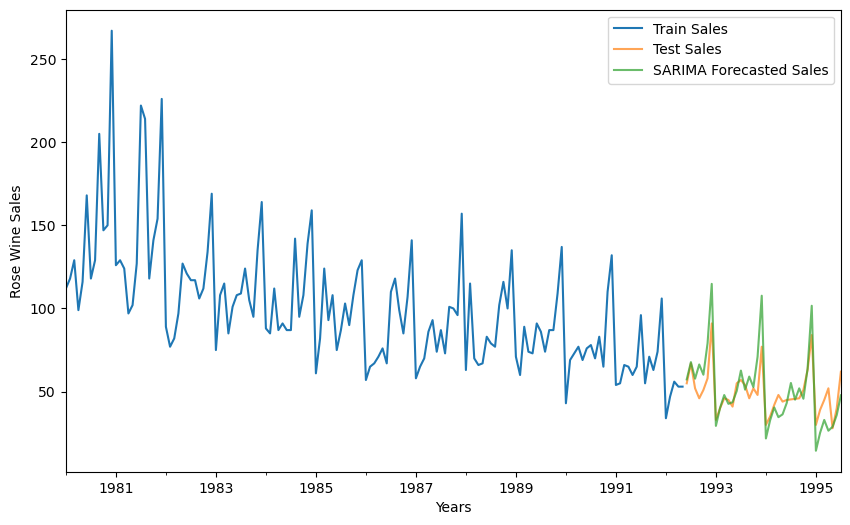

In [215]:
axis = train_2['Rose-Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose-Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['Integrated_Forecast_sarima'].plot(ax=axis, label='SARIMA Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [216]:
resultsDf_SARIMA = pd.DataFrame({'Test RMSE': [sarima_rmse]}
                           ,index=['SARIMAX(2, 0, 1)x(1, 1, 3, 12)'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES, resultsDf_TES, resultsDf_AR, resultsDf_ARMA, resultsDf_ARIMA, resultsDf_SARIMA ])
resultsDf

Test RMSE
RegressionOnTime                     58.977941
2pointTrailingMovingAverage           9.401964
4pointTrailingMovingAverage          12.180380
6pointTrailingMovingAverage          12.403435
9pointTrailingMovingAverage          12.614521
Alpha=0.95:SES                       13.820404
Alpha=0.91,Beta=0.81:DES             13.245510
Alpha=0.15,Beta=0.7, Gamma=0.15:TES   6.084552
ARIMA(3,0,0)                         18.803839
ARIMA(2,0,3)                         18.756749
ARIMA(2,0,2)                         18.756749
SARIMAX(2, 0, 1)x(1, 1, 3, 12)       13.673602

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

#### This is where our model building exercise ends.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

## Building the most optimum AR/AR/ARIMA/SARIMA model on the Full Data.

In [217]:
full_data_model = sm.tsa.statespace.SARIMAX(rose_sales_df['Rose-Wine-Sales'],
                                order=(1,1,3),
                                seasonal_order=(1, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96326D+00    |proj g|=  8.16436D-02

At iterate    5    f=  2.94330D+00    |proj g|=  2.21688D-02

At iterate   10    f=  2.89881D+00    |proj g|=  1.61857D-01

At iterate   15    f=  2.85647D+00    |proj g|=  1.04833D-02

At iterate   20    f=  2.85550D+00    |proj g|=  1.36149D-02

At iterate   25    f=  2.85531D+00    |proj g|=  9.90218D-03

At iterate   30    f=  2.85507D+00    |proj g|=  3.40088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     39     

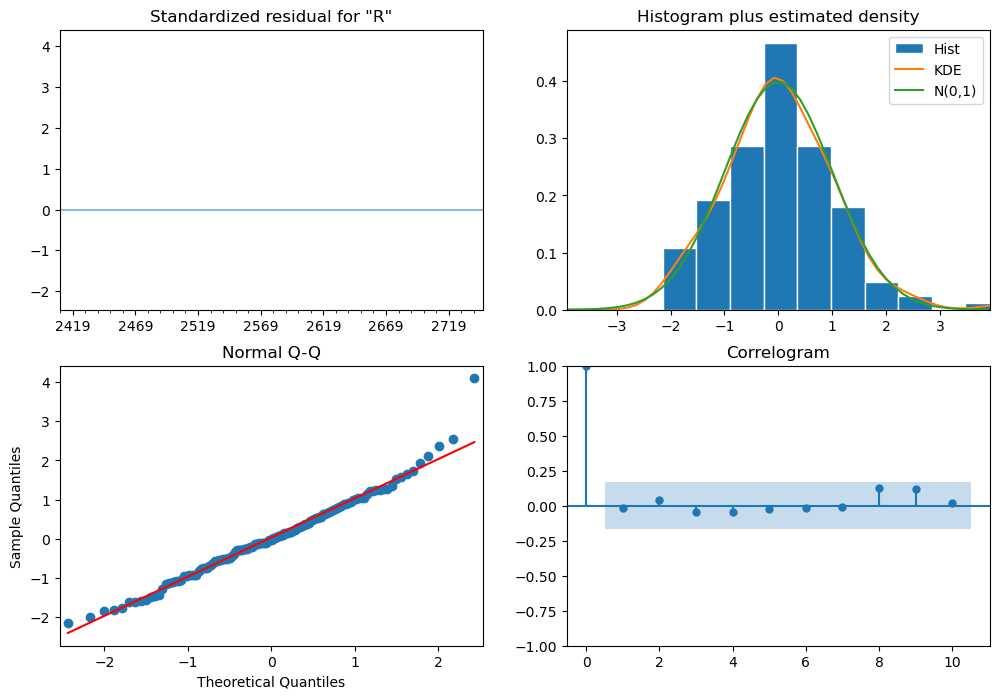

In [218]:
results_full_data_model.plot_diagnostics();

#### Note : <u>4 plots in the residuals diagnostic plots tell us</u> : 

- **Standardized residuals plot**: <i>The top left plot shows 1-step-ahead standardized residuals. 
    If model is working correctly, then no pattern should be obvious in the residuals which is clearly not visible from the plot as well .</i>



- **Histogram plus estimated density plot**: <i>This plot shows the distribution of the residuals.The orange line shows a smoothed version of this histogram, and the green line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing just well enough.</i>



- **Normal Q-Q plot**: <i>The Q-Q plot compare the distribution of residuals to normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end, which is exactly happening in this case.</i>



- **Correlogram plot**: <i>The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag >0  should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model, which is clearly not in this case</i> .

## Evaluate the model on the whole and predict 17 months into the future (till the end of next year).

In [219]:
rose_sales_df.tail()

Rose-Wine-Sales  Differenced
1995-03-01             45.0          6.0
1995-04-01             52.0          7.0
1995-05-01             28.0        -24.0
1995-06-01             40.0         12.0
1995-07-01             62.0         22.0

In [220]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=17)

In [221]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose-Wine-Sales       mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01       46.888882  12.568474      22.255127      71.522638
1995-09-01       45.460164  12.826519      20.320648      70.599680
1995-10-01       47.840996  12.828061      22.698458      72.983534
1995-11-01       60.020178  12.971108      34.597274      85.443082
1995-12-01       86.909474  12.976683      61.475643     112.343306

In [222]:
rmse = mean_squared_error(rose_sales_df['Rose-Wine-Sales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.30115954861536


In [223]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1997-01-01', freq='M'))

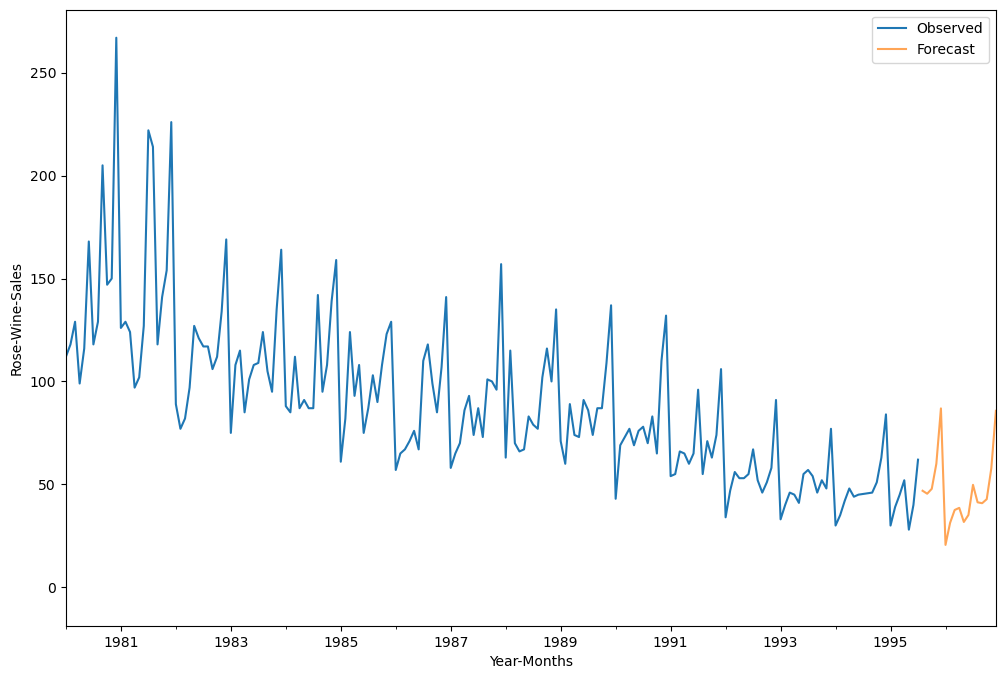

In [224]:
# plot the forecast along with the confidence band

axis = rose_sales_df['Rose-Wine-Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose-Wine-Sales')
plt.legend(loc='best')
plt.show()